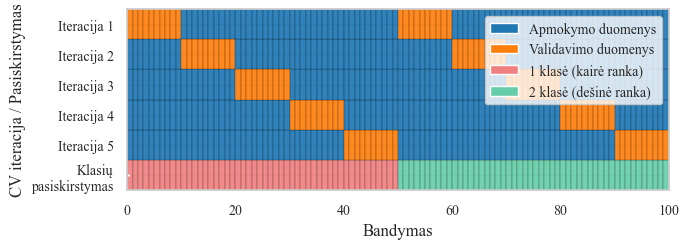

In [277]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12    # same rule as axes.title
})


# Data setup
n_trials = 100
n_iterations = 5
fold_size = n_trials // n_iterations
half_fold = fold_size // 2

fig, ax = plt.subplots(figsize=(6.69291339,2.3))

# Colors matching provided plot
train_color = "tab:blue"
val_color = 'tab:orange'
class1_color = 'lightcoral'
class2_color = 'mediumaquamarine'

# Class distribution
class_distribution = np.zeros(n_trials)
class_distribution[:n_trials // 2] = 1

for j in range(n_trials):
    ax.barh(y='Klasių\npasiskirstymas', width=1, left=j,
            color=class1_color if class_distribution[j] else class2_color,
            edgecolor='black', linewidth=0.15, height=1, alpha=0.92)

# Stratified Cross-validation representation (1st iteration on top, no white space between rows)
class1_indices = np.arange(n_trials // 2)
class2_indices = np.arange(n_trials // 2, n_trials)

for i in reversed(range(n_iterations)):
    val_indices = np.concatenate([
        class1_indices[i * half_fold:(i + 1) * half_fold],
        class2_indices[i * half_fold:(i + 1) * half_fold]
    ])
    
    validation = np.zeros(n_trials)
    validation[val_indices] = 1

    for j in range(n_trials):
        ax.barh(y=f'Iteracija {i + 1}', width=1, left=j, 
                color=val_color if validation[j] else train_color,
                edgecolor='black', linewidth=0.15, height=1, alpha=0.92)

# Legend
ax.bar(0, 0, color=train_color, label='Apmokymo duomenys')
ax.bar(0, 0, color=val_color, label='Validavimo duomenys')
ax.bar(0, 0, color=class1_color, label='1 klasė (kairė ranka)')
ax.bar(0, 0, color=class2_color, label='2 klasė (dešinė ranka)')
ax.legend(loc='upper right')

# Labels
ax.set_xlabel('Bandymas')
ax.set_ylabel('CV iteracija / Pasiskirstymas')
ax.set_xlim(0, n_trials)

# Remove margins and spaces between bars
ax.margins(x=0, y=0)
plt.tight_layout(pad=0)
fig.savefig(r'bakalauras/fig6.png',dpi=800)

plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1786180332.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

2025-05-26 02:35:45,165 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1786180332.py:63: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1786180332.py:63: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

2025-05-26 02:35:45,171 - matplotlib.category - INFO - Using categorical units to plot a list of strin

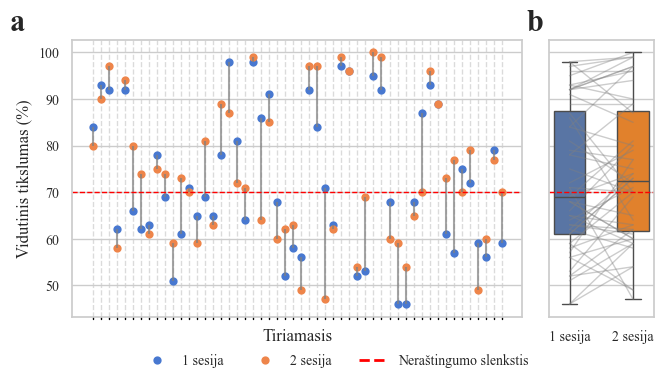

In [278]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Font settings for bigger text
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        14,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14
})

# --- DATA PREP ---
df_pipeline = results['2025-04-25']['within'][
    results['2025-04-25']['within'].pipeline == 'TS_LR'
].copy()
df_pipeline[['subject', 'run']] = df_pipeline['evaluation'].str.split('_', expand=True)

df_pivot = df_pipeline.pivot(index='subject', columns='run', values='mean_val_accuracy').reset_index()
df_pivot.columns = ['subject', 'sesija1', 'sesija2']

df_long = pd.melt(
    df_pivot,
    id_vars='subject',
    value_vars=['sesija1', 'sesija2'],
    var_name='Sesija',
    value_name='Vidutinis tikslumas'
)
df_long['Sesija'] = df_long['Sesija'].replace({'sesija1': '1 sesija', 'sesija2': '2 sesija'})

def format_number(val):
    val = val * 100  # Convert to percent for label
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s


# --- PLOT ---

fig, axes = plt.subplots(
    1, 2, figsize=(6.89, 6.69291339/2 +0.2),
    gridspec_kw={'width_ratios': [3, 0.7]},
    sharey=True
)

# LEFT: Per-subject Pointplot
ax1 = axes[0]
sns.pointplot(
    x='subject',
    y='mean_val_accuracy',
    hue='run',
    data=df_pipeline,
    dodge=False,
    ci=None,
    join=False,
    markers='o',
    scale=0.8,  # Smaller markers, adjust as needed
    ax=ax1,
    
)
ax1.tick_params(axis='both', which='major', labelsize=10)
xticks = ax1.get_xticks()
for tick, subject_label in zip(xticks, ax1.get_xticklabels()):
    subject = subject_label.get_text()
    subject_data = df_pipeline[df_pipeline['subject'] == subject]
    min_val = subject_data['mean_val_accuracy'].min()
    max_val = subject_data['mean_val_accuracy'].max()
    ax1.vlines(x=tick, ymin=min_val, ymax=max_val, colors='gray', linestyles='-', alpha=0.7)
ax1.axhline(y=0.7, color='red', linestyle='--', linewidth=1)
ax1.xaxis.grid(True, linestyle='--', alpha=0.7)
custom_line = Line2D([0], [0], color='red', linestyle='--', linewidth=2)
handles, _ = ax1.get_legend_handles_labels()
new_run_labels = ["1 sesija", "2 sesija"]
handles = handles[:len(new_run_labels)]
labels = new_run_labels
handles.append(custom_line)
labels.append("Neraštingumo slenkstis")
# ax1.legend(handles=handles, labels=labels, loc='lower right', fontsize=10)
ax1.set_xlabel('Tiriamasis', fontsize=12, labelpad=-8)
ax1.set_ylabel('Vidutinis tikslumas (%)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))


subjects = list(df_pivot['subject'])  # or however your subject labels are ordered
ax1.set_xticks(range(len(subjects)))

# "W" shape x-tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, label in enumerate(ax1.get_xticklabels()):
    label.set_fontsize(9)
    if i % 2 == 0:
        label.set_y(-0.015)
    else:
        label.set_y(-0.065)



# RIGHT: Paired Boxplot (narrower)
ax2 = axes[1]
palette = {'1 sesija': '#4c72b0', '2 sesija': '#ff7f0e'}  # blue and orange

sns.boxplot(
    x='Sesija',
    y='Vidutinis tikslumas',
    data=df_long,
    showmeans=False,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    ax=ax2,
    width=0.5,
    palette=palette
)

for _, row in df_pivot.iterrows():
    ax2.plot(['1 sesija', '2 sesija'], [row['sesija1'], row['sesija2']], color='gray', alpha=0.4, linewidth=1)
ax2.axhline(0.7, color='red', linestyle='--', linewidth=1, label="Neraštingumo slenkstis")
ax2.set_xlabel('', fontsize=10)
ax2.set_ylabel('')
ax2.set_title('')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))
ax2.set_ylim(ax1.get_ylim())  # sync y-limits for both axes

ax1.tick_params(axis='x', length=0)  # Hide all x-ticks

xlocs = ax1.get_xticks()
ylim = ax1.get_ylim()
tick_base = ylim[0]  # The axis baseline

short_len = 0.01 * (ylim[1] - ylim[0])   # adjust for your scale
long_len  = 0.01 * (ylim[1] - ylim[0])   # adjust for your scale

for i, x in enumerate(xlocs):
    if i % 2 == 0:
        ax1.plot([x, x], [tick_base, tick_base - short_len], color='black', lw=1, clip_on=False)
    else:
        ax1.plot([x, x], [tick_base, tick_base - long_len], color='black', lw=1, clip_on=False)

for label in ax1.get_yticklabels():
    label.set_fontsize(10)

# Remove/comment this:
# ax1.legend(handles=handles, labels=labels, loc='lower right', fontsize=10)
if ax1.get_legend() is not None:
    ax1.get_legend().remove()

# Place legend below both axes, centered, horizontal
fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.03),   # Fine-tune -0.12 for your spacing
    ncol=len(labels),
    fontsize=10,
    frameon=False
)

# plt.subplots_adjust(bottom=0.22)  # Adjust this if legend is cut off or too close
plt.subplots_adjust(wspace=0.05)  
# As close as possible without overlap
fig.text(0.027, 1.014, "a", ha='left', va='top', fontsize=22, fontweight='bold')
fig.text(0.777, 1.014, "b", ha='left', va='top', fontsize=22, fontweight='bold')
ax1.xaxis.grid(True, linestyle='--', alpha=0.7)

# Hide x-tick labels but keep ticks/grid lines
ax1.set_xticklabels([])

plt.tight_layout()

plt.show()

fig.savefig(r'bakalauras/fig9.png', dpi=800, bbox_inches='tight')





In [670]:
import sys
import os
sys.path.append('c:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\code')
from helper_functions import setup_logger, load_procesed_data
# Set up logger
log = setup_logger("Lee_ml_pipeline_run", log_file=os.path.join("logs", "Lee_full_dataset_ml_run_cleaned_atar.log"))

import sys
sys.path.append('c:\\Users\\rokas\\Documents\\Github\\BCI\\mi-bci\\code')
from helper_functions import setup_logger
from helper_functions.data_processing.mi_processing import process_mi_raw
import matplotlib.pyplot as plt
from helper_functions import setup_logger, load_procesed_data
from datasets import Lee2019
import os
import glob
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from mne.stats import permutation_cluster_1samp_test as pcluster_test

from datasets import Lee2019

log = setup_logger("Lee_preprocess")

dataset = Lee2019()
dataset_no = 20
subject = 10
run = 1
paradigm = "MI"
tmin = -5
tmax = 10
event_id = dict(left_hand=2, right_hand=1)


In [1]:
import graphviz

dot_script = """
digraph G {
    graph [rankdir=LR, fontsize=10];
    node [shape=folder, fontname="Arial"];

    root [label="/"];
    code [label="code"];
    plots [label="plots"];
    pixi_lock [label="pixi.lock", shape=note];
    pixi_toml [label="pixi.toml", shape=note];

    datasets [label="datasets"];
    evaluation [label="evaluation"];
    helper_functions [label="helper_functions"];
    eda [label="eda"];
    data_processing [label="data_processing"];
    notebooks [label="notebooks"];
    tutorials [label="tutorials"];
    pipelines [label="pipelines"];

    py_files [label="*.py", shape=note];
    ipynb_files [label="*.ipynb", shape=note];
    png_files [label="*.png", shape=note];

    root -> code;
    root -> plots;
    root -> pixi_lock;
    root -> pixi_toml;

    code -> datasets;
    datasets -> py_files [label="files"];

    code -> evaluation;
    evaluation -> py_files [label="files"];

    code -> helper_functions;
    helper_functions -> eda;
    eda -> py_files [label="files"];
    helper_functions -> data_processing;
    data_processing -> py_files [label="files"];
    helper_functions -> py_files [label="files"];

    code -> notebooks;
    notebooks -> tutorials;
    tutorials -> ipynb_files [label="files"];

    code -> pipelines;
    pipelines -> py_files [label="files"];

    plots -> png_files [label="files"];
}
"""

# Create Graphviz object and render
graph = graphviz.Source(dot_script)
graph.render('/mnt/data/directory_tree', format='png', cleanup=True)

# Return path to the generated file
"/mnt/data/directory_tree.png"


ModuleNotFoundError: No module named 'graphviz'

In [671]:
def clean_results(paths):
    evaluations = {}
    cross_evaluations = {}

    for path in paths:
        filename = os.path.basename(path)
        subject = filename.split('_')[-3]
        file = pd.read_pickle(path)
        file_run_cross = file['cross_session']
        cross_evaluations[subject] = file_run_cross
        
        for run in [1,2]:
            file_run = file['within_session'][run]
            file_run.pop('single_pipeline')
            subject_run = subject + '_' + str(run)
            evaluations[subject_run] = file_run
            
    records = []
    records_cross = []
    # rename loop var so we don't overwrite `records` itself
    for recs, evaluation in zip([records, records_cross],
                                [evaluations, cross_evaluations]):
        for eval_date, pipelines in evaluation.items():
            for pipeline, metrics in pipelines.items():
                record = {'evaluation': eval_date, 'pipeline': pipeline}
                for key, value in metrics.items():
                    if isinstance(value, dict):
                        for subkey, subvalue in value.items():
                            record[f"{key}_{subkey}"] = subvalue
                    else:
                        record[key] = value
                recs.append(record)

    df = pd.DataFrame(records)
    df_cross = pd.DataFrame(records_cross)

    metrics = ['train_accuracy', 'train_roc_auc', 'val_accuracy', 'val_roc_auc']

    # Expand each metric column: convert each list in the column into separate columns.
    for col in metrics:
        # Convert the list values into a DataFrame. Each row's list becomes a row in the new DataFrame.
        expanded = pd.DataFrame(df[col].tolist(), index=df.index)
        # Rename the new columns to include the metric name (e.g. train_accuracy_0, train_accuracy_1, ...)
        expanded = expanded.add_prefix(col + '_')
        # Drop the original list column and join the new expanded columns.
        df = df.drop(columns=[col]).join(expanded)

    # Now, to reorder the columns so that for each pass the four metrics are together:
    # First, determine the number of passes from one of the expanded metric columns.
    n_passes = df.filter(regex=r'^train_accuracy_').shape[1]

    # Collect the metric columns in the order: first pass, second pass, etc.
    ordered_metric_cols = []
    for i in range(n_passes):
        for metric in metrics:
            col_name = f"{metric}_{i}"
            if col_name in df.columns:
                ordered_metric_cols.append(col_name)

    # Get the non-expanded columns (e.g. evaluation, pipeline, etc.)
    other_cols = [col for col in df.columns if not any(col.startswith(m + '_') for m in metrics)]

    # Create the final DataFrame with the desired column order:
    # identifiers first, then the grouped metric columns.
    df = df[other_cols + ordered_metric_cols]

    df_within = df[['evaluation', 'pipeline', 'mean_train_accuracy', 'mean_train_auc','mean_val_accuracy','mean_val_auc']]
    df_cross = df_cross[['evaluation', 'pipeline', 'test_accuracy', 'test_roc_auc','correct_mask']]
    
    return df_within, df_cross

In [672]:
def clean_results_within(paths):
    evaluations = {}
    
    for path in paths:
        filename = os.path.basename(path)
        subject = filename.split('_')[-3]
        file = pd.read_pickle(path)
        
        for run in [1,2]:
            file_run = file['within_session'][run]
            file_run.pop('single_pipeline')
            subject_run = subject + '_' + str(run)
            evaluations[subject_run] = file_run
            
    records = []
    # rename loop var so we don't overwrite `records` itself
    for recs, evaluation in zip([records],
                                [evaluations]):
        for eval_date, pipelines in evaluation.items():
            for pipeline, metrics in pipelines.items():
                record = {'evaluation': eval_date, 'pipeline': pipeline}
                for key, value in metrics.items():
                    if isinstance(value, dict):
                        for subkey, subvalue in value.items():
                            record[f"{key}_{subkey}"] = subvalue
                    else:
                        record[key] = value
                recs.append(record)

    df = pd.DataFrame(records)

    metrics = ['train_accuracy', 'train_roc_auc', 'val_accuracy', 'val_roc_auc']


    # Expand each metric column: convert each list in the column into separate columns.
        
    for col in metrics:
        # Convert the list values into a DataFrame. Each row's list becomes a row in the new DataFrame.
        expanded = pd.DataFrame(df[col].tolist(), index=df.index)
        # Rename the new columns to include the metric name (e.g. train_accuracy_0, train_accuracy_1, ...)
        expanded = expanded.add_prefix(col + '_')
        # Drop the original list column and join the new expanded columns.
        df = df.drop(columns=[col]).join(expanded)

    # Now, to reorder the columns so that for each pass the four metrics are together:
    # First, determine the number of passes from one of the expanded metric columns.
    n_passes = df.filter(regex=r'^train_accuracy_').shape[1]

    # Collect the metric columns in the order: first pass, second pass, etc.
    ordered_metric_cols = []
    for i in range(n_passes):
        for metric in metrics:
            col_name = f"{metric}_{i}"
            if col_name in df.columns:
                ordered_metric_cols.append(col_name)

    # Get the non-expanded columns (e.g. evaluation, pipeline, etc.)
    other_cols = [col for col in df.columns if not any(col.startswith(m + '_') for m in metrics)]

    # Create the final DataFrame with the desired column order:
    # identifiers first, then the grouped metric columns.
    df = df[other_cols + ordered_metric_cols]
    
    df_within = df[['evaluation', 'pipeline', 'mean_train_accuracy', 'mean_train_auc','mean_val_accuracy','mean_val_auc']]
    df_cross = None    
    return df_within, df_cross

In [673]:
results = {}

_, df_cross = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25\*.pkl'))

df_within, _ = clean_results_within(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-05-05\*.pkl'))
results['2025-04-25'] = {'within': df_within,'cross': df_cross}

_, df_cross_autoreject = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25_autoreject\*.pkl'))

df_within_autoreject, _ = clean_results_within(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-05-05_autoreject\*.pkl'))
results['2025-04-25_autoreject']  = {'within': df_within_autoreject,'cross': df_cross_autoreject}

df_within_atar_beta0_1_OptModeelim, df_cross_atar_beta0_1_OptModeelim = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.1_OptModeelim\*.pkl'))
results['2025-04-22_atar_beta0.1_OptModeelim'] = {'within': df_within_atar_beta0_1_OptModeelim, 'cross': df_cross_atar_beta0_1_OptModeelim}

df_within_atar_beta0_01_OptModeelim, df_cross_atar_beta0_01_OptModeelim = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.01_OptModeelim\*.pkl'))
results['2025-04-22_atar_beta0.01_OptModeelim'] = {'within': df_within_atar_beta0_01_OptModeelim, 'cross': df_cross_atar_beta0_01_OptModeelim}

df_within_atar_beta0_1_OptModelinAtten, df_cross_atar_beta0_1_OptModelinAtten = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.1_OptModelinAtten\*.pkl'))
results['2025-04-22_atar_beta0.1_OptModelinAtten'] = {'within': df_within_atar_beta0_1_OptModelinAtten, 'cross': df_cross_atar_beta0_1_OptModelinAtten}

df_within_atar_beta0_01_OptModelinAtten, df_cross_atar_beta0_01_OptModelinAtten = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.01_OptModelinAtten\*.pkl'))
results['2025-04-22_atar_beta0.01_OptModelinAtten'] = {'within': df_within_atar_beta0_01_OptModelinAtten, 'cross': df_cross_atar_beta0_01_OptModelinAtten}

df_within_atar_beta0_1_OptModesoft, df_cross_atar_beta0_1_OptModesoft = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.1_OptModesoft\*.pkl'))
results['2025-04-22_atar_beta0.1_OptModesoft'] = {'within': df_within_atar_beta0_1_OptModesoft, 'cross': df_cross_atar_beta0_1_OptModesoft}

df_within_atar_beta0_01_OptModesoft, df_cross_atar_beta0_01_OptModesoft = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.01_OptModesoft\*.pkl'))
results['2025-04-22_atar_beta0.01_OptModesoft'] = {'within': df_within_atar_beta0_01_OptModesoft, 'cross': df_cross_atar_beta0_01_OptModesoft}

df_within_atar_beta0_2_OptModeelim, df_cross_atar_beta0_2_OptModeelim = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.2_OptModeelim\*.pkl'))
results['2025-04-22_atar_beta0.2_OptModeelim'] = {'within': df_within_atar_beta0_2_OptModeelim, 'cross': df_cross_atar_beta0_2_OptModeelim}

_, df_cross_atar_beta0_2_OptModelinAtten = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.2_OptModelinAtten\*.pkl'))


df_within_atar_beta0_2_OptModelinAtten, _ = clean_results_within(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-05-05_beta0.2_OptModelinAtten\*.pkl'))
results['2025-04-22_atar_beta0.2_OptModelinAtten'] = {'within': df_within_atar_beta0_2_OptModelinAtten,'cross': df_cross_atar_beta0_2_OptModelinAtten}


df_within_atar_beta0_2_OptModesoft, df_cross_atar_beta0_2_OptModesoft = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.2_OptModesoft\*.pkl'))
results['2025-04-22_atar_beta0.2_OptModesoft'] = {'within': df_within_atar_beta0_2_OptModesoft, 'cross': df_cross_atar_beta0_2_OptModesoft}

df_within_atar_beta0_5_OptModeelim, df_cross_atar_beta0_5_OptModeelim = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.5_OptModeelim\*.pkl'))
results['2025-04-22_atar_beta0.5_OptModeelim'] = {'within': df_within_atar_beta0_5_OptModeelim, 'cross': df_cross_atar_beta0_5_OptModeelim}

df_within_atar_beta0_05_OptModeelim, df_cross_atar_beta0_05_OptModeelim = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.05_OptModeelim\*.pkl'))
results['2025-04-22_atar_beta0.05_OptModeelim'] = {'within': df_within_atar_beta0_05_OptModeelim, 'cross': df_cross_atar_beta0_05_OptModeelim}

df_within_atar_beta0_5_OptModelinAtten, df_cross_atar_beta0_5_OptModelinAtten = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.5_OptModelinAtten\*.pkl'))
results['2025-04-22_atar_beta0.5_OptModelinAtten'] = {'within': df_within_atar_beta0_5_OptModelinAtten, 'cross': df_cross_atar_beta0_5_OptModelinAtten}

df_within_atar_beta0_05_OptModelinAtten, df_cross_atar_beta0_05_OptModelinAtten = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.05_OptModelinAtten\*.pkl'))
results['2025-04-22_atar_beta0.05_OptModelinAtten'] = {'within': df_within_atar_beta0_05_OptModelinAtten, 'cross': df_cross_atar_beta0_05_OptModelinAtten}

df_within_atar_beta0_5_OptModesoft, df_cross_atar_beta0_5_OptModesoft = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.5_OptModesoft\*.pkl'))
results['2025-04-22_atar_beta0.5_OptModesoft'] = {'within': df_within_atar_beta0_5_OptModesoft, 'cross': df_cross_atar_beta0_5_OptModesoft}

df_within_atar_beta0_05_OptModesoft, df_cross_atar_beta0_05_OptModesoft = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-22_atar_beta0.05_OptModesoft\*.pkl'))
results['2025-04-22_atar_beta0.05_OptModesoft'] = {'within': df_within_atar_beta0_05_OptModesoft, 'cross': df_cross_atar_beta0_05_OptModesoft}


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\155105340.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BC

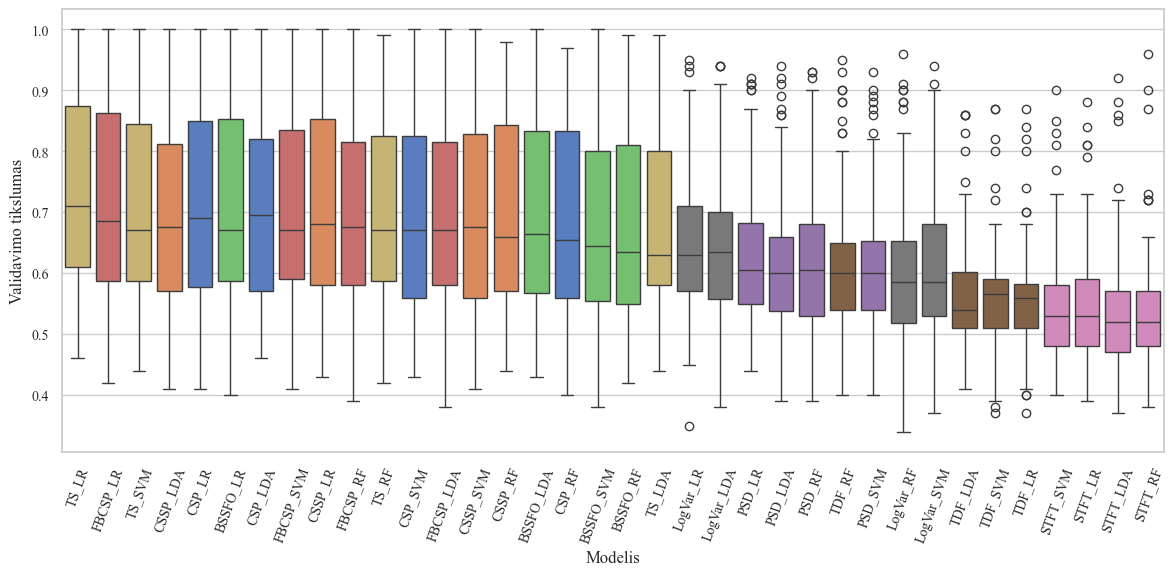

In [674]:
df_plot = results['2025-04-25']['within']
df_plot['feature_extraction'] = df_plot['pipeline'].str.split('_').str[0]

# Compute overall mean per pipeline and sort in descending order.
mean_per_pipeline = df_plot.groupby("pipeline")["mean_val_accuracy"].mean().sort_values(ascending=False)

# Make 'pipeline' a categorical with the desired order.
df_plot["pipeline"] = pd.Categorical(
    df_plot["pipeline"],
    categories=mean_per_pipeline.index,
    ordered=True
)

# Get the unique feature extraction methods.
unique_features = df_plot['feature_extraction'].unique()

# Create a pastel palette for the feature extraction methods.
feature_palette = dict(zip(unique_features, sns.color_palette("muted", n_colors=len(unique_features))))

# Map each pipeline to a color based on its feature extraction method.
pipeline_palette = {pipeline: feature_palette[pipeline.split('_')[0]] for pipeline in mean_per_pipeline.index}

# Create the boxplot using the mapped palette.
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='pipeline', y='mean_val_accuracy', data=df_plot, palette=pipeline_palette)
plt.xticks(rotation=70)
ax.set_xlabel("Modelis", fontsize=12)         # Rename x-axis
ax.set_ylabel("Validavimo tikslumas", fontsize=12)  # Rename y-axis
plt.tight_layout()
plt.show()


In [675]:
# Compute the average validation accuracy per pipeline
pipeline_avg = results['2025-04-25']['within'].copy().groupby("pipeline")["mean_val_accuracy"].mean().reset_index()

# Sort the pipelines in descending order (best performing first)
pipeline_avg = pipeline_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign a rank: 1 = best
pipeline_avg["rank"] = range(1, len(pipeline_avg) + 1)

pipeline_avg


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1977439603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


pipeline  mean_val_accuracy  rank
0        TS_LR           0.734615     1
1     FBCSP_LR           0.714423     2
2       TS_SVM           0.712596     3
3     CSSP_LDA           0.710577     4
4       CSP_LR           0.710096     5
5     BSSFO_LR           0.710000     6
6      CSP_LDA           0.709904     7
7    FBCSP_SVM           0.709615     8
8      CSSP_LR           0.708846     9
9     FBCSP_RF           0.701058    10
10       TS_RF           0.700962    11
11     CSP_SVM           0.699135    12
12   FBCSP_LDA           0.699038    13
13    CSSP_SVM           0.698269    14
14     CSSP_RF           0.695288    15
15   BSSFO_LDA           0.694231    16
16      CSP_RF           0.692115    17
17   BSSFO_SVM           0.685769    18
18    BSSFO_RF           0.682981    19
19      TS_LDA           0.676827    20
20   LogVar_LR           0.644423    21
21  LogVar_LDA           0.641827    22
22      PSD_LR           0.626538    23
23     PSD_LDA           0.619712    24
24      PSD_RF           0.617981    25
25      TDF_RF           0.611923    26
26     PSD_SVM           0.611635    27
27   LogVar_RF           0.605962    28
28  LogVar_SVM           0.603654    29
29     TDF_LDA           0.568942    30
30     TDF_SVM           0.559231    31
31      TDF_LR           0.555481    32
32    STFT_SVM           0.543269    33
33     STFT_LR           0.541827    34
34    STFT_LDA           0.537404    35
35     STFT_RF           0.531827    36

In [182]:
df_plot.source.unique()

AttributeError: 'DataFrame' object has no attribute 'source'

In [19]:
results.keys()

dict_keys(['2025-04-25', '2025-04-25_autoreject', '2025-04-22_atar_beta0.1_OptModeelim', '2025-04-22_atar_beta0.01_OptModeelim', '2025-04-22_atar_beta0.1_OptModelinAtten', '2025-04-22_atar_beta0.01_OptModelinAtten', '2025-04-22_atar_beta0.1_OptModesoft', '2025-04-22_atar_beta0.01_OptModesoft', '2025-04-22_atar_beta0.2_OptModeelim', '2025-04-22_atar_beta0.2_OptModelinAtten', '2025-04-22_atar_beta0.2_OptModesoft', '2025-04-22_atar_beta0.5_OptModeelim', '2025-04-22_atar_beta0.05_OptModeelim', '2025-04-22_atar_beta0.5_OptModelinAtten', '2025-04-22_atar_beta0.05_OptModelinAtten', '2025-04-22_atar_beta0.5_OptModesoft', '2025-04-22_atar_beta0.05_OptModesoft'])

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3427359612.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3427359612.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be de

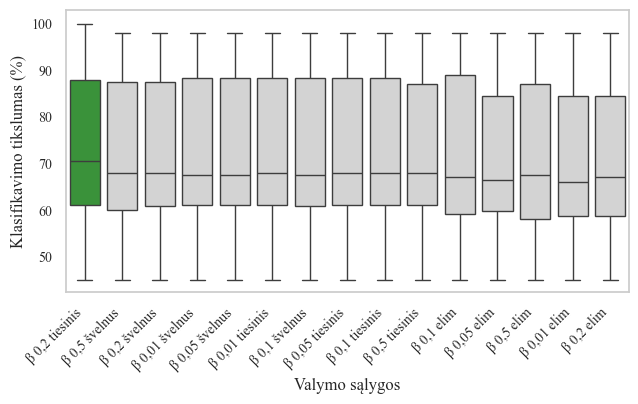

In [279]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12    # same rule as axes.title
})
# --- 1) Combine within-session DataFrames and select TS_LR ---


within_list = [
    dfs['within'].assign(source=src)
    for src, dfs in results.items()
]
df_within = pd.concat(within_list, ignore_index=True)
df_within_all = df_within[df_within.pipeline == "TS_LR"].copy()

# --- 2) Define mappings & cleaning function ---
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)
    s = s.replace('beta', 'β ')
    s = s.replace('atar_', '')
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    return s.replace('_', ' ')

df_within_all['source'] = (
    df_within_all['source']
      .map(base_map)
      .fillna(df_within_all['source'].apply(clean_source))
)

# --- 3) Filter out base methods ---
df_plot = df_within_all[~df_within_all['source'].isin(['bazinis', 'automatinis'])]

# --- 4) Compute mean accuracy & build palette/order ---
mean_acc      = df_plot.groupby('source')['mean_val_accuracy'].mean()
best_source   = mean_acc.idxmax()
order_by_mean = mean_acc.sort_values(ascending=False).index.tolist()

base_color = '#d3d3d3'
highlight  = '#2ca02c'
palette    = {s: (highlight if s == best_source else base_color)
              for s in order_by_mean}
# fig, ax = plt.subplots(figsize=(6.69291339,2.3))

# --- 5) Basic boxplot ---
fig, ax = plt.subplots(figsize=(6.69291339, 6.69291339/2+1))
df_plot['mean_val_accuracy'] = df_plot['mean_val_accuracy'] * 100
sns.boxplot(
    x='source',
    y='mean_val_accuracy',
    data=df_plot,
    order=order_by_mean,
    palette=palette,
    ax=ax
)

# --- 6) Labels, title, formatting ticks ---
ax.set_xlabel("Valymo sąlygos")
ax.set_ylabel("Klasifikavimo tikslumas (%)")
ax.set_title("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    return s

yticks = ax.get_yticks()
ax.set_yticklabels([format_number(y) for y in yticks])

labels = [lbl.get_text() for lbl in ax.get_xticklabels()]
labels = [re.sub(r',00$|,0$|,$', '', lbl.replace('.', ',')) for lbl in labels]
ax.set_xticklabels(labels)

# --- 7) Define significance pairs & spacing ---
sig_pairs = [
    ("β 0,01 tiesinis", "β 0,2 elim.",   "p = 0.025"),
    ("β 0,05 tiesinis", "β 0,2 elim.",   "p = 0.045"),
    ("β 0,2 elim.",      "β 0,2 tiesinis", "p = 0.0056"),
    ("β 0,1 elim.",      "β 0,2 tiesinis", "p = 0.047"),
]
y_offset       = 0.01
height_per_bar = 0.02

# Build mapping from label → x-position
xticklabels = [lbl.get_text() for lbl in ax.get_xticklabels()]
xpos = {lbl: i for i, lbl in enumerate(xticklabels)}

# --- 8) Expand y-axis to fit all bars ---
max_data_y      = df_plot['mean_val_accuracy'].max()
total_bar_space = y_offset + height_per_bar * len(sig_pairs)
ymin, _         = ax.get_ylim()
# ax.set_ylim(ymin, max_data_y + total_bar_space + 0.01)
ax.set_ylim(ymin,103)

# --- 9) Helper: draw unclipped bars & text ---
def add_sig_bar(ax, x1, x2, y, text, bar_height=0.015):
    ax.plot(
        [x1, x1, x2, x2],
        [y, y + bar_height, y + bar_height, y],
        lw=1.5, c='k',
        clip_on=False
    )
    ax.text(
        (x1 + x2) / 2,
        y + bar_height,
        text,
        ha='center', va='bottom',
        fontsize=18,
        clip_on=False
    )

# --- 10) Draw & stack significance bars ---
used = []
for left, right, text in sig_pairs:
    if left in xpos and right in xpos:
        x1, x2 = xpos[left], xpos[right]
        y = max(
            df_plot[df_plot['source'] == left ]['mean_val_accuracy'].max(),
            df_plot[df_plot['source'] == right]['mean_val_accuracy'].max()
        ) + y_offset + len(used) * height_per_bar
        add_sig_bar(ax, x1, x2, y, text)
        used.append((x1, x2))
ax.grid(axis='y')
fig.savefig(r'bakalauras/fig7.1.png',dpi=800)

plt.show()


In [48]:
pipeline_avg[["feature", "classifier"]] = pipeline_avg["pipeline"].str.split("_", n=1, expand=True)

# 2) find the best classifier index for each feature
best_idx = pipeline_avg.groupby("feature")["mean_val_accuracy"].idxmax()

# 3) select those rows, sort by accuracy, reset index
best_per_feature = (
    pipeline_avg.loc[best_idx]
                .sort_values("mean_val_accuracy", ascending=False)
                .reset_index(drop=True)
)

# 4) assign a global rank
best_per_feature["rank"] = best_per_feature.index + 1
best_per_feature["mean_val_accuracy"] = best_per_feature["mean_val_accuracy"].round(4)

# view result
best_per_feature

pipeline  mean_val_accuracy  rank feature classifier
0      TS_LR             0.7346     1      TS         LR
1   FBCSP_LR             0.7144     2   FBCSP         LR
2   CSSP_LDA             0.7106     3    CSSP        LDA
3     CSP_LR             0.7101     4     CSP         LR
4   BSSFO_LR             0.7100     5   BSSFO         LR
5  LogVar_LR             0.6444     6  LogVar         LR
6     PSD_LR             0.6265     7     PSD         LR
7     TDF_RF             0.6119     8     TDF         RF
8   STFT_SVM             0.5433     9    STFT        SVM

In [676]:
import pandas as pd
import glob

# Load data from the pickle files (assumes clean_results is defined elsewhere)
df_raw = results['2025-04-25']['within'].copy()

# Split the evaluation column into subject and run
df_raw[['subject', 'run']] = df_raw['evaluation'].str.split('_', expand=True)

# Drop unwanted columns
df_raw = df_raw.drop(['evaluation', 'mean_train_accuracy', 'mean_train_auc', 'mean_val_auc'], axis=1)

# Calculate accuracy as percentage from mean_val_accuracy
df_raw['accuracy'] = df_raw['mean_val_accuracy'] * 100

# Create a new subject label, e.g. "01" becomes "s1"
df_raw['Subject'] = 's' + df_raw['subject'].astype(int).astype(str)

# Create new column names only for the specified pipelines:
#   - "CSP_LR" becomes "CSP_Se{run}"
#   - "CSSP_LR" becomes "CSSP_Se{run}"
#   - "FBCSP_LR" becomes "FBCSP_Se{run}"
#   - "BSSFO_LR" becomes "BSSFO_Se{run}"
df_raw['new_col'] = df_raw.apply(
    lambda row: (
        f"CSP_Se{int(row['run'])}" if row['pipeline'].startswith('CSP_LR') else
        f"CSSP_Se{int(row['run'])}" if row['pipeline'].startswith('CSSP_LR') else
        f"FBCSP_Se{int(row['run'])}" if row['pipeline'].startswith('FBCSP_LR') else
        f"BSSFO_Se{int(row['run'])}" if row['pipeline'].startswith('BSSFO_LR') else
        None
    ),
    axis=1
)

# Drop rows where new_col is None (i.e. pipelines not of interest)
df_raw = df_raw.dropna(subset=['new_col'])

# Pivot the DataFrame so that Subjects become rows and new_col values become columns.
# Then, reset the index so that Subject remains as a separate column.
df_wide = df_raw.pivot_table(index='Subject', columns='new_col', values='accuracy')
df_wide = df_wide.reset_index()

# Print pivoted columns
print("Pivot columns:", df_wide.columns.tolist())

# (Optional) Sort the DataFrame by subject.
# If subjects are of the form "s<number>", we can sort them numerically.
df_wide['s_num'] = df_wide['Subject'].str.extract('s(\d+)', expand=False).astype(int)
df_wide = df_wide.sort_values('s_num').drop(columns='s_num')

# Add summary rows for the mean and standard deviation (numeric columns only)
# Here, you might compute summaries for the pipeline columns only.
pipeline_cols = [col for col in df_wide.columns if col != 'Subject']
mean_row = pd.DataFrame([df_wide[pipeline_cols].mean(numeric_only=True)], columns=pipeline_cols)
mean_row['Subject'] = 'mean'
std_row = pd.DataFrame([df_wide[pipeline_cols].std(numeric_only=True)], columns=pipeline_cols)
std_row['Subject'] = 'std'
df_wide = pd.concat([df_wide, mean_row, std_row], ignore_index=True)



Pivot columns: ['Subject', 'BSSFO_Se1', 'BSSFO_Se2', 'CSP_Se1', 'CSP_Se2', 'CSSP_Se1', 'CSSP_Se2', 'FBCSP_Se1', 'FBCSP_Se2']


<>:48: DeprecationWarning: invalid escape sequence '\d'


In [677]:
data_article = pd.read_excel(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\full_converted_data.xlsx')

In [678]:
df_wide= df_wide.iloc[:52]
data_article = data_article.iloc[:53].drop([38])

In [53]:
import pandas as pd

# Sort the DataFrames by Subject and reset the index
data_article = data_article.sort_values('Subject').reset_index(drop=True)
df_wide = df_wide.sort_values('Subject').reset_index(drop=True)

# Set "Subject" as index and add a marker suffix for each DataFrame
data_article_temp = data_article.set_index('Subject')
data_article_temp.columns = [f"{col}_art" for col in data_article_temp.columns]

df_wide_temp = df_wide.set_index('Subject')
df_wide_temp.columns = [f"{col}_cal" for col in df_wide_temp.columns]

# Concatenate the DataFrames horizontally and reset index so that "Subject" is a column
combined = pd.concat([data_article_temp, df_wide_temp], axis=1).reset_index()

# Drop any columns with NaN labels (if any)
combined = combined.loc[:, combined.columns.notnull()]

# --- Reorder the columns ---
# Define the desired pipeline order (without suffixes)
desired_order = ['BSSFO_Se1', 'BSSFO_Se2', 'CSP_Se1', 'CSP_Se2', 
                 'CSSP_Se1', 'CSSP_Se2', 'FBCSP_Se1', 'FBCSP_Se2']

# Build new column order: Subject, then all _art columns in desired order, then all _cal columns in desired order.
new_order = ['Subject'] + \
            [f"{col}_art" for col in desired_order if f"{col}_art" in combined.columns] + \
            [f"{col}_cal" for col in desired_order if f"{col}_cal" in combined.columns]

# Reorder the DataFrame columns
combined = combined[new_order]

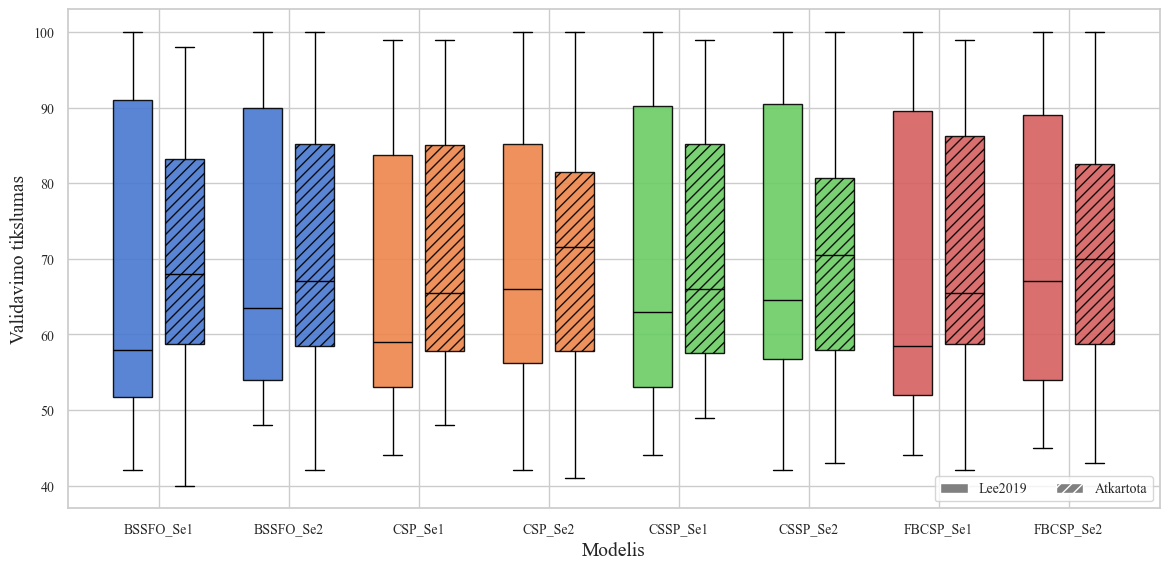

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assume 'combined' is already defined.
# Melt the combined DataFrame so that each row corresponds to a Subject/Model combination.
df_long = combined.melt(id_vars='Subject', var_name='Model', value_name='Accuracy')

# Extract the pipeline name and source from the 'Model' column.
# We assume the model names are of the form: pipeline_source (e.g., "CSP_Se1_art")
df_long[['pipeline', 'source']] = df_long['Model'].str.rsplit('_', n=1, expand=True)

# (Optional) Compute overall mean per pipeline (ignoring source) and sort pipelines in descending order.
# This is kept in the code below for potential use in colouring.
mean_per_pipeline = df_long.groupby("pipeline")["Accuracy"].mean().sort_values(ascending=False)

# --- New code: Extract session information and create a custom order ---
# Extract session (e.g., Se1 or Se2) from the pipeline name
df_long['session'] = df_long['pipeline'].str.extract(r'(Se\d+)', expand=False)
# Define a categorical order for sessions so that Se1 comes before Se2
df_long['session'] = pd.Categorical(df_long['session'], categories=["Se1", "Se2"], ordered=True)
# Also extract feature extraction method (e.g., "CSP" from "CSP_Se1")
df_long['feature_extraction'] = df_long['pipeline'].str.split('_').str[0]

# Sort the DataFrame by feature extraction and session so that for each feature, Se1 appears before Se2.
new_order = df_long.sort_values(by=['feature_extraction','session'])['pipeline'].unique()

# Set the pipeline column as a categorical with this new custom order.
df_long["pipeline"] = pd.Categorical(df_long["pipeline"], categories=new_order, ordered=True)

# --- Color mapping based on feature extraction ---
unique_features = df_long['feature_extraction'].unique()
# Create a colour palette for the feature extraction methods using the "muted" palette.
feature_palette = dict(zip(unique_features, sns.color_palette("muted", n_colors=len(unique_features))))
# Map each pipeline to a colour based on its feature extraction method.
pipeline_palette = {pipeline: feature_palette[pipeline.split('_')[0]] for pipeline in new_order}

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(12, 6))

# Loop over each pipeline and plot two boxplots: one for 'art' and one for 'cal'
# Position them slightly apart for side-by-side comparison.
for i, pipeline in enumerate(new_order):
    # Select data for the current pipeline and each source.
    data_art = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "art")]["Accuracy"]
    data_cal = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "cal")]["Accuracy"]
    
    # Define positions: art slightly left, cal slightly right.
    pos_art = i - 0.2
    pos_cal = i + 0.2
    
    # Plot boxplots with patch_artist=True to allow custom colouring.
    bp_art = ax.boxplot(data_art, positions=[pos_art], widths=0.3, patch_artist=True, showfliers=False)
    bp_cal = ax.boxplot(data_cal, positions=[pos_cal], widths=0.3, patch_artist=True, showfliers=False)
    
    # Get the base colour for this pipeline.
    color = pipeline_palette[pipeline]
    
    # For 'art', use the base colour with no hatch and full opacity.
    for box in bp_art["boxes"]:
        box.set_facecolor(color)
        box.set_alpha(0.9)
    
    # For 'cal', use the same base colour, add a hatch pattern and set lower opacity.
    for box in bp_cal["boxes"]:
        box.set_facecolor(color)
        box.set_hatch("///")
        box.set_alpha(0.9)  # Set opacity to 50%
    
    # Set median lines to black.
    for median in bp_art["medians"]:
        median.set_color("black")
    for median in bp_cal["medians"]:
        median.set_color("black")

# Set the x-axis ticks to be at the central positions of each pipeline.
ax.set_xticks(range(len(new_order)))
ax.set_xticklabels(new_order, rotation=0)
ax.set_xlabel("Modelis", fontsize=14)
ax.set_ylabel("Validavimo tikslumas", fontsize=14)

# Create custom legend handles.
legend_art = mpatches.Patch(facecolor='grey', label='Lee2019')
legend_cal = mpatches.Patch(facecolor='grey', hatch="///", label='Atkartota')

# Arrange legend in one row so the first entry appears on the left and the second on the right.
ax.legend(handles=[legend_art, legend_cal], loc='lower right', ncol=2, frameon=True)

plt.tight_layout()
plt.show()


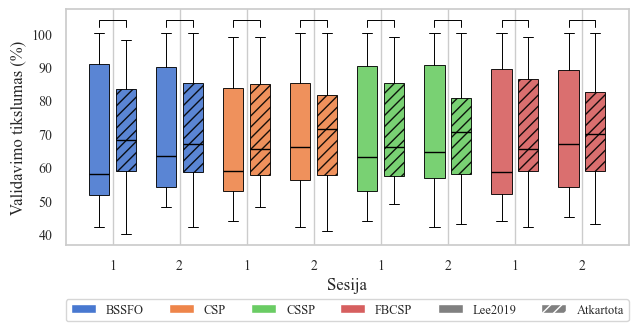

In [287]:
import matplotlib.pyplot as plt

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12    # same rule as axes.title
})
# --- 1) Combine within-session DataFrames and select TS_LR ---
# fig.savefig(r'bakalauras/fig7.png',dpi=800)



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# … your data‑prep code up to pipeline_palette …

fig, ax = plt.subplots(figsize=(6.69291339, 6.69291339/2))

# 1) plot all the boxplots (same as before)
for i, pipeline in enumerate(new_order):
    art = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "art")]["Accuracy"]
    cal = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "cal")]["Accuracy"]
    for data, offset, hatch in [
        (art, -0.2, None),
        (cal,  0.2, "///")
    ]:
        bp = ax.boxplot(
            data,
            positions=[i + offset],
            widths=0.3,
            patch_artist=True,
            showfliers=False,
            boxprops=dict(linewidth=0.7),
            whiskerprops=dict(linewidth=0.7),
            capprops=dict(linewidth=0.7),
            medianprops=dict(linewidth=1)
        )
        color = pipeline_palette[pipeline]
        for box in bp["boxes"]:
            box.set_facecolor(color)
            if hatch:
                box.set_hatch(hatch)
            box.set_alpha(0.9)
        for med in bp["medians"]:
            med.set_color("black")
# Set the x‐ticks at the center of each pipeline group
ax.set_xticks(range(len(new_order)))

# Build a list of session numbers (1 or 2) extracted from each pipeline string
session_labels = [p.split('_')[1].replace('Se','') for p in new_order]

# Use those numeric labels instead of the full names
ax.set_xticklabels(session_labels, rotation=0)
ax.set_xlabel("Sesija", fontsize=12)

ax.set_ylabel("Validavimo tikslumas (%)", fontsize=12)

# 2) Build a single, “long” legend
# a) one patch per feature extraction method
feature_patches = [
    mpatches.Patch(facecolor=feature_palette[f], label=f)
    for f in unique_features
]
# b) two patches for art vs cal
feature_patches += [
    mpatches.Patch(facecolor='grey', label='Lee2019'),
    mpatches.Patch(facecolor='grey', hatch="///", label='Atkartota')
]

#





import itertools
from scipy.stats import ttest_rel

# … your existing plotting code up to plt.tight_layout() …

# 3) Add significance bars
y_offset = df_long['Accuracy'].max() * 1.02   # place bars just above the tallest box
bar_height = df_long['Accuracy'].max() * 0.02  # height of the little T-bar

for i, pipeline in enumerate(new_order):
    # select your two distributions
    art = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "art")]["Accuracy"]
    cal = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "cal")]["Accuracy"]

    # paired t-test
    t_stat, p_val = ttest_rel(cal, art)

    # decide annotation
    if p_val < 0.001:
        sig = "***"
    elif p_val < 0.01:
        sig = "**"
    elif p_val < 0.05:
        sig = "*"
    else:
        sig = ""

    # x‑coordinates of the two boxes
    x1, x2 = i - 0.2, i + 0.2

    # draw the horizontal bar
    ax.plot([x1, x1, x2, x2],
            [y_offset, y_offset+bar_height, y_offset+bar_height, y_offset],
            lw=0.7, c='black')
    # add text
    ax.text((x1+x2)/2, y_offset+bar_height*1.2, sig,
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()
# c) place the combined legend
ax.legend(
    handles=feature_patches,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.35),
    ncol=len(feature_patches),
    frameon=True,
    title="",
    fontsize=9,
    title_fontsize=9
)

ax.grid(axis='y')

fig.savefig(r'bakalauras/fig8.png', dpi=800, bbox_inches='tight')

plt.show()


In [284]:
bakalauras/fig10.png

NameError: name 'bakalauras' is not defined

In [37]:
import pandas as pd

# 1) Pivot df_long so each row is Subject × Pipeline with art and cal side by side
df_summary = df_long.pivot_table(
    index=['Subject', 'pipeline'],
    columns='source',
    values='Accuracy'
).reset_index().dropna()

# 3) Extract numeric session and feature extraction method
df_summary['session'] = df_summary['pipeline'].str.extract(r'Se(\d+)').astype(int)
df_summary['feature_extraction'] = df_summary['pipeline'].str.split('_').str[0]

# 4) Reorder columns for clarity
df_summary = df_summary[['Subject', 'pipeline', 'feature_extraction', 'session', 'art', 'cal']]


C:\Users\rokas\AppData\Local\Temp\ipykernel_48884\914077656.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


In [61]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon

# --- 1) Recreate summary DataFrame from df_long ---
df_summary = df_long.pivot_table(
    index=['Subject', 'pipeline'],
    columns='source',
    values='Accuracy'
).reset_index().dropna()

# Extract session number and feature-extraction method
df_summary['session'] = df_summary['pipeline'].str.extract(r'Se(\d+)').astype(int)
df_summary['feature_extraction'] = df_summary['pipeline'].str.split('_').str[0]

# --- 2) Loop and print stats ---
results = []
for feat in df_summary['feature_extraction'].unique():
    for sess in sorted(df_summary['session'].unique()):
        sub = df_summary[
            (df_summary['feature_extraction'] == feat) &
            (df_summary['session'] == sess)
        ]
        art = sub['art']
        cal = sub['cal']
        if len(sub) < 2:
            print(f"Skipping {feat} Session {sess}: not enough data.")
            continue

        # Compute means and difference
        mean_art  = art.mean()
        mean_cal  = cal.mean()
        mean_diff = (cal - art).mean()

        # Paired t-test
        t_stat, t_p = ttest_rel(cal, art)

        # Wilcoxon signed-rank test
        try:
            w_stat, w_p = wilcoxon(cal, art)
        except ValueError:
            w_stat, w_p = (np.nan, np.nan)

        # Print results
        print(f"\n>>> {feat}, Session {sess} <<<")
        print(f"  N subjects        : {len(sub)}")
        print(f"  Mean art accuracy : {mean_art:.4f}")
        print(f"  Mean cal accuracy : {mean_cal:.4f}")
        print(f"  Mean (cal−art)    : {mean_diff:.4f}")
        print(f"  Paired t-test     : t = {t_stat:.3f}, p = {t_p:.3e}")
        print(f"  Wilcoxon test     : W = {w_stat:.3f}, p = {w_p:.3e}")

        # Collect for a summary table if desired later
        results.append({
            'feature_extraction': feat,
            'session': sess,
            'N': len(sub),
            'mean_art': mean_art,
            'mean_cal': mean_cal,
            'mean_diff': mean_diff,
            't_stat': t_stat,
            't_pvalue': t_p,
            'wilcoxon_stat': w_stat,
            'wilcoxon_pvalue': w_p
        })

# --- 3) (Optional) Build a summary DataFrame and print it ---
if results:
    df_tests = pd.DataFrame(results)
    print("\n=== Summary Table ===")
    print(df_tests.to_string(index=False))



>>> BSSFO, Session 1 <<<
  N subjects        : 52
  Mean art accuracy : 67.9231
  Mean cal accuracy : 70.6154
  Mean (cal−art)    : 2.6923
  Paired t-test     : t = 1.476, p = 1.462e-01
  Wilcoxon test     : W = 519.500, p = 1.785e-01

>>> BSSFO, Session 2 <<<
  N subjects        : 52
  Mean art accuracy : 71.1538
  Mean cal accuracy : 71.3846
  Mean (cal−art)    : 0.2308
  Paired t-test     : t = 0.139, p = 8.902e-01
  Wilcoxon test     : W = 603.000, p = 9.247e-01

>>> CSP, Session 1 <<<
  N subjects        : 52
  Mean art accuracy : 67.5962
  Mean cal accuracy : 70.4615
  Mean (cal−art)    : 2.8654
  Paired t-test     : t = 1.780, p = 8.103e-02
  Wilcoxon test     : W = 436.000, p = 5.164e-02

>>> CSP, Session 2 <<<
  N subjects        : 52
  Mean art accuracy : 69.3462
  Mean cal accuracy : 71.5577
  Mean (cal−art)    : 2.2115
  Paired t-test     : t = 1.529, p = 1.325e-01
  Wilcoxon test     : W = 481.500, p = 1.320e-01

>>> CSSP, Session 1 <<<
  N subjects        : 52
  Mean art

C:\Users\rokas\AppData\Local\Temp\ipykernel_48884\4115979481.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


In [39]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro

# --- 1) Recreate summary DataFrame from df_long ---
df_summary = df_long.pivot_table(
    index=['Subject', 'pipeline'],
    columns='source',
    values='Accuracy'
).reset_index().dropna()

# Extract session number and feature-extraction method
df_summary['session'] = df_summary['pipeline'].str.extract(r'Se(\d+)').astype(int)
df_summary['feature_extraction'] = df_summary['pipeline'].str.split('_').str[0]

# --- 2) Loop and print stats ---
results = []
for feat in df_summary['feature_extraction'].unique():
    for sess in sorted(df_summary['session'].unique()):
        sub = df_summary[
            (df_summary['feature_extraction'] == feat) &
            (df_summary['session'] == sess)
        ]
        art = sub['art']
        cal = sub['cal']
        if len(sub) < 2:
            print(f"Skipping {feat} Session {sess}: not enough data.")
            continue

        # Compute means and difference
        mean_art  = art.mean()
        mean_cal  = cal.mean()
        diff = cal - art
        mean_diff = diff.mean()

        # Normality check (Shapiro–Wilk test on paired differences)
        sw_stat, sw_p = shapiro(diff)

        # Paired t-test
        t_stat, t_p = ttest_rel(cal, art)

        # Wilcoxon signed-rank test
        try:
            w_stat, w_p = wilcoxon(cal, art)
        except ValueError:
            w_stat, w_p = (np.nan, np.nan)

        # Print results
        print(f"\n>>> {feat}, Session {sess} <<<")
        print(f"  N subjects        : {len(sub)}")
        print(f"  Mean art accuracy : {mean_art:.4f}")
        print(f"  Mean cal accuracy : {mean_cal:.4f}")
        print(f"  Mean (cal−art)    : {mean_diff:.4f}")
        print(f"  Shapiro–Wilk test : W = {sw_stat:.3f}, p = {sw_p:.3e} "
              f"{'NOT normal' if sw_p < 0.05 else 'normal'}")
        print(f"  Paired t-test     : t = {t_stat:.3f}, p = {t_p:.3e}")
        print(f"  Wilcoxon test     : W = {w_stat:.3f}, p = {w_p:.3e}")

        # Collect for a summary table if desired later
        results.append({
            'feature_extraction': feat,
            'session': sess,
            'N': len(sub),
            'mean_art': mean_art,
            'mean_cal': mean_cal,
            'mean_diff': mean_diff,
            'sw_stat': sw_stat,
            'sw_pvalue': sw_p,
            't_stat': t_stat,
            't_pvalue': t_p,
            'wilcoxon_stat': w_stat,
            'wilcoxon_pvalue': w_p
        })

# --- 3) (Optional) Build a summary DataFrame and print it ---
if results:
    df_tests = pd.DataFrame(results)
    print("\n=== Summary Table ===")
    print(df_tests.to_string(index=False))



>>> BSSFO, Session 1 <<<
  N subjects        : 52
  Mean art accuracy : 67.9231
  Mean cal accuracy : 70.6154
  Mean (cal−art)    : 2.6923
  Shapiro–Wilk test : W = 0.981, p = 5.848e-01 normal
  Paired t-test     : t = 1.476, p = 1.462e-01
  Wilcoxon test     : W = 519.500, p = 1.785e-01

>>> BSSFO, Session 2 <<<
  N subjects        : 52
  Mean art accuracy : 71.1538
  Mean cal accuracy : 71.3846
  Mean (cal−art)    : 0.2308
  Shapiro–Wilk test : W = 0.974, p = 3.053e-01 normal
  Paired t-test     : t = 0.139, p = 8.902e-01
  Wilcoxon test     : W = 603.000, p = 9.247e-01

>>> CSP, Session 1 <<<
  N subjects        : 52
  Mean art accuracy : 67.5962
  Mean cal accuracy : 70.4615
  Mean (cal−art)    : 2.8654
  Shapiro–Wilk test : W = 0.895, p = 2.578e-04 NOT normal
  Paired t-test     : t = 1.780, p = 8.103e-02
  Wilcoxon test     : W = 436.000, p = 5.164e-02

>>> CSP, Session 2 <<<
  N subjects        : 52
  Mean art accuracy : 69.3462
  Mean cal accuracy : 71.5577
  Mean (cal−art)   

C:\Users\rokas\AppData\Local\Temp\ipykernel_48884\3441516868.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


In [40]:
from scipy import stats

stat, p_value = stats.shapiro(diff)
print(f"Shapiro–Wilk W={stat:.3f}, p={p_value:.3f}")

Shapiro–Wilk W=0.962, p=0.100


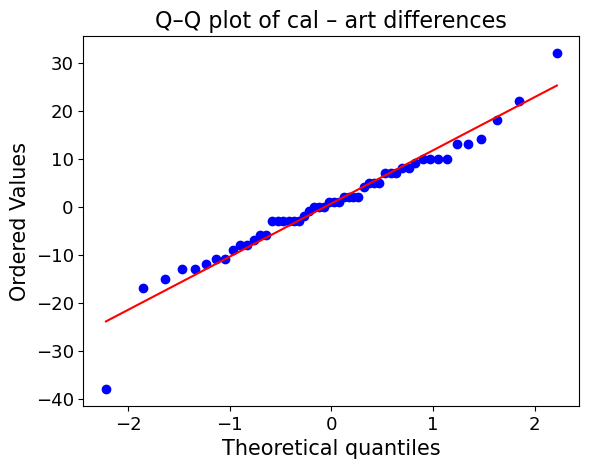

In [41]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(diff, dist="norm", plot=plt)
plt.title("Q–Q plot of cal – art differences")
plt.show()


In [42]:
import pandas as pd
from scipy.stats import shapiro

# Prepare a results list
normality_results = []

# Within-session normality
for src, grp in df_within_all.groupby('source'):
    stat, p = shapiro(grp['mean_val_accuracy'])
    normality_results.append({
        'Dataset': 'Within-session',
        'Source':   src,
        'Test':     'Shapiro–Wilk',
        'Statistic': stat,
        'p-value':   p,
        'Normal?':   p > 0.05
    })

# # Cross-session normality
# for src, grp in df_cross_all.groupby('source'):
#     stat, p = shapiro(grp['test_accuracy'])
#     normality_results.append({
#         'Dataset': 'Cross-session',
#         'Source':   src,
#         'Test':     'Shapiro–Wilk',
#         'Statistic': stat,
#         'p-value':   p,
#         'Normal?':   p > 0.05
#     })

# Convert to DataFrame and display
normality_df = pd.DataFrame(normality_results)
print(normality_df)


NameError: name 'df_within_all' is not defined

In [ ]:
df_within_all.source.unique()

array(['bazinis', 'automatinis', 'β0.1 elim.', 'β0.01 elim.',
       'β0.1 tiesinis', 'β0.01 tiesinis', 'β0.1 švelnus', 'β0.01 švelnus',
       'β0.2 elim.', 'β0.2 tiesinis', 'β0.2 švelnus', 'β0.5 elim.',
       'β0.05 elim.', 'β0.5 tiesinis', 'β0.05 tiesinis', 'β0.5 švelnus',
       'β0.05 švelnus'], dtype=object)

In [ ]:
results.keys()

dict_keys(['2025-04-25', '2025-04-25_autoreject', '2025-04-22_atar_beta0.1_OptModeelim', '2025-04-22_atar_beta0.01_OptModeelim', '2025-04-22_atar_beta0.1_OptModelinAtten', '2025-04-22_atar_beta0.01_OptModelinAtten', '2025-04-22_atar_beta0.1_OptModesoft', '2025-04-22_atar_beta0.01_OptModesoft', '2025-04-22_atar_beta0.2_OptModeelim', '2025-04-22_atar_beta0.2_OptModelinAtten', '2025-04-22_atar_beta0.2_OptModesoft', '2025-04-22_atar_beta0.5_OptModeelim', '2025-04-22_atar_beta0.05_OptModeelim', '2025-04-22_atar_beta0.5_OptModelinAtten', '2025-04-22_atar_beta0.05_OptModelinAtten', '2025-04-22_atar_beta0.5_OptModesoft', '2025-04-22_atar_beta0.05_OptModesoft'])

TypeError: list indices must be integers or slices, not str

In [83]:
results

{'2025-04-25': {'within':      evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
  0          01_1    CSP_SVM                0.640        0.696125   
  1          01_1     CSP_LR                0.595        0.639375   
  2          01_1    CSP_LDA                0.595        0.648125   
  3          01_1     CSP_RF                1.000        1.000000   
  4          01_1   CSSP_SVM                0.635        0.698875   
  ...         ...        ...                  ...             ...   
  3739       53_2  LogVar_RF                1.000        1.000000   
  3740       53_2     TS_SVM                1.000        1.000000   
  3741       53_2      TS_LR                1.000        1.000000   
  3742       53_2     TS_LDA                0.845        0.921375   
  3743       53_2      TS_RF                1.000        1.000000   
  
        mean_val_accuracy  mean_val_auc feature_extraction  
  0                  0.55         0.626                CSP  
  1                  0.

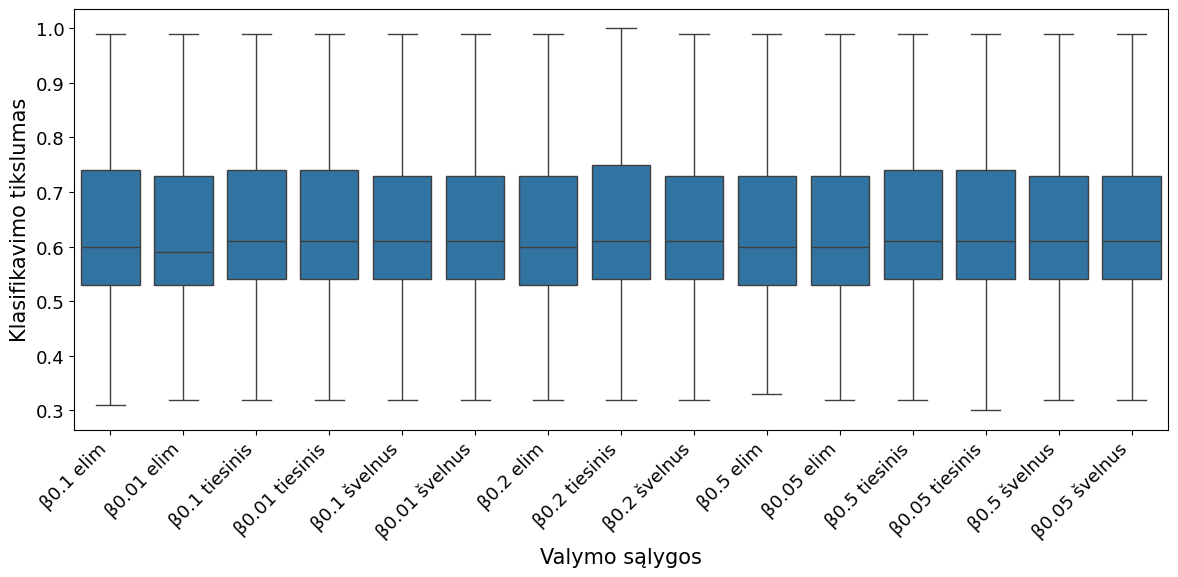

In [85]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

within_list = [
    dfs['within'].assign(source=src)
    for src, dfs in results.items()
]

df_within_all = pd.concat(within_list, ignore_index=True)

# Base mappings for the two non‐beta sources
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    # 1) remove leading date_
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)
    # 2) greek beta
    s = s.replace('beta', 'β')
    # 3) drop atar_ prefix if present
    s = s.replace('atar_', '')
    # 4) rename modes
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim'))
    # 5) finally swap all underscores for spaces
    return s.replace('_', ' ')

# Apply mapping + cleaning
df_within_all['source'] = (
    df_within_all['source']
      .map(base_map)
      .fillna(df_within_all['source'].apply(clean_source))
)

# --- filter out bazinis & automatinis ---
df_plot = df_within_all[~df_within_all['source'].isin(['bazinis', 'automatinis'])]

# Re‐plot using the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='mean_val_accuracy', data=df_plot)
plt.xlabel("Valymo sąlygos")
plt.ylabel("Klasifikavimo tikslumas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [86]:
df_within_all

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0           01_1    CSP_SVM               0.6400        0.696125   
1           01_1     CSP_LR               0.5950        0.639375   
2           01_1    CSP_LDA               0.5950        0.648125   
3           01_1     CSP_RF               1.0000        1.000000   
4           01_1   CSSP_SVM               0.6350        0.698875   
...          ...        ...                  ...             ...   
63283       53_2  LogVar_RF               1.0000        1.000000   
63284       53_2     TS_SVM               1.0000        1.000000   
63285       53_2      TS_LR               0.9975        0.999875   
63286       53_2     TS_LDA               0.8100        0.900375   
63287       53_2      TS_RF               1.0000        1.000000   

       mean_val_accuracy  mean_val_auc feature_extraction         source  
0                   0.55         0.626                CSP        bazinis  
1                   0.61         0.610                CSP        bazinis  
2                   0.55         0.582                CSP        bazinis  
3                   0.57         0.584                CSP        bazinis  
4                   0.54         0.614               CSSP        bazinis  
...                  ...           ...                ...            ...  
63283               0.48         0.423                NaN  β0.05 švelnus  
63284               0.60         0.658                NaN  β0.05 švelnus  
63285               0.61         0.658                NaN  β0.05 švelnus  
63286               0.61         0.576                NaN  β0.05 švelnus  
63287               0.57         0.593                NaN  β0.05 švelnus  

[63288 rows x 8 columns]

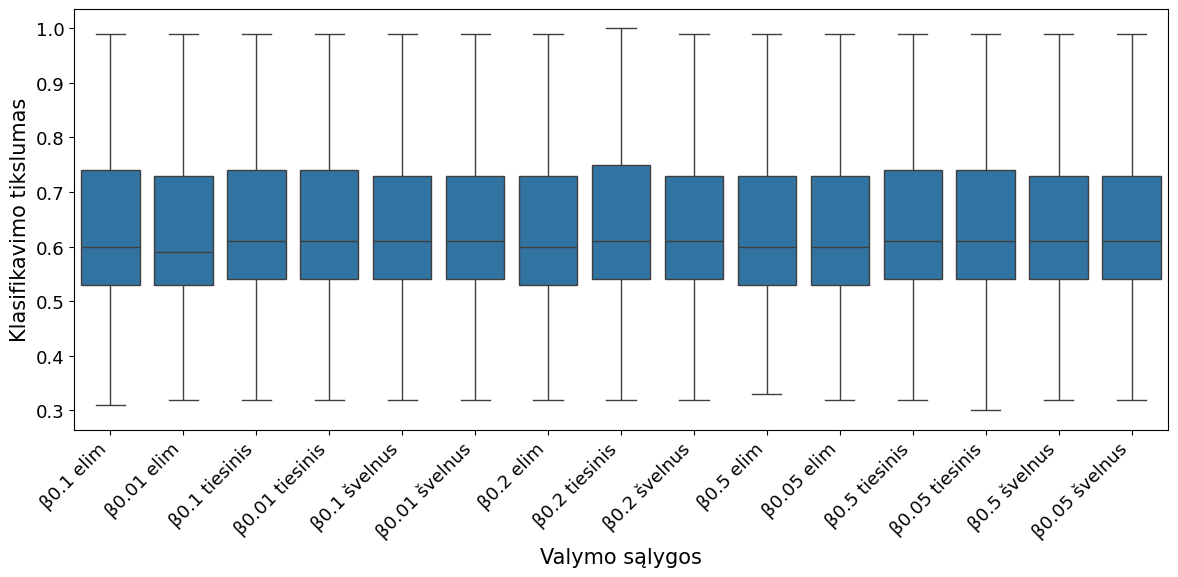

In [87]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine within‐session DataFrames
within_list = [
    dfs['within'].assign(source=src)
    for src, dfs in results.items()
]
df_within_all = pd.concat(within_list, ignore_index=True)

# Base mappings for the two non‐beta sources
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    # 1) remove leading date_
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)
    # 2) greek beta
    s = s.replace('beta', 'β')
    # 3) drop atar_ prefix if present
    s = s.replace('atar_', '')
    # 4) rename modes
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim'))
    # 5) finally swap all underscores for spaces
    return s.replace('_', ' ')

# Apply mapping + cleaning
df_within_all['source'] = (
    df_within_all['source']
      .map(base_map)
      .fillna(df_within_all['source'].apply(clean_source))
)

# --- filter out bazinis & automatinis ---
df_plot = df_within_all[~df_within_all['source'].isin(['bazinis', 'automatinis'])]

# Re‐plot using the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='mean_val_accuracy', data=df_plot)
plt.xlabel("Valymo sąlygos")
plt.ylabel("Klasifikavimo tikslumas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [88]:
results['2025-04-25']['cross']

evaluation   pipeline  test_accuracy  test_roc_auc  \
0            01    CSP_SVM           0.53           NaN   
1            01     CSP_LR           0.51        0.4428   
2            01    CSP_LDA           0.51        0.4528   
3            01     CSP_RF           0.56        0.6016   
4            01   CSSP_SVM           0.55           NaN   
...         ...        ...            ...           ...   
1867         53  LogVar_RF           0.49        0.4646   
1868         53     TS_SVM           0.60           NaN   
1869         53      TS_LR           0.63        0.6652   
1870         53     TS_LDA           0.56        0.5780   
1871         53      TS_RF           0.58        0.5818   

                                           correct_mask  
0     [False, True, False, False, True, True, False,...  
1     [False, False, False, False, True, True, False...  
2     [False, False, False, False, True, True, False...  
3     [False, True, False, False, True, True, False,...  
4     [False, True, False, False, True, True, False,...  
...                                                 ...  
1867  [True, False, False, True, False, False, True,...  
1868  [True, True, True, True, True, True, True, Tru...  
1869  [False, True, True, True, True, True, True, Tr...  
1870  [False, True, True, False, True, True, False, ...  
1871  [False, True, True, True, True, True, False, F...  

[1872 rows x 5 columns]

C:\Users\rokas\AppData\Local\Temp\ipykernel_48884\3535847835.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


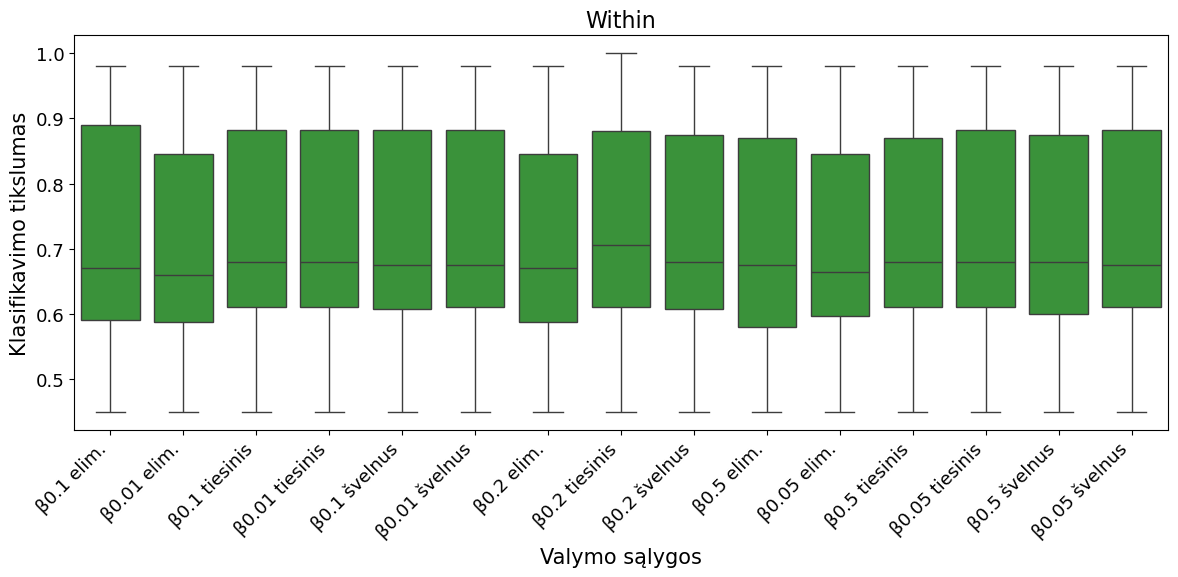

In [89]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine within‐session DataFrames
within_list = [
    dfs['within'].assign(source=src)
    for src, dfs in results.items()
]
df_within = pd.concat(within_list, ignore_index=True)
df_within_all = df_within[df_within.pipeline == "TS_LR"]
# Base mappings for the two non‐beta sources
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    # 1) remove leading date_
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)
    # 2) greek beta
    s = s.replace('beta', 'β')
    # 3) drop atar_ prefix if present
    s = s.replace('atar_', '')
    # 4) rename modes
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    # 5) finally swap all underscores for spaces
    return s.replace('_', ' ')

# Apply mapping + cleaning
df_within_all['source'] = (
    df_within_all['source']
      .map(base_map)
      .fillna(df_within_all['source'].apply(clean_source))
)

# --- filter out bazinis & automatinis ---
df_plot = df_within_all[~df_within_all['source'].isin(['bazinis', 'automatinis'])]

# Re‐plot using the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='mean_val_accuracy', data=df_plot,
                color='#2ca02c')
plt.xlabel("Valymo sąlygos")
plt.ylabel("Klasifikavimo tikslumas")
plt.title('Within')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [90]:
df_plot

evaluation pipeline  mean_train_accuracy  mean_train_auc  \
7521        01_1    TS_LR               1.0000        1.000000   
7557        01_2    TS_LR               1.0000        1.000000   
7593        02_1    TS_LR               1.0000        1.000000   
7629        02_2    TS_LR               1.0000        1.000000   
7665        03_1    TS_LR               1.0000        1.000000   
...          ...      ...                  ...             ...   
63141       51_2    TS_LR               1.0000        1.000000   
63177       52_1    TS_LR               1.0000        1.000000   
63213       52_2    TS_LR               1.0000        1.000000   
63249       53_1    TS_LR               0.9975        0.999875   
63285       53_2    TS_LR               0.9975        0.999875   

       mean_val_accuracy  mean_val_auc feature_extraction         source  
7521                0.79         0.896                NaN     β0.1 elim.  
7557                0.79         0.896                NaN     β0.1 elim.  
7593                0.92         0.966                NaN     β0.1 elim.  
7629                0.92         0.966                NaN     β0.1 elim.  
7665                0.84         0.966                NaN     β0.1 elim.  
...                  ...           ...                ...            ...  
63141               0.55         0.590                NaN  β0.05 švelnus  
63177               0.77         0.866                NaN  β0.05 švelnus  
63213               0.77         0.866                NaN  β0.05 švelnus  
63249               0.61         0.658                NaN  β0.05 švelnus  
63285               0.61         0.658                NaN  β0.05 švelnus  

[1550 rows x 8 columns]

In [91]:
mean_acc = df_plot.groupby('source')['mean_val_accuracy'].mean()
mean_acc.sort_values(ascending=False)

source
β0.2 tiesinis     0.731538
β0.5 švelnus      0.728077
β0.2 švelnus      0.727115
β0.01 švelnus     0.726923
β0.05 švelnus     0.726923
β0.01 tiesinis    0.726538
β0.1 švelnus      0.726538
β0.05 tiesinis    0.726346
β0.1 tiesinis     0.726346
β0.5 tiesinis     0.725769
β0.1 elim.        0.722766
β0.05 elim.       0.717885
β0.5 elim.        0.717500
β0.01 elim.       0.716731
β0.2 elim.        0.712885
Name: mean_val_accuracy, dtype: float64

In [92]:
med_acc = df_plot.groupby('source')['mean_val_accuracy'].median()
med_acc.sort_values(ascending=False)

source
β0.2 tiesinis     0.705
β0.01 tiesinis    0.680
β0.05 tiesinis    0.680
β0.1 tiesinis     0.680
β0.2 švelnus      0.680
β0.5 tiesinis     0.680
β0.5 švelnus      0.680
β0.01 švelnus     0.675
β0.05 švelnus     0.675
β0.1 švelnus      0.675
β0.5 elim.        0.675
β0.1 elim.        0.670
β0.2 elim.        0.670
β0.05 elim.       0.665
β0.01 elim.       0.660
Name: mean_val_accuracy, dtype: float64

C:\Users\rokas\AppData\Local\Temp\ipykernel_55424\4024618561.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\

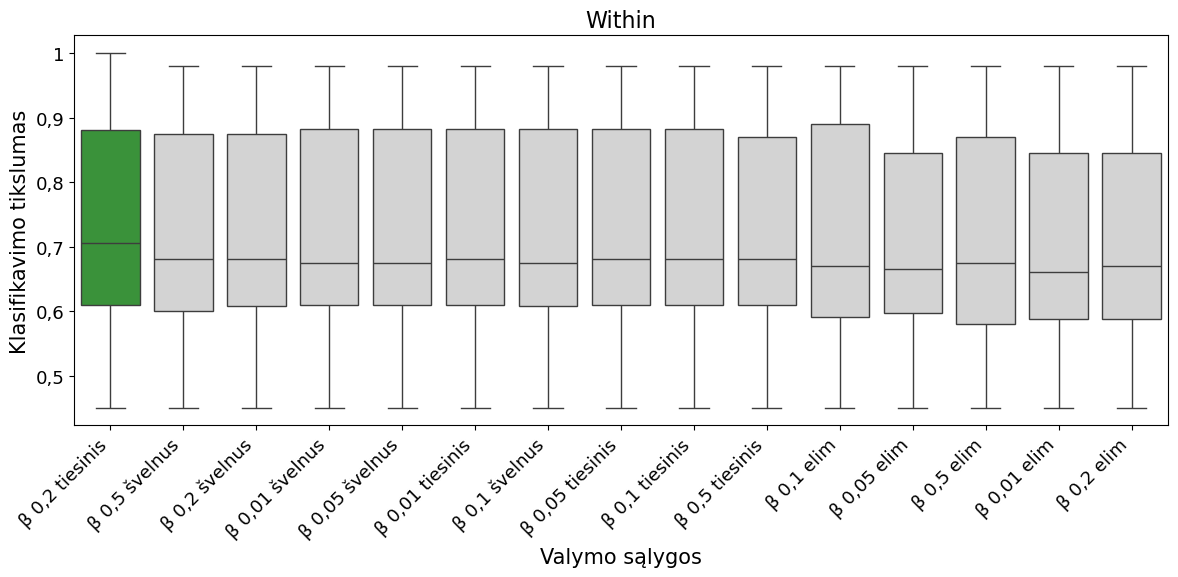

In [29]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Combine within‑session DataFrames and select TS_LR ---
within_list = [
    dfs['within'].assign(source=src)
    for src, dfs in results.items()
]
df_within = pd.concat(within_list, ignore_index=True)
df_within_all = df_within[df_within.pipeline == "TS_LR"].copy()

# --- 2) Define the mappings and cleaning function ---
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    # drop leading date_
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)
    # greek beta
    s = s.replace('beta', 'β ')
    # drop atar_
    s = s.replace('atar_', '')
    # rename modes
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    # underscores → spaces
    return s.replace('_', ' ')

# apply mapping + cleaning
df_within_all['source'] = (
    df_within_all['source']
      .map(base_map)
      .fillna(df_within_all['source'].apply(clean_source))
)

# --- 3) Filter out the two base methods ---
df_plot = df_within_all[~df_within_all['source'].isin(['bazinis', 'automatinis'])]

# --- 4) Compute mean accuracy, pick best, and build palette/order ---
mean_acc     = df_plot.groupby('source')['mean_val_accuracy'].mean()
best_source  = mean_acc.idxmax()
order_by_mean = mean_acc.sort_values(ascending=False).index.tolist()

base_color = '#d3d3d3'
highlight  = '#2ca02c'
palette    = {
    s: (highlight if s == best_source else base_color)
    for s in order_by_mean
}

# --- 5) Plot with sorted order & per‑box alpha ---
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='mean_val_accuracy',
    data=df_plot,
    order=order_by_mean,
    palette=palette,
    ax=ax
)

# annotate best with a star (optional, uncomment if needed)
ymax = df_plot['mean_val_accuracy'].max()
x_best = order_by_mean.index(best_source)
# ax.text(
#     x_best, ymax + 0.005, "",
#     ha='center', va='bottom',
#     fontsize=20, color=highlight
# )

ax.set_xlabel("Valymo sąlygos")
ax.set_ylabel("Klasifikavimo tikslumas")
ax.set_title("Within")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# --- Helper to format numbers with comma, drop trailing zeros ---
def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    # Remove trailing ,00, or ,0, or , if needed
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    return s

# --- Format y-axis ticks with comma and no trailing zeros ---
yticks = ax.get_yticks()
ax.set_yticklabels([format_number(y) for y in yticks])

# --- Format x-axis (betas etc.) with comma and no trailing zeros ---
labels = [label.get_text().replace('.', ',') for label in ax.get_xticklabels()]
labels = [re.sub(r',00$', '', lbl) for lbl in labels]
labels = [re.sub(r',0$', '', lbl) for lbl in labels]
labels = [re.sub(r',$', '', lbl) for lbl in labels]
ax.set_xticklabels(labels)

plt.show()


In [28]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 14,        # base font size for text
    'axes.titlesize': 16,   # title
    'axes.labelsize': 15,   # x- and y-labels
    'xtick.labelsize': 13,  # tick labels
    'ytick.labelsize': 13, 
    'legend.fontsize': 12,  # legend text
    'legend.title_fontsize': 13,
})

In [93]:
from scipy.stats import shapiro

# Store results
normality_results = {}

for name, group in df_plot.groupby('source'):
    stat, p = shapiro(group['mean_val_accuracy'])
    normality_results[name] = {'W': stat, 'p': p}

# Print formatted summary
print("Normalumo testas (Shapiro–Wilk):")
for name, res in normality_results.items():
    print(f"{name}: W = {res['W']:.3f}, p = {res['p']:.4f}")

# Optional: If you want a DataFrame
normality_df = pd.DataFrame(normality_results).T


Normalumo testas (Shapiro–Wilk):
β0.01 elim.: W = 0.927, p = 0.0000
β0.01 tiesinis: W = 0.934, p = 0.0001
β0.01 švelnus: W = 0.934, p = 0.0001
β0.05 elim.: W = 0.928, p = 0.0000
β0.05 tiesinis: W = 0.933, p = 0.0001
β0.05 švelnus: W = 0.934, p = 0.0001
β0.1 elim.: W = 0.921, p = 0.0000
β0.1 tiesinis: W = 0.934, p = 0.0001
β0.1 švelnus: W = 0.934, p = 0.0001
β0.2 elim.: W = 0.929, p = 0.0000
β0.2 tiesinis: W = 0.949, p = 0.0005
β0.2 švelnus: W = 0.935, p = 0.0001
β0.5 elim.: W = 0.927, p = 0.0000
β0.5 tiesinis: W = 0.934, p = 0.0001
β0.5 švelnus: W = 0.935, p = 0.0001


In [36]:
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

# Pivot to wide format: rows = subject, columns = source
df_wide = df_plot.pivot_table(
    index='evaluation',    # or whatever your subject ID column is
    columns='source',
    values='mean_val_accuracy'
)

# Drop rows with missing data (optional)
df_wide = df_wide.dropna()

# Run Friedman test
stat, p = friedmanchisquare(*[df_wide[col] for col in df_wide.columns])
print(f"Friedman test: χ² = {stat:.3f}, p = {p:.4g}")


Friedman test: χ² = 77.881, p = 6.98e-11


In [37]:
# Nemenyi post-hoc
nemenyi = sp.posthoc_nemenyi_friedman(df_wide.values)
nemenyi.index = df_wide.columns
nemenyi.columns = df_wide.columns

print("Nemenyi post-hoc test (p-values):")
print(nemenyi)


Nemenyi post-hoc test (p-values):
source           β 0.01 elim.  β 0.01 tiesinis  β 0.01 švelnus  β 0.05 elim.  \
source                                                                         
β 0.01 elim.         1.000000         0.479940        0.916304      1.000000   
β 0.01 tiesinis      0.479940         1.000000        0.999996      0.590929   
β 0.01 švelnus       0.916304         0.999996        1.000000      0.957739   
β 0.05 elim.         1.000000         0.590929        0.957739      1.000000   
β 0.05 tiesinis      0.609379         1.000000        1.000000      0.716022   
β 0.05 švelnus       0.916304         0.999996        1.000000      0.957739   
β 0.1 elim.          1.000000         0.152915        0.584759      0.999995   
β 0.1 tiesinis       0.639831         1.000000        1.000000      0.743674   
β 0.1 švelnus        0.941770         0.999984        1.000000      0.972839   
β 0.2 elim.          0.998307         0.025388        0.194669      0.994082   
β 0.2 

C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\2681052136.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\

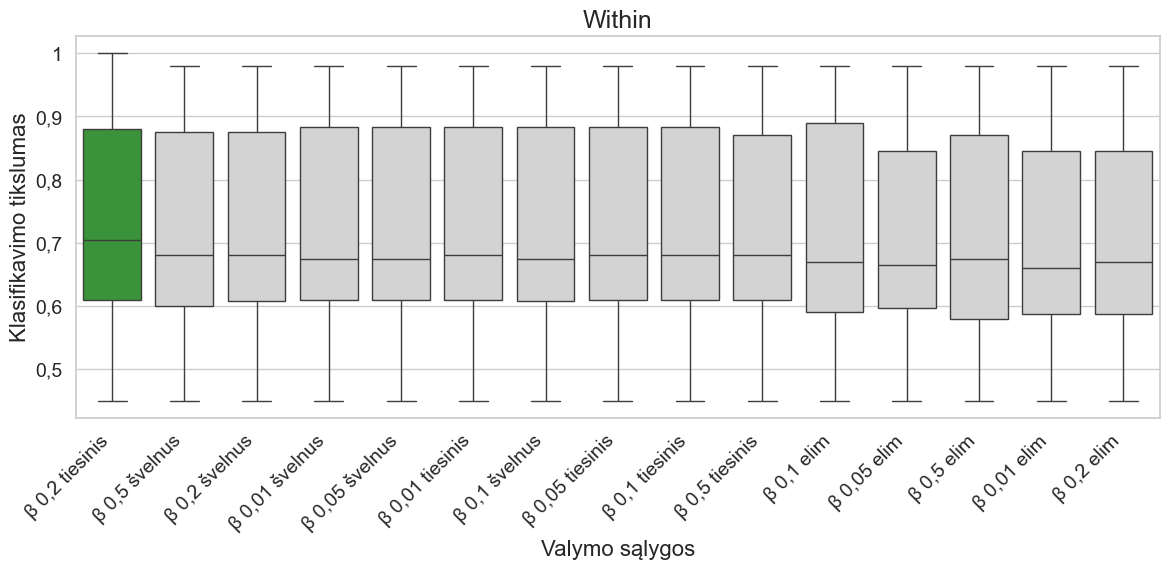

In [38]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1) Combine within‑session DataFrames and select TS_LR ---
within_list = [
    dfs['within'].assign(source=src)
    for src, dfs in results.items()
]
df_within = pd.concat(within_list, ignore_index=True)
df_within_all = df_within[df_within.pipeline == "TS_LR"].copy()

# --- 2) Define the mappings and cleaning function ---
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)
    s = s.replace('beta', 'β ')
    s = s.replace('atar_', '')
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    return s.replace('_', ' ')

df_within_all['source'] = (
    df_within_all['source']
      .map(base_map)
      .fillna(df_within_all['source'].apply(clean_source))
)

# --- 3) Filter out the two base methods ---
df_plot = df_within_all[~df_within_all['source'].isin(['bazinis', 'automatinis'])]

# --- 4) Compute mean accuracy, pick best, and build palette/order ---
mean_acc     = df_plot.groupby('source')['mean_val_accuracy'].mean()
best_source  = mean_acc.idxmax()
order_by_mean = mean_acc.sort_values(ascending=False).index.tolist()

base_color = '#d3d3d3'
highlight  = '#2ca02c'
palette    = {
    s: (highlight if s == best_source else base_color)
    for s in order_by_mean
}

# --- 5) Plot with sorted order & per‑box alpha ---
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='mean_val_accuracy',
    data=df_plot,
    order=order_by_mean,
    palette=palette,
    ax=ax
)

ax.set_xlabel("Valymo sąlygos")
ax.set_ylabel("Klasifikavimo tikslumas")
ax.set_title("Within")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# --- Helper to format numbers with comma, drop trailing zeros ---
def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    return s

yticks = ax.get_yticks()
ax.set_yticklabels([format_number(y) for y in yticks])

labels = [label.get_text().replace('.', ',') for label in ax.get_xticklabels()]
labels = [re.sub(r',00$', '', lbl) for lbl in labels]
labels = [re.sub(r',0$', '', lbl) for lbl in labels]
labels = [re.sub(r',$', '', lbl) for lbl in labels]
ax.set_xticklabels(labels)

# --- SIGNIFICANT PAIRS: annotate with bars ---
def add_sig_bar(ax, x1, x2, y, text, bar_height=0.015):
    """Draw a significance bar with stars between boxes x1 and x2 at height y."""
    ax.plot([x1, x1, x2, x2], [y, y + bar_height, y + bar_height, y], lw=1.5, c='k')
    ax.text((x1 + x2) / 2, y + bar_height, text, ha='center', va='bottom', color='k', fontsize=18)

# Get cleaned x-tick labels after plotting (MUST MATCH MANUALLY with sig_pairs)
xticklabels = [lbl.get_text() for lbl in ax.get_xticklabels()]
xpos = {lbl: i for i, lbl in enumerate(xticklabels)}
sig_pairs = [
    ("β 0.01 tiesinis", "β 0.2 elim.",   "p = 0.025"),
    ("β 0.05 tiesinis", "β 0.2 elim.",   "p = 0.045"),
    ("β 0.2 elim.",      "β 0.2 tiesinis", "p = 0.0056"),
    ("β 0.1 elim.",      "β 0.2 tiesinis", "p = 0.047"),
]


# Optional: print(xticklabels) to check order
y_offset = 0.01
height_per_bar = 0.02

# To avoid overlapping, stack bars above each other
used_pairs = []
for idx, (left, right, text) in enumerate(sig_pairs):
    # Both sides must be present on x-axis
    if left in xpos and right in xpos:
        x1, x2 = xpos[left], xpos[right]
        # Find y to place the bar: above max of both boxes, add extra for stacking
        y = max(
            df_plot[df_plot['source'] == left]['mean_val_accuracy'].max(),
            df_plot[df_plot['source'] == right]['mean_val_accuracy'].max()
        ) + y_offset + (len(used_pairs) * height_per_bar)
        add_sig_bar(ax, x1, x2, y, text)
        used_pairs.append((x1, x2))

plt.show()


In [12]:
import statannotations
print(statannotations.__version__)


0.7.2


In [ ]:
0.05,0.01,0.1,0.2,0.5

C:\Users\rokas\AppData\Local\Temp\ipykernel_55424\2913751442.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\

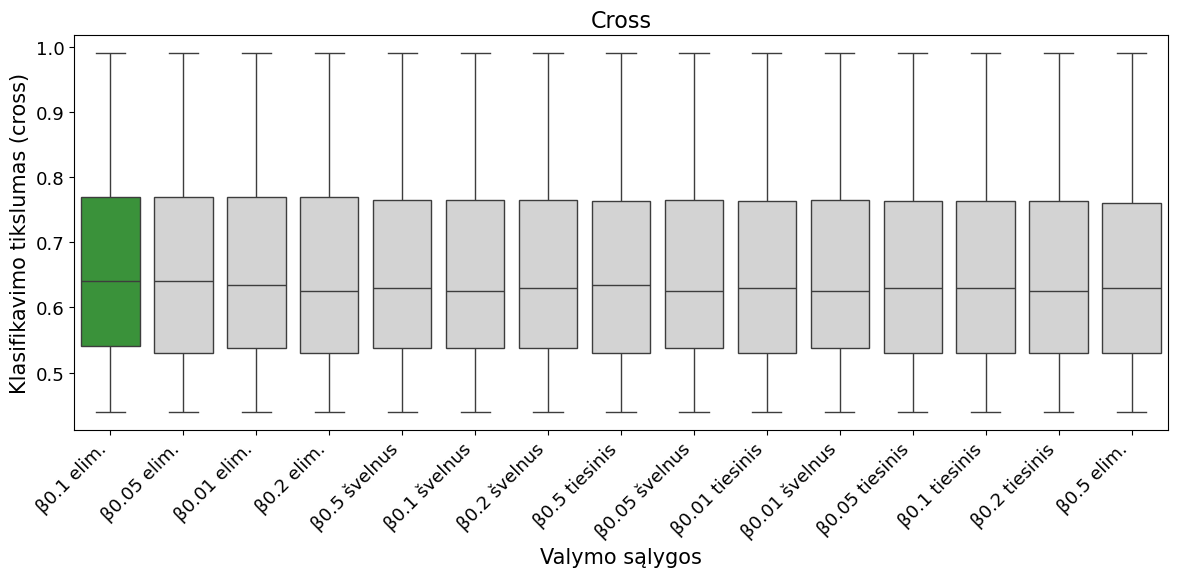

In [35]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Combine cross‑session DataFrames
cross_list = [
    dfs['cross'].assign(source=src)
    for src, dfs in results.items()
]
df_cross = pd.concat(cross_list, ignore_index=True)
df_cross_all = df_cross[df_cross.pipeline == "TS_LR"].copy()

# 2) Same mapping + cleaning as before
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)       # drop date_
    s = s.replace('beta', 'β')                      # β
    s = s.replace('atar_', '')                      # drop atar_
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    return s.replace('_', ' ')                       # underscores → spaces

df_cross_all['source'] = (
    df_cross_all['source']
      .map(base_map)
      .fillna(df_cross_all['source'].apply(clean_source))
)

# 3) Filter out bazinis & automatinis
df_cross_plot = df_cross_all[~df_cross_all['source'].isin(['bazinis', 'automatinis'])]

# 4) Compute mean test_accuracy and identify the best
mean_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].mean()
best_cross = mean_acc_cross.idxmax()
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()
# … everything up to computing mean_acc_cross & best_cross …

# 5) Determine descending order by mean test_accuracy
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()

# 6) Build palette as before
base_color  = '#d3d3d3'
highlight   = '#2ca02c'
palette_cross = {
    s: (highlight if s == best_cross else base_color)
    for s in order_cross
}

# 7) Plot & override alpha per‐box
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='test_accuracy',
    data=df_cross_plot,
    order=order_cross,       # descending mean
    palette=palette_cross,
    ax=ax
)

ax.set_xlabel("Valymo sąlygos")
ax.set_ylabel("Klasifikavimo tikslumas (cross)")
ax.set_title("Cross")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [354]:
df_cross_plot

evaluation pipeline  test_accuracy  test_roc_auc  \
3777          01    TS_LR           0.75        0.8412   
3813          02    TS_LR           0.72        0.8116   
3849          03    TS_LR           0.87        0.9860   
3885          04    TS_LR           0.56        0.6448   
3921          05    TS_LR           0.77        0.9324   
...          ...      ...            ...           ...   
31497         49    TS_LR           0.50        0.8056   
31533         50    TS_LR           0.55        0.5900   
31569         51    TS_LR           0.50        0.5024   
31605         52    TS_LR           0.78        0.8772   
31641         53    TS_LR           0.60        0.6496   

                                            correct_mask         source  
3777   [True, True, True, True, True, True, True, Tru...     β0.1 elim.  
3813   [False, True, True, True, True, True, False, T...     β0.1 elim.  
3849   [True, True, True, True, True, True, True, Tru...     β0.1 elim.  
3885   [True, True, True, True, False, False, True, F...     β0.1 elim.  
3921   [True, True, True, True, True, False, True, Tr...     β0.1 elim.  
...                                                  ...            ...  
31497  [True, False, True, True, False, False, True, ...  β0.05 švelnus  
31533  [False, True, False, True, True, False, False,...  β0.05 švelnus  
31569  [True, False, False, False, True, False, True,...  β0.05 švelnus  
31605  [True, True, True, True, False, True, True, Tr...  β0.05 švelnus  
31641  [False, True, True, True, True, False, True, T...  β0.05 švelnus  

[775 rows x 6 columns]

C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\1726965936.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



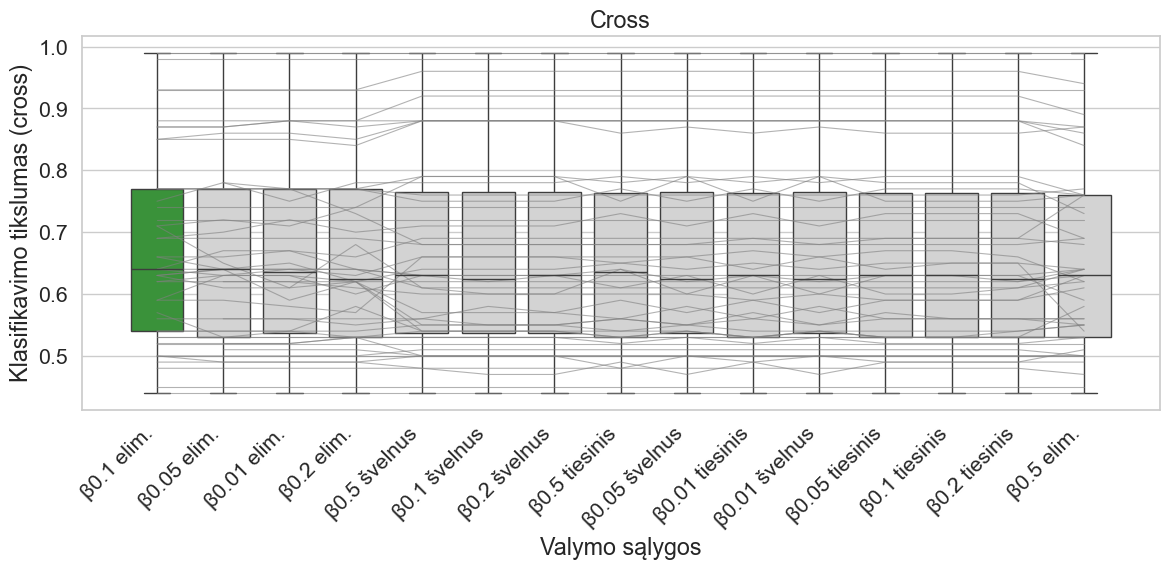

In [352]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Combine cross‑session DataFrames
cross_list = [
    dfs['cross'].assign(source=src)
    for src, dfs in results.items()
]
df_cross = pd.concat(cross_list, ignore_index=True)
df_cross_all = df_cross[df_cross.pipeline == "TS_LR"].copy()

# Filter subjects with classification accuracy >= 0.8
# subjects_high_acc = df_cross_all[df_cross_all['test_accuracy'] >= 0.9]['evaluation'].unique()
# df_cross_all = df_cross_all[df_cross_all['evaluation'].isin(subjects_high_acc)]

# 2) Same mapping + cleaning as before
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)       # drop date_
    s = s.replace('beta', 'β')                      # β
    s = s.replace('atar_', '')                      # drop atar_
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    return s.replace('_', ' ')                       # underscores → spaces

df_cross_all['source'] = (
    df_cross_all['source']
      .map(base_map)
      .fillna(df_cross_all['source'].apply(clean_source))
)

# 3) Filter out bazinis & automatinis
df_cross_plot = df_cross_all[~df_cross_all['source'].isin(['bazinis', 'automatinis'])]

# 4) Compute mean test_accuracy and identify the best
mean_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].mean()
best_cross = mean_acc_cross.idxmax()

# 5) Determine descending order by mean test_accuracy
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()

# 6) Build palette as before
base_color  = '#d3d3d3'
highlight   = '#2ca02c'
palette_cross = {
    s: (highlight if s == best_cross else base_color)
    for s in order_cross
}

# 7) Plot & override alpha per‐box with subject lines
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='test_accuracy',
    data=df_cross_plot,
    order=order_cross,       # descending mean
    palette=palette_cross,
    ax=ax
)

# Connect lines for each subject
for subject in df_cross_plot['evaluation'].unique():
    df_subj = df_cross_plot[df_cross_plot['evaluation'] == subject]
    df_subj = df_subj.set_index('source').reindex(order_cross)
    plt.plot(df_subj.index, df_subj['test_accuracy'], color='gray', linestyle='-', linewidth=0.8, alpha=0.6)

ax.set_xlabel("Valymo sąlygos")
ax.set_ylabel("Klasifikavimo tikslumas (cross)")
ax.set_title("Cross")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sample counts per source:
source
β0.1 švelnus      18
β0.2 švelnus      18
β0.5 švelnus      18
β0.01 švelnus     18
β0.05 švelnus     18
β0.01 tiesinis    18
β0.05 tiesinis    18
β0.1 tiesinis     18
β0.2 tiesinis     18
β0.5 tiesinis     18
β0.05 elim.       18
β0.2 elim.        18
β0.5 elim.        18
β0.1 elim.        18
β0.01 elim.       19
Name: count, dtype: int64

Mean test_accuracy per source:
source
β0.1 švelnus      0.851667
β0.2 švelnus      0.851667
β0.5 švelnus      0.851667
β0.01 švelnus     0.851111
β0.05 švelnus     0.851111
β0.01 tiesinis    0.850556
β0.05 tiesinis    0.850556
β0.1 tiesinis     0.850556
β0.2 tiesinis     0.850556
β0.5 tiesinis     0.850556
β0.05 elim.       0.844444
β0.2 elim.        0.842222
β0.5 elim.        0.842222
β0.1 elim.        0.837778
β0.01 elim.       0.836316
Name: test_accuracy, dtype: float64


C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\3105435155.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



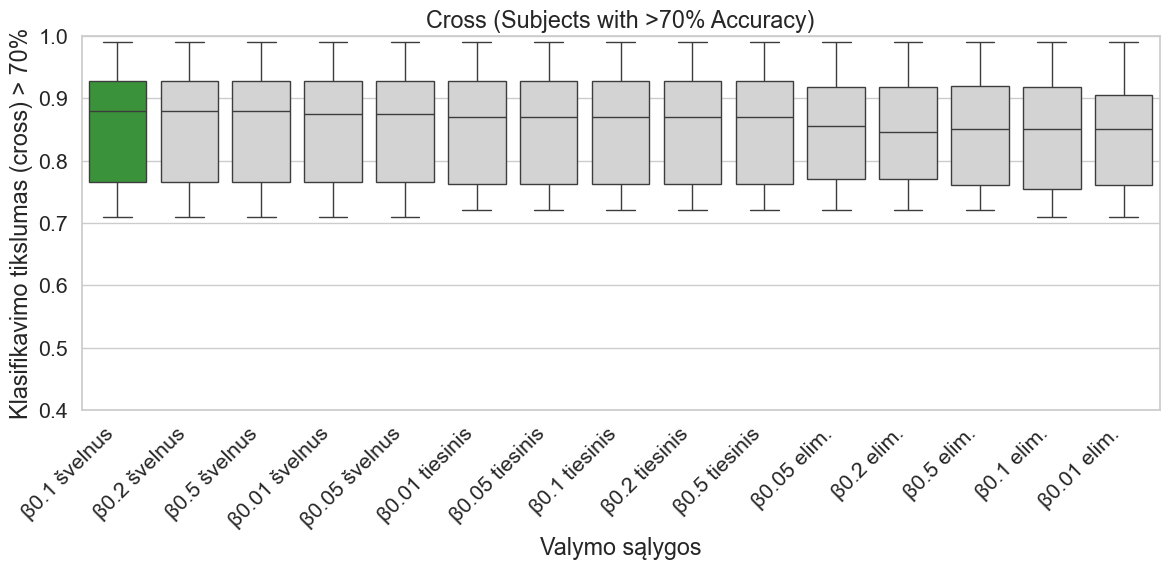

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only rows with test_accuracy > 0.7 (you can change this back to 0.9 if needed)
df_high_acc = df_cross_plot[df_cross_plot['test_accuracy'] > 0.7]

# Recompute mean accuracy & order for filtered data
mean_acc_high = df_high_acc.groupby('source')['test_accuracy'].mean()
best_high = mean_acc_high.idxmax()
order_high = mean_acc_high.sort_values(ascending=False).index.tolist()

# Print counts and means per group
counts = df_high_acc['source'].value_counts().reindex(order_high)
print("Sample counts per source:")
print(counts)
print("\nMean test_accuracy per source:")
print(mean_acc_high.loc[order_high])

# Palette for highlighting best source
base_color  = '#d3d3d3'
highlight   = '#2ca02c'
palette_high = {
    s: (highlight if s == best_high else base_color)
    for s in order_high
}

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='test_accuracy',
    data=df_high_acc,
    order=order_high,
    palette=palette_high,
    ax=ax
)

ax.set_ylim(0.4, 1)  # fixed y-axis scale
ax.set_xlabel("Valymo sąlygos")
ax.set_ylabel("Klasifikavimo tikslumas")
ax.set_title("Cross (Subjects with >70% Accuracy)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [211]:
df_cross_all

evaluation pipeline  test_accuracy  test_roc_auc  \
33            01    TS_LR           0.64        0.8828   
69            02    TS_LR           0.75        0.8240   
105           03    TS_LR           0.90        0.9884   
141           04    TS_LR           0.56        0.6348   
177           05    TS_LR           0.75        0.9300   
...          ...      ...            ...           ...   
31497         49    TS_LR           0.50        0.8056   
31533         50    TS_LR           0.55        0.5900   
31569         51    TS_LR           0.50        0.5024   
31605         52    TS_LR           0.78        0.8772   
31641         53    TS_LR           0.60        0.6496   

                                            correct_mask         source  
33     [False, True, False, True, True, True, True, T...        bazinis  
69     [False, True, True, True, True, True, True, Tr...        bazinis  
105    [True, True, True, True, True, True, True, Tru...        bazinis  
141    [True, True, True, True, False, False, True, F...        bazinis  
177    [True, False, True, True, True, False, True, T...        bazinis  
...                                                  ...            ...  
31497  [True, False, True, True, False, False, True, ...  β0.05 švelnus  
31533  [False, True, False, True, True, False, False,...  β0.05 švelnus  
31569  [True, False, False, False, True, False, True,...  β0.05 švelnus  
31605  [True, True, True, True, False, True, True, Tr...  β0.05 švelnus  
31641  [False, True, True, True, True, False, True, T...  β0.05 švelnus  

[879 rows x 6 columns]

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import friedmanchisquare, rankdata
import scikit_posthocs as sp

# 1) Ensure mean_val_accuracy is numeric and drop any bad rows
df_within_all_ = df_within_all[df_within_all.pipeline =='TS_LR']
df_within_all_['mean_val_accuracy'] = pd.to_numeric(
    df_within_all_['mean_val_accuracy'],
    errors='coerce'
)
df_clean = df_within_all_.dropna(subset=['mean_val_accuracy']).copy()

# 2) Build your block ID
df_clean['block'] = (
    df_clean['evaluation'].astype(str)
    + '_' + df_clean['pipeline']
)

# 3) Pivot to wide form with aggregation to collapse duplicates
wide = df_clean.pivot_table(
    index   = 'block',
    columns = 'source',
    values  = 'mean_val_accuracy',
    aggfunc = 'mean'
).dropna()
# 1) Friedman + Nemenyi (you’ve already done this)
stat, p = friedmanchisquare(*(wide[col].values for col in wide.columns))
print(f"Friedman χ² = {stat:.3f}, p = {p:.3e}")

nemenyi_p = sp.posthoc_nemenyi_friedman(wide)
nemenyi_p.index = nemenyi_p.columns = wide.columns
print("\nPairwise Nemenyi p‑values:\n", nemenyi_p)

# 2) Compute average accuracy
mean_acc = wide.mean().sort_values(ascending=False)
print("\nMean accuracy (desc):\n", mean_acc)

# 3) Compute average rank
#    rankdata gives rank=1 for smallest by default, so we invert (–wide) to rank highest=1
ranks = wide.apply(lambda row: rankdata(-row, method='average'), axis=1)
ranks = pd.DataFrame(ranks.tolist(), columns=wide.columns, index=wide.index)
mean_rank = ranks.mean().sort_values()
print("\nMean rank (best=1):\n", mean_rank)

# 4) Synthesize:  
#    Let “winner” be the strategy with rank≈1 AND not significantly worse (p>0.05) vs. any other.
top = mean_rank.index[0]
losers = [c for c in wide.columns if nemenyi_p.loc[top, c] < 0.05]
if not losers:
    print(f"\n→ **{top}** is the best: top mean accuracy, best mean rank, and not significantly beaten by any other.")
else:
    print(f"\n→ {top} leads on rank/accuracy, but is significantly different from {losers}. You may need to inspect those pairwise differences.")



Friedman χ² = 67.580, p = 2.638e-08

Pairwise Nemenyi p‑values:
 source           automatinis   bazinis  β 0.01 elim.  β 0.01 tiesinis  \
source                                                                  
automatinis         1.000000  0.480512      1.000000         0.552643   
bazinis             0.480512  1.000000      0.541483         1.000000   
β 0.01 elim.        1.000000  0.541483      1.000000         0.613807   
β 0.01 tiesinis     0.552643  1.000000      0.613807         1.000000   
β 0.01 švelnus      0.923234  0.999999      0.946909         1.000000   
β 0.05 elim.        1.000000  0.668182      1.000000         0.735233   
β 0.05 tiesinis     0.678812  1.000000      0.735233         1.000000   
β 0.05 švelnus      0.923234  0.999999      0.946909         1.000000   
β 0.1 elim.         1.000000  0.216915      1.000000         0.268105   
β 0.1 tiesinis      0.704924  1.000000      0.759492         1.000000   
β 0.1 švelnus       0.948763  0.999996      0.966160       

In [46]:
import pandas as pd

# 1) Compute per‐pipeline × source mean accuracy
pivot = (
    df_within_all
    .groupby(['pipeline','source'])['mean_val_accuracy']
    .mean()
    .unstack('source')
)

# 2) Add range and std columns
pivot['range'] = pivot.max(axis=1) - pivot.min(axis=1)
pivot['std']   = pivot.std(axis=1)

# 3) Sort by range (or std) descending and look at top ones
top_changes = pivot.sort_values('range', ascending=False)[['range','std']].head(10)
print(top_changes)


source       range       std
pipeline                    
TS_LR     0.021731  0.165636


In [47]:
top_by_std = pivot.sort_values('std', ascending=False)[['range','std']].head(10)
print(top_by_std)


source       range       std
pipeline                    
TS_LR     0.021731  0.165636


In [48]:
# `pivot` from before: rows=pipeline, cols=sources
stats = pivot.copy()
stats['mean_acc'] = stats.iloc[:,:-2].mean(axis=1)   # average across sources
stats['range']    = stats['range']                    # from before

# Pearson and Spearman:
pearson = stats['mean_acc'].corr(stats['range'])
spearman= stats['mean_acc'].corr(stats['range'], method='spearman')
print(f"Pearson r = {pearson:.3f}, Spearman ρ = {spearman:.3f}")


Pearson r = nan, Spearman ρ = nan


c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply


In [49]:
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import pandas as pd

# 1) Ensure mean_val_accuracy is numeric and drop any bad rows
df_within_all_ = df_within_all[df_within_all.pipeline =='TS_LR']
df_within_all_['mean_val_accuracy'] = pd.to_numeric(
    df_within_all_['mean_val_accuracy'],
    errors='coerce'
)
df_clean = df_within_all_.dropna(subset=['mean_val_accuracy']).copy()

# 2) Build your block ID
df_clean['block'] = (
    df_clean['evaluation'].astype(str)
    + '_' + df_clean['pipeline']
)

# 3) Pivot to wide form with aggregation to collapse duplicates
wide = df_clean.pivot_table(
    index   = 'block',
    columns = 'source',
    values  = 'mean_val_accuracy',
    aggfunc = 'mean'
).dropna()

# 4) Friedman test (scipy)
stat, p = friedmanchisquare(
    *(wide[col].values for col in wide.columns)
)
print(f"Friedman χ² = {stat:.3f}, p = {p:.3e}")


Friedman χ² = 67.580, p = 2.638e-08


In [50]:
df_clean

evaluation pipeline  mean_train_accuracy  mean_train_auc  \
33          01_1    TS_LR               1.0000        1.000000   
69          01_2    TS_LR               0.9975        1.000000   
105         02_1    TS_LR               1.0000        1.000000   
141         02_2    TS_LR               1.0000        1.000000   
177         03_1    TS_LR               1.0000        1.000000   
...          ...      ...                  ...             ...   
63141       51_2    TS_LR               1.0000        1.000000   
63177       52_1    TS_LR               1.0000        1.000000   
63213       52_2    TS_LR               1.0000        1.000000   
63249       53_1    TS_LR               0.9975        0.999875   
63285       53_2    TS_LR               0.9975        0.999875   

       mean_val_accuracy  mean_val_auc         source       block  
33                  0.84         0.932        bazinis  01_1_TS_LR  
69                  0.80         0.874        bazinis  01_2_TS_LR  
105                 0.93         0.970        bazinis  02_1_TS_LR  
141                 0.90         0.982        bazinis  02_2_TS_LR  
177                 0.92         0.984        bazinis  03_1_TS_LR  
...                  ...           ...            ...         ...  
63141               0.55         0.590  β0.05 švelnus  51_2_TS_LR  
63177               0.77         0.866  β0.05 švelnus  52_1_TS_LR  
63213               0.77         0.866  β0.05 švelnus  52_2_TS_LR  
63249               0.61         0.658  β0.05 švelnus  53_1_TS_LR  
63285               0.61         0.658  β0.05 švelnus  53_2_TS_LR  

[1758 rows x 8 columns]

In [55]:
results

{'2025-04-25': {'within':      evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
  0          01_1    CSP_SVM                0.640        0.696125   
  1          01_1     CSP_LR                0.595        0.639375   
  2          01_1    CSP_LDA                0.595        0.648125   
  3          01_1     CSP_RF                1.000        1.000000   
  4          01_1   CSSP_SVM                0.635        0.698875   
  ...         ...        ...                  ...             ...   
  3739       53_2  LogVar_RF                1.000        1.000000   
  3740       53_2     TS_SVM                1.000        1.000000   
  3741       53_2      TS_LR                1.000        1.000000   
  3742       53_2     TS_LDA                0.845        0.921375   
  3743       53_2      TS_RF                1.000        1.000000   
  
        mean_val_accuracy  mean_val_auc  
  0                  0.55         0.626  
  1                  0.61         0.610  
  2                

           Dataset                                    Source          Test  \
0   Within-session      2025-04-22_atar_beta0.01_OptModeelim  Shapiro–Wilk   
1   Within-session  2025-04-22_atar_beta0.01_OptModelinAtten  Shapiro–Wilk   
2   Within-session      2025-04-22_atar_beta0.01_OptModesoft  Shapiro–Wilk   
3   Within-session      2025-04-22_atar_beta0.05_OptModeelim  Shapiro–Wilk   
4   Within-session  2025-04-22_atar_beta0.05_OptModelinAtten  Shapiro–Wilk   
5   Within-session      2025-04-22_atar_beta0.05_OptModesoft  Shapiro–Wilk   
6   Within-session       2025-04-22_atar_beta0.1_OptModeelim  Shapiro–Wilk   
7   Within-session   2025-04-22_atar_beta0.1_OptModelinAtten  Shapiro–Wilk   
8   Within-session       2025-04-22_atar_beta0.1_OptModesoft  Shapiro–Wilk   
9   Within-session       2025-04-22_atar_beta0.2_OptModeelim  Shapiro–Wilk   
10  Within-session   2025-04-22_atar_beta0.2_OptModelinAtten  Shapiro–Wilk   
11  Within-session       2025-04-22_atar_beta0.2_OptModesoft  Sh

In [238]:
results.keys()

dict_keys(['2025-04-25', '2025-04-25_autoreject', '2025-04-22_atar_beta0.1_OptModeelim', '2025-04-22_atar_beta0.01_OptModeelim', '2025-04-22_atar_beta0.1_OptModelinAtten', '2025-04-22_atar_beta0.01_OptModelinAtten', '2025-04-22_atar_beta0.1_OptModesoft', '2025-04-22_atar_beta0.01_OptModesoft', '2025-04-22_atar_beta0.2_OptModeelim', '2025-04-22_atar_beta0.2_OptModelinAtten', '2025-04-22_atar_beta0.2_OptModesoft', '2025-04-22_atar_beta0.5_OptModeelim', '2025-04-22_atar_beta0.05_OptModeelim', '2025-04-22_atar_beta0.5_OptModelinAtten', '2025-04-22_atar_beta0.05_OptModelinAtten', '2025-04-22_atar_beta0.5_OptModesoft', '2025-04-22_atar_beta0.05_OptModesoft'])

In [56]:
results['2025-04-25']['within'][
    results['2025-04-25']['within'].pipeline == 'TS_LR']

evaluation pipeline  mean_train_accuracy  mean_train_auc  \
33         01_1    TS_LR               1.0000         1.00000   
69         01_2    TS_LR               0.9975         1.00000   
105        02_1    TS_LR               1.0000         1.00000   
141        02_2    TS_LR               1.0000         1.00000   
177        03_1    TS_LR               1.0000         1.00000   
...         ...      ...                  ...             ...   
3597       51_2    TS_LR               0.9850         0.99800   
3633       52_1    TS_LR               1.0000         1.00000   
3669       52_2    TS_LR               1.0000         1.00000   
3705       53_1    TS_LR               0.9975         0.99975   
3741       53_2    TS_LR               1.0000         1.00000   

      mean_val_accuracy  mean_val_auc  
33                 0.84         0.932  
69                 0.80         0.874  
105                0.93         0.970  
141                0.90         0.982  
177                0.92         0.984  
...                 ...           ...  
3597               0.60         0.642  
3633               0.79         0.864  
3669               0.77         0.796  
3705               0.59         0.686  
3741               0.70         0.760  

[104 rows x 6 columns]

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1649495748.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

2025-05-26 02:00:57,040 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1649495748.py:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

2025-05-26 02:00:57,045 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


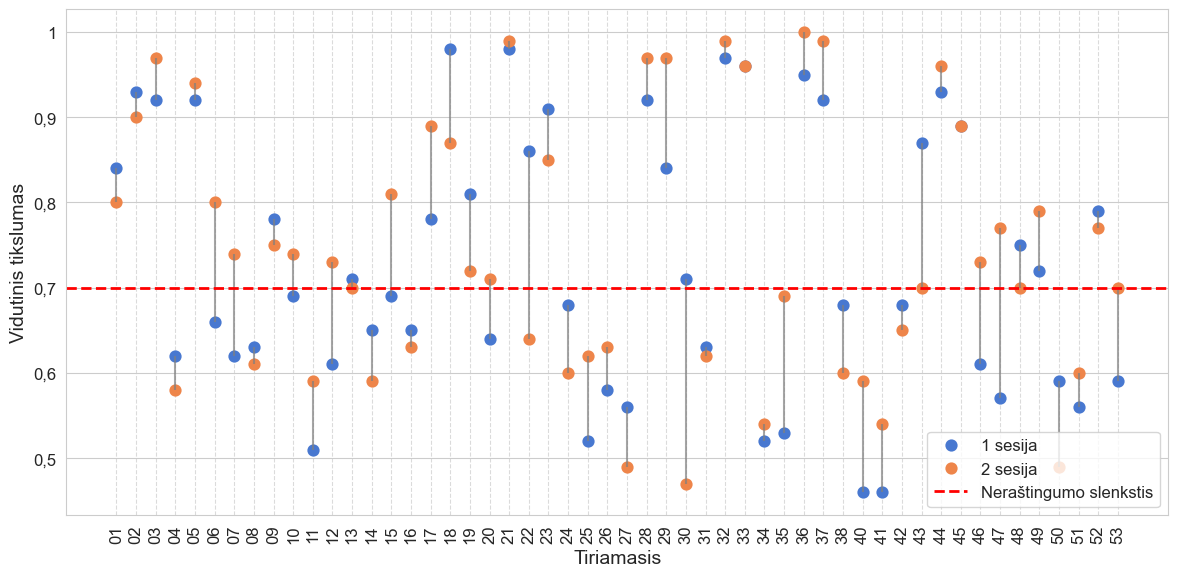

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("muted")

df_pipeline = results['2025-04-25']['within'][
    results['2025-04-25']['within'].pipeline == 'TS_LR'
].copy()

# Split 'evaluation' into 'subject' and 'run'
df_pipeline[['subject', 'run']] = df_pipeline['evaluation'].str.split('_', expand=True)

# Optional: reorder columns for clarity
cols = ['subject', 'run'] + [col for col in df_pipeline.columns if col not in ['evaluation', 'subject', 'run']]
df_pipeline = df_pipeline[cols]

def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

plt.figure(figsize=(12, 6))

# Plot points for each run at the same x-position per subject.
ax = sns.pointplot(
    x='subject', 
    y='mean_val_accuracy', 
    hue='run', 
    data=df_pipeline, 
    dodge=False,    # all runs share the same x position per subject
    ci=None,        # no error bars
    join=False,     # disable horizontal connecting lines
    markers='o'
)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# For each subject, add a vertical line spanning from the minimum to the maximum accuracy among runs.
xticks = ax.get_xticks()
for tick, subject_label in zip(xticks, ax.get_xticklabels()):
    subject = subject_label.get_text()
    subject_data = df_pipeline[df_pipeline['subject'] == subject]
    min_val = subject_data['mean_val_accuracy'].min()
    max_val = subject_data['mean_val_accuracy'].max()
    ax.vlines(x=tick, ymin=min_val, ymax=max_val, colors='gray', linestyles='-', alpha=0.7)

# Plot horizontal line at y=0.7
plt.axhline(y=0.7, color='red', linestyle='--', linewidth=2)

# Add vertical grid lines (for x-axis) similar to the horizontal grid lines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Create a custom legend handle for the horizontal line
custom_line = Line2D([0], [0], color='red', linestyle='--', linewidth=2)

# Get existing legend handles and labels
handles, _ = ax.get_legend_handles_labels()

# Assuming the first two handles correspond to your run groups, rename them:
new_run_labels = ["1 sesija", "2 sesija"]

# Only keep the run handles, then add the custom handle for the horizontal line
handles = handles[:len(new_run_labels)]
labels = new_run_labels

# Append the custom horizontal line handle and its label
handles.append(custom_line)
labels.append("Neraštingumo slenkstis")

# Create the legend with the new labels
ax.legend(handles=handles, labels=labels, loc='lower right', fontsize=12)

plt.xlabel('Tiriamasis', fontsize=14)
plt.ylabel('Vidutinis tikslumas', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

# Format y-axis with comma, no trailing zeros, space after minus
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))

plt.show()


c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.


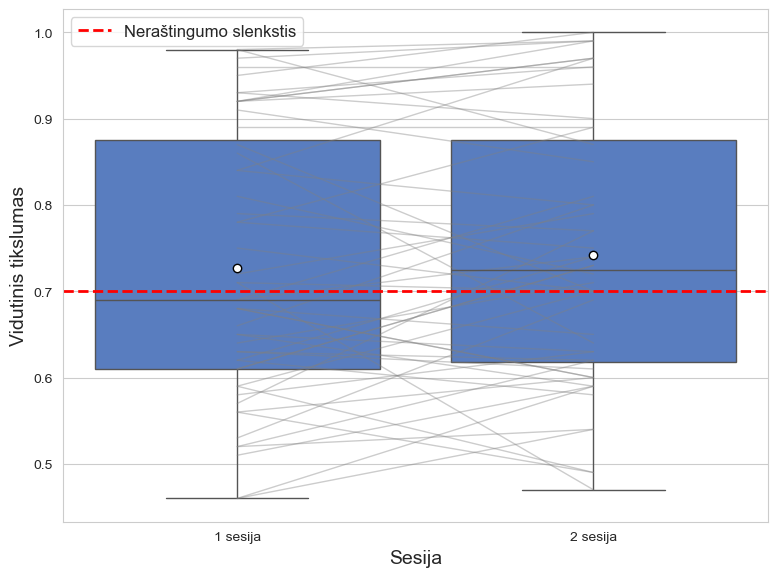

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df_pipeline as in your original code

# 1. Pivot so columns are ['subject', 'run', 'mean_val_accuracy']
df_pivot = df_pipeline.pivot(index='subject', columns='run', values='mean_val_accuracy').reset_index()
df_pivot.columns = ['subject', 'sesija1', 'sesija2']

# 2. Prepare long-form for seaborn boxplot
df_long = pd.melt(
    df_pivot,
    id_vars='subject',
    value_vars=['sesija1', 'sesija2'],
    var_name='Sesija',
    value_name='Vidutinis tikslumas'
)
df_long['Sesija'] = df_long['Sesija'].replace({'sesija1': '1 sesija', 'sesija2': '2 sesija'})

# 3. Paired boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='Sesija',
    y='Vidutinis tikslumas',
    data=df_long,
    showmeans=True,
    meanprops={"marker":"o",
               "markerfacecolor":"white", 
               "markeredgecolor":"black"}
)

# 4. Overlay paired subject lines for visual pairing
for _, row in df_pivot.iterrows():
    plt.plot(['1 sesija', '2 sesija'], [row['sesija1'], row['sesija2']], color='gray', alpha=0.4, linewidth=1)

# 5. Threshold line at 0.7
plt.axhline(0.7, color='red', linestyle='--', linewidth=2, label="Neraštingumo slenkstis")

plt.xlabel('Sesija', fontsize=14)
plt.ylabel('Vidutinis tikslumas', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3176626170.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

2025-05-26 01:15:31,777 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3176626170.py:62: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

2025-05-26 01:15:31,783 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3176626170.py:93: UserWarning: set_ticklabels() should only be used with a fixed number

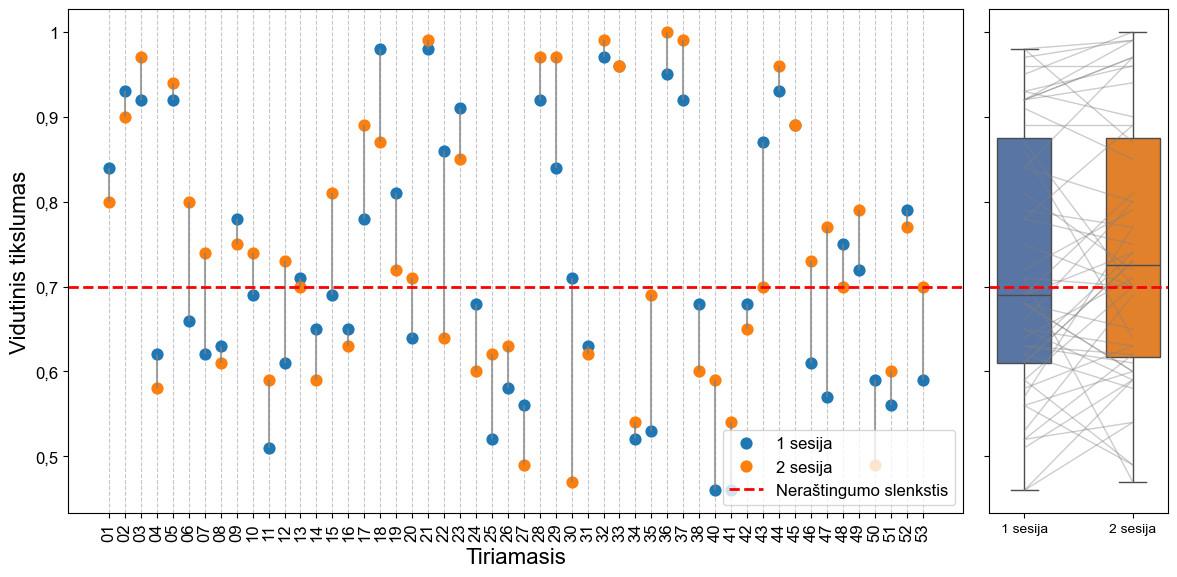

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Font settings for bigger text
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

# ... rest of your plotting code ...

# --- DATA PREP ---
df_pipeline = results['2025-04-25']['within'][
    results['2025-04-25']['within'].pipeline == 'TS_LR'
].copy()
df_pipeline[['subject', 'run']] = df_pipeline['evaluation'].str.split('_', expand=True)

df_pivot = df_pipeline.pivot(index='subject', columns='run', values='mean_val_accuracy').reset_index()
df_pivot.columns = ['subject', 'sesija1', 'sesija2']

df_long = pd.melt(
    df_pivot,
    id_vars='subject',
    value_vars=['sesija1', 'sesija2'],
    var_name='Sesija',
    value_name='Vidutinis tikslumas'
)
df_long['Sesija'] = df_long['Sesija'].replace({'sesija1': '1 sesija', 'sesija2': '2 sesija'})

def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

# --- PLOT ---
fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), 
    gridspec_kw={'width_ratios': [2, 0.4]},
    sharey=True
)

# LEFT: Per-subject Pointplot
ax1 = axes[0]
sns.pointplot(
    x='subject',
    y='mean_val_accuracy',
    hue='run',
    data=df_pipeline,
    dodge=False,
    ci=None,
    join=False,
    markers='o',
    ax=ax1
)
ax1.tick_params(axis='both', which='major', labelsize=12)
xticks = ax1.get_xticks()
for tick, subject_label in zip(xticks, ax1.get_xticklabels()):
    subject = subject_label.get_text()
    subject_data = df_pipeline[df_pipeline['subject'] == subject]
    min_val = subject_data['mean_val_accuracy'].min()
    max_val = subject_data['mean_val_accuracy'].max()
    ax1.vlines(x=tick, ymin=min_val, ymax=max_val, colors='gray', linestyles='-', alpha=0.7)
ax1.axhline(y=0.7, color='red', linestyle='--', linewidth=2)
ax1.xaxis.grid(True, linestyle='--', alpha=0.7)
custom_line = Line2D([0], [0], color='red', linestyle='--', linewidth=2)
handles, _ = ax1.get_legend_handles_labels()
new_run_labels = ["1 sesija", "2 sesija"]
handles = handles[:len(new_run_labels)]
labels = new_run_labels
handles.append(custom_line)
labels.append("Neraštingumo slenkstis")
ax1.legend(handles=handles, labels=labels, loc='lower right', fontsize=12)
ax1.set_xlabel('Tiriamasis', fontsize=16)
ax1.set_ylabel('Vidutinis tikslumas', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))

# RIGHT: Paired Boxplot (narrower)
ax2 = axes[1]
# RIGHT: Paired Boxplot (narrower boxes)
# Custom palette: first session default, second session orange
palette = {'1 sesija': '#4c72b0', '2 sesija': '#ff7f0e'}  # blue and orange

sns.boxplot(
    x='Sesija',
    y='Vidutinis tikslumas',
    data=df_long,
    showmeans=False,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    ax=ax2,
    width=0.5,
    palette=palette
)


for _, row in df_pivot.iterrows():
    ax2.plot(['1 sesija', '2 sesija'], [row['sesija1'], row['sesija2']], color='gray', alpha=0.4, linewidth=1)
ax2.axhline(0.7, color='red', linestyle='--', linewidth=2, label="Neraštingumo slenkstis")
ax2.set_xlabel('', fontsize=14)
ax2.set_ylabel('')
# ax2.legend(fontsize=12)
ax2.set_title('')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))

plt.tight_layout()
plt.show()


In [356]:
from scipy.stats import spearmanr

run1 = df_pivot['sesija1'].values
run2 = df_pivot['sesija2'].values

rho, pval = spearmanr(run1, run2)
print(f"Spearman correlation: ρ = {rho:.3f}, p = {pval:.4g}")


Spearman correlation: ρ = 0.791, p = 2.951e-12


In [353]:
from scipy.stats import shapiro

# Extract values for each run
run1 = df_pivot['sesija1'].values
run2 = df_pivot['sesija2'].values

# Shapiro-Wilk normality test
shapiro_run1 = shapiro(run1)
shapiro_run2 = shapiro(run2)

print(f"Run 1 (1 sesija):")
print(f"  W = {shapiro_run1.statistic:.4f}, p = {shapiro_run1.pvalue:.4g}")
print(f"Run 2 (2 sesija):")
print(f"  W = {shapiro_run2.statistic:.4f}, p = {shapiro_run2.pvalue:.4g}")


Run 1 (1 sesija):
  W = 0.9390, p = 0.01018
Run 2 (2 sesija):
  W = 0.9450, p = 0.018


In [354]:
from scipy.stats import wilcoxon

# Values for each run (paired by subject)
run1 = df_pivot['sesija1'].values
run2 = df_pivot['sesija2'].values

# Wilcoxon signed-rank test
stat, p = wilcoxon(run1, run2)

print(f"Wilcoxon signed-rank test: W = {stat:.4f}, p = {p:.4g}")


Wilcoxon signed-rank test: W = 498.5000, p = 0.1796


In [355]:
print(f"Median sesija 1: {np.median(run1):.3f}")
print(f"Median sesija 2: {np.median(run2):.3f}")
print(f"Mean sesija 1: {np.mean(run1):.3f}")
print(f"Mean sesija 2: {np.mean(run2):.3f}")
print(f"Difference (mean): {np.mean(run2-run1):.3f}")


Median sesija 1: 0.690
Median sesija 2: 0.725
Mean sesija 1: 0.728
Mean sesija 2: 0.742
Difference (mean): 0.014


In [252]:
import pandas as pd

# 1) Load data
df = results['2025-04-25']['within'].copy()
total_sessions = df['evaluation'].nunique()  # should be 104
threshold = 0.7

# 2) Find mean accuracy per (feature_extraction, pipeline)
mean_acc = (
    df.groupby(['feature_extraction', 'pipeline'])['mean_val_accuracy']
      .mean()
      .reset_index()
)

# 3) For each feature_extraction, keep only the pipeline with max mean accuracy
best = (
    mean_acc.loc[mean_acc.groupby('feature_extraction')['mean_val_accuracy']
                     .idxmax()]
)

# 4) Compute illiteracy stats for those best pipelines
sub = df[df.pipeline.isin(best['pipeline'])]
below = sub.groupby('pipeline')['mean_val_accuracy']\
           .apply(lambda x: (x < threshold).sum())
pct   = (below / total_sessions * 100).round(1)

# 5) Build summary DataFrame
summary = pd.DataFrame({
    'Modelis': below.index,
    'Sesijų skaičius žemiau slenksčio (/104)': below.values,
    'Neraštingumas, %': pct.values
})

# 6) Add ranking by descending mean accuracy
rank_df = best[['pipeline','mean_val_accuracy']]\
          .sort_values('mean_val_accuracy', ascending=False)\
          .reset_index(drop=True)
rank_df['Reitingas'] = rank_df.index + 1

summary = summary.merge(rank_df[['pipeline','Reitingas']],
                        left_on='Modelis', right_on='pipeline')\
                 .drop(columns='pipeline')\
                 .sort_values('Reitingas')\
                 .reset_index(drop=True)

# 7) Print
print(summary.to_string(index=False))


  Modelis  Sesijų skaičius žemiau slenksčio (/104)  Neraštingumas, %  Reitingas
    TS_LR                                       47              45.2          1
 FBCSP_LR                                       55              52.9          2
 CSSP_LDA                                       54              51.9          3
   CSP_LR                                       52              50.0          4
 BSSFO_LR                                       56              53.8          5
LogVar_LR                                       74              71.2          6
   PSD_LR                                       81              77.9          7
   TDF_RF                                       89              85.6          8
 STFT_SVM                                       97              93.3          9


C:\Users\rokas\AppData\Local\Temp\ipykernel_34128\408703258.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\rokas\AppData\Local\Temp\ipykernel_34128\408703258.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [57]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

# 1) Gather your data series
labels = ['Regular','Autoreject','Best ATAR']
keys   = ['2025-04-25','2025-04-25_autoreject','2025-04-22_atar_beta0.2_OptModelinAtten']
data = {}
for key,label in zip(keys, labels):
    w = results[key]['within']
    vals = w.loc[w['pipeline']=='TS_LR','mean_val_accuracy']
    data[label] = vals.values

# 2) Assumption checks
print("Normality (Shapiro-Wilk):")
for lab, vals in data.items():
    stat, p = stats.shapiro(vals)
    print(f"  {lab}: W={stat:.3f}, p={p:.3f}")

stat, p = stats.levene(*data.values())
print(f"\nHomogeneity (Levene): W={stat:.3f}, p={p:.3f}")

# 3) Parametric path: ANOVA + Tukey HSD
f_stat, p_anova = stats.f_oneway(*data.values())
print(f"\nOne‑way ANOVA: F={f_stat:.3f}, p={p_anova:.3f}")
if p_anova < 0.05:
    all_vals = np.concatenate(list(data.values()))
    grp = (['Regular']*len(data['Regular']) +
           ['Autoreject']*len(data['Autoreject']) +
           ['Best ATAR']*len(data['Best ATAR']))
    tukey = pairwise_tukeyhsd(all_vals, grp)
    print("\nTukey HSD results:")
    print(tukey)

# 4) Non‑parametric path: Kruskal–Wallis
h_stat, p_kw = stats.kruskal(*data.values())
print(f"\nKruskal–Wallis: H={h_stat:.3f}, p={p_kw:.3f}")

# 5) Pairwise Mann–Whitney U + Bonferroni
pairs = [('Regular','Autoreject'),
         ('Regular','Best ATAR'),
         ('Autoreject','Best ATAR')]

p_uncorrected = []
for a,b in pairs:
    stat, p = stats.mannwhitneyu(data[a], data[b], alternative='two-sided')
    p_uncorrected.append(p)

rejected, p_corrected, _, _ = multipletests(p_uncorrected, alpha=0.05, method='bonferroni')

print("\nPairwise Mann–Whitney U (Bonferroni‑corrected):")
for (a,b), pu, pc, rej in zip(pairs, p_uncorrected, p_corrected, rejected):
    print(f"  {a} vs {b}: p‑unc={pu:.3f}, p‑corr={pc:.3f}, significant={rej}")


Normality (Shapiro-Wilk):
  Regular: W=0.949, p=0.001
  Autoreject: W=0.956, p=0.002
  Best ATAR: W=0.949, p=0.001

Homogeneity (Levene): W=0.362, p=0.697

One‑way ANOVA: F=0.576, p=0.563

Kruskal–Wallis: H=0.994, p=0.608

Pairwise Mann–Whitney U (Bonferroni‑corrected):
  Regular vs Autoreject: p‑unc=0.347, p‑corr=1.000, significant=False
  Regular vs Best ATAR: p‑unc=0.897, p‑corr=1.000, significant=False
  Autoreject vs Best ATAR: p‑unc=0.444, p‑corr=1.000, significant=False


C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\1643358943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



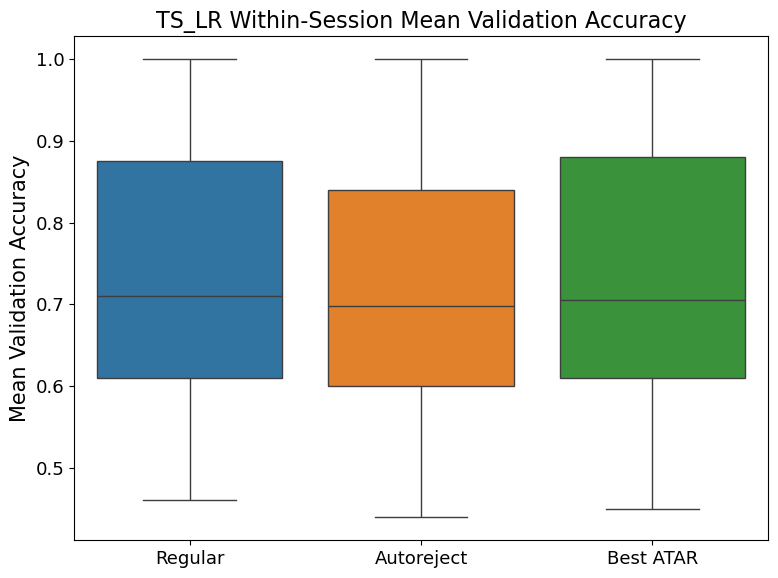

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Define the three sources and their friendly names
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Regular',
    '2025-04-25_autoreject':           'Autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Best ATAR'
}

# 2) Collect the TS_LR subset from each
frames = []
for src in sources:
    df_within = results[src]['within']
    ts_lr = df_within[df_within['pipeline'] == 'TS_LR'].copy()
    ts_lr['Source'] = label_map[src]
    frames.append(ts_lr)

df_plot = pd.concat(frames, ignore_index=True)

# 3) Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Source',
    y='mean_val_accuracy',
    data=df_plot,
    palette=['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green
)
plt.title("TS_LR Within‑Session Mean Validation Accuracy")
plt.xlabel("")
plt.ylabel("Mean Validation Accuracy")
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd

# build a list of summary rows
rows = []
for src, dfs in results.items():
    mean_within = dfs['within']['mean_val_accuracy'].mean()
    mean_cross  = dfs['cross']['test_accuracy'].mean()
    rows.append({
        'source': src,
        'within_mean_val_accuracy': mean_within,
        'cross_mean_test_accuracy': mean_cross
    })

# assemble into a DataFrame, indexed by source
mean_table = pd.DataFrame(rows).set_index('source').sort_index()
print(mean_table)


                                          within_mean_val_accuracy  \
source                                                               
2025-04-22_atar_beta0.01_OptModeelim                      0.638558   
2025-04-22_atar_beta0.01_OptModelinAtten                  0.647845   
2025-04-22_atar_beta0.01_OptModesoft                      0.646822   
2025-04-22_atar_beta0.05_OptModeelim                      0.639065   
2025-04-22_atar_beta0.05_OptModelinAtten                  0.647885   
2025-04-22_atar_beta0.05_OptModesoft                      0.646918   
2025-04-22_atar_beta0.1_OptModeelim                       0.643608   
2025-04-22_atar_beta0.1_OptModelinAtten                   0.647935   
2025-04-22_atar_beta0.1_OptModesoft                       0.647022   
2025-04-22_atar_beta0.2_OptModeelim                       0.639784   
2025-04-22_atar_beta0.2_OptModelinAtten                   0.652620   
2025-04-22_atar_beta0.2_OptModesoft                       0.647374   
2025-04-22_atar_beta

In [60]:
mean_table

within_mean_val_accuracy  \
source                                                               
2025-04-22_atar_beta0.01_OptModeelim                      0.638558   
2025-04-22_atar_beta0.01_OptModelinAtten                  0.647845   
2025-04-22_atar_beta0.01_OptModesoft                      0.646822   
2025-04-22_atar_beta0.05_OptModeelim                      0.639065   
2025-04-22_atar_beta0.05_OptModelinAtten                  0.647885   
2025-04-22_atar_beta0.05_OptModesoft                      0.646918   
2025-04-22_atar_beta0.1_OptModeelim                       0.643608   
2025-04-22_atar_beta0.1_OptModelinAtten                   0.647935   
2025-04-22_atar_beta0.1_OptModesoft                       0.647022   
2025-04-22_atar_beta0.2_OptModeelim                       0.639784   
2025-04-22_atar_beta0.2_OptModelinAtten                   0.652620   
2025-04-22_atar_beta0.2_OptModesoft                       0.647374   
2025-04-22_atar_beta0.5_OptModeelim                       0.638432   
2025-04-22_atar_beta0.5_OptModelinAtten                   0.647674   
2025-04-22_atar_beta0.5_OptModesoft                       0.646715   
2025-04-25                                                0.651888   
2025-04-25_autoreject                                     0.639861   

                                          cross_mean_test_accuracy  
source                                                              
2025-04-22_atar_beta0.01_OptModeelim                      0.604493  
2025-04-22_atar_beta0.01_OptModelinAtten                  0.606132  
2025-04-22_atar_beta0.01_OptModesoft                      0.606405  
2025-04-22_atar_beta0.05_OptModeelim                      0.604364  
2025-04-22_atar_beta0.05_OptModelinAtten                  0.606474  
2025-04-22_atar_beta0.05_OptModesoft                      0.606485  
2025-04-22_atar_beta0.1_OptModeelim                       0.609362  
2025-04-22_atar_beta0.1_OptModelinAtten                   0.606277  
2025-04-22_atar_beta0.1_OptModesoft                       0.607083  
2025-04-22_atar_beta0.2_OptModeelim                       0.603643  
2025-04-22_atar_beta0.2_OptModelinAtten                   0.606335  
2025-04-22_atar_beta0.2_OptModesoft                       0.605764  
2025-04-22_atar_beta0.5_OptModeelim                       0.602623  
2025-04-22_atar_beta0.5_OptModelinAtten                   0.606683  
2025-04-22_atar_beta0.5_OptModesoft                       0.606058  
2025-04-25                                                0.604781  
2025-04-25_autoreject                                     0.592933

In [679]:
import glob
import pandas as pd

# 1) Reload all results into a dict (after defining clean_results)
base = r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019'
folders = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.1_OptModeelim',
    '2025-04-22_atar_beta0.01_OptModeelim',
    '2025-04-22_atar_beta0.1_OptModelinAtten',
    '2025-04-22_atar_beta0.01_OptModelinAtten',
    '2025-04-22_atar_beta0.1_OptModesoft',
    '2025-04-22_atar_beta0.01_OptModesoft',
    '2025-04-22_atar_beta0.2_OptModeelim',
    '2025-04-22_atar_beta0.2_OptModelinAtten',
    '2025-04-22_atar_beta0.2_OptModesoft',
    '2025-04-22_atar_beta0.5_OptModeelim',
    '2025-04-22_atar_beta0.05_OptModeelim',
    '2025-04-22_atar_beta0.5_OptModelinAtten',
    '2025-04-22_atar_beta0.05_OptModelinAtten',
    '2025-04-22_atar_beta0.5_OptModesoft',
    '2025-04-22_atar_beta0.05_OptModesoft',
]

results = {}
for folder in folders:
    paths = glob.glob(f"{base}\\{folder}\\*.pkl")
    df_w, df_c = clean_results(paths)
    results[folder] = {'within': df_w, 'cross': df_c}

# 2) Build a table of mean accuracies
rows = []
for src, dfs in results.items():
    rows.append({
        'source': src,
        'within_mean_val_accuracy': dfs['within']['mean_val_accuracy'].mean(),
        'cross_mean_test_accuracy': dfs['cross']['test_accuracy'].mean()
    })

mean_table = pd.DataFrame(rows).set_index('source').sort_index()

# Show the full table
print("\nAll sources mean accuracies:\n")
print(mean_table)

# 3) Filter only the ATAR variants and sort by cross-session accuracy
atar_table = mean_table.loc[mean_table.index.str.contains('atar')]
atar_sorted = atar_table.sort_values('cross_mean_test_accuracy', ascending=False)

# Display the ATAR subset
print("\nATAR configurations (sorted by cross-session mean test accuracy):\n")
print(atar_sorted)

# 4) Print the best ATAR
best_src = atar_sorted.index[0]
best_within = atar_sorted.loc[best_src, 'within_mean_val_accuracy']
best_cross = atar_sorted.loc[best_src, 'cross_mean_test_accuracy']
print(f"\nBest ATAR variant: {best_src}")
print(f"  • Within-session mean val accuracy: {best_within:.3f}")
print(f"  • Cross-session mean test accuracy: {best_cross:.3f}")



All sources mean accuracies:

                                          within_mean_val_accuracy  \
source                                                               
2025-04-22_atar_beta0.01_OptModeelim                      0.638558   
2025-04-22_atar_beta0.01_OptModelinAtten                  0.647845   
2025-04-22_atar_beta0.01_OptModesoft                      0.646822   
2025-04-22_atar_beta0.05_OptModeelim                      0.639065   
2025-04-22_atar_beta0.05_OptModelinAtten                  0.647885   
2025-04-22_atar_beta0.05_OptModesoft                      0.646918   
2025-04-22_atar_beta0.1_OptModeelim                       0.643608   
2025-04-22_atar_beta0.1_OptModelinAtten                   0.647935   
2025-04-22_atar_beta0.1_OptModesoft                       0.647022   
2025-04-22_atar_beta0.2_OptModeelim                       0.639784   
2025-04-22_atar_beta0.2_OptModelinAtten                   0.647922   
2025-04-22_atar_beta0.2_OptModesoft                       0

2025-05-26 02:47:10,159 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 02:47:10,162 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 02:47:10,165 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 02:47:10,167 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 02:47:10,

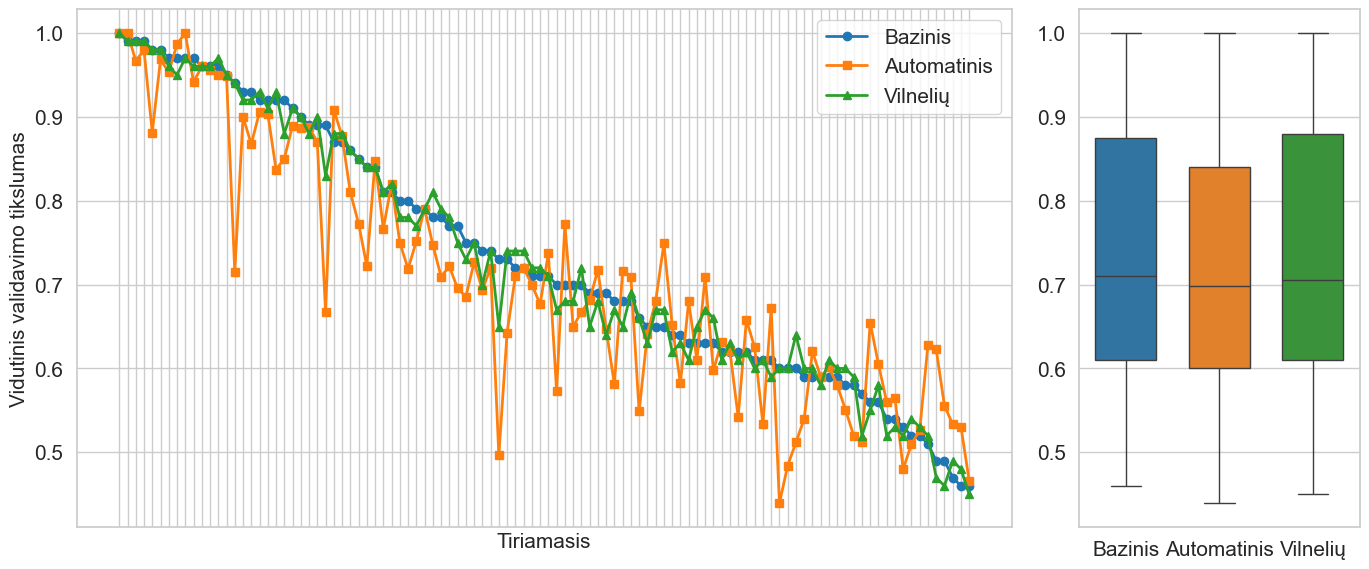

In [290]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Define sources & labels
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Vilnelių'
}

# 2) Extract only within‑session TS_LR rows
within_frames = []
for src in sources:
    dfw = results[src]['within']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# 3) Determine subject order by baseline within‑session mean validation accuracy
subject_order = (
    df_within[df_within['Source'] == 'Bazinis']
    .groupby('evaluation')['mean_val_accuracy']
    .mean()
    .sort_values(ascending=False)
    .index
    .tolist()
)

# 4) Plot both panels, sharing the y‑axis
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(14, 6),
    gridspec_kw={'width_ratios': [4, 1.2]},
    sharey=True
)

palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
labels = ['Bazinis', 'Automatinis', 'Vilnelių']

# choose base font sizes
label_fs = 15    # axis‐label fontsize
tick_fs  = 15   # tick‐label fontsize
leg_fs   = 15    # legend fontsize

# — Left: line‑plot of within‑session validation accuracy by subject —
for label, marker, color in zip(labels, markers, palette):
    ser = (
        df_within[df_within['Source'] == label]
        .groupby('evaluation')['mean_val_accuracy']
        .mean()
        .reindex(subject_order)
    )
    ax1.plot(
        subject_order,
        ser.values,
        marker=marker,
        label=label,
        color=color,
        lw=2
    )

ax1.set_xlabel("Tiriamasis", fontsize=label_fs)
ax1.set_ylabel("Vidutinis validavimo tikslumas", fontsize=label_fs)
ax1.tick_params(axis='x', labelrotation=90, labelsize=tick_fs)
ax1.tick_params(axis='y', labelsize=tick_fs)
for lbl in ax1.get_xticklabels():
    lbl.set_ha('right')
ax1.legend(title="", fontsize=leg_fs, title_fontsize=leg_fs)

# — Right: boxplot, with no axis titles —
sns.boxplot(
    x='Source',
    y='mean_val_accuracy',
    data=df_within,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2
)
ax2.set(xlabel='', ylabel='')                # remove axis titles
ax2.yaxis.set_tick_params(labelleft=True)    # keep shared y‐ticks
ax2.tick_params(axis='x', labelrotation=0, labelsize=tick_fs)
ax2.tick_params(axis='y', labelsize=tick_fs)
# for lbl in ax2.get_xticklabels():
#     lbl.set_ha('right')


# hide x‑tick labels on the left panel
ax1.tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()


2025-05-11 12:02:10,559 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:02:10,561 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:02:10,563 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:02:10,565 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:02:10,

Mean validation accuracy per Source:
  Automatinis: 0.714
  Bazinis: 0.735
  Vilnelių: 0.732

Mean change (difference) for each pair:
  Automatinis - Bazinis: -0.021
  Vilnelių - Bazinis: -0.003
  Vilnelių - Automatinis: 0.018

Paired t‑test p‑values:
  Bazinis vs Automatinis: p = 1.152e-03
  Bazinis vs Vilnelių: p = 1.171e-01
  Automatinis vs Vilnelių: p = 3.565e-03


C:\Users\rokas\AppData\Local\Temp\ipykernel_27792\2085231958.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



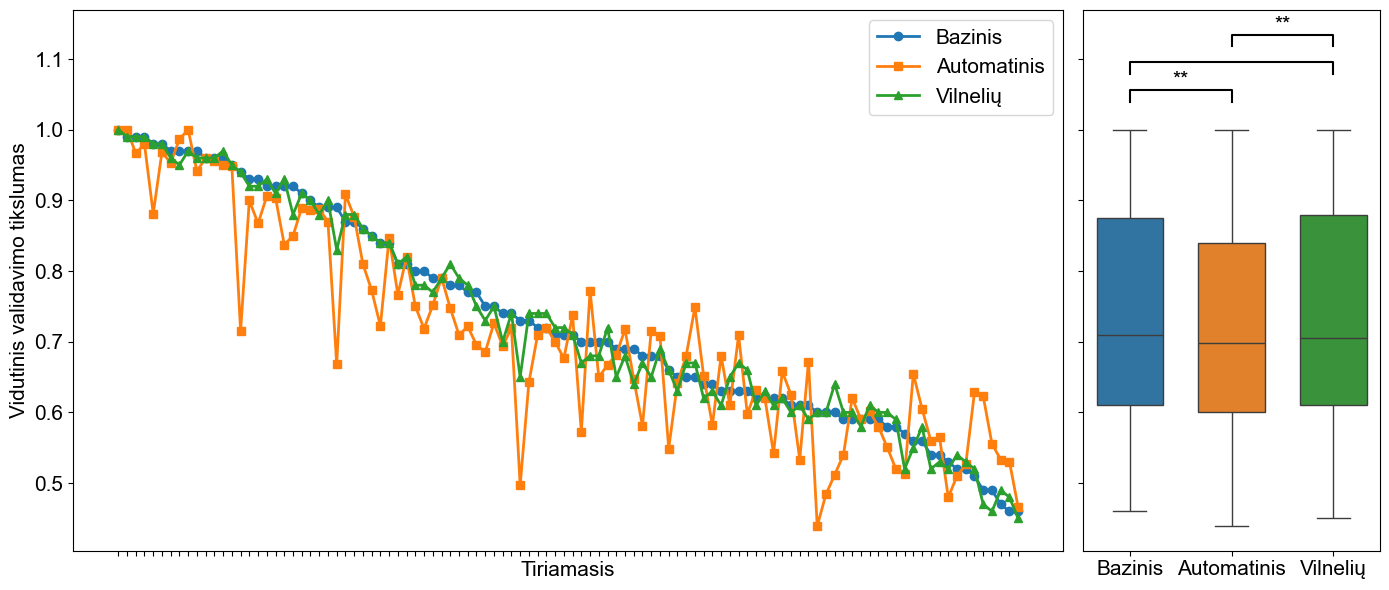

In [ ]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import itertools

# 1) Define sources & labels
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Vilnelių'
}

# 2) Extract only within‑session TS_LR rows
within_frames = []
for src in sources:
    dfw = results[src]['within']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# 3) Pivot to wide form for paired tests
labels = ['Bazinis', 'Automatinis', 'Vilnelių']
wide = df_within.pivot(index='evaluation',
                       columns='Source',
                       values='mean_val_accuracy').dropna()
pairs = list(itertools.combinations(labels, 2))

# 4) --- NEW: Print overall means ---
print("Mean validation accuracy per Source:")
mean_acc = df_within.groupby('Source')['mean_val_accuracy'].mean()
for src, m in mean_acc.items():
    print(f"  {src}: {m:.3f}")

# 4b) --- NEW: Print mean changes for each pair (b - a) ---
print("\nMean change (difference) for each pair:")
for a, b in pairs:
    diff = (wide[b] - wide[a]).mean()
    print(f"  {b} - {a}: {diff:.3f}")

# 5) Run paired t‑tests and print p‑values
print("\nPaired t‑test p‑values:")
pvals = {}
for a, b in pairs:
    _, p = ttest_rel(wide[a], wide[b])
    pvals[(a, b)] = p
    print(f"  {a} vs {b}: p = {p:.3e}")

# 6) Determine subject order by baseline mean_val_accuracy
subject_order = (
    df_within[df_within['Source'] == 'Bazinis']
      .groupby('evaluation')['mean_val_accuracy']
      .mean()
      .sort_values(ascending=False)
      .index
      .tolist()
)

# 7) Plot panels
fig, (ax1, ax2) = plt.subplots(
    1, 2,
    figsize=(14, 6),
    gridspec_kw={'width_ratios': [4, 1.2]},
    sharey=True
)

palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
label_fs = 15
tick_fs  = 15
leg_fs   = 15

# — Left: per‑subject line plot —
for lbl, mk, col in zip(labels, markers, palette):
    ser = (
        df_within[df_within['Source'] == lbl]
          .groupby('evaluation')['mean_val_accuracy']
          .mean()
          .reindex(subject_order)
    )
    ax1.plot(
        subject_order, ser.values,
        marker=mk, color=col, lw=2, label=lbl
    )

ax1.set_xlabel("Tiriamasis", fontsize=label_fs)
ax1.set_ylabel("Vidutinis validavimo tikslumas", fontsize=label_fs)
ax1.tick_params(axis='x', labelrotation=90, labelsize=tick_fs)
ax1.tick_params(axis='y', labelsize=tick_fs)
for t in ax1.get_xticklabels():
    t.set_ha('right')
ax1.legend(fontsize=leg_fs)
ax1.tick_params(axis='x', labelbottom=False)

# — Right: boxplot —
sns.boxplot(
    x='Source', y='mean_val_accuracy',
    data=df_within,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2
)
ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='x', labelrotation=0, labelsize=tick_fs)
ax2.tick_params(axis='y', labelsize=tick_fs)

# 8) Add non‑overlapping significance brackets
y_max = df_within['mean_val_accuracy'].max()
y_min = df_within['mean_val_accuracy'].min()
h   = (y_max - y_min) * 0.03   # bracket height
sep = (y_max - y_min) * 0.07   # separation between brackets

for i, ((a, b), p) in enumerate(pvals.items()):
    x1, x2 = labels.index(a), labels.index(b)
    y = y_max + sep * (i + 1)
    ax2.plot(
        [x1, x1, x2, x2],
        [y,   y+h, y+h, y],
        lw=1.5, color='k'
    )
    if   p <= 1e-3:
        star = '***'
    elif p <= 1e-2:
        star = '**'
    elif p <= 0.05:
        star = '*'
    else:
        star = ''
    ax2.text(
        (x1 + x2) / 2,
        y + h,
        star,
        ha='center',
        va='bottom',
        fontsize=tick_fs
    )

plt.tight_layout()
plt.show()


2025-05-11 12:11:25,147 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:11:25,147 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:11:25,147 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:11:25,147 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-11 12:11:25,

Mean validation accuracy per Source:
  Bazinis: 0.735
  Automatinis: 0.714
  Vilnelių: 0.732

Mean change (difference) for each pair:
  Automatinis - Bazinis: -0.021
  Vilnelių - Bazinis: -0.003
  Vilnelių - Automatinis: 0.018

Friedman test:
  χ² = 12.361, p = 2.069e-03

Post-hoc Wilcoxon (FDR corrected):
             A         B     p-unc    p-corr   W-val
0  Automatinis   Bazinis  0.001320  0.003961  1627.0
1  Automatinis  Vilnelių  0.004157  0.006236  1729.0
2      Bazinis  Vilnelių  0.208595  0.208595  1288.5

Post-hoc Nemenyi test:
             Automatinis   Bazinis  Vilnelių
Automatinis     1.000000  0.007223  0.013807
Bazinis         0.007223  1.000000  0.976429
Vilnelių        0.013807  0.976429  1.000000


C:\Users\rokas\AppData\Local\Temp\ipykernel_27792\1930843594.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



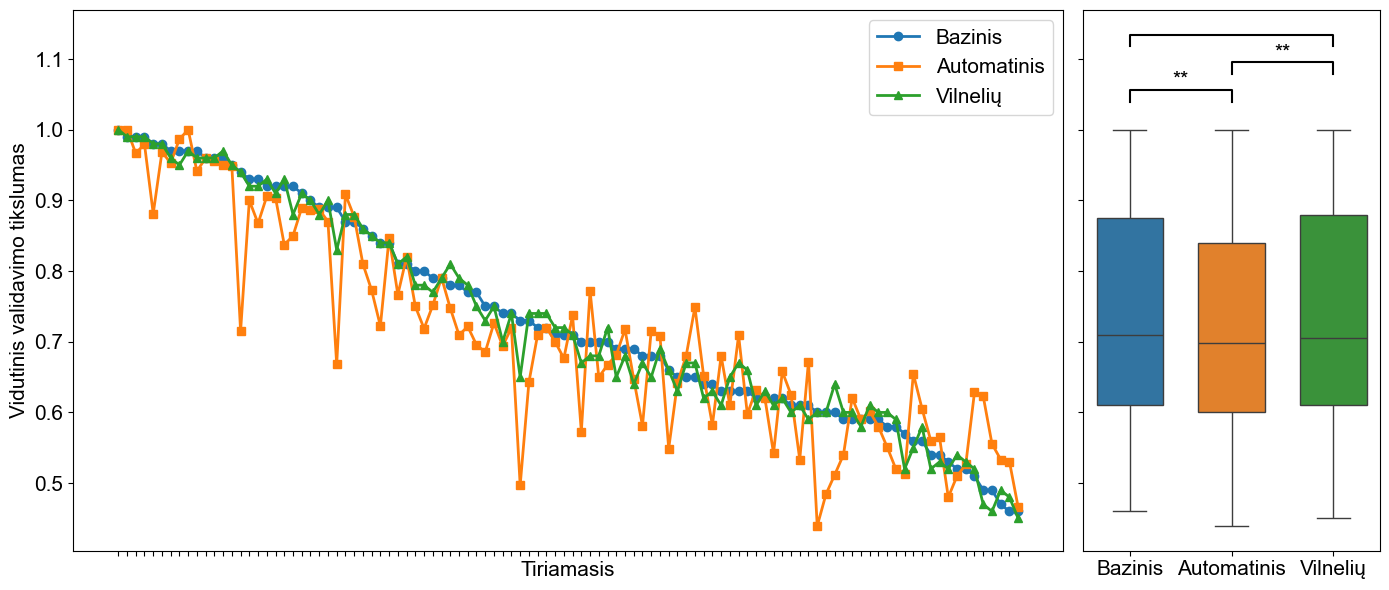

In [23]:
wide.head(10)

Source      Automatinis  Bazinis  Vilnelių
evaluation                                
01             0.710000     0.64      0.69
02             0.663265     0.75      0.72
03             0.947368     0.90      0.92
04             0.570000     0.56      0.56
05             0.493506     0.75      0.76
06             0.677419     0.64      0.66
07             0.548780     0.70      0.73
08             0.580645     0.61      0.62
09             0.684783     0.77      0.77
10             0.673469     0.64      0.59

In [31]:
wide.keys()

Index(['Automatinis', 'Bazinis', 'Vilnelių'], dtype='object', name='Source')

In [35]:
stat, p = friedmanchisquare(wide['Automatinis'],wide['Bazinis'],wide['Vilnelių'])
print(f"  χ² = {stat:.3f}, p = {p:.3e}")


  χ² = 4.534, p = 1.036e-01


In [36]:
nemenyi_pvals = sp.posthoc_nemenyi_friedman(wide)
print(nemenyi_pvals)

             Automatinis   Bazinis  Vilnelių
Automatinis     1.000000  0.199134  0.164926
Bazinis         0.199134  1.000000  0.994713
Vilnelių        0.164926  0.994713  1.000000


In [37]:
print("\nPost-hoc Wilcoxon with FDR correction:")
df_long = df_within.rename(columns={'evaluation': 'Subject', 'Source': 'Method', 'test_accuracy': 'Accuracy'})
posthoc_wilcoxon = pg.pairwise_tests(dv='Accuracy', within='Method', subject='Subject',
                                     data=df_long, padjust='fdr_bh', parametric=False)
print(posthoc_wilcoxon[['A', 'B', 'p-unc', 'p-corr', 'W-val']])


Post-hoc Wilcoxon with FDR correction:
             A         B     p-unc    p-corr  W-val
0  Automatinis   Bazinis  0.017026  0.025540  426.5
1  Automatinis  Vilnelių  0.006835  0.020505  391.5
2      Bazinis  Vilnelių  0.869200  0.869200  304.5


In [38]:
dfw

evaluation   pipeline  test_accuracy  test_roc_auc  \
0            01    CSP_SVM           0.53           NaN   
1            01     CSP_LR           0.52        0.5176   
2            01    CSP_LDA           0.52        0.5120   
3            01     CSP_RF           0.50        0.4918   
4            01   CSSP_SVM           0.54           NaN   
...         ...        ...            ...           ...   
1867         53  LogVar_RF           0.57        0.5574   
1868         53     TS_SVM           0.60           NaN   
1869         53      TS_LR           0.59        0.6612   
1870         53     TS_LDA           0.49        0.5716   
1871         53      TS_RF           0.52        0.5440   

                                           correct_mask  
0     [False, True, False, False, True, True, False,...  
1     [True, True, False, False, True, True, False, ...  
2     [True, True, False, False, True, True, False, ...  
3     [False, True, False, False, True, True, False,...  
4     [False, True, False, True, True, True, False, ...  
...                                                 ...  
1867  [False, False, True, True, False, True, True, ...  
1868  [True, True, True, True, True, False, True, Tr...  
1869  [False, True, True, True, True, False, True, T...  
1870  [True, False, True, True, True, False, True, F...  
1871  [False, True, True, True, True, False, True, F...  

[1872 rows x 5 columns]

In [55]:
# using boolean OR
b = dfw[(dfw['pipeline'] == 'TS_LR') | (dfw['pipeline'] == 'CSP_LR')]
# Method 1: simple “+” concatenation
b['evaluation'] = dfw['evaluation'] + '_' + dfw['pipeline']



C:\Users\rokas\AppData\Local\Temp\ipykernel_27792\1700843300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
df_within

evaluation pipeline  test_accuracy  test_roc_auc  \
0           01_CSP_LR   CSP_LR           0.51        0.4428   
1            01_TS_LR    TS_LR           0.64        0.8828   
2           02_CSP_LR   CSP_LR           0.50        0.6900   
3            02_TS_LR    TS_LR           0.75        0.8240   
4           03_CSP_LR   CSP_LR           0.88        0.9872   
..                ...      ...            ...           ...   
307    51_TS_LR_TS_LR    TS_LR           0.49        0.5052   
308  52_CSP_LR_CSP_LR   CSP_LR           0.78        0.8700   
309    52_TS_LR_TS_LR    TS_LR           0.79        0.8764   
310  53_CSP_LR_CSP_LR   CSP_LR           0.60        0.6212   
311    53_TS_LR_TS_LR    TS_LR           0.59        0.6612   

                                          correct_mask    Source  eval_pipe  
0    [False, False, False, False, True, True, False...   Bazinis        NaN  
1    [False, True, False, True, True, True, True, T...   Bazinis        NaN  
2    [False, True, True, True, True, True, False, F...   Bazinis        NaN  
3    [False, True, True, True, True, True, True, Tr...   Bazinis        NaN  
4    [True, True, True, True, True, True, True, Tru...   Bazinis        NaN  
..                                                 ...       ...        ...  
307  [True, False, False, False, True, False, True,...  Vilnelių   51_TS_LR  
308  [True, False, True, True, False, False, True, ...  Vilnelių  52_CSP_LR  
309  [True, True, True, True, False, True, True, Tr...  Vilnelių   52_TS_LR  
310  [True, False, True, True, False, False, True, ...  Vilnelių  53_CSP_LR  
311  [False, True, True, True, True, False, True, T...  Vilnelių   53_TS_LR  

[312 rows x 7 columns]

2025-05-26 04:09:54,816 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:54,817 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:54,820 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:54,821 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:54,

Mean test accuracy per Source:
  Bazinis: 0.662
  Automatinis: 0.631
  Vilnelių: 0.664

Mean change (difference) for each pair:
  Automatinis - Bazinis: -0.031
  Vilnelių - Bazinis: 0.001
  Vilnelių - Automatinis: 0.032

Friedman test:
  χ² = 4.534, p = 1.036e-01

Post-hoc Wilcoxon with FDR correction:
             A         B     p-unc    p-corr  W-val
0  Automatinis   Bazinis  0.017026  0.025540  426.5
1  Automatinis  Vilnelių  0.006835  0.020505  391.5
2      Bazinis  Vilnelių  0.869200  0.869200  304.5

Post-hoc Nemenyi test:
             Automatinis   Bazinis  Vilnelių
Automatinis     1.000000  0.199134  0.164926
Bazinis         0.199134  1.000000  0.994713
Vilnelių        0.164926  0.994713  1.000000


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1598775909.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.


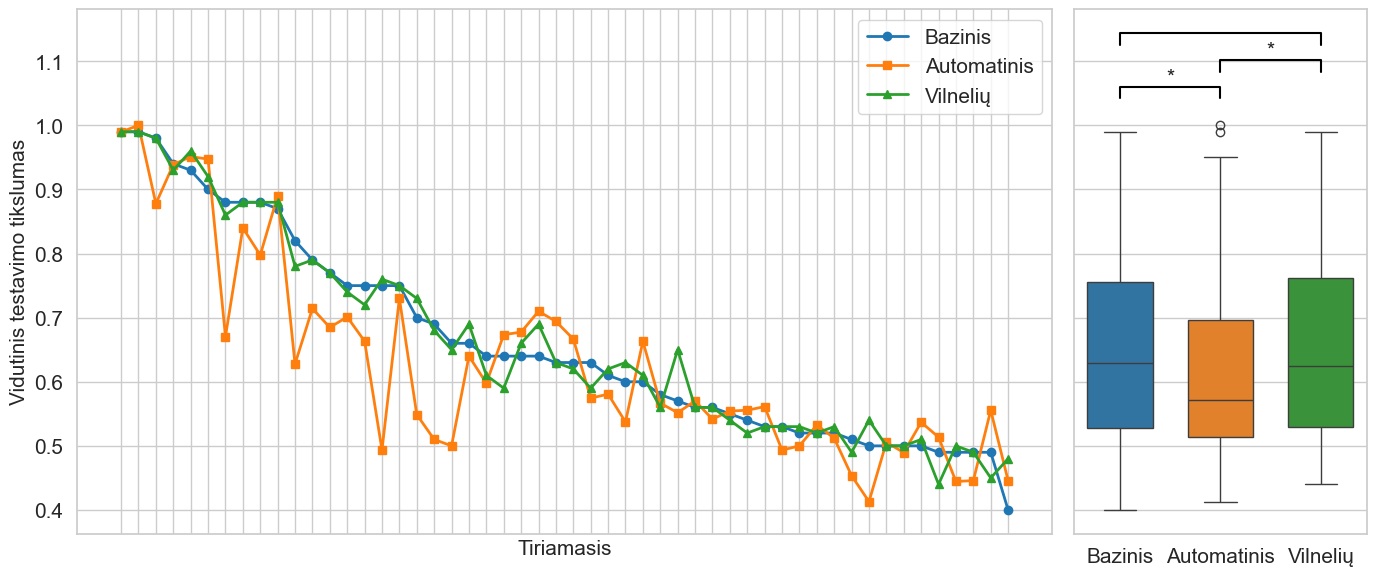

In [577]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pingouin as pg
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

# ── 1) Load your data ──
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Vilnelių'
}

within_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
wide = df_within.pivot(index='evaluation', columns='Source', values='test_accuracy').dropna()
pairs = list(itertools.combinations(labels, 2))

# ── 2) Mean stats ──
print("Mean test accuracy per Source:")
for src in labels:
    print(f"  {src}: {wide[src].mean():.3f}")

print("\nMean change (difference) for each pair:")
for a, b in pairs:
    print(f"  {b} - {a}: {(wide[b] - wide[a]).mean():.3f}")

# ── 3) Friedman test ──
print("\nFriedman test:")
stat, p = friedmanchisquare(*[wide[col] for col in labels])
print(f"  χ² = {stat:.3f}, p = {p:.3e}")

# ── 4) Wilcoxon Post-hoc (Pingouin) ──
print("\nPost-hoc Wilcoxon with FDR correction:")
df_long = df_within.rename(columns={'evaluation': 'Subject', 'Source': 'Method', 'test_accuracy': 'Accuracy'})
posthoc_wilcoxon = pg.pairwise_tests(dv='Accuracy', within='Method', subject='Subject',
                                     data=df_long, padjust='fdr_bh', parametric=False)
print(posthoc_wilcoxon[['A', 'B', 'p-unc', 'p-corr', 'W-val']])

# ── 5) Nemenyi Post-hoc (scikit-posthocs) ──
print("\nPost-hoc Nemenyi test:")
nemenyi_pvals = sp.posthoc_nemenyi_friedman(wide)
print(nemenyi_pvals)

# ── 6) Use Wilcoxon-corrected p-values for plotting (can switch to nemenyi_pvals) ──
pvals = {}
for _, row in posthoc_wilcoxon.iterrows():
    a, b = row['A'], row['B']
    key = tuple(sorted([a, b]))
    pvals[key] = row['p-corr']

# ── 7) Subject sort order ──
subject_order = (
    df_within[df_within['Source'] == 'Bazinis']
      .groupby('evaluation')['test_accuracy']
      .mean()
      .sort_values(ascending=False)
      .index
      .tolist()
)

# ── 8) Plot setup ──
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),
                               gridspec_kw={'width_ratios': [4, 1.2]},
                               sharey=True)

palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
label_fs = 15
tick_fs  = 15
leg_fs   = 15

# — Left: subject-wise plot —
for lbl, mk, col in zip(labels, markers, palette):
    ser = (
        df_within[df_within['Source'] == lbl]
          .groupby('evaluation')['test_accuracy']
          .mean()
          .reindex(subject_order)
    )
    ax1.plot(subject_order, ser.values, marker=mk, color=col, lw=2, label=lbl)

ax1.set_xlabel("Tiriamasis", fontsize=label_fs)
ax1.set_ylabel("Vidutinis testavimo tikslumas", fontsize=label_fs)
ax1.tick_params(axis='x', labelrotation=90, labelsize=tick_fs)
ax1.tick_params(axis='y', labelsize=tick_fs)
for t in ax1.get_xticklabels(): t.set_ha('right')
ax1.legend(fontsize=leg_fs)
ax1.tick_params(axis='x', labelbottom=False)

# — Right: boxplot —
sns.boxplot(
    x='Source', y='test_accuracy',
    data=df_within, order=labels,
    palette=palette, width=0.65, ax=ax2
)
ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='x', labelrotation=0, labelsize=tick_fs)
ax2.tick_params(axis='y', labelsize=tick_fs)

# — Significance stars using Wilcoxon p-values —
y_max = df_within['test_accuracy'].max()
y_min = df_within['test_accuracy'].min()
h   = (y_max - y_min) * 0.03
sep = (y_max - y_min) * 0.07

for i, ((a, b), p) in enumerate(pvals.items()):
    x1, x2 = labels.index(a), labels.index(b)
    y = y_max + sep * (i + 1)
    ax2.plot([x1, x1, x2, x2],
             [y,   y+h, y+h, y],
             lw=1.5, color='k')
    if   p <= 1e-3: star = '***'
    elif p <= 1e-2: star = '**'
    elif p <= 0.05: star = '*'
    else:           star = ''
    ax2.text((x1 + x2) / 2, y + h, star,
             ha='center', va='bottom',
             fontsize=tick_fs)

plt.tight_layout()
plt.show()


2025-05-26 04:25:21,745 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:25:21,747 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:25:21,749 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:25:21,751 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:25:21,

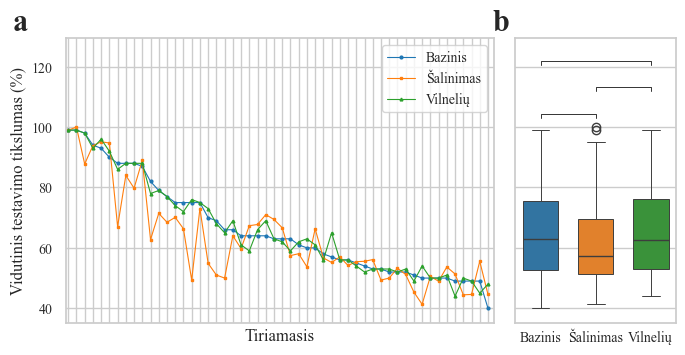

In [600]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannotations.Annotator import Annotator

# Font and style config
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})

def format_number(val):
    val = int(round(val * 100))
    if val < 0:
        return f"- {abs(val)}"
    return f"{val}"

# --- Data prep (REPLACE with your existing df_within, nemenyi_pvals, subject_order) ---
df_within_plot = df_within.copy()
nemenyi_pvals_plot = nemenyi_pvals.copy()

# Replace 'Automatinis' with 'Šalinimas' if present
df_within_plot['Source'] = df_within_plot['Source'].replace({'Automatinis': 'Šalinimas'})
nemenyi_pvals_plot = nemenyi_pvals_plot.rename(index={'Automatinis': 'Šalinimas'}, columns={'Automatinis': 'Šalinimas'})

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']
markers = ['o', 's', '^']
palette = {
    'Bazinis':   '#1f77b4',
    'Šalinimas': '#ff7f0e',
    'Vilnelių':  '#2ca02c'
}
pairs = [
    ("Bazinis", "Šalinimas"),
    ("Bazinis", "Vilnelių"),
    ("Šalinimas", "Vilnelių")
]
nemenyi_pval_list = [nemenyi_pvals_plot.loc[a, b] for a, b in pairs]

# --- Figure size, grid, axis ---
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(7.1, 3.5),
    gridspec_kw={'width_ratios': [4, 1.5]},
    sharey=True
)
ax1.set_ylim(0.35, 1.01)
ax2.set_ylim(0.35, 1.01)

# --- 1. Subject line plot (ax1) ---
for lbl, mk in zip(labels, markers):
    col = palette[lbl]
    ser = (
        df_within_plot[df_within_plot['Source'] == lbl]
          .groupby('evaluation')['test_accuracy']  # or mean_val_accuracy
          .mean()
          .reindex(subject_order)
    )
    ax1.plot(
        subject_order,
        ser.values,
        marker=mk,
        color=col,
        label=lbl,
        lw=0.8,
        markersize=2
    )

ax1.set_xlabel("Tiriamasis")
ax1.set_ylabel("Vidutinis testavimo tikslumas (%)")
ax1.tick_params(axis='x', labelrotation=90, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for t in ax1.get_xticklabels():
    t.set_ha('right')
ax1.legend(fontsize=10, loc='upper right')
ax1.tick_params(axis='x', labelbottom=False)
ax1.grid(axis='x', which='major', visible=True)

# >>> THIS PART ENABLES TICKS BUT NO LABELS <<<

# --- 2. Boxplot (ax2) ---
sns.boxplot(
    x='Source', y='test_accuracy',  # or mean_val_accuracy
    data=df_within_plot,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2,
    boxprops=dict(linewidth=.7),
    whiskerprops=dict(linewidth=.7),
    capprops=dict(linewidth=.7),
    medianprops=dict(linewidth=1)
)
ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='x', which='major', length=1, width=2, direction='inout', labelsize=10)
xticks_pos = np.arange(len(labels))
ax2.set_xticks(xticks_pos)
ax2.set_xticklabels(labels, fontsize=10)
ax2.grid(axis='x', which='major', visible=False)

# --- 3. Statistical annotation ---
annot = Annotator(
    ax2, pairs=pairs, data=df_within_plot,
    x='Source', y='test_accuracy', order=labels
)
annot.configure(
    test=None,
    text_format='star',
    loc='inside',
    verbose=0,
    fontsize=10,
    line_width=.7
)
annot.set_pvalues(nemenyi_pval_list)
annot.annotate(line_offset_to_group=0.03)

# Remove "ns" if present
for child in ax2.get_children():
    if hasattr(child, "get_text") and child.get_text() == "ns":
        child.set_text("")

# --- 4. Format y-tick labels as integers (percentages) ---
for ax in [ax1, ax2]:
    yticks = ax.get_yticks()
    ax.set_yticklabels([format_number(y) for y in yticks], fontsize=10)

fig.text(.034, 1.02, "a", ha='left', va='top', fontsize=22, fontweight='bold')
fig.text(.71, 1.02, "b", ha='left', va='top', fontsize=22, fontweight='bold')

for label in ax2.get_xticklabels():
    label.set_rotation(0)
    label.set_ha('center')
    label.set_va('top')
ax2.tick_params(axis='x', pad=5)

ax1.set_xlim(-0.3, len(subject_order) - 0.3)
ax1.xaxis.set_tick_params(which='major', size=4, width=1, direction='out')

plt.tight_layout()
plt.show()
fig.savefig(r'bakalauras/fig14.png', dpi=800, bbox_inches='tight')


In [592]:
ax1.set_xticklabels([' ']*len(subject_order))


[Text(0, 0, ' '),
 Text(1, 0, ' '),
 Text(2, 0, ' '),
 Text(3, 0, ' '),
 Text(4, 0, ' '),
 Text(5, 0, ' '),
 Text(6, 0, ' '),
 Text(7, 0, ' '),
 Text(8, 0, ' '),
 Text(9, 0, ' '),
 Text(10, 0, ' '),
 Text(11, 0, ' '),
 Text(12, 0, ' '),
 Text(13, 0, ' '),
 Text(14, 0, ' '),
 Text(15, 0, ' '),
 Text(16, 0, ' '),
 Text(17, 0, ' '),
 Text(18, 0, ' '),
 Text(19, 0, ' '),
 Text(20, 0, ' '),
 Text(21, 0, ' '),
 Text(22, 0, ' '),
 Text(23, 0, ' '),
 Text(24, 0, ' '),
 Text(25, 0, ' '),
 Text(26, 0, ' '),
 Text(27, 0, ' '),
 Text(28, 0, ' '),
 Text(29, 0, ' '),
 Text(30, 0, ' '),
 Text(31, 0, ' '),
 Text(32, 0, ' '),
 Text(33, 0, ' '),
 Text(34, 0, ' '),
 Text(35, 0, ' '),
 Text(36, 0, ' '),
 Text(37, 0, ' '),
 Text(38, 0, ' '),
 Text(39, 0, ' '),
 Text(40, 0, ' '),
 Text(41, 0, ' '),
 Text(42, 0, ' '),
 Text(43, 0, ' '),
 Text(44, 0, ' '),
 Text(45, 0, ' '),
 Text(46, 0, ' '),
 Text(47, 0, ' '),
 Text(48, 0, ' '),
 Text(49, 0, ' '),
 Text(50, 0, ' '),
 Text(51, 0, ' ')]

2025-05-26 04:09:42,449 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:42,451 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:42,453 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:42,454 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:42,

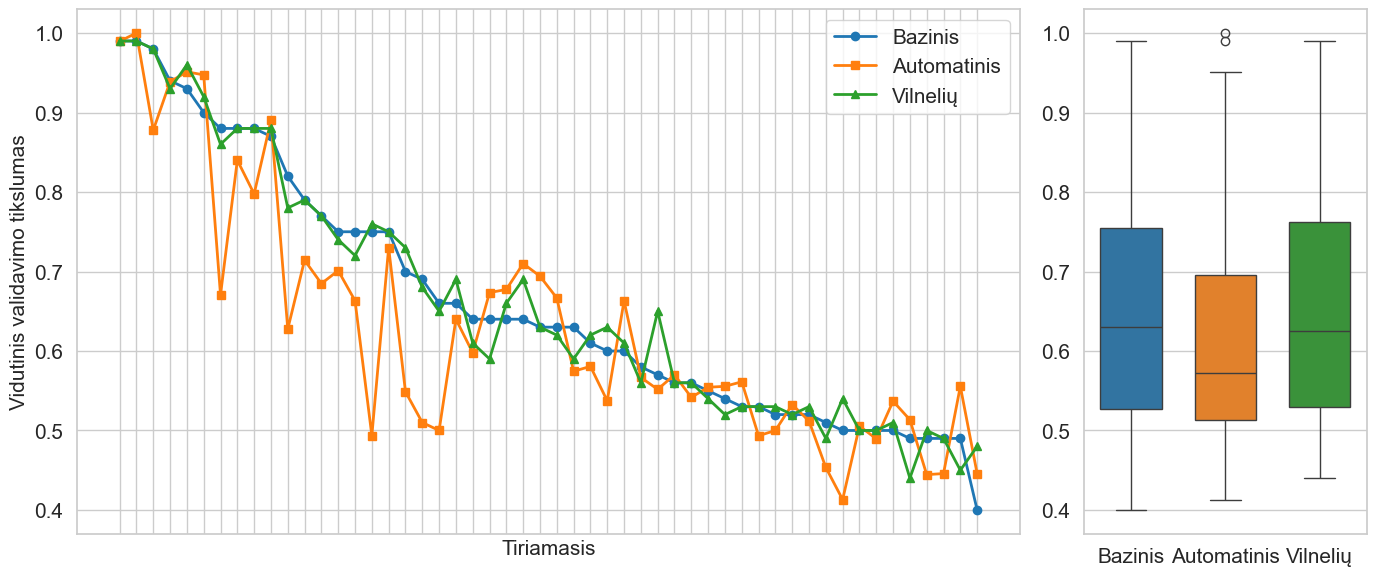

In [576]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Define sources & labels
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Vilnelių'
}

# 2) Extract only within‑session TS_LR rows
within_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# 3) Determine subject order by baseline within‑session mean validation accuracy
subject_order = (
    df_within[df_within['Source'] == 'Bazinis']
    .groupby('evaluation')['test_accuracy']
    .mean()
    .sort_values(ascending=False)
    .index
    .tolist()
)

# 4) Plot both panels, sharing the y‑axis
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(14, 6),
    gridspec_kw={'width_ratios': [4, 1.2]},
    sharey=True
)

palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
labels = ['Bazinis', 'Automatinis', 'Vilnelių']

# choose base font sizes
label_fs = 15    # axis‐label fontsize
tick_fs  = 15   # tick‐label fontsize
leg_fs   = 15    # legend fontsize

# — Left: line‑plot of within‑session validation accuracy by subject —
for label, marker, color in zip(labels, markers, palette):
    ser = (
        df_within[df_within['Source'] == label]
        .groupby('evaluation')['test_accuracy']
        .mean()
        .reindex(subject_order)
    )
    ax1.plot(
        subject_order,
        ser.values,
        marker=marker,
        label=label,
        color=color,
        lw=2
    )

ax1.set_xlabel("Tiriamasis", fontsize=label_fs)
ax1.set_ylabel("Vidutinis validavimo tikslumas", fontsize=label_fs)
ax1.tick_params(axis='x', labelrotation=90, labelsize=tick_fs)
ax1.tick_params(axis='y', labelsize=tick_fs)
for lbl in ax1.get_xticklabels():
    lbl.set_ha('right')
ax1.legend(title="", fontsize=leg_fs, title_fontsize=leg_fs)

# — Right: boxplot, with no axis titles —
sns.boxplot(
    x='Source',
    y='test_accuracy',
    data=df_within,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2
)
ax2.set(xlabel='', ylabel='')                # remove axis titles
ax2.yaxis.set_tick_params(labelleft=True)    # keep shared y‐ticks
ax2.tick_params(axis='x', labelrotation=0, labelsize=tick_fs)
ax2.tick_params(axis='y', labelsize=tick_fs)
# for lbl in ax2.get_xticklabels():
#     lbl.set_ha('right')

# hide x‑tick labels on the left panel
ax1.tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()


2025-05-26 04:09:28,843 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:28,845 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:28,848 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:28,848 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:09:28,

Mean test accuracy per Source:
  Automatinis: 0.631
  Bazinis: 0.662
  Vilnelių: 0.664

Mean change (difference) for each pair:
  Automatinis - Bazinis: -0.031
  Vilnelių - Bazinis: 0.001
  Vilnelių - Automatinis: 0.032

Paired t‑test p‑values:
  Bazinis vs Automatinis: p = 3.952e-03
  Bazinis vs Vilnelių: p = 7.156e-01
  Automatinis vs Vilnelių: p = 3.048e-03


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3983841821.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.


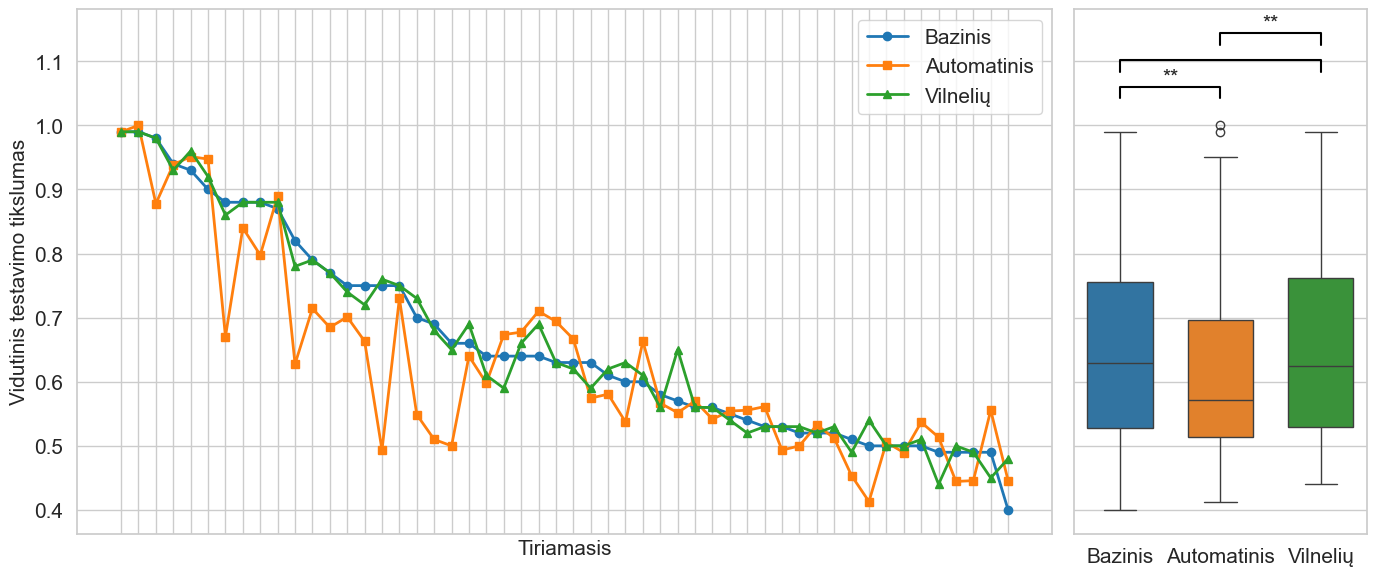

In [575]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import itertools

# 1) Define sources & labels
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Vilnelių'
}

# 2) Extract cross‑session TS_LR rows
within_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# 3) Pivot to wide form for paired tests
labels = ['Bazinis', 'Automatinis', 'Vilnelių']
wide = df_within.pivot(index='evaluation',
                       columns='Source',
                       values='test_accuracy').dropna()
pairs = list(itertools.combinations(labels, 2))

# 4) --- NEW: Print overall means ---
print("Mean test accuracy per Source:")
mean_acc = df_within.groupby('Source')['test_accuracy'].mean()
for src, m in mean_acc.items():
    print(f"  {src}: {m:.3f}")

# 4b) --- NEW: Print mean changes for each pair (b - a) ---
print("\nMean change (difference) for each pair:")
for a, b in pairs:
    diff = (wide[b] - wide[a]).mean()
    print(f"  {b} - {a}: {diff:.3f}")

# 5) Run paired t‑tests and print p‑values
print("\nPaired t‑test p‑values:")
pvals = {}
for a, b in pairs:
    _, p = ttest_rel(wide[a], wide[b])
    pvals[(a, b)] = p
    print(f"  {a} vs {b}: p = {p:.3e}")

# 6) Get subject order by baseline mean
subject_order = (
    df_within[df_within['Source']=='Bazinis']
      .groupby('evaluation')['test_accuracy']
      .mean()
      .sort_values(ascending=False)
      .index
      .tolist()
)

# 7) Create figure with two panels
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(14, 6),
    gridspec_kw={'width_ratios': [4, 1.2]},
    sharey=True
)

palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
label_fs = 15
tick_fs  = 15
leg_fs   = 15

# — Left: per-subject line plot —
for lbl, mk, col in zip(labels, markers, palette):
    ser = (
        df_within[df_within['Source']==lbl]
          .groupby('evaluation')['test_accuracy']
          .mean()
          .reindex(subject_order)
    )
    ax1.plot(subject_order, ser.values, marker=mk, color=col, lw=2, label=lbl)

ax1.set_xlabel("Tiriamasis", fontsize=label_fs)
ax1.set_ylabel("Vidutinis testavimo tikslumas", fontsize=label_fs)
ax1.tick_params(axis='x', labelrotation=90, labelsize=tick_fs)
ax1.tick_params(axis='y', labelsize=tick_fs)
for t in ax1.get_xticklabels(): t.set_ha('right')
ax1.legend(fontsize=leg_fs)
ax1.tick_params(axis='x', labelbottom=False)

# — Right: boxplot —
sns.boxplot(
    x='Source', y='test_accuracy',
    data=df_within, order=labels,
    palette=palette, width=0.65, ax=ax2
)
ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='x', labelrotation=0, labelsize=tick_fs)
ax2.tick_params(axis='y', labelsize=tick_fs)

# 8) Add staggered significance brackets
y_max = df_within['test_accuracy'].max()
y_min = df_within['test_accuracy'].min()
h   = (y_max - y_min) * 0.03   # bracket height
sep = (y_max - y_min) * 0.07   # vertical separation

for i, ((a, b), p) in enumerate(pvals.items()):
    x1, x2 = labels.index(a), labels.index(b)
    y = y_max + sep * (i + 1)
    ax2.plot([x1, x1, x2, x2],
             [y,   y+h, y+h, y],
             lw=1.5, color='k')
    if   p <= 1e-3:
        star = '***'
    elif p <= 1e-2:
        star = '**'
    elif p <= 0.05:
        star = '*'
    else:
        star = ''
    ax2.text((x1 + x2) / 2, y + h, star,
             ha='center', va='bottom',
             fontsize=tick_fs)

plt.tight_layout()
plt.show()


Paired t‑test Bazinis vs Automatinis: p = 3.952e-03
Paired t‑test Bazinis vs Vilnelių: p = 7.156e-01
Paired t‑test Automatinis vs Vilnelių: p = 3.048e-03


2025-05-07 20:02:40,661 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-07 20:02:40,661 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-07 20:02:40,661 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-07 20:02:40,675 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-07 20:02:40,

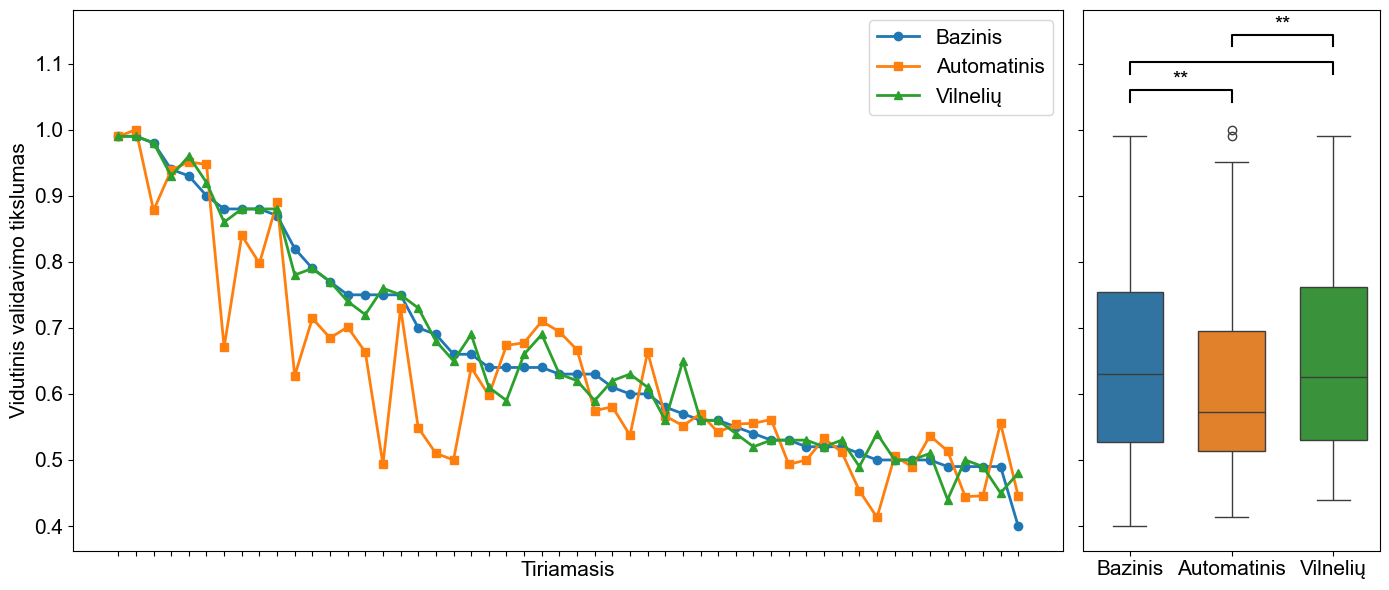

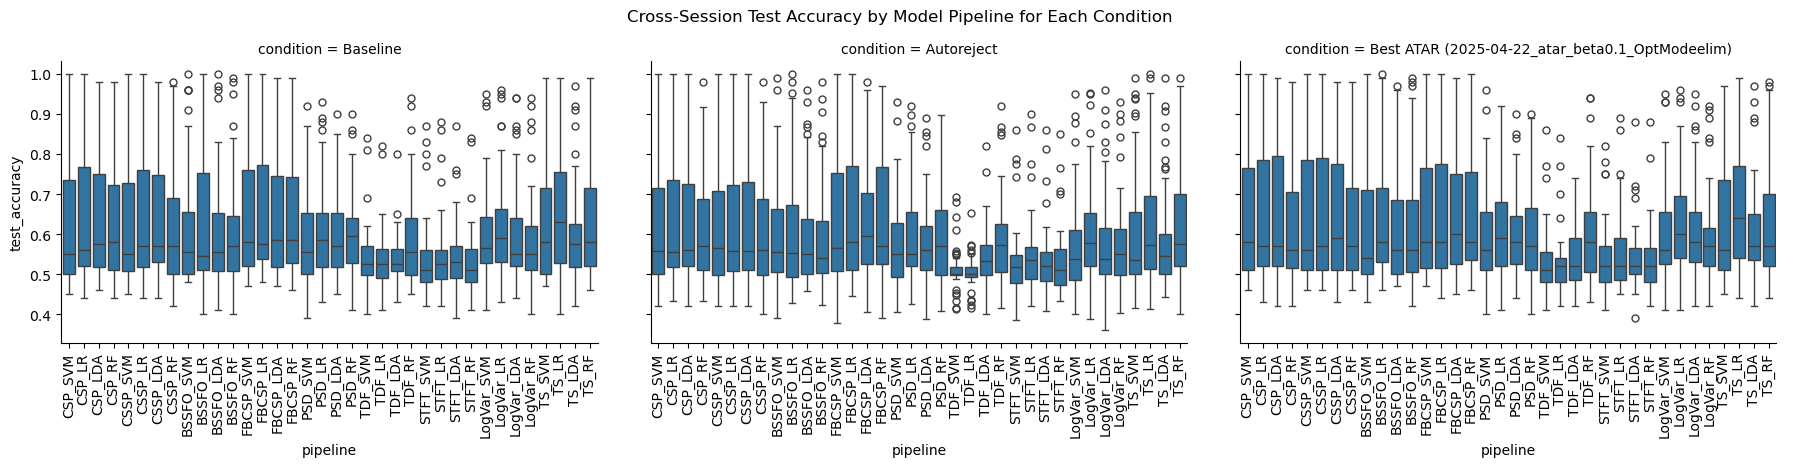

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine cross-session DataFrames
df_cross_all = pd.concat(
    [dfs['cross'].assign(source=src) for src, dfs in results.items()],
    ignore_index=True
)

# Identify best ATAR variant
atar_means = {
    src: grp['test_accuracy'].mean()
    for src, grp in df_cross_all.groupby('source')
    if 'atar' in src
}
best_atar = max(atar_means, key=atar_means.get)

# Select conditions to compare
compare_sources = ['2025-04-25', '2025-04-25_autoreject', best_atar]
df_cmp = df_cross_all[df_cross_all['source'].isin(compare_sources)].copy()

# Map to readable labels
label_map = {
    '2025-04-25': 'Baseline',
    '2025-04-25_autoreject': 'Autoreject',
    best_atar: f'Best ATAR ({best_atar})'
}
df_cmp['condition'] = df_cmp['source'].map(label_map)

# Plot boxplots of test_accuracy per pipeline, faceted by condition
g = sns.catplot(
    data=df_cmp,
    x='pipeline',
    y='test_accuracy',
    col='condition',
    kind='box',
    height=4,
    aspect=1.5,
    sharey=True
)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Cross-Session Test Accuracy by Model Pipeline for Each Condition')
plt.show()


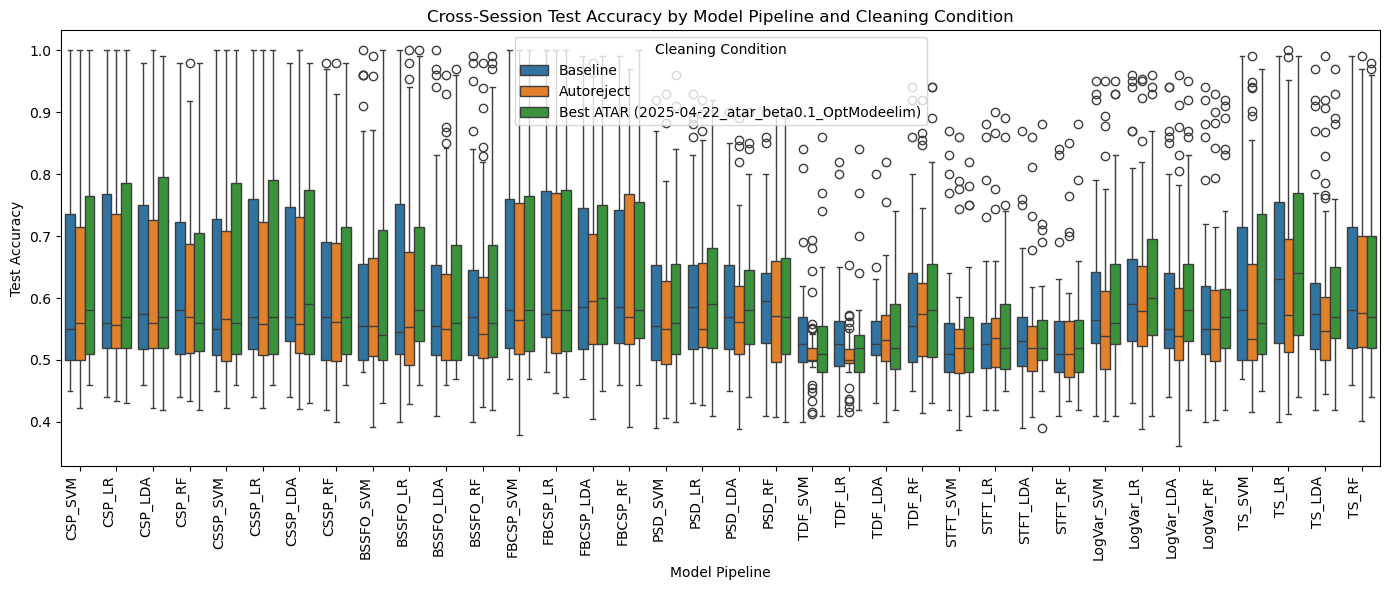

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Combine all cross‐session results into one DataFrame
df_cross_all = pd.concat(
    [dfs['cross'].assign(condition=src) for src, dfs in results.items()],
    ignore_index=True
)

# 2) Identify the best ATAR variant
atar_means = {
    src: grp['test_accuracy'].mean()
    for src, grp in df_cross_all.groupby('condition')
    if 'atar' in src
}
best_atar = max(atar_means, key=atar_means.get)

# 3) Filter down to the three conditions
keep = ['2025-04-25', '2025-04-25_autoreject', best_atar]
df_cmp = df_cross_all[df_cross_all['condition'].isin(keep)].copy()

# 4) Map folder names to friendly labels
label_map = {
    '2025-04-25':            'Baseline',
    '2025-04-25_autoreject': 'Autoreject',
    best_atar:               f'Best ATAR ({best_atar})'
}
df_cmp['Condition'] = df_cmp['condition'].map(label_map)

# 5) Plot: pipelines on x, test_accuracy on y, hue by Condition
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_cmp,
    x='pipeline',
    y='test_accuracy',
    hue='Condition',
    palette={
        'Baseline':      '#1f77b4',
        'Autoreject':    '#ff7f0e',
        f'Best ATAR ({best_atar})': '#2ca02c'
    },
    dodge=True
)
plt.title("Cross-Session Test Accuracy by Model Pipeline and Cleaning Condition")
plt.xlabel("Model Pipeline")
plt.ylabel("Test Accuracy")
plt.xticks(rotation=90, ha='right')
plt.legend(title="Cleaning Condition")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1) Baseline cross-session DataFrame
df_base = results['2025-04-25']['cross']

# 2) Pipeline ranking by mean test_accuracy
pipeline_means = (
    df_base
    .groupby('pipeline')['test_accuracy']
    .mean()
    .sort_values(ascending=False)
    .rename('mean_test_accuracy')
    .reset_index()
)
print("=== Pipeline Ranking (Baseline) ===")
print(pipeline_means, "\n")

# 3) Extract feature & classifier columns
pipeline_means['feature']    = pipeline_means['pipeline'].str.split('_').str[0]
pipeline_means['classifier'] = pipeline_means['pipeline'].str.split('_').str[1]

# 4) Feature ranking
feature_means = (
    pipeline_means
    .groupby('feature')['mean_test_accuracy']
    .mean()
    .sort_values(ascending=False)
    .rename('feature_mean_accuracy')
    .reset_index()
)
print("=== Feature Ranking (Baseline) ===")
print(feature_means, "\n")

# 5) Classifier ranking
classifier_means = (
    pipeline_means
    .groupby('classifier')['mean_test_accuracy']
    .mean()
    .sort_values(ascending=False)
    .rename('classifier_mean_accuracy')
    .reset_index()
)
print("=== Classifier Ranking (Baseline) ===")
print(classifier_means, "\n")

# 6) Best classifier for each feature
best_per_feature = (
    pipeline_means
    .sort_values('mean_test_accuracy', ascending=False)
    .groupby('feature')
    .first()
    .reset_index()[['feature','classifier','mean_test_accuracy']]
    .rename(columns={'mean_test_accuracy':'best_accuracy'})
)
print("=== Best Classifier per Feature ===")
print(best_per_feature.head(30), "\n")

=== Pipeline Ranking (Baseline) ===
      pipeline  mean_test_accuracy
0        TS_LR            0.662308
1     FBCSP_LR            0.655577
2    FBCSP_LDA            0.647692
3    FBCSP_SVM            0.647500
4     FBCSP_RF            0.644423
5       CSP_LR            0.642692
6     CSSP_LDA            0.641731
7      CSP_LDA            0.640769
8      CSSP_LR            0.640577
9      CSP_SVM            0.635000
10      TS_SVM            0.634038
11    CSSP_SVM            0.632885
12       TS_RF            0.630769
13    BSSFO_LR            0.627692
14      CSP_RF            0.625962
15   LogVar_LR            0.619808
16     CSSP_RF            0.616154
17   BSSFO_SVM            0.612115
18      PSD_LR            0.605962
19    BSSFO_RF            0.604038
20   BSSFO_LDA            0.602308
21      PSD_RF            0.602115
22      TS_LDA            0.601346
23  LogVar_LDA            0.597115
24  LogVar_SVM            0.591731
25     PSD_LDA            0.590192
26   LogVar_RF     

In [ ]:
# 7) Top 5 pipelines (distinct features)
selected = []
seen = set()
for _, row in pipeline_means.iterrows():
    if row['feature'] not in seen:
        selected.append(row)
        seen.add(row['feature'])
    if len(selected) == 5:
        break
best5 = pd.DataFrame(selected)[['pipeline','feature','classifier','mean_test_accuracy']]
print("=== Top 5 Pipelines (Distinct Features) ===")
print(best5)

=== Top 5 Pipelines (Distinct Features) ===
    pipeline feature classifier  mean_test_accuracy
0      TS_LR      TS         LR            0.662308
1   FBCSP_LR   FBCSP         LR            0.655577
5     CSP_LR     CSP         LR            0.642692
6   CSSP_LDA    CSSP        LDA            0.641731
13  BSSFO_LR   BSSFO         LR            0.627692


=== Best Classifier for Each Feature ===
  feature classifier   pipeline  mean_test_accuracy
0      TS         LR      TS_LR            0.662308
1   FBCSP         LR   FBCSP_LR            0.655577
2     CSP         LR     CSP_LR            0.642692
3    CSSP        LDA   CSSP_LDA            0.641731
4   BSSFO         LR   BSSFO_LR            0.627692
5  LogVar         LR  LogVar_LR            0.619808
6     PSD         LR     PSD_LR            0.605962
7     TDF         RF     TDF_RF            0.585577
8    STFT         LR    STFT_LR            0.544038


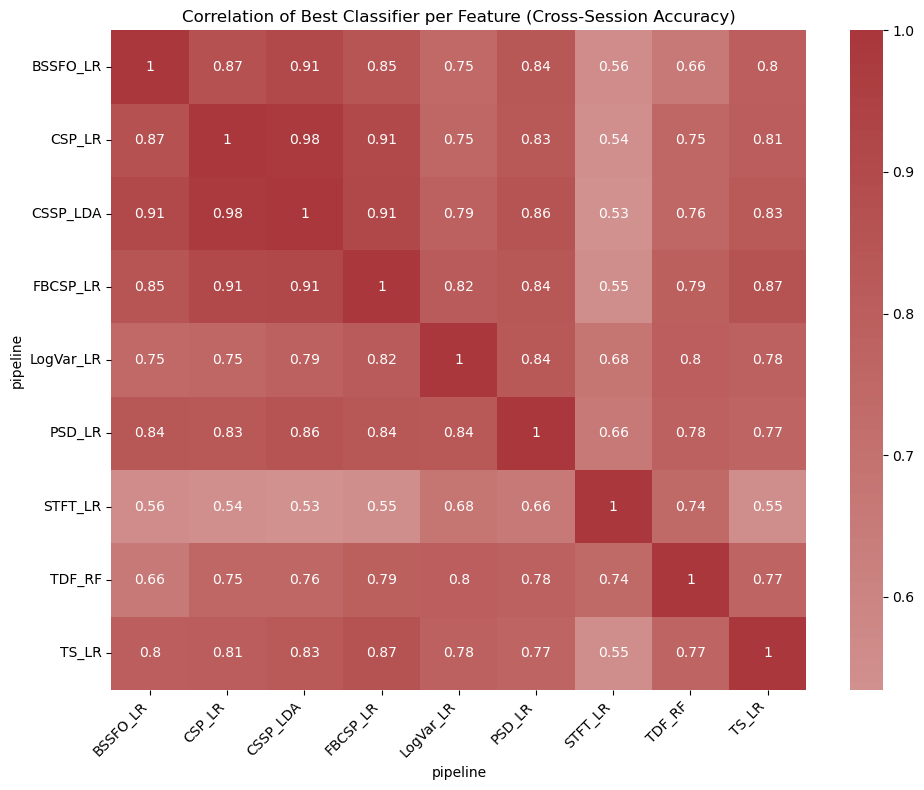

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load cross-session accuracies
df_base = results['2025-04-25']['cross']

# 2) Compute mean accuracy per pipeline
pipeline_means = (
    df_base
    .groupby('pipeline')['test_accuracy']
    .mean()
    .reset_index(name='mean_test_accuracy')
)

# 3) Extract feature & classifier (assumes 'FEATURE_CLASSIFIER' naming)
pipeline_means['feature']    = pipeline_means['pipeline'].str.split('_').str[0]
pipeline_means['classifier'] = pipeline_means['pipeline'].str.split('_').str[1]

# 4) Sort by descending accuracy, then drop duplicates so we keep only the best per feature
best_per_feature = (
    pipeline_means
    .sort_values('mean_test_accuracy', ascending=False)
    .drop_duplicates(subset='feature')
    .reset_index(drop=True)
)

print("=== Best Classifier for Each Feature ===")
print(best_per_feature[['feature','classifier','pipeline','mean_test_accuracy']])

# 5) Pivot only those selected pipelines
selected = best_per_feature['pipeline'].tolist()
df_pivot = (
    df_base[df_base['pipeline'].isin(selected)]
    .pivot(index='evaluation', columns='pipeline', values='test_accuracy')
)

# 6) Compute & plot correlation matrix
df_corr = df_pivot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='vlag', center=0)
plt.title('Correlation of Best Classifier per Feature (Cross-Session Accuracy)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


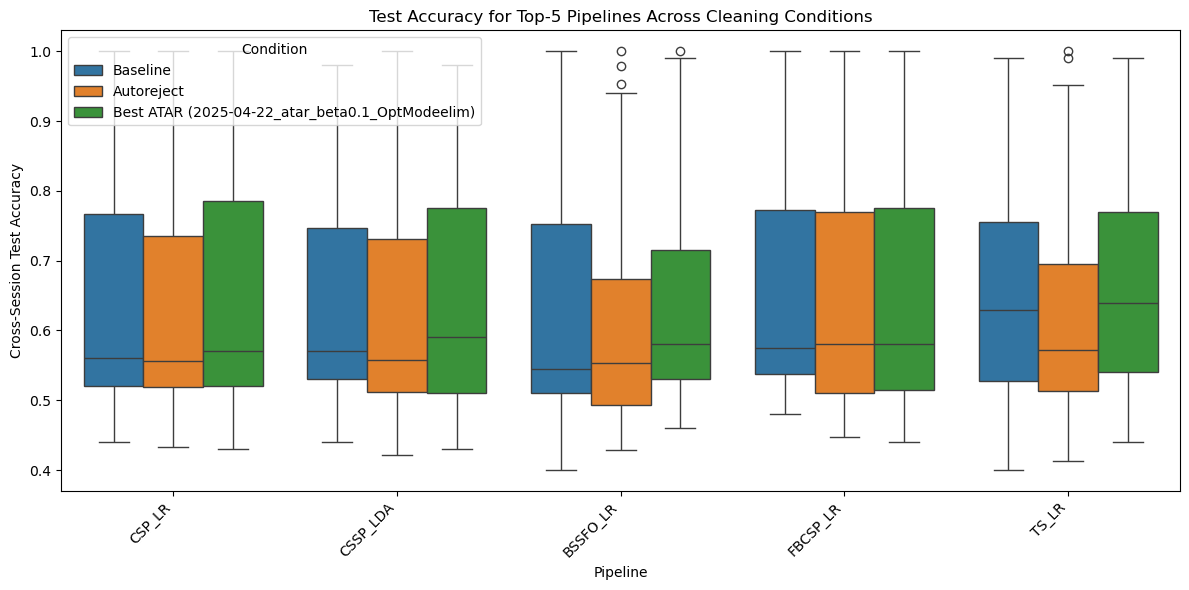

In [ ]:

df_cross_all = pd.concat(
    [dfs['cross'].assign(condition=src) for src, dfs in results.items()],
    ignore_index=True
)

# 2) Identify best-performing ATAR variant
atar_means = {
    src: grp['test_accuracy'].mean()
    for src, grp in df_cross_all.groupby('condition')
    if 'atar' in src
}
best_atar = max(atar_means, key=atar_means.get)

# 3) Build baseline pipeline ranking
df_base = results['2025-04-25']['cross']
pipe_means = (
    df_base
    .groupby('pipeline')['test_accuracy']
    .mean()
    .reset_index(name='mean_test_accuracy')
    .sort_values('mean_test_accuracy', ascending=False)
)
# extract feature
pipe_means['feature'] = pipe_means['pipeline'].str.split('_').str[0]

# 4) Select top 5 distinct-feature pipelines
best5 = []
seen = set()
for _, row in pipe_means.iterrows():
    feat = row['feature']
    if feat not in seen:
        best5.append(row['pipeline'])
        seen.add(feat)
    if len(best5) == 5:
        break

# 5) Filter for just those pipelines and the three conditions
keep_conditions = ['2025-04-25', '2025-04-25_autoreject', best_atar]
df_cmp = df_cross_all[
    df_cross_all['condition'].isin(keep_conditions) &
    df_cross_all['pipeline'].isin(best5)
].copy()

# 6) Map to friendly labels
label_map = {
    '2025-04-25': 'Baseline',
    '2025-04-25_autoreject': 'Autoreject',
    best_atar: f'Best ATAR ({best_atar})'
}
df_cmp['Condition'] = df_cmp['condition'].map(label_map)

# 7) Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_cmp,
    x='pipeline',
    y='test_accuracy',
    hue='Condition',
    dodge=True
)
plt.title("Test Accuracy for Top-5 Pipelines Across Cleaning Conditions")
plt.xlabel("Pipeline")
plt.ylabel("Cross-Session Test Accuracy")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Condition", loc='upper left')
plt.tight_layout()
plt.show()


2025-05-06 01:17:20,207 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-06 01:17:20,208 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-06 01:17:20,210 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-06 01:17:20,210 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-06 01:17:20,

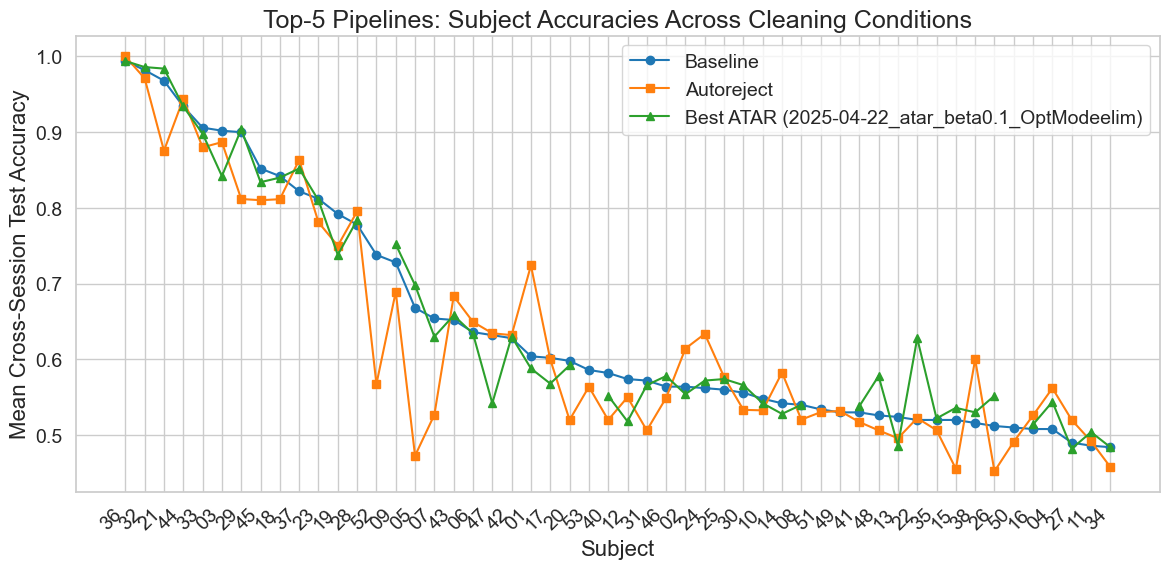

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Combine all cross‐session results
df_cross_all = pd.concat(
    [dfs['cross'].assign(source=src) for src, dfs in results.items()],
    ignore_index=True
)

# 2) Determine your top‐5 distinct‐feature pipelines (based on baseline)
df_base = results['2025-04-25']['cross']
pipe_means = (
    df_base
    .groupby('pipeline')['test_accuracy']
    .mean()
    .reset_index(name='mean_test_accuracy')
    .sort_values('mean_test_accuracy', ascending=False)
)
pipe_means['feature'] = pipe_means['pipeline'].str.split('_').str[0]

best5 = []
seen = set()
for _, row in pipe_means.iterrows():
    feat = row['feature']
    if feat not in seen:
        best5.append(row['pipeline'])
        seen.add(feat)
    if len(best5) == 5:
        break

# 3) Filter the full cross‐session DataFrame down to just those 5 pipelines
df_cross5 = df_cross_all[df_cross_all['pipeline'].isin(best5)].copy()

# 4) Identify which ATAR variant performs best on those pipelines
atar_means = {
    src: grp['test_accuracy'].mean()
    for src, grp in df_cross5.groupby('source')
    if 'atar' in src
}
best_atar = max(atar_means, key=atar_means.get)

# 5) Determine subject ordering by baseline performance (averaged over best5)
baseline_avg = (
    df_cross5[df_cross5['source'] == '2025-04-25']
    .groupby('evaluation')['test_accuracy']
    .mean()
)
subject_order = baseline_avg.sort_values(ascending=False).index.tolist()

# 6) Plot per‐subject mean accuracy for the three conditions
plt.figure(figsize=(12, 6))
for src, marker, label in [
    ('2025-04-25',            'o', 'Baseline'),
    ('2025-04-25_autoreject', 's', 'Autoreject'),
    (best_atar,               '^', f'Best ATAR ({best_atar})')
]:
    series = (
        df_cross5[df_cross5['source'] == src]
        .groupby('evaluation')['test_accuracy']
        .mean()
        .reindex(subject_order)
    )
    plt.plot(subject_order, series.values,
             marker=marker, linestyle='-', label=label)

plt.xlabel('Subject')
plt.ylabel('Mean Cross-Session Test Accuracy')
plt.title('Top-5 Pipelines: Subject Accuracies Across Cleaning Conditions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
df_base = results['2025-04-25']['cross']
df_base

evaluation   pipeline  test_accuracy  test_roc_auc  \
0            01    CSP_SVM           0.53           NaN   
1            01     CSP_LR           0.51        0.4428   
2            01    CSP_LDA           0.51        0.4528   
3            01     CSP_RF           0.56        0.6016   
4            01   CSSP_SVM           0.55           NaN   
...         ...        ...            ...           ...   
1867         53  LogVar_RF           0.49        0.4646   
1868         53     TS_SVM           0.60           NaN   
1869         53      TS_LR           0.63        0.6652   
1870         53     TS_LDA           0.56        0.5780   
1871         53      TS_RF           0.58        0.5818   

                                           correct_mask  
0     [False, True, False, False, True, True, False,...  
1     [False, False, False, False, True, True, False...  
2     [False, False, False, False, True, True, False...  
3     [False, True, False, False, True, True, False,...  
4     [False, True, False, False, True, True, False,...  
...                                                 ...  
1867  [True, False, False, True, False, False, True,...  
1868  [True, True, True, True, True, True, True, Tru...  
1869  [False, True, True, True, True, True, True, Tr...  
1870  [False, True, True, False, True, True, False, ...  
1871  [False, True, True, True, True, True, False, F...  

[1872 rows x 5 columns]

In [19]:
df_base = results['2025-04-25']['within']
df_base

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0          01_1    CSP_SVM                0.640        0.696125   
1          01_1     CSP_LR                0.595        0.639375   
2          01_1    CSP_LDA                0.595        0.648125   
3          01_1     CSP_RF                1.000        1.000000   
4          01_1   CSSP_SVM                0.635        0.698875   
...         ...        ...                  ...             ...   
3739       53_2  LogVar_RF                1.000        1.000000   
3740       53_2     TS_SVM                1.000        1.000000   
3741       53_2      TS_LR                1.000        1.000000   
3742       53_2     TS_LDA                0.845        0.921375   
3743       53_2      TS_RF                1.000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.55         0.626  
1                  0.61         0.610  
2                  0.55         0.582  
3                  0.57         0.584  
4                  0.54         0.614  
...                 ...           ...  
3739               0.55         0.644  
3740               0.67         0.728  
3741               0.70         0.760  
3742               0.62         0.678  
3743               0.67         0.690  

[3744 rows x 6 columns]

In [81]:
import pandas as pd

# 1) Grab your baseline within‑session DataFrame
df_base = results['2025-04-25']['within']

# 2) Determine the top‑5 distinct‑feature pipelines by mean_val_accuracy
pipe_means = (
    df_base
    .groupby('pipeline')['mean_val_accuracy']
    .mean()
    .reset_index(name='mean_val_accuracy')
    .sort_values('mean_val_accuracy', ascending=False)
)
# extract the feature prefix so we only pick one pipeline per feature
pipe_means['feature'] = pipe_means['pipeline'].str.split('_').str[0]

best5 = []
seen = set()
for _, row in pipe_means.iterrows():
    feat = row['feature']
    if feat not in seen:
        best5.append(row['pipeline'])
        seen.add(feat)
    if len(best5) == 5:
        break

# 3) Compute each subject’s baseline mean validation‑accuracy across those top‑5 pipelines
df_top5 = df_base[df_base['pipeline'].isin(best5)]
subject_means = (
    df_top5
    .groupby('evaluation')['mean_val_accuracy']
    .mean()
    .reset_index(name='baseline_mean_val_accuracy')
)

# 4) Assign performance groups based on validation accuracy
def assign_group(acc):
    if acc > 0.9:
        return 'best (>0.9)'
    elif acc > 0.8:
        return 'good (0.8–0.9)'
    elif acc > 0.7:
        return 'average (0.7–0.8)'
    else:
        return 'illiterate (<0.7)'


subject_means['group'] = subject_means['baseline_mean_val_accuracy'].apply(assign_group)

# 5) Show the table
print(subject_means)

# 6) (Optional) Count how many subjects in each group
print("\nCounts per group:")
print(subject_means['group'].value_counts())


    evaluation  baseline_mean_val_accuracy              group
0         01_1                       0.712  average (0.7–0.8)
1         01_2                       0.786  average (0.7–0.8)
2         02_1                       0.880     good (0.8–0.9)
3         02_2                       0.838     good (0.8–0.9)
4         03_1                       0.932        best (>0.9)
..         ...                         ...                ...
99        51_2                       0.588  illiterate (<0.7)
100       52_1                       0.776  average (0.7–0.8)
101       52_2                       0.746  average (0.7–0.8)
102       53_1                       0.602  illiterate (<0.7)
103       53_2                       0.618  illiterate (<0.7)

[104 rows x 3 columns]

Counts per group:
group
illiterate (<0.7)    54
average (0.7–0.8)    22
best (>0.9)          21
good (0.8–0.9)        7
Name: count, dtype: int64


In [680]:
import pandas as pd

# 1) Grab your baseline cross‐session DataFrame
df_base = results['2025-04-25']['cross']

# 2) Determine the top‐5 distinct‐feature pipelines (baseline)
pipe_means = (
    df_base
    .groupby('pipeline')['test_accuracy']
    .mean()
    .reset_index(name='mean_test_accuracy')
    .sort_values('mean_test_accuracy', ascending=False)
)
pipe_means['feature'] = pipe_means['pipeline'].str.split('_').str[0]

best5 = []
seen = set()
for _, row in pipe_means.iterrows():
    feat = row['feature']
    if feat not in seen:
        best5.append(row['pipeline'])
        seen.add(feat)
    if len(best5) == 5:
        break

# 3) Compute each subject’s baseline mean accuracy across those top‐5 pipelines
df_top5 = df_base[df_base['pipeline'].isin(best5)]
subject_means = (
    df_top5
    .groupby('evaluation')['test_accuracy']
    .mean()
    .reset_index(name='baseline_mean_accuracy')
)

# 4) Assign performance groups
def assign_group(acc):
    if acc > 0.9:
        return 'best (>0.9)'
    elif acc > 0.8:
        return 'good (0.8–0.9)'
    elif acc > 0.7:
        return 'average (0.7–0.8)'
    elif acc > 0.6:
        return 'low (0.6–0.7)'
    else:
        return 'illiterate (<0.6)'

subject_means['group'] = subject_means['baseline_mean_accuracy'].apply(assign_group)

# 5) Show the table
print(subject_means)

# 6) (Optional) Count how many subjects in each group
print("\nCounts per group:")
print(subject_means['group'].value_counts())


   evaluation  baseline_mean_accuracy              group
0          01                   0.604      low (0.6–0.7)
1          02                   0.564  illiterate (<0.6)
2          03                   0.902        best (>0.9)
3          04                   0.508  illiterate (<0.6)
4          05                   0.668      low (0.6–0.7)
5          06                   0.636      low (0.6–0.7)
6          07                   0.654      low (0.6–0.7)
7          08                   0.540  illiterate (<0.6)
8          09                   0.728  average (0.7–0.8)
9          10                   0.548  illiterate (<0.6)
10         11                   0.486  illiterate (<0.6)
11         12                   0.574  illiterate (<0.6)
12         13                   0.524  illiterate (<0.6)
13         14                   0.542  illiterate (<0.6)
14         15                   0.520  illiterate (<0.6)
15         16                   0.508  illiterate (<0.6)
16         17                  

In [681]:
subject_means

evaluation  baseline_mean_accuracy              group
0          01                   0.604      low (0.6–0.7)
1          02                   0.564  illiterate (<0.6)
2          03                   0.902        best (>0.9)
3          04                   0.508  illiterate (<0.6)
4          05                   0.668      low (0.6–0.7)
5          06                   0.636      low (0.6–0.7)
6          07                   0.654      low (0.6–0.7)
7          08                   0.540  illiterate (<0.6)
8          09                   0.728  average (0.7–0.8)
9          10                   0.548  illiterate (<0.6)
10         11                   0.486  illiterate (<0.6)
11         12                   0.574  illiterate (<0.6)
12         13                   0.524  illiterate (<0.6)
13         14                   0.542  illiterate (<0.6)
14         15                   0.520  illiterate (<0.6)
15         16                   0.508  illiterate (<0.6)
16         17                   0.602      low (0.6–0.7)
17         18                   0.842     good (0.8–0.9)
18         19                   0.792  average (0.7–0.8)
19         20                   0.598  illiterate (<0.6)
20         21                   0.968        best (>0.9)
21         22                   0.520  illiterate (<0.6)
22         23                   0.812     good (0.8–0.9)
23         24                   0.562  illiterate (<0.6)
24         25                   0.560  illiterate (<0.6)
25         26                   0.512  illiterate (<0.6)
26         27                   0.490  illiterate (<0.6)
27         28                   0.778  average (0.7–0.8)
28         29                   0.900     good (0.8–0.9)
29         30                   0.556  illiterate (<0.6)
30         31                   0.572  illiterate (<0.6)
31         32                   0.982        best (>0.9)
32         33                   0.906        best (>0.9)
33         34                   0.484  illiterate (<0.6)
34         35                   0.520  illiterate (<0.6)
35         36                   0.994        best (>0.9)
36         37                   0.822     good (0.8–0.9)
37         38                   0.516  illiterate (<0.6)
38         40                   0.582  illiterate (<0.6)
39         41                   0.530  illiterate (<0.6)
40         42                   0.628      low (0.6–0.7)
41         43                   0.652      low (0.6–0.7)
42         44                   0.934        best (>0.9)
43         45                   0.852     good (0.8–0.9)
44         46                   0.564  illiterate (<0.6)
45         47                   0.632      low (0.6–0.7)
46         48                   0.526  illiterate (<0.6)
47         49                   0.530  illiterate (<0.6)
48         50                   0.510  illiterate (<0.6)
49         51                   0.534  illiterate (<0.6)
50         52                   0.738  average (0.7–0.8)
51         53                   0.586  illiterate (<0.6)

In [682]:
import pandas as pd

# 1) Aggregate by group
group_summary = (
    subject_means
      .groupby('group')['baseline_mean_val_accuracy']
      .agg(
           count='count',
           mean_accuracy='mean',
           median_accuracy='median',
           std_accuracy='std'
      )
)

# 2) Compute percentage of total
total = group_summary['count'].sum()
group_summary['percentage'] = (group_summary['count'] / total) * 100

# 3) Sort by mean validation accuracy
group_summary = group_summary.sort_values('mean_accuracy', ascending=False)

group_summary


KeyError: 'Column not found: baseline_mean_val_accuracy'

In [683]:
import pandas as pd

# 1) Aggregate by group
group_summary = (
    subject_means
      .groupby('group')['baseline_mean_accuracy']
      .agg(
           count='count',
           mean_accuracy='mean',
           median_accuracy='median',
           std_accuracy='std'
      )
)

# 2) Compute percentage of total
total = group_summary['count'].sum()
group_summary['percentage'] = (group_summary['count'] / total) * 100

# 3) Sort by mean accuracy if you like
group_summary = group_summary.sort_values('mean_accuracy', ascending=False)

group_summary


count  mean_accuracy  median_accuracy  std_accuracy  \
group                                                                    
best (>0.9)            6       0.947667            0.951      0.039363   
good (0.8–0.9)         5       0.845600            0.842      0.034275   
average (0.7–0.8)      4       0.759000            0.758      0.030833   
low (0.6–0.7)          8       0.634500            0.634      0.023440   
illiterate (<0.6)     29       0.536759            0.530      0.030605   

                   percentage  
group                          
best (>0.9)         11.538462  
good (0.8–0.9)       9.615385  
average (0.7–0.8)    7.692308  
low (0.6–0.7)       15.384615  
illiterate (<0.6)   55.769231

In [684]:
subject_means.head(10)

evaluation  baseline_mean_accuracy              group
0         01                   0.604      low (0.6–0.7)
1         02                   0.564  illiterate (<0.6)
2         03                   0.902        best (>0.9)
3         04                   0.508  illiterate (<0.6)
4         05                   0.668      low (0.6–0.7)
5         06                   0.636      low (0.6–0.7)
6         07                   0.654      low (0.6–0.7)
7         08                   0.540  illiterate (<0.6)
8         09                   0.728  average (0.7–0.8)
9         10                   0.548  illiterate (<0.6)

In [687]:
low_mean = subject_means[subject_means.group == 'low (0.6–0.7)']
illiterate_mean = subject_means[subject_means.group == 'illiterate (<0.6)']
best_mean = subject_means[subject_means.group == 'best (>0.9)']
average_mean = subject_means[subject_means.group == 'average (0.7–0.8)']
good_mean = subject_means[subject_means.group == 'good (0.8–0.9)']

In [686]:
import pandas as pd

# 1) Grab your baseline cross‐session DataFrame
df_base = results['2025-04-25']['cross']

# 2) Determine the top‐5 distinct‐feature pipelines (baseline)
pipe_means = (
    df_base
    .groupby('pipeline')['test_accuracy']
    .mean()
    .reset_index(name='mean_test_accuracy')
    .sort_values('mean_test_accuracy', ascending=False)
)
pipe_means['feature'] = pipe_means['pipeline'].str.split('_').str[0]

best5 = []
seen = set()
for _, row in pipe_means.iterrows():
    feat = row['feature']
    if feat not in seen:
        best5.append(row['pipeline'])
        seen.add(feat)
    if len(best5) == 5:
        break

# 3) Compute each subject’s baseline mean accuracy across those top‐5 pipelines
df_top5 = df_base[df_base['pipeline'].isin(best5)]
subject_means = (
    df_top5
    .groupby('evaluation')['test_accuracy']
    .mean()
    .reset_index(name='baseline_mean_accuracy')
)

# 4) Assign performance groups
def assign_group(acc):
    if acc > 0.9:
        return 'best (>0.9)'
    elif acc > 0.8:
        return 'good (0.8–0.9)'
    elif acc > 0.7:
        return 'average (0.7–0.8)'
    else:
        return 'illiterate (<0.7)'

subject_means['group'] = subject_means['baseline_mean_accuracy'].apply(assign_group)

# 5) Show the table
print(subject_means)

# 6) (Optional) Count how many subjects in each group
print("\nCounts per group:")
print(subject_means['group'].value_counts())


   evaluation  baseline_mean_accuracy              group
0          01                   0.604  illiterate (<0.7)
1          02                   0.564  illiterate (<0.7)
2          03                   0.902        best (>0.9)
3          04                   0.508  illiterate (<0.7)
4          05                   0.668  illiterate (<0.7)
5          06                   0.636  illiterate (<0.7)
6          07                   0.654  illiterate (<0.7)
7          08                   0.540  illiterate (<0.7)
8          09                   0.728  average (0.7–0.8)
9          10                   0.548  illiterate (<0.7)
10         11                   0.486  illiterate (<0.7)
11         12                   0.574  illiterate (<0.7)
12         13                   0.524  illiterate (<0.7)
13         14                   0.542  illiterate (<0.7)
14         15                   0.520  illiterate (<0.7)
15         16                   0.508  illiterate (<0.7)
16         17                  

In [80]:
subject_means.group

0      average (0.7–0.8)
1      average (0.7–0.8)
2         good (0.8–0.9)
3         good (0.8–0.9)
4            best (>0.9)
             ...        
99     illiterate (<0.6)
100    average (0.7–0.8)
101    average (0.7–0.8)
102        low (0.6–0.7)
103        low (0.6–0.7)
Name: group, Length: 104, dtype: object

In [755]:
illiterate_mean = subject_means[subject_means.group == 'illiterate (<0.7)']
best_mean = subject_means[subject_means.group == 'best (>0.9)']
good_mean = subject_means[subject_means.group == 'good (0.8–0.9)']
average_mean = subject_means[subject_means.group == 'average (0.7–0.8)']

In [772]:
paths_epo = []
import os
import glob
# mean = best_mean.copy()
# # assume illiterate_mean is your DataFrame
# # 1) split the 'evaluation' strings like "04_1" into two new int columns
# mean[['subject', 'run']] = (
#     mean['evaluation']
#       .str.split('_', expand=True)
#       .astype(int)
# )

# # 2) now you can iterate cleanly
# for subject, run in zip(mean['subject'], mean['run']):

for subject in average_mean.evaluation:
# for subject in range(54):
    for run in [1,2]:
        try:
            tfr_path_epo = glob.glob(os.path.join(os.getcwd(), 
                                                    'data','tfr','20',f's{subject:02}.{run:02}**Hz)_tfr_data.h5'))
            # tfr_path_epo = glob.glob(os.path.join(os.getcwd(), 
            #                                        'data','tfr','20',f's{subject:02}.{run:02}**Hz)autore_tfr_data.h5'))
            # tfr_path_epo = glob.glob(os.path.join(os.getcwd(), 
            #                                       'data','tfr','20',f's{subject:02}.{run:02}**Hz)_beta0.1_OptModesoft_tfr_data.h5'))

            # tfr_path_epo = glob.glob(os.path.join(os.getcwd(), 
            #                                       'data','tfr','20',f's{subject:02}.{run:02}**Hz)_beta0.05_OptModesoft_tfr_data.h5'))

            paths_epo.append(tfr_path_epo)
        except Exception as e:
            # Log the error and continue with the next iteration
            log.error(f"Error processing subject {subject}, run {run}")
            log.error(f"Error details: {e}")
            continue
tfr_paths_epo = [path for path in paths_epo if path]



In [700]:
tfr_path_epo

['c:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\data\\tfr\\20\\s01.02(-5_10)(8_30Hz)_tfr_data.h5']

In [701]:
tfr_file[0]

'c:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\data\\tfr\\20\\s04.02(-5_10)(8_30Hz)_tfr_data.h5'

In [773]:
# tfrs = []
tfr_right = []
tfr_left = []
            # events = dict(left_hand=2, right_hand=1)
stats_list = []
channels = ['C3', 'C4', 'Cz']


for tfr_file in tfr_paths_epo:
    tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list
    tfr.crop(tmin=-4, tmax=9)

    eid = tfr.event_id.copy()

    if '1' in eid and '2' in eid:
        eid = {
            'left_hand':  eid.pop('2'),
            'right_hand': eid.pop('1')
        }
        tfr.event_id = eid

    left_avg  = tfr['left_hand'].average()
    right_avg = tfr['right_hand'].average()

    tfr_left.append(left_avg)
    tfr_right.append(right_avg)
    # tfrs.append(tfr) #
    
        # ── ADDED ── compute stats in the 0–4 s window and store for boxplots
    # (we crop a copy so as not to disturb the originals in tfr_left/tfr_right)
  # crop to 0–4 s and pick channels
    left_crop  = left_avg.copy().crop(tmin=0, tmax=4).pick_channels(channels)
    right_crop = right_avg.copy().crop(tmin=0, tmax=4).pick_channels(channels)


    # --- extract subject/run name ---
    fname     = os.path.basename(tfr_file[0])
    run_full  = fname.replace('_tfr_data.h5', '')
    subject   = run_full.split('(')[0]  # e.g. "s53.02"
    
    stats = {'subject': subject}
    for idx, ch in enumerate(channels):
        data_l = left_crop.data[idx]   # (n_freqs, n_times)
        data_r = right_crop.data[idx]
        stats[f'mean_left_{ch}_0_4s'] = data_l.mean()
        stats[f'std_left_{ch}_0_4s']  = data_l.std(ddof=0)
        stats[f'mean_right_{ch}_0_4s'] = data_r.mean()
        stats[f'std_right_{ch}_0_4s']  = data_r.std(ddof=0)

    stats_list.append(stats)
   

Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s09.01(-5_10)(8_30Hz)_tfr_data.h5 ...


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s09.02(-5_10)(8_30Hz)_tfr_data.h5 ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s19.01(-5_10)(8_30Hz)_tfr_data.h5 ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s19.02(-5_10)(8_30Hz)_tfr_data.h5 ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\t

In [774]:
grand_tfr_epo_right =  mne.grand_average(tfr_right)
grand_tfr_epo_left =  mne.grand_average(tfr_left)

Identifying common channels ...


Identifying common channels ...


In [775]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12    # same rule as axes.title
})
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib.ticker import FuncFormatter

def comma_formatter(x, pos):
    s = f"{x:.2f}".replace('.', ',')
    # Remove trailing zeros and comma if not needed
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    return s

def tfr_lineplot(grand_tfr_left=None, grand_tfr_right=None):
    # Convert TFR to DataFrame in long format

    df = grand_tfr_right.to_data_frame(time_format=None, long_format=True)
    df['condition'] = 'right_hand'

    df_2 = grand_tfr_left.to_data_frame(time_format=None, long_format=True)
    df_2['condition'] = 'left_hand'
    df = pd.concat([df, df_2], ignore_index=True)
    
    freq_bounds = {"_": 7,"alpha": 13, "beta": 30}
    df["band"] = pd.cut(
        df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
    )
    df = df.dropna()

    df = df[df["channel"].isin(["C3", "Cz", "C4"])].copy()

    df["channel"] = df["channel"].astype("category")
    df["channel"] = df["channel"].cat.set_categories(["C3", "Cz", "C4"], ordered=True)

    df['condition'] = df['condition'].replace({'left_hand': 'Kairė ranka', 'right_hand': 'Dešinė ranka'})
    
    # Create the FacetGrid plot
    g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
    g.fig.set_size_inches(6.69, 4)


    g.map(sns.lineplot, "time", "value", "condition", n_boot=10)

    xmin, xmax = df["time"].min(), df["time"].max()

    # round xmin down to nearest multiple of 2, xmax up to nearest multiple of 2
    start = int(np.floor(xmin / 2) * 2)   # → -4
    stop  = int(np.ceil (xmax / 2) * 2)    # → 10

    # generate ticks every 2 seconds, up to (but not including) stop
    ticks = np.arange(start, stop, 2)     # → [-4, -2, 0, 2, 4, 6, 8]
    g.set(xticks=ticks)
    
        # Add vertical and horizontal reference lines
    axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
    g.map(plt.axhline, y=0, **axline_kw)
    g.map(plt.axvline, x=0, **axline_kw)
    g.map(plt.axvline, x=4, **axline_kw)    # ← dashed line at 4 s



    # Add vertical and horizontal reference lines
    axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
    g.map(plt.axhline, y=0, **axline_kw)
    g.map(plt.axvline, x=0, **axline_kw)

    # Set plot limits and labels
    # g.set(ylim=(None, 1.5))
    g.set(ylim=(None, 1))
    # g.set(xlim=(-1, 4))

    g.set_axis_labels("Laikas (s)", "Galios pokytis (%)")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    
    # Add a legend
    g.add_legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.1))
    
    # Adjust the subplot layout
    g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
    
    # Save the plot if requested
    # g.fig.suptitle("Vidutinis klasifikavimo tikslumas >90%")
    # (0.8–0.9)
    # fig.text(0, 1, "a", ha='left', va='top', fontsize=22, fontweight='bold')
    for ax in g.axes.flatten():
        ax.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
        ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

    g.fig.subplots_adjust(left=0.1, right=0.9, top=0.88, bottom=0.08)
        # OPTION A: fixed integer ticks

    g.savefig(r'bakalauras/fig20_70_80.png', dpi=800, bbox_inches="tight")

    plt.show()
    # Close the plot to avoid memory issues with multiple plots
    plt.close()


Converting "channel" to "category"...
Converting "ch_type" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


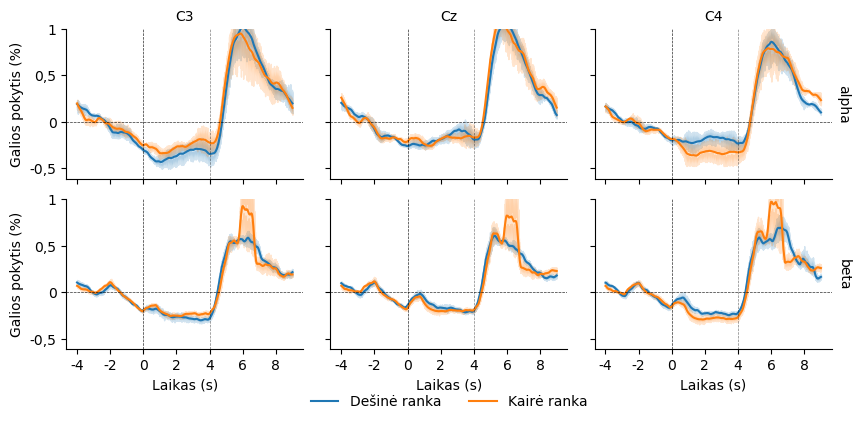

In [776]:
tfr_lineplot(grand_tfr_left=grand_tfr_epo_left, grand_tfr_right=grand_tfr_epo_right)

C:\Users\rokas\AppData\Local\Temp\ipykernel_49548\4242337935.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\rokas\AppData\Local\Temp\ipykernel_49548\4242337935.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_49548\4242337935.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_49548\4242337935.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


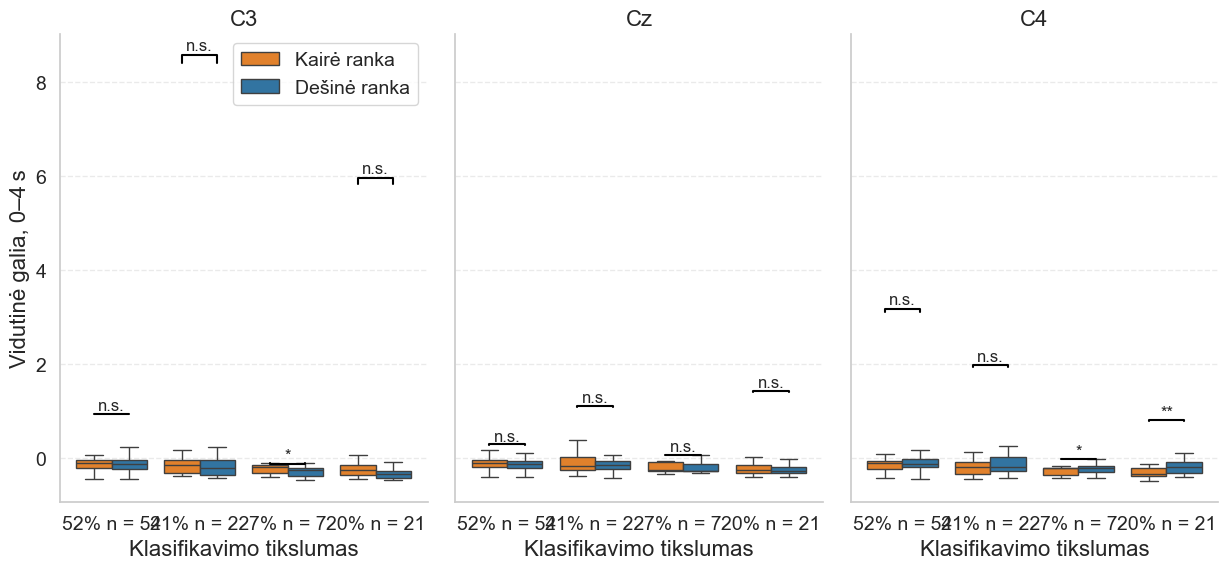

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# ── 1) Load your long‑form CSV ──
df_long = pd.read_csv('plot_data_df_long.csv')

# ── 2) Remap the Hand column from English to Lithuanian ──
df_long['Hand'] = df_long['Hand'].map({
    'left':  'Kairė ranka',
    'right': 'Dešinė ranka'
})

# ── 3) Define & enforce ordering for Group and Channel ──
group_order   = ['illiterate (<0.7)', 'average (0.7–0.8)', 'good (0.8–0.9)', 'best (>0.9)']
channel_order = ['C3', 'Cz', 'C4']

df_long['Group']   = pd.Categorical(df_long['Group'],   categories=group_order, ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)

# ── 4) Recompute counts & percentages based on unique subjects ──
counts = (
    df_long
      .groupby('Group')['subject']
      .nunique()
      .reindex(group_order)
      .fillna(0)
      .astype(int)
)
total = counts.sum()
pct   = (counts / total * 100).round(0).astype(int)

label_map = {
    g: f"{pct[g]}% n = {counts[g]}"
    for g in group_order
}
new_labels = [ label_map[g] for g in group_order ]

# ── 5) Apply your global Matplotlib/Seaborn style ──
mpl.rcParams['font.family']     = 'Arial'
mpl.rcParams['font.sans-serif'] = ['Arial']
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

# ── 6) Draw the faceted boxplots ──
g = sns.catplot(
    data=df_long,
    x='Group',
    y='Power',
    hue='Hand',
    col='Channel',
    kind='box',
    order=group_order,
    palette={'Kairė ranka':'#ff7f0e', 'Dešinė ranka':'#1f77b4'},
    showfliers=False,
    sharey=True,
    height=6,
    aspect=0.7,
    legend_out=False
)

# ── 7) Replace x‑tick labels with “XX% n = N” ──
for ax in g.axes.flat:
    ax.set_xticklabels(new_labels, rotation=0, ha='center')

# ── 8) Polish titles, axes, legend, and grids ──
g.set_titles("{col_name}")                    # show C3, Cz, C4
g._legend.set_title("")                       # drop “Hand:” title
g.set_axis_labels("Klasifikavimo tikslumas", "Vidutinė galia, 0–4 s")
sns.despine(top=True, right=True)
for ax in g.axes.flat:
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    ax.xaxis.grid(False)

# ── 9) Compute & annotate paired‑t significance ──
for ax, channel in zip(g.axes.flat, channel_order):
    sub = df_long[df_long['Channel'] == channel]
    for i, group in enumerate(group_order):
        grp = sub[sub['Group'] == group]
        lv = grp[grp['Hand']=='Kairė ranka']['Power']
        rv = grp[grp['Hand']=='Dešinė ranka']['Power']
        stat, p = ttest_rel(lv, rv, nan_policy='omit')
        if   p < 0.001: sym = '***'
        elif p < 0.01:  sym = '**'
        elif p < 0.05:  sym = '*'
        else:           sym = 'n.s.'
        y_max = grp['Power'].max() * 1.05
        x1, x2 = i - 0.2, i + 0.2
        ax.plot([x1, x1, x2, x2],
                [y_max, y_max*1.02, y_max*1.02, y_max],
                lw=1.5, c='k')
        ax.text(i, y_max*1.025, sym, ha='center', va='bottom', fontsize=12)

# ── 10) Final layout & show ──
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# ── 1) Global style ──
mpl.rcParams['font.family']     = 'Arial'
mpl.rcParams['font.sans-serif'] = ['Arial']
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)

mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

# ── 2) Tag each stats DataFrame with its Group label ──
df_avg        = average_stats_base.copy();     df_avg['Group'] = 'average (0.7–0.8)'
df_good       = good_stats_base.copy();        df_good['Group']      = 'good (0.8–0.9)'
df_illiterate = illiterate_stats_base.copy();  df_illiterate['Group']= 'illiterate (<0.7)'
df_best       = best_stats_base.copy();        df_best['Group']      = 'best (>0.9)'

# ── 3) Combine & melt into long form ──
df_all    = pd.concat([df_illiterate, df_avg, df_good, df_best], ignore_index=True)
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long   = df_all.melt(
    id_vars=['Group','subject'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)

# ── 4) Extract Hand & Channel and map Hand to Lithuanian ──
df_long['Hand'] = (
    df_long['Metric']
      .str.extract(r'mean_(left|right)')[0]
      .map({'left':'Kairė ranka', 'right':'Dešinė ranka'})
)
df_long['Channel'] = df_long['Metric'].str.extract(r'mean_[a-z]+_(C3|C4|Cz)')[0]

# ── 5) Force ordering for groups & channels ──
group_order   = ['illiterate (<0.7)', 'average (0.7–0.8)', 'good (0.8–0.9)', 'best (>0.9)']
channel_order = ['C3', 'Cz', 'C4']
df_long['Group']   = pd.Categorical(df_long['Group'],   categories=group_order,   ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)

# ── 6) Compute counts & percentages for the x‑tick labels ──
counts = df_long['Group'].value_counts().reindex(group_order).fillna(0).astype(int)
total  = counts.sum()
pct    = (counts / total * 100).round(0).astype(int)

# ── 7) Draw the faceted boxplots ──
g = sns.catplot(
    data=df_long,
    x='Group',
    y='Power',
    hue='Hand',
    col='Channel',
    kind='box',
    order=group_order,
    palette={'Kairė ranka':'#ff7f0e', 'Dešinė ranka':'#1f77b4'},
    showfliers=False,
    sharey=True,
    height=6,
    aspect=0.7,
    legend_out=False
)

# ── 8) Replace x‑tick labels with “XX% n = N” and center ──
# 9) Manual x‑tick labels
# Define exactly the strings you want, in the same order as `group_order`
new_labels = [
    "<70%",      # corresponds to 'illiterate (<0.7)'
    "70-80%",  # 'average (0.7–0.8)'
    "80-90%",      # 'good (0.8–0.9)'
    ">90%"      # 'best (>0.9)'
]

# Apply them to every facet’s x‑axis
for ax in g.axes.flat:
    ax.set_xticklabels(new_labels, rotation=0, ha='center')


# ── 9) Polish axes & legend ──
g.set_axis_labels("", "Vidutinė galia, 0–4 s")
g.set_titles("{col_name}")     # show C3, Cz, C4 on each facet
g._legend.set_title("")        # drop “Hand:” title
sns.despine(top=True, right=True)
for ax in g.axes.flat:
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    ax.xaxis.grid(False)
g.set_axis_labels("Klasifikavimo tikslumas", "Vidutinė galia, 0–4 s")
g._legend.set_title("")  

from scipy.stats import ttest_rel

# ── 10) Compute & annotate significance for each Group × Channel ──
for ax, channel in zip(g.axes.flat, channel_order):
    # restrict to this channel
    sub = df_long[df_long['Channel'] == channel]
    for i, group in enumerate(group_order):
        grp = sub[sub['Group'] == group]
        left_vals  = grp[grp['Hand'] == 'Kairė ranka']['Power']
        right_vals = grp[grp['Hand'] == 'Dešinė ranka']['Power']
        # paired t‑test
        stat, p = ttest_rel(left_vals, right_vals, nan_policy='omit')
        # decide star level
        if   p < 0.001: sym = '***'
        elif p < 0.01:  sym = '**'
        elif p < 0.05:  sym = '*'
        else:           sym = 'n.s.'
        # position for bracket
        y_max = grp['Power'].max() * 1.05
        x1, x2 = i - 0.2, i + 0.2
        # draw bracket
        ax.plot([x1, x1, x2, x2],
                [y_max, y_max*1.02, y_max*1.02, y_max],
                lw=1.5, c='k')
        # add text
        ax.text(i, y_max*1.025, sym,
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()



plt.subplots_adjust(wspace=0.3, bottom=0.30)
plt.tight_layout()
plt.show()


NameError: name 'average_stats_base' is not defined

In [ ]:
# save the long‐form data used for plotting
df_long.to_csv('plot_data_df_long.csv', index=False)

# if you’d also like to save the raw combined data before melting:
df_all.to_csv('plot_data_df_all.csv', index=False)

# and to preserve your subject_means counts/percentages:
group_counts = (
    pd.DataFrame({
        'count': counts,
        'percentage': pct
    })
    .reset_index()
    .rename(columns={'index': 'Group'})
)
group_counts.to_csv('plot_data_group_counts.csv', index=False)


In [ ]:
average_stats_base
good_stats_base
illiterate_stats_base
best_stats_base

In [123]:
average_stats_base = pd.DataFrame(stats_list)

In [131]:
good_stats_base = pd.DataFrame(stats_list)

In [117]:
illiterate_stats_base = pd.DataFrame(stats_list)

In [137]:
best_stats_base = pd.DataFrame(stats_list)

In [34]:
df_stats_base = pd.DataFrame(stats_list)

In [46]:
df_stats_atar = pd.DataFrame(stats_list)

In [40]:
df_stats_autore = pd.DataFrame(stats_list)

In [291]:
df_base = pd.read_csv('combined_stats_valymo.csv')
df_base

subject  mean_left_C3_0_4s  std_left_C3_0_4s  mean_right_C3_0_4s  \
0    s01.01           0.366093          0.243701            0.239492   
1    s01.02           0.156600          0.208840           -0.051389   
2    s02.01          -0.185448          0.186242           -0.259497   
3    s02.02          -0.109915          0.118358           -0.148723   
4    s03.01          -0.035076          0.117497           -0.084930   
..      ...                ...               ...                 ...   
307  s51.02          -0.062521          0.115458           -0.114566   
308  s52.01          -0.262125          0.139883           -0.308204   
309  s52.02          -0.307446          0.165099           -0.269278   
310  s53.01          -0.203003          0.183767           -0.232019   
311  s53.02          -0.109881          0.202149           -0.117235   

     std_right_C3_0_4s  mean_left_C4_0_4s  std_left_C4_0_4s  \
0             0.289979           1.510726          1.442317   
1             0.163731           1.854483          2.300448   
2             0.140375          -0.214505          0.147714   
3             0.110300          -0.217123          0.138155   
4             0.158779          -0.159189          0.152781   
..                 ...                ...               ...   
307           0.139096          -0.079608          0.113344   
308           0.151552          -0.278817          0.124951   
309           0.199975          -0.339819          0.138841   
310           0.166775          -0.162824          0.232476   
311           0.174842          -0.094593          0.187486   

     mean_right_C4_0_4s  std_right_C4_0_4s  mean_left_Cz_0_4s  \
0              1.607790           1.761778           0.304138   
1              1.024026           1.162246           0.074273   
2             -0.219167           0.142384          -0.332522   
3             -0.157861           0.116563          -0.117517   
4              0.105074           0.136213           0.031847   
..                  ...                ...                ...   
307           -0.133578           0.142775          -0.069354   
308           -0.269446           0.144004          -0.149526   
309           -0.205618           0.139656          -0.190197   
310           -0.140070           0.185921          -0.175007   
311           -0.064120           0.212577          -0.064837   

     std_left_Cz_0_4s  mean_right_Cz_0_4s  std_right_Cz_0_4s   Run  
0            0.211358            0.261372           0.250640  base  
1            0.230650            0.042091           0.166769  base  
2            0.137259           -0.271952           0.138826  base  
3            0.136874           -0.107017           0.113724  base  
4            0.206726            0.087087           0.157000  base  
..                ...                 ...                ...   ...  
307          0.124046           -0.084085           0.184604  atar  
308          0.148513           -0.195885           0.159913  atar  
309          0.131122           -0.106773           0.156078  atar  
310          0.237866           -0.166659           0.193542  atar  
311          0.235480           -0.052935           0.192532  atar  

[312 rows x 14 columns]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# ── 1) Global style ──
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)


df_base = pd.read_csv('combined_stats_valymo.csv')
# ── 2) Tag each stats DataFrame with its Run label ──
df_base   = df_stats_base.copy();   df_base['Run']   = 'base'
df_autore = df_stats_autore.copy(); df_autore['Run'] = 'autoreject'
df_atar   = df_stats_atar.copy();   df_atar['Run']   = 'atar'

# ── 3) Combine & melt into long form ──
df_all    = pd.concat([df_base, df_autore, df_atar], ignore_index=True)
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long   = df_all.melt(
    id_vars=['Run', 'subject'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)

# ── 4) Extract Hand & Channel and map to Lithuanian ──
df_long['Hand'] = (
    df_long['Metric']
      .str.extract(r'mean_(left|right)')[0]
      .map({'left':'Kairė ranka', 'right':'Dešinė ranka'})
)
df_long['Channel'] = df_long['Metric'].str.extract(r'mean_[a-z]+_(C3|C4|Cz)')[0]

# ── 5) Force ordering for runs & channels ──
run_order     = ['base', 'autoreject', 'atar']
channel_order = ['C3', 'Cz', 'C4']
df_long['Run']     = pd.Categorical(df_long['Run'],     categories=run_order,     ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)

# ── 6) Compute counts & percentages for the x‑tick labels ──
counts = df_long['Run'].value_counts().reindex(run_order).fillna(0).astype(int)
total  = counts.sum()
pct    = (counts / total * 100).round(0).astype(int)

# ── 7) Draw the faceted boxplots with Lithuanian hands ──
g = sns.catplot(
    data=df_long,
    x='Run',
    y='Power',
    hue='Hand',
    col='Channel',
    kind='box',
    order=run_order,
    palette={'Kairė ranka':'#ff7f0e', 'Dešinė ranka':'#1f77b4'},
    showfliers=False,
    sharey=True,
    height=6,
    aspect=0.7,
    legend_out=False
)

# ── 8) Replace x‑tick labels with run names ──
display_map = {'base':'Bazinis', 'autoreject':'Autoreject', 'atar':'ATAR'}
new_labels = [display_map[r] for r in run_order]
for ax in g.axes.flat:
    ax.set_xticklabels(new_labels, rotation=0, ha='center')

# ── 9) Polish axes & legend ──
g.set_axis_labels("", "Vidutinė galia, 0–4 s")
g.set_titles("{col_name}")     # show C3, Cz, C4
g._legend.set_title("")        # drop “Hand:” title
sns.despine(top=True, right=True)

for ax in g.axes.flat:
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    ax.xaxis.grid(False)
# 10) Shapiro–Wilk tests for each Run×Channel×Hand
normality_results = []
for (run, channel, hand), sub in df_long.groupby(['Run', 'Channel', 'Hand']):
    stat, p_value = shapiro(sub['Power'])
    normality_results.append({
        'Run': run,
        'Channel': channel,
        'Hand': hand,
        'W statistic': stat,
        'p-value': p_value,
        'Normal?': p_value > 0.05
    })

df_normality = pd.DataFrame(normality_results)
print(df_normality)
plt.subplots_adjust(wspace=0.3, bottom=0.30)
plt.tight_layout()
plt.show()


NameError: name 'df_stats_base' is not defined

In [282]:
df_long[df_long.Channel == 'C3']
df_long[df_long.Channel == 'C4']
df_long[df_long.Channel == 'Cz']

subject   Run              Metric     Power     Group          Hand  \
1248  s01.01  base   mean_left_Cz_0_4s  0.304138   Bazinis   Kairė ranka   
1249  s01.02  base   mean_left_Cz_0_4s  0.074273   Bazinis   Kairė ranka   
1250  s02.01  base   mean_left_Cz_0_4s -0.332522   Bazinis   Kairė ranka   
1251  s02.02  base   mean_left_Cz_0_4s -0.117517   Bazinis   Kairė ranka   
1252  s03.01  base   mean_left_Cz_0_4s  0.031847   Bazinis   Kairė ranka   
...      ...   ...                 ...       ...       ...           ...   
1867  s51.02  atar  mean_right_Cz_0_4s -0.084085  Vilnelių  Dešinė ranka   
1868  s52.01  atar  mean_right_Cz_0_4s -0.195885  Vilnelių  Dešinė ranka   
1869  s52.02  atar  mean_right_Cz_0_4s -0.106773  Vilnelių  Dešinė ranka   
1870  s53.01  atar  mean_right_Cz_0_4s -0.166659  Vilnelių  Dešinė ranka   
1871  s53.02  atar  mean_right_Cz_0_4s -0.052935  Vilnelių  Dešinė ranka   

     Channel  
1248      Cz  
1249      Cz  
1250      Cz  
1251      Cz  
1252      Cz  
...      ...  
1867      Cz  
1868      Cz  
1869      Cz  
1870      Cz  
1871      Cz  

[624 rows x 7 columns]

In [284]:
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# assume df_long has columns:
# ['subject','Run','Metric','Power','Group','Hand','Channel']

for ch in ['C3', 'Cz', 'C4']:
    for hand in ['Kairė ranka', 'Dešinė ranka']:  # or ['left','right'] depending on your labels
        print(f"\n=== Channel: {ch} — Hand: {hand} ===")
        
        # filter by channel & hand, then pivot
        mat = (
            df_long[(df_long.Channel == ch) & (df_long.Hand == hand)]
            .pivot(index='subject', columns='Group', values='Power')
            .dropna()
        )
        mat = mat[['Bazinis', 'Automatinis', 'Vilnelių']]
        
        # omnibus Friedman
        stat, p = friedmanchisquare(mat['Bazinis'],
                                    mat['Automatinis'],
                                    mat['Vilnelių'])
        print(f"Friedman χ² = {stat:.3f}, p = {p:.3e}")
        
        # post‑hoc if significant
        if p < .05:
            post = sp.posthoc_nemenyi_friedman(mat.values)
            post.index = post.columns = mat.columns
            print("Nemenyi post‑hoc p‑values:\n", post)
        else:
            print("No significant omnibus → skip post‑hoc")



=== Channel: C3 — Hand: Kairė ranka ===
Friedman χ² = 49.519, p = 1.766e-11
Nemenyi post‑hoc p‑values:
 Group             Bazinis  Automatinis      Vilnelių
Group                                               
Bazinis      1.000000e+00     0.000020  1.229405e-11
Automatinis  1.959604e-05     1.000000  4.037072e-02
Vilnelių     1.229405e-11     0.040371  1.000000e+00

=== Channel: C3 — Hand: Dešinė ranka ===
Friedman χ² = 36.750, p = 1.047e-08
Nemenyi post‑hoc p‑values:
 Group             Bazinis  Automatinis      Vilnelių
Group                                               
Bazinis      1.000000e+00     0.000037  1.719054e-08
Automatinis  3.724841e-05     1.000000  3.122892e-01
Vilnelių     1.719054e-08     0.312289  1.000000e+00

=== Channel: Cz — Hand: Kairė ranka ===
Friedman χ² = 50.077, p = 1.336e-11
Nemenyi post‑hoc p‑values:
 Group             Bazinis  Automatinis      Vilnelių
Group                                               
Bazinis      1.000000e+00     0.000531  4.567235

In [65]:
    stat, p_f = friedmanchisquare(
        pivot['Bazinis'],
        pivot['Automatinis'],
        pivot['Vilnelių']
    )

In [66]:
pivot['Bazinis']

subject  Hand        
s01.01   Dešinė ranka    1.607790
         Kairė ranka     1.510726
s01.02   Dešinė ranka    1.024026
         Kairė ranka     1.854483
s02.01   Dešinė ranka   -0.219167
                           ...   
s52.02   Kairė ranka    -0.350271
s53.01   Dešinė ranka   -0.141393
         Kairė ranka    -0.149676
s53.02   Dešinė ranka   -0.059714
         Kairė ranka    -0.089193
Name: Bazinis, Length: 208, dtype: float64

Channel | Group         | Shapiro p
------------------------------------
C3      | Bazinis      | 2.54e-21
C3      | Automatinis  | 4.33e-21
C3      | Vilnelių     | 1.12e-20
Cz      | Bazinis      | 4.29e-18
Cz      | Automatinis  | 9.44e-19
Cz      | Vilnelių     | 2.02e-17
C4      | Bazinis      | 1.48e-16
C4      | Automatinis  | 8.36e-16
C4      | Vilnelių     | 5.07e-07


In [62]:
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# 1) Load & melt (as before)
df_all = pd.read_csv('combined_stats_valymo.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long = df_all.melt(
    id_vars=['subject','Run'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
run_map = {'base':'Bazinis','autoreject':'Automatinis','atar':'Vilnelių'}
df_long['Group']   = df_long['Run'].map(run_map)
df_long['Hand']    = df_long['Metric'].str.contains('left')\
                          .map({True:'Kairė ranka', False:'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

# 2) Define orders
group_order   = ['Bazinis','Automatinis','Vilnelių']
channel_order = ['C3','Cz','C4']

# 3) For each channel, pivot to wide format and run Friedman + Nemenyi
for ch in channel_order:
    sub = df_long[df_long['Channel']==ch]
    # pivot: one row per subject‑hand, columns per cleaning group
    pivot = sub.pivot_table(
        index=['subject','Hand'],
        columns='Group',
        values='Power'
    ).dropna()  # drop any incomplete subjects
    
    # Friedman test
    stat, p = friedmanchisquare(
        pivot['Bazinis'],
        pivot['Automatinis'],
        pivot['Vilnelių']
    )
    print(f"{ch}: Friedman χ² = {stat:.3f}, p = {p:.3e}")
    
    # Nemenyi post‑hoc
    # returns a DataFrame of pairwise p‑values
    nemenyi_p = sp.posthoc_nemenyi_friedman(pivot.values)
    nemenyi_p.index = nemenyi_p.columns = group_order
    print(f"{ch} Nemenyi pairwise p‑values:")
    print(nemenyi_p, "\n")


C3: Friedman χ² = 85.538, p = 2.664e-19
C3 Nemenyi pairwise p‑values:
                  Bazinis   Automatinis  Vilnelių
Bazinis      1.000000e+00  1.043859e-09  0.016633
Automatinis  1.043859e-09  1.000000e+00  0.000000
Vilnelių     1.663259e-02  0.000000e+00  1.000000 

Cz: Friedman χ² = 104.115, p = 2.464e-23
Cz Nemenyi pairwise p‑values:
                  Bazinis   Automatinis  Vilnelių
Bazinis      1.000000e+00  2.073648e-07  0.000005
Automatinis  2.073648e-07  1.000000e+00  0.000000
Vilnelių     4.627142e-06  0.000000e+00  1.000000 

C4: Friedman χ² = 73.817, p = 9.349e-17
C4 Nemenyi pairwise p‑values:
                  Bazinis   Automatinis      Vilnelių
Bazinis      1.000000e+00  7.879045e-07  2.071013e-03
Automatinis  7.879045e-07  1.000000e+00  1.110223e-16
Vilnelių     2.071013e-03  1.110223e-16  1.000000e+00 



In [60]:
# ── 10) Save out the data for later use ──
df_all.to_csv('combined_stats_valymo.csv', index=False)
df_long.to_csv('plot_data.csv',    index=False)

In [ ]:
results['2025-04-25']['cross'][results['2025-04-25']['cross'].pipeline=='TS_LR']


evaluation pipeline  test_accuracy  test_roc_auc  \
33           01    TS_LR           0.64        0.8828   
69           02    TS_LR           0.75        0.8240   
105          03    TS_LR           0.90        0.9884   
141          04    TS_LR           0.56        0.6348   
177          05    TS_LR           0.75        0.9300   
213          06    TS_LR           0.64        0.7688   
249          07    TS_LR           0.70        0.7820   
285          08    TS_LR           0.61        0.6180   
321          09    TS_LR           0.77        0.8508   
357          10    TS_LR           0.64        0.7588   
393          11    TS_LR           0.49        0.4912   
429          12    TS_LR           0.52        0.6816   
465          13    TS_LR           0.50        0.6624   
501          14    TS_LR           0.52        0.6484   
537          15    TS_LR           0.49        0.4980   
573          16    TS_LR           0.64        0.6556   
609          17    TS_LR           0.82        0.8948   
645          18    TS_LR           0.75        0.9296   
681          19    TS_LR           0.75        0.8776   
717          20    TS_LR           0.69        0.7268   
753          21    TS_LR           0.98        0.9996   
789          22    TS_LR           0.53        0.8252   
825          23    TS_LR           0.88        0.9480   
861          24    TS_LR           0.60        0.6708   
897          25    TS_LR           0.50        0.6148   
933          26    TS_LR           0.50        0.5052   
969          27    TS_LR           0.49        0.4736   
1005         28    TS_LR           0.63        0.9644   
1041         29    TS_LR           0.88        0.9908   
1077         30    TS_LR           0.58        0.6640   
1113         31    TS_LR           0.52        0.7404   
1149         32    TS_LR           0.99        0.9968   
1185         33    TS_LR           0.88        0.9956   
1221         34    TS_LR           0.49        0.5068   
1257         35    TS_LR           0.40        0.3840   
1293         36    TS_LR           0.99        1.0000   
1329         37    TS_LR           0.93        0.9756   
1365         38    TS_LR           0.54        0.6144   
1401         40    TS_LR           0.66        0.6536   
1437         41    TS_LR           0.53        0.5676   
1473         42    TS_LR           0.66        0.7528   
1509         43    TS_LR           0.63        0.8464   
1545         44    TS_LR           0.87        0.9940   
1581         45    TS_LR           0.94        0.9848   
1617         46    TS_LR           0.60        0.7456   
1653         47    TS_LR           0.57        0.7048   
1689         48    TS_LR           0.56        0.6388   
1725         49    TS_LR           0.50        0.8020   
1761         50    TS_LR           0.55        0.5960   
1797         51    TS_LR           0.51        0.5060   
1833         52    TS_LR           0.79        0.8848   
1869         53    TS_LR           0.63        0.6652   

                                           correct_mask  
33    [False, True, False, True, True, True, True, T...  
69    [False, True, True, True, True, True, True, Tr...  
105   [True, True, True, True, True, True, True, Tru...  
141   [True, True, True, True, False, False, True, F...  
177   [True, False, True, True, True, False, True, T...  
213   [True, False, True, False, False, False, True,...  
249   [True, False, True, True, False, False, True, ...  
285   [False, True, False, False, True, True, False,...  
321   [True, True, True, True, True, True, True, Tru...  
357   [False, True, True, True, False, True, False, ...  
393   [False, True, False, False, True, True, False,...  
429   [False, True, False, False, True, True, False,...  
465   [False, True, False, False, True, True, False,...  
501   [False, True, False, False, True, True, False,...  
537   [True, True, False, True, False, False, False,...  
573   [True, True, True, True, False, False, False, ...

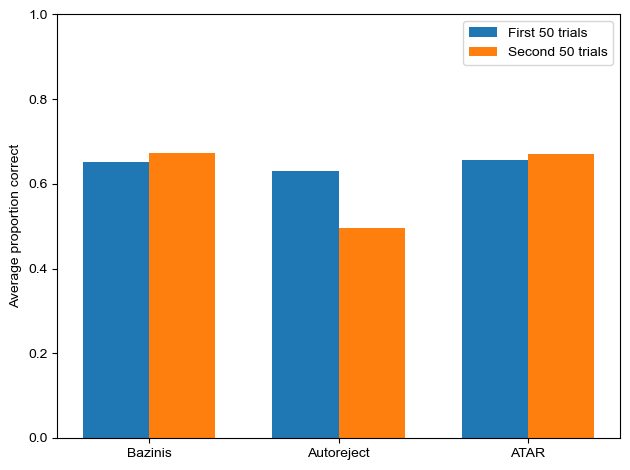

Bazinis: first half = 65.1%, second half = 67.3%
Autoreject: first half = 63.0%, second half = 49.5%
ATAR: first half = 65.7%, second half = 67.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'ATAR'
}

first_half_props = []
second_half_props = []

for src in sources:
    # pull out cross‐val dataframe and keep only TS_LR folds
    df = results[src]['cross']
    df = df[df.pipeline == 'TS_LR']

    # now extract the boolean masks
    masks = df['correct_mask'].tolist()

    # count trues in first 50 / second 50 of each mask
    fh_props = [sum(m[:50]) / 50 for m in masks]
    sh_props = [sum(m[50:]) / 50 for m in masks]

    # average across folds
    first_half_props.append(np.mean(fh_props))
    second_half_props.append(np.mean(sh_props))

# plotting
x = np.arange(len(sources))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, first_half_props, width, label='First 50 trials')
ax.bar(x + width/2, second_half_props, width, label='Second 50 trials')
ax.set_xticks(x)
ax.set_xticklabels([label_map[s] for s in sources])
ax.set_ylabel('Average proportion correct')
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.show()

# print the numbers
for src, fh, sh in zip(sources, first_half_props, second_half_props):
    print(f"{label_map[src]}: first half = {fh*100:.1f}%, second half = {sh*100:.1f}%")


In [786]:
results.keys()

AttributeError: 'list' object has no attribute 'keys'

In [300]:
from scipy.stats import shapiro
import matplotlib as mpl
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})
sns.set_style(style=None)
sns.set_context('notebook', font_scale=1.4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pingouin as pg
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

# ── 1) Load data ──
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.2_OptModelinAtten'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.2_OptModelinAtten': 'Vilnelių'
}

within_frames = []
for src in sources:
    dfw = results[src]['within']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# ── 2) Prepare for stats ──
labels = ['Bazinis', 'Automatinis', 'Vilnelių']
wide = df_within.pivot(index='evaluation', columns='Source', values='mean_val_accuracy').dropna()
pairs = list(itertools.combinations(labels, 2))

# ── 3) Means and differences ──
print("Mean validation accuracy per Source:")
for src in labels:
    print(f"  {src}: {wide[src].mean():.3f}")
    
print("Median validation accuracy per Source:")      # <--- Add this
for src in labels:                                   # <--- and this block
    print(f"  {src}: {wide[src].median():.3f}") 
    
print("\nMean change (difference) for each pair:")
for a, b in pairs:
    diff = (wide[b] - wide[a]).mean()
    print(f"  {b} - {a}: {diff:.3f}")

# ── 4) Friedman test ──
fried_stat, fried_p = friedmanchisquare(*[wide[col] for col in labels])
print(f"\nFriedman test:\n  χ² = {fried_stat:.3f}, p = {fried_p:.3e}")

# ── 5) Wilcoxon post-hoc (pingouin) ──
df_long = df_within.rename(columns={'evaluation': 'Subject', 'Source': 'Method', 'mean_val_accuracy': 'Accuracy'})
posthoc_wilcoxon = pg.pairwise_tests(dv='Accuracy', within='Method', subject='Subject',
                                     data=df_long, padjust='fdr_bh', parametric=False)

print("\nPost-hoc Wilcoxon (FDR corrected):")
print(posthoc_wilcoxon[['A', 'B', 'p-unc', 'p-corr', 'W-val']])

# ── 6) Nemenyi post-hoc (scikit-posthocs) ──
nemenyi_pvals = sp.posthoc_nemenyi_friedman(wide)
print("\nPost-hoc Nemenyi test:")
print(nemenyi_pvals)

# ── 7) Get Wilcoxon p-values for plotting ──
pvals = {}
for _, row in posthoc_wilcoxon.iterrows():
    a, b = row['A'], row['B']
    key = tuple(sorted([a, b]))
    pvals[key] = row['p-corr']

# ── 8) Subject order by baseline ──
subject_order = (
    df_within[df_within['Source'] == 'Bazinis']
      .groupby('evaluation')['mean_val_accuracy']
      .mean()
      .sort_values(ascending=False)
      .index
      .tolist()
)


print("\nShapiro-Wilk normality test per group:")
print(f"{'Group':<12} | {'Shapiro p':<8} | {'Normal?'}")
print("-" * 30)
for group in labels:
    vals = wide[group].values
    stat, p = shapiro(vals)
    is_norm = "Yes" if p > 0.05 else "No"
    print(f"{group:<12} | {p:8.4f} | {is_norm}")


Mean validation accuracy per Source:
  Bazinis: 0.735
  Automatinis: 0.714
  Vilnelių: 0.732
Median validation accuracy per Source:
  Bazinis: 0.710
  Automatinis: 0.698
  Vilnelių: 0.705

Mean change (difference) for each pair:
  Automatinis - Bazinis: -0.021
  Vilnelių - Bazinis: -0.003
  Vilnelių - Automatinis: 0.018

Friedman test:
  χ² = 12.361, p = 2.069e-03

Post-hoc Wilcoxon (FDR corrected):
             A         B     p-unc    p-corr   W-val
0  Automatinis   Bazinis  0.001320  0.003961  1627.0
1  Automatinis  Vilnelių  0.004157  0.006236  1729.0
2      Bazinis  Vilnelių  0.208595  0.208595  1288.5

Post-hoc Nemenyi test:
             Automatinis   Bazinis  Vilnelių
Automatinis     1.000000  0.007223  0.013807
Bazinis         0.007223  1.000000  0.976429
Vilnelių        0.013807  0.976429  1.000000

Shapiro-Wilk normality test per group:
Group        | Shapiro p | Normal?
------------------------------
Bazinis      |   0.0005 | No
Automatinis  |   0.0016 | No
Vilnelių     |   

In [301]:
# Calculate differences vs. Bazinis
auto_vs_base = wide['Automatinis'] - wide['Bazinis']
vil_vs_base = wide['Vilnelių'] - wide['Bazinis']

# Find max gain and max drop for Automatinis vs Bazinis
auto_max_gain_idx = auto_vs_base.idxmax()
auto_max_gain = auto_vs_base.max()
auto_max_drop_idx = auto_vs_base.idxmin()
auto_max_drop = auto_vs_base.min()

print("Automatinis vs Bazinis:")
print(f"  Max gain: Subject {auto_max_gain_idx}, Value: {auto_max_gain:.3f}")
print(f"  Max drop: Subject {auto_max_drop_idx}, Value: {auto_max_drop:.3f}")

# Find max gain and max drop for Vilnelių vs Bazinis
vil_max_gain_idx = vil_vs_base.idxmax()
vil_max_gain = vil_vs_base.max()
vil_max_drop_idx = vil_vs_base.idxmin()
vil_max_drop = vil_vs_base.min()

print("\nVilnelių vs Bazinis:")
print(f"  Max gain: Subject {vil_max_gain_idx}, Value: {vil_max_gain:.3f}")
print(f"  Max drop: Subject {vil_max_drop_idx}, Value: {vil_max_drop:.3f}")

# Optional: see all values
print("\nAll differences for Automatinis - Bazinis:")
print(auto_vs_base)
print("\nAll differences for Vilnelių - Bazinis:")
print(vil_vs_base)


Automatinis vs Bazinis:
  Max gain: Subject 50_2, Value: 0.133
  Max drop: Subject 46_2, Value: -0.233

Vilnelių vs Bazinis:
  Max gain: Subject 51_2, Value: 0.040
  Max drop: Subject 46_2, Value: -0.080

All differences for Automatinis - Bazinis:
evaluation
01_1    0.007368
01_2   -0.050000
02_1   -0.062632
02_2   -0.013684
03_1   -0.070000
          ...   
51_2   -0.088235
52_1   -0.038352
52_2   -0.074444
53_1    0.011579
53_2   -0.050292
Length: 104, dtype: float64

All differences for Vilnelių - Bazinis:
evaluation
01_1    0.00
01_2   -0.02
02_1   -0.01
02_2    0.00
03_1   -0.04
        ... 
51_2    0.04
52_1   -0.02
52_2   -0.02
53_1    0.02
53_2   -0.02
Length: 104, dtype: float64


In [302]:
auto_diff

NameError: name 'auto_diff' is not defined

In [303]:
(diff[high_mask] <= 0)

NameError: name 'high_mask' is not defined

In [304]:
diff

0.01784931310651721

In [305]:
thresh = 0.7
base_acc = wide['Bazinis']

# Calculate differences
auto_diff = wide['Automatinis'] - wide['Bazinis']
vil_diff  = wide['Vilnelių']    - wide['Bazinis']

# ---- Automatinis vs Bazinis ----
diff = auto_diff
label = "Automatinis"
print(f"\n{label} vs Bazinis:")

# High performers (≥ 0.7)
high_mask = base_acc >= thresh
n_high = high_mask.sum()
n_high_drop    = (diff[high_mask] < 0).sum()
n_high_nochng  = (diff[high_mask] == 0).sum()
n_high_gain    = (diff[high_mask] > 0).sum()
print(f"  High performers (≥0.7): {n_high} subjects")
print(f"    Dropped: {n_high_drop} ({n_high_drop/n_high*100:.1f}%)")
print(f"    No change: {n_high_nochng} ({n_high_nochng/n_high*100:.1f}%)")
print(f"    Improved: {n_high_gain} ({n_high_gain/n_high*100:.1f}%)")

# Low performers (< 0.7)
low_mask = base_acc < thresh
n_low = low_mask.sum()
n_low_gain    = (diff[low_mask] > 0).sum()
n_low_nochng  = (diff[low_mask] == 0).sum()
n_low_drop    = (diff[low_mask] < 0).sum()
print(f"  Low performers (<0.7): {n_low} subjects")
print(f"    Improved: {n_low_gain} ({n_low_gain/n_low*100:.1f}%)")
print(f"    No change: {n_low_nochng} ({n_low_nochng/n_low*100:.1f}%)")
print(f"    Dropped: {n_low_drop} ({n_low_drop/n_low*100:.1f}%)")

# ---- Vilnelių vs Bazinis ----
diff = vil_diff
label = "Vilnelių"
print(f"\n{label} vs Bazinis:")

# High performers (≥ 0.7)
high_mask = base_acc >= thresh
n_high = high_mask.sum()|
n_high_drop    = (diff[high_mask] < 0).sum()
n_high_nochng  = (diff[high_mask] == 0).sum()
n_high_gain    = (diff[high_mask] > 0).sum()
print(f"  High performers (≥0.7): {n_high} subjects")
print(f"    Dropped: {n_high_drop} ({n_high_drop/n_high*100:.1f}%)")
print(f"    No change: {n_high_nochng} ({n_high_nochng/n_high*100:.1f}%)")
print(f"    Improved: {n_high_gain} ({n_high_gain/n_high*100:.1f}%)")

# Low performers (< 0.7)
low_mask = base_acc < thresh
n_low = low_mask.sum()
n_low_gain    = (diff[low_mask] > 0).sum()
n_low_nochng  = (diff[low_mask] == 0).sum()
n_low_drop    = (diff[low_mask] < 0).sum()
print(f"  Low performers (<0.7): {n_low} subjects")
print(f"    Improved: {n_low_gain} ({n_low_gain/n_low*100:.1f}%)")
print(f"    No change: {n_low_nochng} ({n_low_nochng/n_low*100:.1f}%)")
print(f"    Dropped: {n_low_drop} ({n_low_drop/n_low*100:.1f}%)")


SyntaxError: invalid syntax (1405334975.py, line 42)

Nustačius 0.7 nerastingumo slenksti ir suskirscius tikslumus i dvi grupe pastebeta, kad automatinis lyginant su baziniu 77.4% laiko klasifikavimo tiksluma pablogino ir tik 18.9% laiko pagerino. bernrai rezultatas labiau buvo sumazinamas nei padidinamas. TUo tarpu grup4je virs 0.7 55.3% pagerino ir 42.6% įrašų pablogino. write something similar about Vilnelių vs Bazinis:
  High performers (>0.7): 53 subjects
    Dropped: 16 (30.2%)
    Improved: 15 (28.3%)
  Low performers (<0.7): 47 subjects
    Improved: 21 (44.7%)
    Dropped: 22 (46.8%) 


Pasekoje duomenų įrašų esančių ant ar virš 0.7 slenkscio valant sumazedavo.

bazinis 
  > 0.7: 53
  < 0.7: 47
  = 0.7: 4
Automatinis:
  > 0.7: 51
  < 0.7: 52
  = 0.7: 1
Vilnelių:
  > 0.7: 52
  < 0.7: 51
  = 0.7: 1

In [306]:
# Threshold

thresh = 0.7
base_acc = wide['Bazinis']

# Calculate differences
auto_diff = wide['Automatinis'] - wide['Bazinis']
vil_diff  = wide['Vilnelių']    - wide['Bazinis']

# ---- Automatinis vs Bazinis ----
diff = auto_diff
label = "Automatinis"
print(f"\n{label} vs Bazinis:")

# High performers (≥ 0.7)
high_mask = base_acc >= thresh
n_high = high_mask.sum()
n_high_drop    = (diff[high_mask] < 0).sum()
n_high_nochng  = (diff[high_mask] == 0).sum()
n_high_gain    = (diff[high_mask] > 0).sum()
print(f"  High performers (≥0.7): {n_high} subjects")
print(f"    Dropped: {n_high_drop} ({n_high_drop/n_high*100:.1f}%)")
print(f"    No change: {n_high_nochng} ({n_high_nochng/n_high*100:.1f}%)")
print(f"    Improved: {n_high_gain} ({n_high_gain/n_high*100:.1f}%)")

# Low performers (< 0.7)
low_mask = base_acc < thresh
n_low = low_mask.sum()
n_low_gain    = (diff[low_mask] > 0).sum()
n_low_nochng  = (diff[low_mask] == 0).sum()
n_low_drop    = (diff[low_mask] < 0).sum()
print(f"  Low performers (<0.7): {n_low} subjects")
print(f"    Improved: {n_low_gain} ({n_low_gain/n_low*100:.1f}%)")
print(f"    No change: {n_low_nochng} ({n_low_nochng/n_low*100:.1f}%)")
print(f"    Dropped: {n_low_drop} ({n_low_drop/n_low*100:.1f}%)")

# ---- Vilnelių vs Bazinis ----
diff = vil_diff
label = "Vilnelių"
print(f"\n{label} vs Bazinis:")

# High performers (≥ 0.7)
high_mask = base_acc >= thresh
n_high = high_mask.sum()
n_high_drop    = (diff[high_mask] < 0).sum()
n_high_nochng  = (diff[high_mask] == 0).sum()
n_high_gain    = (diff[high_mask] > 0).sum()
print(f"  High performers (≥0.7): {n_high} subjects")
print(f"    Dropped: {n_high_drop} ({n_high_drop/n_high*100:.1f}%)")
print(f"    No change: {n_high_nochng} ({n_high_nochng/n_high*100:.1f}%)")
print(f"    Improved: {n_high_gain} ({n_high_gain/n_high*100:.1f}%)")

# Low performers (< 0.7)
low_mask = base_acc < thresh
n_low = low_mask.sum()
n_low_gain    = (diff[low_mask] > 0).sum()
n_low_nochng  = (diff[low_mask] == 0).sum()
n_low_drop    = (diff[low_mask] < 0).sum()
print(f"  Low performers (<0.7): {n_low} subjects")
print(f"    Improved: {n_low_gain} ({n_low_gain/n_low*100:.1f}%)")
print(f"    No change: {n_low_nochng} ({n_low_nochng/n_low*100:.1f}%)")
print(f"    Dropped: {n_low_drop} ({n_low_drop/n_low*100:.1f}%)")


thresh = 0.7

def count_above_below(group, label):
    n_above = (group >= thresh).sum()   # Now includes 0.7
    n_below = (group < thresh).sum()
    print(f"{label}:")
    print(f"  ≥ {thresh}: {n_above}")
    print(f"  < {thresh}: {n_below}")

print("Number of subjects by group (≥0.7 and <0.7):")
for label in ['Bazinis', 'Automatinis', 'Vilnelių']:
    count_above_below(wide[label], label)



Automatinis vs Bazinis:
  High performers (≥0.7): 57 subjects
    Dropped: 44 (77.2%)
    No change: 2 (3.5%)
    Improved: 11 (19.3%)
  Low performers (<0.7): 47 subjects
    Improved: 26 (55.3%)
    No change: 1 (2.1%)
    Dropped: 20 (42.6%)

Vilnelių vs Bazinis:
  High performers (≥0.7): 57 subjects
    Dropped: 19 (33.3%)
    No change: 22 (38.6%)
    Improved: 16 (28.1%)
  Low performers (<0.7): 47 subjects
    Improved: 21 (44.7%)
    No change: 4 (8.5%)
    Dropped: 22 (46.8%)
Number of subjects by group (≥0.7 and <0.7):
Bazinis:
  ≥ 0.7: 57
  < 0.7: 47
Automatinis:
  ≥ 0.7: 52
  < 0.7: 52
Vilnelių:
  ≥ 0.7: 53
  < 0.7: 51


In [307]:
for group in labels:
    vals = wide[group].values
    stat, p = shapiro(vals)
    is_norm = "Yes" if p > 0.05 else "No"
    print(f"{group:<12} | {p:8.4f} | {is_norm}")

Bazinis      |   0.0005 | No
Automatinis  |   0.0016 | No
Vilnelių     |   0.0005 | No


2025-05-26 03:26:14,357 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 03:26:14,360 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 03:26:14,364 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 03:26:14,366 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 03:26:14,

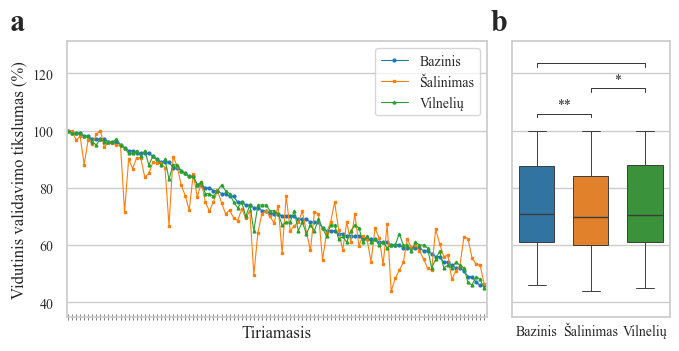

In [427]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# Font settings for bigger text
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})

def format_number(val):
    val = int(round(val * 100))
    if val < 0:
        return f"- {abs(val)}"
    return f"{val}"

# --- 1. Prepare data for plotting ---
df_within_plot = df_within.copy()
nemenyi_pvals_plot = nemenyi_pvals.copy()

# Rename just before plotting
df_within_plot['Source'] = df_within_plot['Source'].replace({'Automatinis': 'Šalinimas'})
nemenyi_pvals_plot = nemenyi_pvals_plot.rename(
    index={'Automatinis': 'Šalinimas'},
    columns={'Automatinis': 'Šalinimas'}
)

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']
markers = ['o', 's', '^']
palette = {
    'Bazinis': '#1f77b4',
    'Šalinimas': '#ff7f0e',
    'Vilnelių': '#2ca02c'
}

pairs = [
    ("Bazinis", "Šalinimas"),
    ("Bazinis", "Vilnelių"),
    ("Šalinimas", "Vilnelių")
]
nemenyi_pval_list = [nemenyi_pvals_plot.loc[a, b] for a, b in pairs]

# --- Consistent figure size and scaling ---
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(7.1, 3.5),
    gridspec_kw={'width_ratios': [4, 1.5]},
    sharey=True
)

# Consistent Y limits for both panels
ax1.set_ylim(0.35, 1.01)
ax2.set_ylim(0.35, 1.01)

# --- 2. Subject lines plot (ax1) ---
for lbl, mk in zip(labels, markers):
    col = palette[lbl]
    ser = (
        df_within_plot[df_within_plot['Source'] == lbl]
          .groupby('evaluation')['mean_val_accuracy']
          .mean()
          .reindex(subject_order)
    )
    ax1.plot(
        subject_order,
        ser.values,
        marker=mk,
        color=col,
        label=lbl,
        lw=.8,         # Make the lines thicker (2 is a good visual match)
        markersize=2
    )

ax1.set_xlabel("Tiriamasis")  # Uses rcParams['axes.labelsize']
ax1.set_ylabel("Vidutinis validavimo tikslumas (%)")
ax1.tick_params(axis='x', labelrotation=90)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for t in ax1.get_xticklabels():
    t.set_ha('right')
ax1.legend(fontsize=10, loc='upper right')
ax1.tick_params(axis='x', labelbottom=False)

# --- 3. Boxplot (ax2), set line widths for box, whisker, etc.
sns.boxplot(
    x='Source', y='mean_val_accuracy',
    data=df_within_plot,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2,
    boxprops=dict(linewidth=.7),
    whiskerprops=dict(linewidth=.7),
    capprops=dict(linewidth=.7),
    medianprops=dict(linewidth=1)
)
ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='x', which='major', length=1, width=2, direction='inout', labelsize=10)
xticks_pos = np.arange(len(labels))
ax2.set_xticks(xticks_pos)
ax2.set_xticklabels(labels, fontsize=10)

# --- 4. Statistical annotation ---
annot = Annotator(
    ax2, pairs=pairs, data=df_within_plot,
    x='Source', y='mean_val_accuracy', order=labels
)
annot.configure(
    test=None,
    text_format='star',
    loc='inside',
    verbose=0,
    fontsize=10,    # annotation stars
    line_width=.7  # thinner bar lines
)
annot.set_pvalues(nemenyi_pval_list)
annot.annotate(line_offset_to_group=0.07)

# --- Hide 'ns' labels manually ---
for child in ax2.get_children():
    if hasattr(child, "get_text") and child.get_text() == "ns":
        child.set_text("")

ax1.grid(axis='x', which='major', visible=False)
ax2.grid(axis='x', which='major', visible=False)
ax1.tick_params(
    axis='x',
    labelbottom=False,
    bottom=True,
    length=4,
    width=0.7,
    direction='inout',
    color='grey'
)

# --- Format y-tick labels on both axes ---
for ax in [ax1, ax2]:
    yticks = ax.get_yticks()
    ax.set_yticklabels([format_number(y) for y in yticks], fontsize=10)
fig.text(.034, 1.02, "a", ha='left', va='top', fontsize=22, fontweight='bold')
fig.text(.71, 1.02, "b", ha='left', va='top', fontsize=22, fontweight='bold')

    
for label in ax2.get_xticklabels():
    label.set_rotation(0)      # smaller angle keeps them closer
    label.set_ha('center')       # right-aligned is usually best for angled labels
    label.set_va('top')         # vertical alignment top brings labels closer to axis
ax2.tick_params(axis='x', pad=5)   # decrease pad (default is 4)

ax1.set_xlim(-0.3, len(subject_order) - 0.3)


plt.tight_layout()
plt.show()

fig.savefig(r'bakalauras/fig11.png',dpi=800, bbox_inches='tight')

2025-05-26 04:29:19,298 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:29:19,298 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:29:19,304 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:29:19,304 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-26 04:29:19,

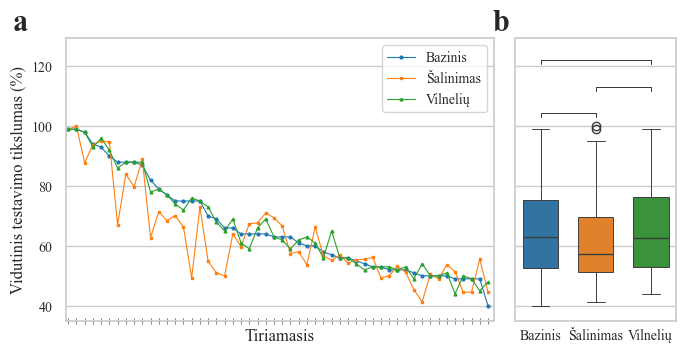

In [601]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannotations.Annotator import Annotator

# Font and style config
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})

def format_number(val):
    val = int(round(val * 100))
    if val < 0:
        return f"- {abs(val)}"
    return f"{val}"

# --- Data prep (REPLACE with your existing df_within, nemenyi_pvals, subject_order) ---
df_within_plot = df_within.copy()
nemenyi_pvals_plot = nemenyi_pvals.copy()

# Replace 'Automatinis' with 'Šalinimas' if present
df_within_plot['Source'] = df_within_plot['Source'].replace({'Automatinis': 'Šalinimas'})
nemenyi_pvals_plot = nemenyi_pvals_plot.rename(index={'Automatinis': 'Šalinimas'}, columns={'Automatinis': 'Šalinimas'})

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']
markers = ['o', 's', '^']
palette = {
    'Bazinis':   '#1f77b4',
    'Šalinimas': '#ff7f0e',
    'Vilnelių':  '#2ca02c'
}
pairs = [
    ("Bazinis", "Šalinimas"),
    ("Bazinis", "Vilnelių"),
    ("Šalinimas", "Vilnelių")
]
nemenyi_pval_list = [nemenyi_pvals_plot.loc[a, b] for a, b in pairs]

# --- Figure size, grid, axis ---
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(7.1, 3.5),
    gridspec_kw={'width_ratios': [4, 1.5]},
    sharey=True
)
ax1.set_ylim(0.35, 1.01)
ax2.set_ylim(0.35, 1.01)

# --- 1. Subject line plot (ax1) ---
for lbl, mk in zip(labels, markers):
    col = palette[lbl]
    ser = (
        df_within_plot[df_within_plot['Source'] == lbl]
          .groupby('evaluation')['test_accuracy']  # or mean_val_accuracy
          .mean()
          .reindex(subject_order)
    )
    ax1.plot(
        subject_order,
        ser.values,
        marker=mk,
        color=col,
        label=lbl,
        lw=0.8,
        markersize=2
    )

ax1.set_xlabel("Tiriamasis")
ax1.set_ylabel("Vidutinis testavimo tikslumas (%)")
ax1.tick_params(axis='x', labelrotation=90, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for t in ax1.get_xticklabels():
    t.set_ha('right')
ax1.legend(fontsize=10, loc='upper right')

# --- THIS ENABLES TICKS, DISABLES LABELS ---
ax1.set_xticks(range(len(subject_order)))
ax1.tick_params(
    axis='x',
    labelbottom=False,   # disables text labels (numbers)
    bottom=True,         # enables ticks
    length=4,
    width=0.7,
    direction='inout',
    color='grey'
)

ax1.grid(axis='x', which='major', visible=False)

# --- 2. Boxplot (ax2) ---
sns.boxplot(
    x='Source', y='test_accuracy',  # or mean_val_accuracy
    data=df_within_plot,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2,
    boxprops=dict(linewidth=.7),
    whiskerprops=dict(linewidth=.7),
    capprops=dict(linewidth=.7),
    medianprops=dict(linewidth=1)
)
ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='x', which='major', length=1, width=2, direction='inout', labelsize=10)
xticks_pos = np.arange(len(labels))
ax2.set_xticks(xticks_pos)
ax2.set_xticklabels(labels, fontsize=10)
ax2.grid(axis='x', which='major', visible=False)

# --- 3. Statistical annotation ---
annot = Annotator(
    ax2, pairs=pairs, data=df_within_plot,
    x='Source', y='test_accuracy', order=labels
)
annot.configure(
    test=None,
    text_format='star',
    loc='inside',
    verbose=0,
    fontsize=10,
    line_width=.7
)
annot.set_pvalues(nemenyi_pval_list)
annot.annotate(line_offset_to_group=0.03)

# Remove "ns" if present
for child in ax2.get_children():
    if hasattr(child, "get_text") and child.get_text() == "ns":
        child.set_text("")

# --- 4. Format y-tick labels as integers (percentages) ---
for ax in [ax1, ax2]:
    yticks = ax.get_yticks()
    ax.set_yticklabels([format_number(y) for y in yticks], fontsize=10)

fig.text(.034, 1.02, "a", ha='left', va='top', fontsize=22, fontweight='bold')
fig.text(.71, 1.02, "b", ha='left', va='top', fontsize=22, fontweight='bold')

for label in ax2.get_xticklabels():
    label.set_rotation(0)
    label.set_ha('center')
    label.set_va('top')
ax2.tick_params(axis='x', pad=5)

ax1.set_xlim(-0.3, len(subject_order) - 0.3)
# No need for ax1.tick_params(axis='x', labelbottom=True) again!

plt.tight_layout()
plt.show()
fig.savefig(r'bakalauras/fig14.png', dpi=800, bbox_inches='tight')


In [420]:
print("Palette:", palette)
print("Labels:", labels)


Palette: {'Bazinis': '#1f77b4', 'Šalinimas': '#ff7f0e', 'Vilnelių': '#2ca02c'}
Labels: ['Bazinis', 'Šalinimas', 'Vilnelių']


In [296]:
plot_group_counts = pd.read_csv('plot_data_group_counts.csv')
plot_data_df_all = pd.read_csv('plot_data_df_all.csv')

plot_data_df_long = pd.read_csv('plot_data_df_long.csv')


In [81]:
plot_group_counts

group  count  percentage
0  illiterate (<0.7)     54          52
1  average (0.7–0.8)     22          21
2     good (0.8–0.9)      7           7
3        best (>0.9)     21          20

In [82]:
plot_data_df_long

Group subject              Metric     Power   Hand Channel
0    illiterate (<0.7)  s04.01   mean_left_C3_0_4s -0.322417   left      C3
1    illiterate (<0.7)  s04.02   mean_left_C3_0_4s -0.270880   left      C3
2    illiterate (<0.7)  s06.01   mean_left_C3_0_4s -0.022256   left      C3
3    illiterate (<0.7)  s07.01   mean_left_C3_0_4s -0.057777   left      C3
4    illiterate (<0.7)  s08.01   mean_left_C3_0_4s -0.104213   left      C3
..                 ...     ...                 ...       ...    ...     ...
619        best (>0.9)  s37.02  mean_right_Cz_0_4s -0.288954  right      Cz
620        best (>0.9)  s44.01  mean_right_Cz_0_4s -0.396260  right      Cz
621        best (>0.9)  s44.02  mean_right_Cz_0_4s -0.228293  right      Cz
622        best (>0.9)  s45.01  mean_right_Cz_0_4s -0.257930  right      Cz
623        best (>0.9)  s45.02  mean_right_Cz_0_4s -0.334031  right      Cz

[624 rows x 6 columns]

In [84]:
plot_data_df_all

subject  mean_left_C3_0_4s  std_left_C3_0_4s  mean_right_C3_0_4s  \
0    s04.01          -0.322417          0.148276           -0.253060   
1    s04.02          -0.270880          0.293619           -0.232628   
2    s06.01          -0.022256          0.178507           -0.214652   
3    s07.01          -0.057777          0.190490           -0.088710   
4    s08.01          -0.104213          0.123679           -0.019557   
..      ...                ...               ...                 ...   
99   s37.02          -0.219925          0.168345           -0.328544   
100  s44.01          -0.448635          0.144259           -0.478290   
101  s44.02          -0.272005          0.179430           -0.341079   
102  s45.01          -0.316031          0.104723           -0.309648   
103  s45.02          -0.222453          0.135345           -0.351457   

     std_right_C3_0_4s  mean_left_C4_0_4s  std_left_C4_0_4s  \
0             0.115171          -0.314680          0.162444   
1             0.244856          -0.241960          0.347397   
2             0.086723           0.026500          0.161982   
3             0.208895          -0.043920          0.190187   
4             0.279320          -0.116424          0.152069   
..                 ...                ...               ...   
99            0.137815          -0.352853          0.117806   
100           0.183487          -0.465552          0.207087   
101           0.235237          -0.325810          0.250344   
102           0.151996          -0.299468          0.189501   
103           0.107825          -0.333324          0.147715   

     mean_right_C4_0_4s  std_right_C4_0_4s  mean_left_Cz_0_4s  \
0             -0.160682           0.222907          -0.313433   
1             -0.248517           0.226847          -0.266151   
2             -0.157401           0.097098           0.039564   
3             -0.036393           0.226495          -0.168789   
4             -0.100054           0.172328          -0.135270   
..                  ...                ...                ...   
99            -0.155976           0.168728          -0.199723   
100           -0.413872           0.150236          -0.393860   
101           -0.210538           0.167686          -0.251472   
102           -0.199615           0.160697          -0.306872   
103           -0.217905           0.189248          -0.333005   

     std_left_Cz_0_4s  mean_right_Cz_0_4s  std_right_Cz_0_4s  \
0            0.153161           -0.293233           0.119589   
1            0.328654           -0.274567           0.230637   
2            0.312638           -0.152012           0.117909   
3            0.194536           -0.177496           0.207492   
4            0.130212           -0.102596           0.190406   
..                ...                 ...                ...   
99           0.162809           -0.288954           0.113363   
100          0.124694           -0.396260           0.120750   
101          0.194643           -0.228293           0.176377   
102          0.152617           -0.257930           0.153893   
103          0.116906           -0.334031           0.120201   

                 Group  
0    illiterate (<0.7)  
1    illiterate (<0.7)  
2    illiterate (<0.7)  
3    illiterate (<0.7)  
4    illiterate (<0.7)  
..                 ...  
99         best (>0.9)  
100        best (>0.9)  
101        best (>0.9)  
102        best (>0.9)  
103        best (>0.9)  

[104 rows x 14 columns]

In [87]:
# Filter only the columns that start with 'mean_' or 'std_'
mean_std_cols = [c for c in plot_data_df_all.columns if c.startswith('mean_') or c.startswith('std_')]

# Calculate mean, median, std for each group, for each variable
summary_by_group = (
    plot_data_df_all
    .groupby('Group')[mean_std_cols]
    .agg(['mean', 'median', 'std'])
    .round(3) # optional: round for cleaner output
)

summary_by_group

mean_left_C3_0_4s               std_left_C3_0_4s         \
                               mean median    std             mean median   
Group                                                                       
average (0.7–0.8)             0.227 -0.144  1.750            0.636  0.159   
best (>0.9)                   0.035 -0.249  1.275            0.489  0.168   
good (0.8–0.9)               -0.233 -0.185  0.107            0.139  0.133   
illiterate (<0.7)            -0.113 -0.111  0.200            0.197  0.151   

                         mean_right_C3_0_4s               std_right_C3_0_4s  \
                     std               mean median    std              mean   
Group                                                                         
average (0.7–0.8)  2.183             -0.176 -0.205  0.217             0.204   
best (>0.9)        1.481             -0.323 -0.341  0.126             0.189   
good (0.8–0.9)     0.033             -0.285 -0.265  0.128             0.140   
illiterate (<0.7)  0.137             -0.120 -0.131  0.201             0.221   

                   ... mean_left_Cz_0_4s std_left_Cz_0_4s                \
                   ...               std             mean median    std   
Group              ...                                                    
average (0.7–0.8)  ...             0.327            0.251  0.155  0.331   
best (>0.9)        ...             0.362            0.253  0.156  0.458   
good (0.8–0.9)     ...             0.110            0.143  0.137  0.029   
illiterate (<0.7)  ...             0.152            0.189  0.153  0.103   

                  mean_right_Cz_0_4s               std_right_Cz_0_4s         \
                                mean median    std              mean median   
Group                                                                         
average (0.7–0.8)             -0.124 -0.152  0.210             0.200  0.166   
best (>0.9)                   -0.220 -0.269  0.153             0.164  0.144   
good (0.8–0.9)                -0.195 -0.272  0.138             0.135  0.131   
illiterate (<0.7)             -0.127 -0.132  0.143             0.190  0.165   

                          
                     std  
Group                     
average (0.7–0.8)  0.141  
best (>0.9)        0.108  
good (0.8–0.9)     0.024  
illiterate (<0.7)  0.086  

[4 rows x 36 columns]

In [297]:
import pandas as pd
from scipy.stats import shapiro

# 1) Load & melt (as before)
df_all = pd.read_csv('combined_stats_valymo.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long = df_all.melt(
    id_vars=['subject','Run'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
run_map = {'base':'Bazinis','autoreject':'Automatinis','atar':'Vilnelių'}
df_long['Group']   = df_long['Run'].map(run_map)
df_long['Hand']    = df_long['Metric'].str.contains('left').map({True:'Kairė ranka', False:'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

# 2) Define orders
group_order   = ['Bazinis','Automatinis','Vilnelių']
channel_order = ['C3','Cz','C4']

print("Channel | Group         | Shapiro p")
print("------------------------------------")
for channel in channel_order:
    sub = df_long[df_long['Channel'] == channel]
    for group in group_order:
        grp = sub[sub['Group'] == group]
        L = grp[grp['Hand']=='Kairė ranka']['Power']
        R = grp[grp['Hand']=='Dešinė ranka']['Power']
        D = L.values - R.values

        stat_n, p_n = shapiro(D, nan_policy='omit')
        print(f"{channel:7} | {group:12} | {p_n:.2e}")


Channel | Group         | Shapiro p
------------------------------------
C3      | Bazinis      | 2.54e-21
C3      | Automatinis  | 4.33e-21
C3      | Vilnelių     | 1.12e-20
Cz      | Bazinis      | 4.29e-18
Cz      | Automatinis  | 9.44e-19
Cz      | Vilnelių     | 2.02e-17
C4      | Bazinis      | 1.48e-16
C4      | Automatinis  | 8.36e-16
C4      | Vilnelių     | 5.07e-07


C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\270282781.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\270282781.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\270282781.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\270282781.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a futur

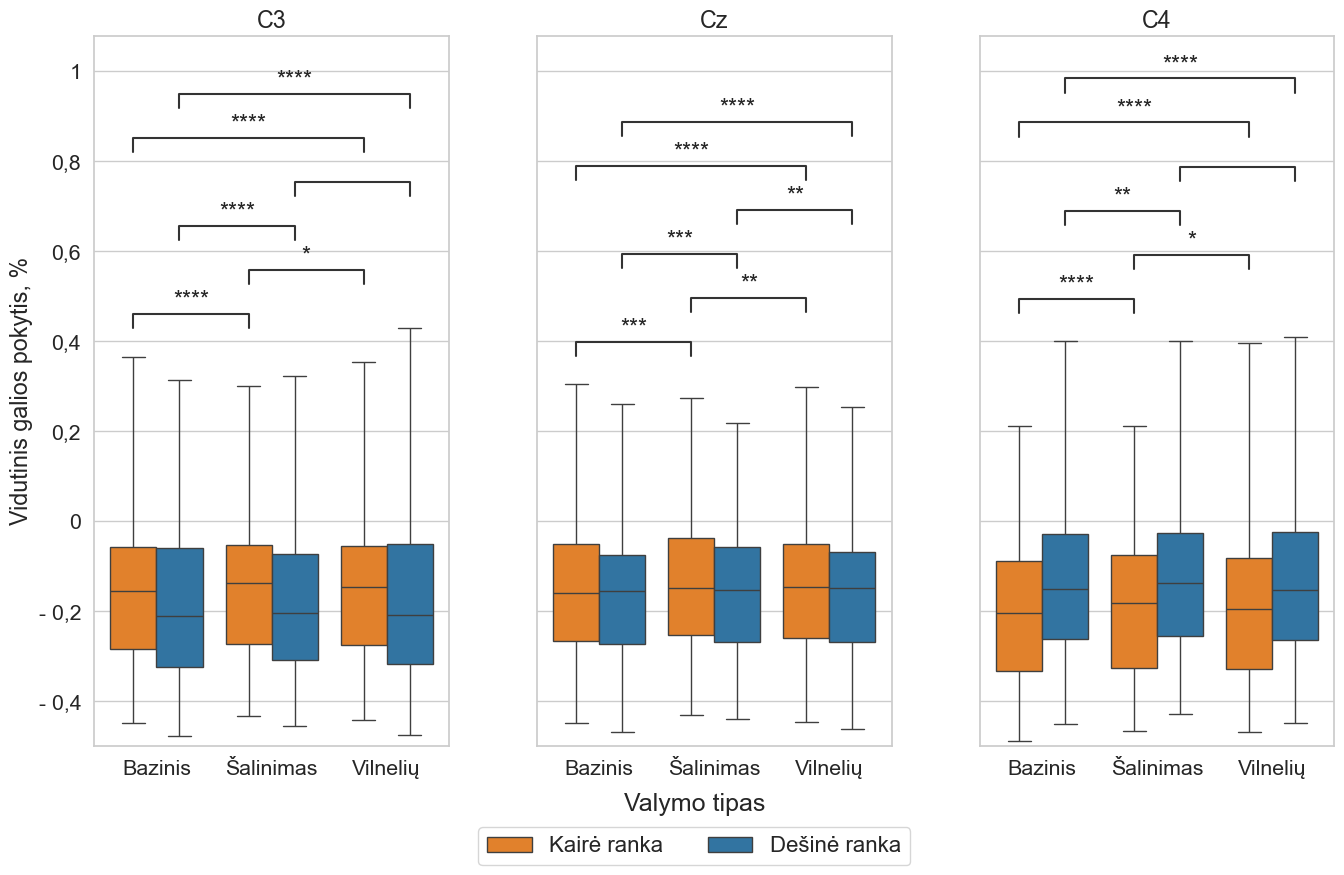

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scikit_posthocs as sp
import numpy as np
import re

# Data loading and prep
df_all = pd.read_csv('combined_stats_valymo.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long = df_all.melt(
    id_vars=['subject','Run'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
run_map = {'base':'Bazinis','autoreject':'Šalinimas','atar':'Vilnelių'}
df_long['Group'] = df_long['Run'].map(run_map)
df_long['Hand']    = df_long['Metric'].str.contains('left').map({True:'Kairė ranka', False:'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]
group_order   = ['Bazinis','Šalinimas','Vilnelių']
channel_order = ['C3','Cz','C4']
hand_order    = ['Kairė ranka','Dešinė ranka']
df_long['Group']   = pd.Categorical(df_long['Group'],   categories=group_order,   ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand']    = pd.Categorical(df_long['Hand'],    categories=hand_order,    ordered=True)

palette = {'Kairė ranka':'#ff7f0e','Dešinė ranka':'#1f77b4'}

# Compute custom p-values for all channel/hand pairs
pvalues_dict = {}
for channel in channel_order:
    sub_ch = df_long[df_long['Channel']==channel]
    for hand in hand_order:
        sub = sub_ch[sub_ch['Hand']==hand]
        pivot = sub.pivot_table(index='subject', columns='Group', values='Power').dropna()
        if pivot.shape[0] < 2:
            pvals = [float('nan')] * 3
        else:
            nemenyi = sp.posthoc_nemenyi_friedman(pivot.values)
            nemenyi.index = nemenyi.columns = group_order
            pvals = [
                nemenyi.loc['Bazinis','Šalinimas'],
                nemenyi.loc['Bazinis','Vilnelių'],
                nemenyi.loc['Šalinimas','Vilnelių']
            ]
        pairs = [
            (('Bazinis', hand), ('Šalinimas', hand)),
            (('Bazinis', hand), ('Vilnelių', hand)),
            (('Šalinimas', hand), ('Vilnelių', hand))
        ]
        for pair, pv in zip(pairs, pvals):
            pvalues_dict[(channel, pair[0], pair[1])] = pv

mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)

fig, axs = plt.subplots(1, 3, figsize=(16, 10), sharey=True)   # taller plot

for i, channel in enumerate(channel_order):
    ax = axs[i]
    sub = df_long[df_long['Channel'] == channel]
    b = sns.boxplot(
        data=sub, x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
        palette=palette, ax=ax, whis=2, showfliers=False
    )
    ax.set_title(channel)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Vidutinis galios pokytis, %')
    else:
        ax.set_ylabel('')
    # Make y-limits wider to avoid cropping
    ax.set_ylim(-0.5, 0.55)

    comparisons = [
        (('Bazinis', 'Kairė ranka'), ('Šalinimas', 'Kairė ranka')),
        (('Bazinis', 'Kairė ranka'), ('Vilnelių', 'Kairė ranka')),
        (('Šalinimas', 'Kairė ranka'), ('Vilnelių', 'Kairė ranka')),
        (('Bazinis', 'Dešinė ranka'), ('Šalinimas', 'Dešinė ranka')),
        (('Bazinis', 'Dešinė ranka'), ('Vilnelių', 'Dešinė ranka')),
        (('Šalinimas', 'Dešinė ranka'), ('Vilnelių', 'Dešinė ranka')),
    ]
    custom_pvals = [pvalues_dict[(channel, c[0], c[1])] for c in comparisons]

    annot = Annotator(
        ax, pairs=comparisons, data=sub,
        x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
    )
    annot.configure(
        test=None,
        text_format='star', loc='inside', verbose=0,
        line_height=0.03,
    )
    annot.set_pvalues_and_annotate(custom_pvals)
    # Remove "ns"
    for txt in ax.texts:
        if txt.get_text() == "ns":
            txt.set_text("")

    # Remove axis legends (will use figure legend)
    ax.get_legend().remove()

# --- Helper to format numbers with comma, drop trailing zeros ---
def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

# Apply formatting to all axes
for ax in axs:
    yticks = ax.get_yticks()
    ax.set_yticklabels([format_number(y) for y in yticks])
    # Format x-axis (group labels, if they contain numbers like betas)
    xlabels = [label.get_text().replace('.', ',') for label in ax.get_xticklabels()]
    xlabels = [re.sub(r',00$', '', lbl) for lbl in xlabels]
    xlabels = [re.sub(r',0$', '', lbl) for lbl in xlabels]
    xlabels = [re.sub(r',$', '', lbl) for lbl in xlabels]
    ax.set_xticklabels(xlabels)

# Add suptitle (above plots), not xlabel at the bottom
fig.supxlabel("Valymo tipas", y=0.10, fontsize=18)

# Create a custom legend in the center bottom
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='', loc='lower center', ncol=2, fontsize=16, bbox_to_anchor=(0.5, 0.04))

plt.subplots_adjust(wspace=0.25, bottom=0.17)  # more space for the legend
plt.show()


In [31]:
# Compute medians and means by Channel, Group, and Hand
agg_stats = (
    df_long
    .groupby(['Channel', 'Group', 'Hand'])
    .agg(
        Median=('Power', 'median'),
        Mean=('Power', 'mean'),
        N=('Power', 'count')
    )
    .reset_index()
)

# If you want to see the table
print(agg_stats)

# Optionally: Format numbers for pretty output
agg_stats['Median_fmt'] = agg_stats['Median'].apply(format_number)
agg_stats['Mean_fmt'] = agg_stats['Mean'].apply(format_number)


   Channel      Group          Hand    Median      Mean    N
0       C3    Bazinis   Kairė ranka -0.155036 -0.019316  104
1       C3    Bazinis  Dešinė ranka -0.210538 -0.184017  104
2       C3  Šalinimas   Kairė ranka -0.138373 -0.050350  104
3       C3  Šalinimas  Dešinė ranka -0.204214 -0.184768  104
4       C3   Vilnelių   Kairė ranka -0.145979 -0.071691  104
5       C3   Vilnelių  Dešinė ranka -0.209336 -0.184101  104
6       Cz    Bazinis   Kairė ranka -0.160159 -0.123499  104
7       Cz    Bazinis  Dešinė ranka -0.154689 -0.149978  104
8       Cz  Šalinimas   Kairė ranka -0.147362 -0.114009  104
9       Cz  Šalinimas  Dešinė ranka -0.153039 -0.144567  104
10      Cz   Vilnelių   Kairė ranka -0.146852 -0.119220  104
11      Cz   Vilnelių  Dešinė ranka -0.147464 -0.143054  104
12      C4    Bazinis   Kairė ranka -0.203310 -0.143101  104
13      C4    Bazinis  Dešinė ranka -0.150655 -0.087102  104
14      C4  Šalinimas   Kairė ranka -0.182031 -0.150780  104
15      C4  Šalinimas  D

C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\3324163479.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [176]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

group_order = ['Bazinis', 'Šalinimas', 'Vilnelių']
summary = []

for channel in df_long['Channel'].unique():
    for hand in df_long['Hand'].unique():
        sub = df_long[(df_long['Channel'] == channel) & (df_long['Hand'] == hand)]
        wide = sub.pivot_table(index='subject', columns='Group', values='Power')
        wide = wide[group_order].dropna()

        # Means & Medians
        mean_B = wide['Bazinis'].mean()
        mean_A = wide['Šalinimas'].mean()
        mean_V = wide['Vilnelių'].mean()
        med_B = wide['Bazinis'].median()
        med_A = wide['Šalinimas'].median()
        med_V = wide['Vilnelių'].median()

        # Means of differences
        diff_B_A = (wide['Bazinis'] - wide['Šalinimas']).mean()
        diff_B_V = (wide['Bazinis'] - wide['Vilnelių']).mean()
        diff_A_V = (wide['Šalinimas'] - wide['Vilnelių']).mean()

        # Friedman
        stat, p = friedmanchisquare(wide['Bazinis'], wide['Šalinimas'], wide['Vilnelių'])

        # Nemenyi
        nemenyi = sp.posthoc_nemenyi_friedman(wide.values)
        nemenyi_df = pd.DataFrame(nemenyi.values, columns=group_order, index=group_order)

        # Flatten Nemenyi p-vals (upper triangle, unique pairs)
        pval_B_A = nemenyi_df.loc['Bazinis', 'Šalinimas']
        pval_B_V = nemenyi_df.loc['Bazinis', 'Vilnelių']
        pval_A_V = nemenyi_df.loc['Šalinimas', 'Vilnelių']

        # Append to summary
        summary.append({
            'Channel': channel,
            'Hand': hand,
            'Mean_Bazinis': mean_B,
            'Mean_Šalinimas': mean_A,
            'Mean_Vilnelių': mean_V,
            'Median_Bazinis': med_B,
            'Median_Šalinimas': med_A,
            'Median_Vilnelių': med_V,
            'Diff_Bazinis_Šalinimas': diff_B_A,
            'Diff_Bazinis_Vilnelių': diff_B_V,
            'Diff_Šalinimas_Vilnelių': diff_A_V,
            'Friedman_stat': stat,
            'Friedman_p': p,
            'Nemenyi_Bazinis_Šalinimas': pval_B_A,
            'Nemenyi_Bazinis_Vilnelių': pval_B_V,
            'Nemenyi_Šalinimas_Vilnelių': pval_A_V,
        })

# Create summary DataFrame
summary_df = pd.DataFrame(summary)

# Display or export summary
summary_df


C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\301884800.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\301884800.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\301884800.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_1888\301884800.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future ve

Channel          Hand  Mean_Bazinis  Mean_Šalinimas  Mean_Vilnelių  \
0      C3   Kairė ranka     -0.019316       -0.050350      -0.071691   
1      C3  Dešinė ranka     -0.184017       -0.184768      -0.184101   
2      C4   Kairė ranka     -0.143101       -0.150780      -0.156526   
3      C4  Dešinė ranka     -0.087102       -0.098342      -0.112639   
4      Cz   Kairė ranka     -0.123499       -0.114009      -0.119220   
5      Cz  Dešinė ranka     -0.149978       -0.144567      -0.143054   

   Median_Bazinis  Median_Šalinimas  Median_Vilnelių  Diff_Bazinis_Šalinimas  \
0       -0.155036         -0.138373        -0.145979                0.031035   
1       -0.210538         -0.204214        -0.209336                0.000752   
2       -0.203310         -0.182031        -0.194357                0.007679   
3       -0.150655         -0.136449        -0.152985                0.011241   
4       -0.160159         -0.147362        -0.146852               -0.009491   
5       -0.154689         -0.153039        -0.147464               -0.005411   

   Diff_Bazinis_Vilnelių  Diff_Šalinimas_Vilnelių  Friedman_stat  \
0               0.052375                 0.021340      49.519231   
1               0.000085                -0.000667      36.750000   
2               0.013425                 0.005745      45.230769   
3               0.025537                 0.014296      29.480769   
4              -0.004280                 0.005211      50.076923   
5              -0.006925                -0.001514      54.076923   

     Friedman_p  Nemenyi_Bazinis_Šalinimas  Nemenyi_Bazinis_Vilnelių  \
0  1.766183e-11                   0.000020              1.229405e-11   
1  1.046740e-08                   0.000037              1.719054e-08   
2  1.507521e-10                   0.000094              8.417578e-11   
3  3.965814e-07                   0.005139              1.905953e-07   
4  1.336393e-11                   0.000531              4.567235e-12   
5  1.808612e-12                   0.000304              5.955236e-13   

   Nemenyi_Šalinimas_Vilnelių  
0                    0.040371  
1                    0.312289  
2                    0.033588  
3                    0.057456  
4                    0.002517  
5                    0.001527

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2434143401.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2434143401.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2434143401.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2434143401.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a futur

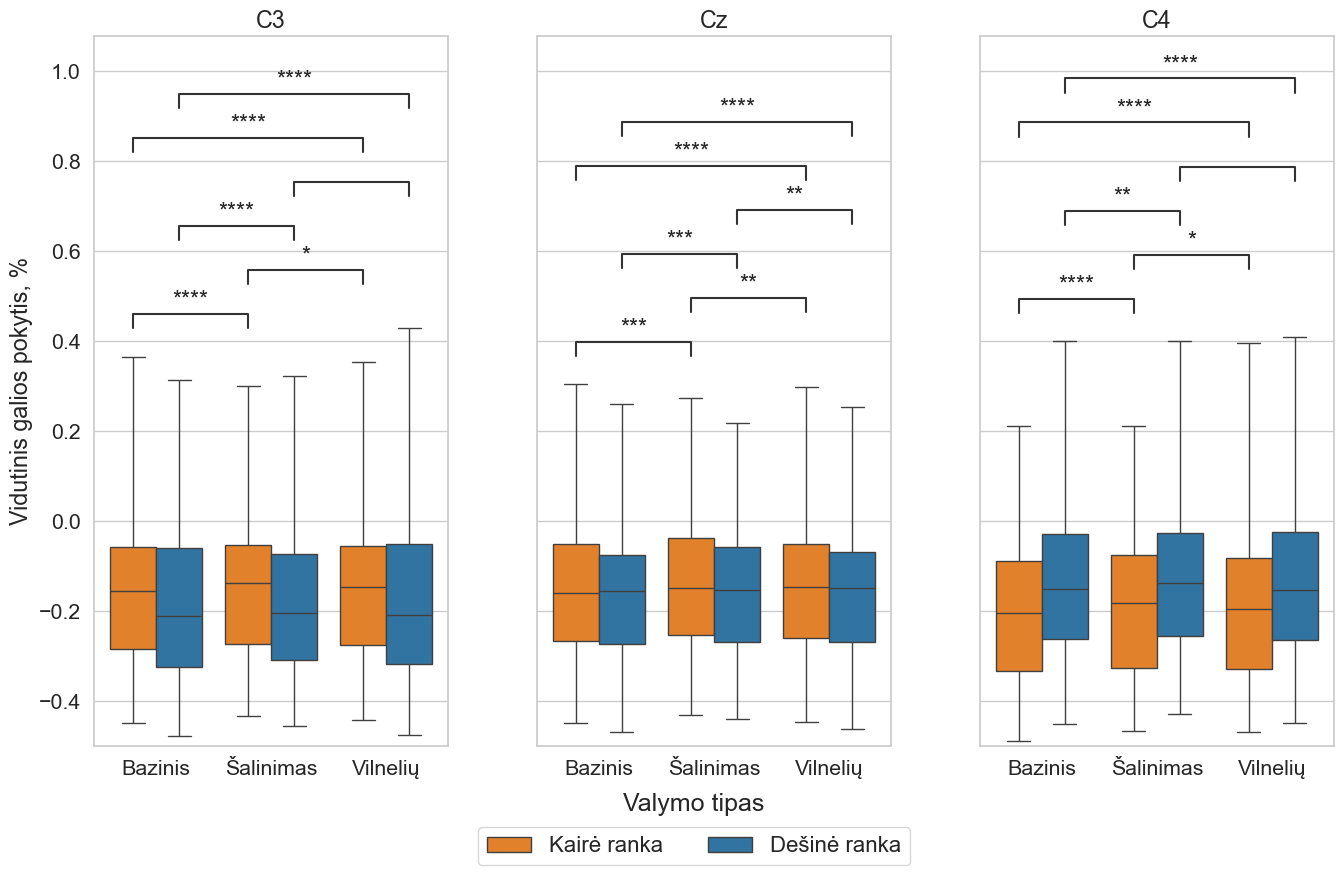

In [548]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scikit_posthocs as sp
import numpy as np

# Data loading and prep
df_all = pd.read_csv('combined_stats_valymo.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long = df_all.melt(
    id_vars=['subject','Run'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
run_map = {'base':'Bazinis','autoreject':'Šalinimas','atar':'Vilnelių'}
df_long['Group'] = df_long['Run'].map(run_map)
df_long['Hand']    = df_long['Metric'].str.contains('left').map({True:'Kairė ranka', False:'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]
group_order   = ['Bazinis','Šalinimas','Vilnelių']
channel_order = ['C3','Cz','C4']
hand_order    = ['Kairė ranka','Dešinė ranka']
df_long['Group']   = pd.Categorical(df_long['Group'],   categories=group_order,   ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand']    = pd.Categorical(df_long['Hand'],    categories=hand_order,    ordered=True)

palette = {'Kairė ranka':'#ff7f0e','Dešinė ranka':'#1f77b4'}

# Compute custom p-values for all channel/hand pairs
pvalues_dict = {}
for channel in channel_order:
    sub_ch = df_long[df_long['Channel']==channel]
    for hand in hand_order:
        sub = sub_ch[sub_ch['Hand']==hand]
        pivot = sub.pivot_table(index='subject', columns='Group', values='Power').dropna()
        if pivot.shape[0] < 2:
            pvals = [float('nan')] * 3
        else:
            nemenyi = sp.posthoc_nemenyi_friedman(pivot.values)
            nemenyi.index = nemenyi.columns = group_order
            pvals = [
                nemenyi.loc['Bazinis','Šalinimas'],
                nemenyi.loc['Bazinis','Vilnelių'],
                nemenyi.loc['Šalinimas','Vilnelių']
            ]
        pairs = [
            (('Bazinis', hand), ('Šalinimas', hand)),
            (('Bazinis', hand), ('Vilnelių', hand)),
            (('Šalinimas', hand), ('Vilnelių', hand))
        ]
        for pair, pv in zip(pairs, pvals):
            pvalues_dict[(channel, pair[0], pair[1])] = pv

mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)

fig, axs = plt.subplots(1, 3, figsize=(16, 10), sharey=True)   # taller plot

for i, channel in enumerate(channel_order):
    ax = axs[i]
    sub = df_long[df_long['Channel'] == channel]
    b = sns.boxplot(
        data=sub, x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
        palette=palette, ax=ax, whis=2, showfliers=False
    )
    ax.set_title(channel)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Vidutinis galios pokytis, %')
    else:
        ax.set_ylabel('')
    # Make y-limits wider to avoid cropping
    ax.set_ylim(-0.5, 0.55)

    comparisons = [
        (('Bazinis', 'Kairė ranka'), ('Šalinimas', 'Kairė ranka')),
        (('Bazinis', 'Kairė ranka'), ('Vilnelių', 'Kairė ranka')),
        (('Šalinimas', 'Kairė ranka'), ('Vilnelių', 'Kairė ranka')),
        (('Bazinis', 'Dešinė ranka'), ('Šalinimas', 'Dešinė ranka')),
        (('Bazinis', 'Dešinė ranka'), ('Vilnelių', 'Dešinė ranka')),
        (('Šalinimas', 'Dešinė ranka'), ('Vilnelių', 'Dešinė ranka')),
    ]
    custom_pvals = [pvalues_dict[(channel, c[0], c[1])] for c in comparisons]

    annot = Annotator(
        ax, pairs=comparisons, data=sub,
        x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
    )
    annot.configure(
        test=None,
        text_format='star', loc='inside', verbose=0,
        line_height=0.03,
    )
    annot.set_pvalues_and_annotate(custom_pvals)
    # Remove "ns"
    for txt in ax.texts:
        if txt.get_text() == "ns":
            txt.set_text("")

    # Remove axis legends (will use figure legend)
    ax.get_legend().remove()

# Add suptitle (above plots), not xlabel at the bottom
fig.supxlabel("Valymo tipas", y=0.10, fontsize=18)

# Create a custom legend in the center bottom
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='', loc='lower center', ncol=2, fontsize=16, bbox_to_anchor=(0.5, 0.04))

plt.subplots_adjust(wspace=0.25, bottom=0.17)  # more space for the legend
plt.show()

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2170547073.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2170547073.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2170547073.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2170547073.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a futur

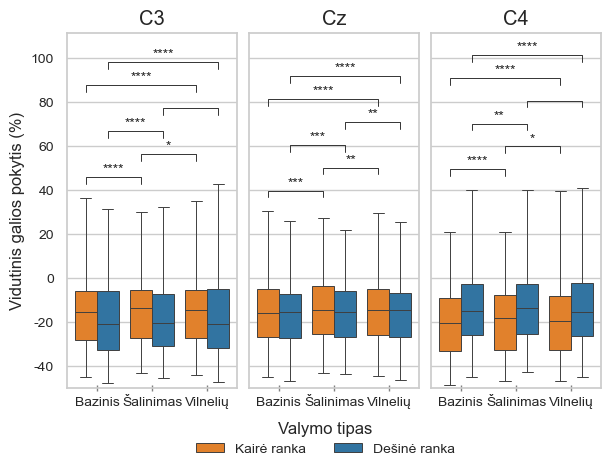

In [574]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scikit_posthocs as sp
import numpy as np
import matplotlib.ticker as mticker

# --- Font and style setup to match your second code ---
mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# --- Data loading and prep ---
df_all = pd.read_csv('combined_stats_valymo.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]
df_long = df_all.melt(
    id_vars=['subject', 'Run'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
run_map = {'base': 'Bazinis', 'autoreject': 'Šalinimas', 'atar': 'Vilnelių'}
df_long['Group'] = df_long['Run'].map(run_map)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]
group_order = ['Bazinis', 'Šalinimas', 'Vilnelių']
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']
df_long['Group'] = pd.Categorical(df_long['Group'], categories=group_order, ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand'] = pd.Categorical(df_long['Hand'], categories=hand_order, ordered=True)
palette = {'Kairė ranka': '#ff7f0e', 'Dešinė ranka': '#1f77b4'}

# --- Compute custom p-values for all channel/hand pairs (Nemenyi) ---
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

pvalues_dict = {}
for channel in channel_order:
    sub_ch = df_long[df_long['Channel'] == channel]
    for hand in hand_order:
        sub = sub_ch[sub_ch['Hand'] == hand]
        pivot = sub.pivot_table(index='subject', columns='Group', values='Power').dropna()
        if pivot.shape[0] < 2:
            pvals = [float('nan')] * 3
        else:
            nemenyi = sp.posthoc_nemenyi_friedman(pivot.values)
            nemenyi.index = nemenyi.columns = group_order
            pvals = [
                nemenyi.loc['Bazinis', 'Šalinimas'],
                nemenyi.loc['Bazinis', 'Vilnelių'],
                nemenyi.loc['Šalinimas', 'Vilnelių']
            ]
        pairs = [
            (('Bazinis', hand), ('Šalinimas', hand)),
            (('Bazinis', hand), ('Vilnelių', hand)),
            (('Šalinimas', hand), ('Vilnelių', hand))
        ]
        for pair, pv in zip(pairs, pvals):
            pvalues_dict[(channel, pair[0], pair[1])] = pv

# --- Custom y-axis formatter: percent without decimals, with comma ---
def custom_comma_formatter(x, _):
    return f"{int(round(x * 100))}"

# --- Plot setup: size, layout, axis ---
fig, axs = plt.subplots(1, 3, figsize=(6.89, 5), sharey=True)

for i, channel in enumerate(channel_order):
    ax = axs[i]
    sub = df_long[df_long['Channel'] == channel]
    b = sns.boxplot(
        data=sub, x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
        palette=palette, ax=ax, whis=2, showfliers=False, linewidth=0.7
    )
    ax.set_title(channel)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Vidutinis galios pokytis (%)', fontsize=12)
    else:
        ax.set_ylabel('')
    ax.set_ylim(-0.5, 0.55)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(custom_comma_formatter))
    for label in ax.get_yticklabels():
        label.set_fontsize(10)
        label.set_fontweight('normal')
    comparisons = [
        (('Bazinis', 'Kairė ranka'), ('Šalinimas', 'Kairė ranka')),
        (('Bazinis', 'Kairė ranka'), ('Vilnelių', 'Kairė ranka')),
        (('Šalinimas', 'Kairė ranka'), ('Vilnelių', 'Kairė ranka')),
        (('Bazinis', 'Dešinė ranka'), ('Šalinimas', 'Dešinė ranka')),
        (('Bazinis', 'Dešinė ranka'), ('Vilnelių', 'Dešinė ranka')),
        (('Šalinimas', 'Dešinė ranka'), ('Vilnelių', 'Dešinė ranka')),
    ]
    custom_pvals = [pvalues_dict[(channel, c[0], c[1])] for c in comparisons]
    annot = Annotator(
        ax, pairs=comparisons, data=sub,
        x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
    )
    annot.configure(
        test=None,
        text_format='star', loc='inside', verbose=0,
        line_height=0.03,
        line_width=0.7,
        fontsize=10,
    )
    annot.set_pvalues_and_annotate(custom_pvals)
    for txt in ax.texts:
        txt.set_fontsize(10)
        txt.set_fontweight('normal')
        if txt.get_text() == "ns":
            txt.set_text("")
        txt.set_text(txt.get_text().replace('.', ','))  # comma for decimals if any
    ax.get_legend().remove()
    # X-tick tweaks
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
        label.set_fontweight('normal')
        label.set_rotation(0)
    ax.xaxis.set_tick_params(length=5, width=1, direction='inout', bottom=True, top=False, color='grey')

fig.supxlabel("Valymo tipas", y=0.073, fontsize=12)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title='',
    loc='lower center',
    ncol=2,
    fontsize=10,
    frameon=False,
    bbox_to_anchor=(0.5, 0.01)
)

# fig.text(0.04, 0.95, "a", ha='left', va='top', fontsize=22, fontweight='bold')
plt.subplots_adjust(wspace=0.07, bottom=0.17)
plt.show()
fig.savefig('bakalauras/fig13.png', dpi=800, bbox_inches='tight')


c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.

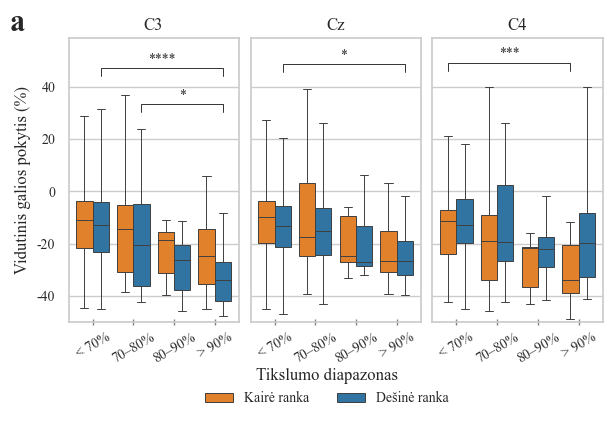

In [552]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scikit_posthocs as sp
import numpy as np
from scipy.stats import kruskal
from itertools import combinations
import matplotlib.ticker as mticker

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})

# --- Data prep ---
df_all = pd.read_csv('plot_data_df_all.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

df_long['Group'] = pd.Categorical(df_long['Group'], categories=group_order, ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand'] = pd.Categorical(df_long['Hand'], categories=hand_order, ordered=True)

palette = {'Kairė ranka': '#ff7f0e', 'Dešinė ranka': '#1f77b4'}

accuracy_label_map = {
    'illiterate (<0.7)': '< 70%',
    'average (0.7–0.8)': '70–80%',
    'good (0.8–0.9)': '80–90%',
    'best (>0.9)': '> 90%'
}
df_long['AccLabel'] = df_long['Group'].map(accuracy_label_map)
acc_label_order = [accuracy_label_map[g] for g in group_order]

# --- Kruskal–Wallis and Dunn's post-hoc for each Channel/Hand pair ---
pvalues_dict = {}
for channel in channel_order:
    for hand in hand_order:
        sub = df_long[(df_long['Channel'] == channel) & (df_long['Hand'] == hand)]
        group_sizes = [sub[sub['Group'] == g].shape[0] for g in group_order]
        data_by_group = [sub[sub['Group'] == g]['Power'].dropna().values for g in group_order if sub[sub['Group'] == g].shape[0] > 0]
        if len(data_by_group) >= 2:
            stat, pval = kruskal(*data_by_group)
        else:
            stat, pval = np.nan, np.nan
        if pval is not np.nan and pval < 0.05:
            posthoc = sp.posthoc_dunn(sub, val_col='Power', group_col='Group', p_adjust='bonferroni')
        else:
            posthoc = None
        for g1, g2 in combinations(group_order, 2):
            key = (channel, (g1, hand), (g2, hand))
            if posthoc is not None and g1 in posthoc.index and g2 in posthoc.columns:
                pval_pair = posthoc.loc[g1, g2]
            else:
                pval_pair = np.nan
            pvalues_dict[key] = pval_pair

# --- Custom y-axis formatter: percent with comma ---
def custom_comma_formatter(x, _):
    return f"{int(round(x * 100))}"

fig, axs = plt.subplots(1, 3, figsize=(6.89, 4), sharey=True)

for i, channel in enumerate(channel_order):
    ax = axs[i]
    sub = df_long[df_long['Channel'] == channel]
    b = sns.boxplot(
        data=sub, x='AccLabel', y='Power', hue='Hand',
        order=acc_label_order, hue_order=hand_order,
        palette=palette, ax=ax, whis=2, showfliers=False, linewidth=0.7,
    )
    ax.set_title(channel)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Vidutinis galios pokytis (%)', fontsize=12)
    else:
        ax.set_ylabel('')
    ax.set_ylim(-0.5, 0.55)

    # Use the custom y-axis formatter for percent ticks
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(custom_comma_formatter))
    # Fix tick label font size and weight
    for label in ax.get_yticklabels():
        label.set_fontsize(10)
        label.set_fontweight('normal')

    group_labels = [l for l in acc_label_order if l in sub['AccLabel'].unique()]
    comparisons = []
    custom_pvals = []
    for hand in hand_order:
        for g1, g2 in combinations(group_labels, 2):
            orig_g1 = [k for k, v in accuracy_label_map.items() if v == g1][0]
            orig_g2 = [k for k, v in accuracy_label_map.items() if v == g2][0]
            key = (channel, (orig_g1, hand), (orig_g2, hand))
            pval = pvalues_dict.get(key, float('nan'))
            if pval < 0.05:
                comparisons.append(((g1, hand), (g2, hand)))
                custom_pvals.append(pval)

    # Annotate significant comparisons, less bold
    if comparisons:
        annot = Annotator(
            ax, pairs=comparisons, data=sub,
            x='AccLabel', y='Power', hue='Hand',
            order=acc_label_order, hue_order=hand_order,
        )
        annot.configure(
            test=None,
            text_format='star', loc='inside', verbose=0,
            line_height=0.03,
            line_width=0.7,           # <--- THINNER lines
            fontsize=10,            # <--- LESS BOLD stars
        )
        annot.set_pvalues_and_annotate(custom_pvals)
        for txt in ax.texts:
            txt.set_fontsize(10)        # Make annotation not bold and smaller
            txt.set_fontweight('normal')
            txt.set_text(txt.get_text().replace('.', ','))

    ax.get_legend().remove()

fig.supxlabel("Tikslumo diapazonas", y=0.015, fontsize=12)  # Match other fonts
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title='',
    loc='lower center',
    ncol=2,
    fontsize=10,    # Match rcParams
    frameon=False,  # No border for legend
    bbox_to_anchor=(0.5, -0.07)  # Higher to avoid overlap
)

for ax in axs:
    # Rotate x-tick labels and set font
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
        label.set_fontweight('normal')
        label.set_rotation(30)
    # Ensure x-tick marks (the lines under labels) are visible and sized
    ax.xaxis.set_tick_params(length=5, width=1, direction='inout', bottom=True, top=False, color='grey')


fig.text(0.04, 0.95, "a", ha='left', va='top', fontsize=22, fontweight='bold')

plt.subplots_adjust(wspace=0.07, bottom=0.17)
plt.show()
fig.savefig(r'bakalauras/fig10.png', dpi=800, bbox_inches='tight')


In [452]:
# Group means and medians by Group, Hand, Channel
means = (
    df_long
    .groupby(['Group', 'Hand', 'Channel'])['Power']
    .mean()
    .reset_index()
    .rename(columns={'Power': 'Mean'})
)
medians = (
    df_long
    .groupby(['Group', 'Hand', 'Channel'])['Power']
    .median()
    .reset_index()
    .rename(columns={'Power': 'Median'})
)

# Merge results for compact table
summary = pd.merge(means, medians, on=['Group', 'Hand', 'Channel'])

# Print the summary
print(summary)

# Optional: round for readability
summary_rounded = summary.copy()
summary_rounded['Mean'] = summary_rounded['Mean'].round(3)
summary_rounded['Median'] = summary_rounded['Median'].round(3)
print(summary_rounded)


        Group          Hand Channel      Mean    Median
0     Bazinis   Kairė ranka      C3 -0.019316 -0.155036
1     Bazinis   Kairė ranka      Cz -0.123499 -0.160159
2     Bazinis   Kairė ranka      C4 -0.143101 -0.203310
3     Bazinis  Dešinė ranka      C3 -0.184017 -0.210538
4     Bazinis  Dešinė ranka      Cz -0.149978 -0.154689
5     Bazinis  Dešinė ranka      C4 -0.087102 -0.150655
6   Šalinimas   Kairė ranka      C3 -0.050350 -0.138373
7   Šalinimas   Kairė ranka      Cz -0.114009 -0.147362
8   Šalinimas   Kairė ranka      C4 -0.150780 -0.182031
9   Šalinimas  Dešinė ranka      C3 -0.184768 -0.204214
10  Šalinimas  Dešinė ranka      Cz -0.144567 -0.153039
11  Šalinimas  Dešinė ranka      C4 -0.098342 -0.136449
12   Vilnelių   Kairė ranka      C3 -0.071691 -0.145979
13   Vilnelių   Kairė ranka      Cz -0.119220 -0.146852
14   Vilnelių   Kairė ranka      C4 -0.156526 -0.194357
15   Vilnelių  Dešinė ranka      C3 -0.184101 -0.209336
16   Vilnelių  Dešinė ranka      Cz -0.143054 -0

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2532685153.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2532685153.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [453]:
df_long

subject   Run              Metric     Power     Group          Hand  \
0     s01.01  base   mean_left_C3_0_4s  0.366093   Bazinis   Kairė ranka   
1     s01.02  base   mean_left_C3_0_4s  0.156600   Bazinis   Kairė ranka   
2     s02.01  base   mean_left_C3_0_4s -0.185448   Bazinis   Kairė ranka   
3     s02.02  base   mean_left_C3_0_4s -0.109915   Bazinis   Kairė ranka   
4     s03.01  base   mean_left_C3_0_4s -0.035076   Bazinis   Kairė ranka   
...      ...   ...                 ...       ...       ...           ...   
1867  s51.02  atar  mean_right_Cz_0_4s -0.084085  Vilnelių  Dešinė ranka   
1868  s52.01  atar  mean_right_Cz_0_4s -0.195885  Vilnelių  Dešinė ranka   
1869  s52.02  atar  mean_right_Cz_0_4s -0.106773  Vilnelių  Dešinė ranka   
1870  s53.01  atar  mean_right_Cz_0_4s -0.166659  Vilnelių  Dešinė ranka   
1871  s53.02  atar  mean_right_Cz_0_4s -0.052935  Vilnelių  Dešinė ranka   

     Channel  
0         C3  
1         C3  
2         C3  
3         C3  
4         C3  
...      ...  
1867      Cz  
1868      Cz  
1869      Cz  
1870      Cz  
1871      Cz  

[1872 rows x 7 columns]

In [454]:
# Group means and medians across ALL hands and channels for each Group (cleaning method)
overall_means = (
    df_long
    .groupby('Group')['Power']
    .mean()
    .reset_index()
    .rename(columns={'Power': 'Overall_Mean'})
)

overall_medians = (
    df_long
    .groupby('Group')['Power']
    .median()
    .reset_index()
    .rename(columns={'Power': 'Overall_Median'})
)

# Merge results for a compact table
overall_summary = pd.merge(overall_means, overall_medians, on='Group')

# Optional: round for readability
overall_summary = overall_summary.round(3)

# Print ranking from lowest to highest overall mean power
print(overall_summary.sort_values('Overall_Mean'))

# Print ranking from lowest to highest overall median power
print(overall_summary.sort_values('Overall_Median'))


       Group  Overall_Mean  Overall_Median
2   Vilnelių        -0.131          -0.162
1  Šalinimas        -0.124          -0.161
0    Bazinis        -0.118          -0.169
       Group  Overall_Mean  Overall_Median
0    Bazinis        -0.118          -0.169
2   Vilnelių        -0.131          -0.162
1  Šalinimas        -0.124          -0.161


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2074629356.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2074629356.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [455]:
sub

subject   Run              Metric     Power     Group          Hand  \
624   s01.01  base   mean_left_C4_0_4s  1.510726   Bazinis   Kairė ranka   
625   s01.02  base   mean_left_C4_0_4s  1.854483   Bazinis   Kairė ranka   
626   s02.01  base   mean_left_C4_0_4s -0.214505   Bazinis   Kairė ranka   
627   s02.02  base   mean_left_C4_0_4s -0.217123   Bazinis   Kairė ranka   
628   s03.01  base   mean_left_C4_0_4s -0.159189   Bazinis   Kairė ranka   
...      ...   ...                 ...       ...       ...           ...   
1243  s51.02  atar  mean_right_C4_0_4s -0.133578  Vilnelių  Dešinė ranka   
1244  s52.01  atar  mean_right_C4_0_4s -0.269446  Vilnelių  Dešinė ranka   
1245  s52.02  atar  mean_right_C4_0_4s -0.205618  Vilnelių  Dešinė ranka   
1246  s53.01  atar  mean_right_C4_0_4s -0.140070  Vilnelių  Dešinė ranka   
1247  s53.02  atar  mean_right_C4_0_4s -0.064120  Vilnelių  Dešinė ranka   

     Channel  
624       C4  
625       C4  
626       C4  
627       C4  
628       C4  
...      ...  
1243      C4  
1244      C4  
1245      C4  
1246      C4  
1247      C4  

[624 rows x 7 columns]

In [456]:
results['2025-04-25']["within"][results['2025-04-25']["within"].pipeline == "TS_LR"]

evaluation pipeline  mean_train_accuracy  mean_train_auc  \
33         01_1    TS_LR               1.0000         1.00000   
69         01_2    TS_LR               0.9975         1.00000   
105        02_1    TS_LR               1.0000         1.00000   
141        02_2    TS_LR               1.0000         1.00000   
177        03_1    TS_LR               1.0000         1.00000   
...         ...      ...                  ...             ...   
3597       51_2    TS_LR               0.9850         0.99800   
3633       52_1    TS_LR               1.0000         1.00000   
3669       52_2    TS_LR               1.0000         1.00000   
3705       53_1    TS_LR               0.9975         0.99975   
3741       53_2    TS_LR               1.0000         1.00000   

      mean_val_accuracy  mean_val_auc feature_extraction  
33                 0.84         0.932                 TS  
69                 0.80         0.874                 TS  
105                0.93         0.970                 TS  
141                0.90         0.982                 TS  
177                0.92         0.984                 TS  
...                 ...           ...                ...  
3597               0.60         0.642                 TS  
3633               0.79         0.864                 TS  
3669               0.77         0.796                 TS  
3705               0.59         0.686                 TS  
3741               0.70         0.760                 TS  

[104 rows x 7 columns]

In [457]:
df_long

subject   Run              Metric     Power     Group          Hand  \
0     s01.01  base   mean_left_C3_0_4s  0.366093   Bazinis   Kairė ranka   
1     s01.02  base   mean_left_C3_0_4s  0.156600   Bazinis   Kairė ranka   
2     s02.01  base   mean_left_C3_0_4s -0.185448   Bazinis   Kairė ranka   
3     s02.02  base   mean_left_C3_0_4s -0.109915   Bazinis   Kairė ranka   
4     s03.01  base   mean_left_C3_0_4s -0.035076   Bazinis   Kairė ranka   
...      ...   ...                 ...       ...       ...           ...   
1867  s51.02  atar  mean_right_Cz_0_4s -0.084085  Vilnelių  Dešinė ranka   
1868  s52.01  atar  mean_right_Cz_0_4s -0.195885  Vilnelių  Dešinė ranka   
1869  s52.02  atar  mean_right_Cz_0_4s -0.106773  Vilnelių  Dešinė ranka   
1870  s53.01  atar  mean_right_Cz_0_4s -0.166659  Vilnelių  Dešinė ranka   
1871  s53.02  atar  mean_right_Cz_0_4s -0.052935  Vilnelių  Dešinė ranka   

     Channel  
0         C3  
1         C3  
2         C3  
3         C3  
4         C3  
...      ...  
1867      Cz  
1868      Cz  
1869      Cz  
1870      Cz  
1871      Cz  

[1872 rows x 7 columns]

aa
a

a
a
a

a
a

a

a
a


a

a
a
a
a
a
a

a
a
a
a

a
a
a
a

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# 1. Get accuracy for "Bazinis"
df_acc = results['2025-04-25']["within"]
df_acc = df_acc[df_acc.pipeline == "TS_LR"].copy()
def eval_to_subj(ev):
    m = re.match(r"(\d{2})_(\d)", ev)
    if m:
        return f"s{int(m.group(1)):02d}.{int(m.group(2)):02d}"
    return None
df_acc['subject'] = df_acc['evaluation'].apply(eval_to_subj)

# 2. Filter power for Bazinis
df_pow = df_long[df_long['Group'] == "Bazinis"].copy()

# 3. Merge
df_merged = pd.merge(
    df_pow,
    df_acc[['subject', 'mean_val_accuracy']],
    on='subject',
    how='inner'
)

# 4. Remove Power outliers (per channel/hand)
def remove_outliers(df, low=0.01, high=0.99):
    out = []
    for (ch, hand), subdf in df.groupby(['Channel', 'Hand']):
        q1 = subdf['Power'].quantile(low)
        q2 = subdf['Power'].quantile(high)
        subdf = subdf[(subdf['Power'] >= q1) & (subdf['Power'] <= q2)]
        out.append(subdf)
    return pd.concat(out, ignore_index=True)

df_clean = remove_outliers(df_merged)

# 5. Plot
channels = ['C3', 'Cz', 'C4']
hands = ['Kairė ranka', 'Dešinė ranka']


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3478248432.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--- Spearman correlation statistics for C3/Cz/C4 ---
Hand: Kairė ranka  | Channel: C3 | Spearman rho: -0.176 | p-value:  0.0805 | N: 100
Hand: Kairė ranka  | Channel: Cz | Spearman rho: -0.211 | p-value:  0.0350 | N: 100
Hand: Kairė ranka  | Channel: C4 | Spearman rho: -0.257 | p-value:  0.0099 | N: 100
Hand: Dešinė ranka | Channel: C3 | Spearman rho: -0.278 | p-value:  0.0052 | N: 100
Hand: Dešinė ranka | Channel: Cz | Spearman rho: -0.213 | p-value:  0.0336 | N: 100
Hand: Dešinė ranka | Channel: C4 | Spearman rho: -0.090 | p-value:  0.3717 | N: 100


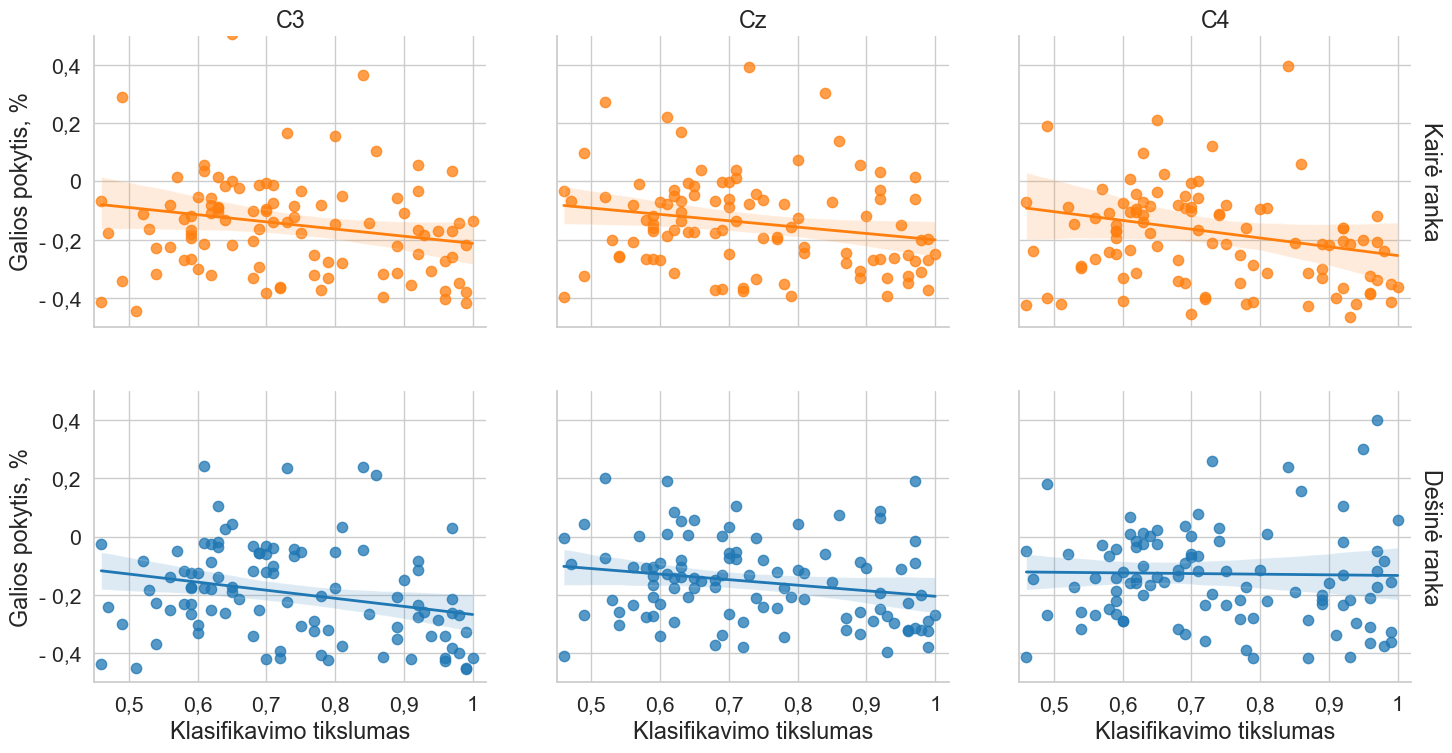

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import spearmanr
import numpy as np

# Set global sizes and font
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)

palette = {'Kairė ranka': '#ff7f0e', 'Dešinė ranka': '#1f77b4'}

channels_order = ['C3', 'Cz', 'C4']
df_three = df_clean[df_clean['Channel'].isin(channels_order)]

# Helper to format numbers for all axes
def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

print("\n--- Spearman correlation statistics for C3/Cz/C4 ---")
for hand in ['Kairė ranka', 'Dešinė ranka']:
    for ch in channels_order:
        data = df_three[(df_three['Hand'] == hand) & (df_three['Channel'] == ch)]
        if not data.empty:
            corr, pval = spearmanr(data['mean_val_accuracy'], data['Power'])
            print(f"Hand: {hand:12s} | Channel: {ch:2s} | Spearman rho: {corr: .3f} | p-value: {pval: .4f} | N: {len(data)}")

# Plotting
g = sns.FacetGrid(
    df_three,
    row='Hand', col='Channel',
    row_order=['Kairė ranka', 'Dešinė ranka'], col_order=channels_order,
    height=4, aspect=1.2,
    margin_titles=True
)

from matplotlib.ticker import FuncFormatter

for (row_val, col_val), ax in g.axes_dict.items():
    data = df_three[(df_three['Hand'] == row_val) & (df_three['Channel'] == col_val)]
    if not data.empty:
        color = palette[row_val]
        sns.regplot(
            data=data,
            x='mean_val_accuracy', y='Power',
            scatter_kws={'s': 55, 'alpha': 0.75, 'color': color},
            line_kws={'lw': 2, 'color': color},
            ci=95,
            ax=ax
        )
    # Robust, dynamic tick formatting:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: format_number(x)))


g.set_axis_labels("Klasifikavimo tikslumas", "Galios pokytis, %")
g.set(xlim=(0.45, 1.02), ylim=(-0.5, 0.5))
g.set_titles(row_template="{row_name}", col_template="{col_name}")

plt.subplots_adjust(hspace=0.22, wspace=0.18, top=0.88)
# plt.suptitle("Ryšys tarp tikslumo ir galios pokyčio (Bazinis): Kairė–Centras–Dešinė", y=0.98, fontsize=19)
plt.show()


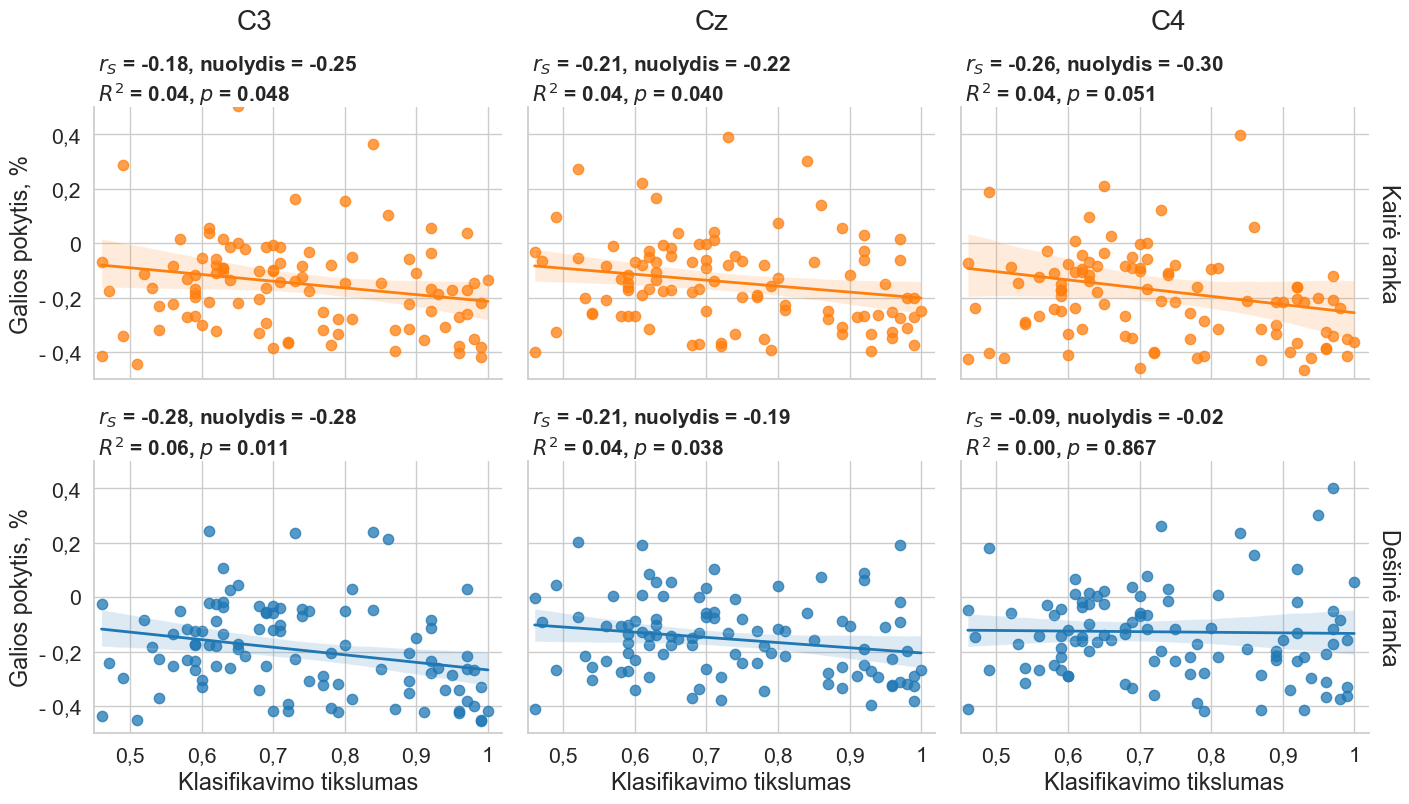

In [460]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import spearmanr, linregress
import numpy as np

# Assume df_three, palette, format_number, etc. are defined as in your previous code

g = sns.FacetGrid(
    df_three,
    row='Hand', col='Channel',
    row_order=['Kairė ranka', 'Dešinė ranka'], col_order=channels_order,
    height=4, aspect=1.2,
    margin_titles=True
)

from matplotlib.ticker import FuncFormatter

for (row_val, col_val), ax in g.axes_dict.items():
    data = df_three[(df_three['Hand'] == row_val) & (df_three['Channel'] == col_val)]
    if not data.empty:
        color = palette[row_val]
        sns.regplot(
            data=data,
            x='mean_val_accuracy', y='Power',
            scatter_kws={'s': 55, 'alpha': 0.75, 'color': color},
            line_kws={'lw': 2, 'color': color},
            ci=95,
            ax=ax
        )
        corr, pval = spearmanr(data['mean_val_accuracy'], data['Power'])
        lin = linregress(data['mean_val_accuracy'], data['Power'])
        slope = lin.slope
        r2 = lin.rvalue**2
        p_reg = lin.pvalue
        # Two-row annotation (first row: rs + slope, second row: R2 + p)
        annotation = (
            r"$r_S$ = " + f"{corr:.2f}, nuolydis = {slope:.2f}\n"
            r"$R^2$ = " + f"{r2:.2f}, $p$ = " + (f"{p_reg:.3f}" if p_reg >= 0.001 else "<0.001")
        )
        ax.annotate(
            annotation,
            xy=(0.01, 1.2),       # Lower top left
            xycoords='axes fraction',
            ha='left', va='top',   # 'va' should be 'top' if you want text to hang below the point
            fontsize=15, fontweight='bold'
        )



    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: format_number(x)))


g.set_axis_labels("Klasifikavimo tikslumas", "Galios pokytis, %")
g.set(xlim=(0.45, 1.02), ylim=(-0.5, 0.5))
# g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_titles(row_template="{row_name}", col_template="")
channels_order = ['C3', 'Cz', 'C4']

col_labels = channels_order  # or however you define them

# Get the position of each column's first axes
for i, label in enumerate(col_labels):
    # The axes are ordered row-wise, so we take the first row:
    ax = g.axes[0, i]
    # Get the bounding box of the axes in figure coordinates
    pos = ax.get_position()
    x = 0.5 * (pos.x0 + pos.x1)  # Center of the subplot in figure coords
    y = 0.98  # Just above the axes, tweak as needed (e.g., 1.05)
    g.fig.text(x, y, label, ha='center', va='bottom', fontsize=20)


# Legend and layout as before
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Kairė ranka', markerfacecolor=palette['Kairė ranka'], markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Dešinė ranka', markerfacecolor=palette['Dešinė ranka'], markersize=12)
]


plt.tight_layout()
plt.subplots_adjust(top=0.89, hspace=0.30)
plt.show()


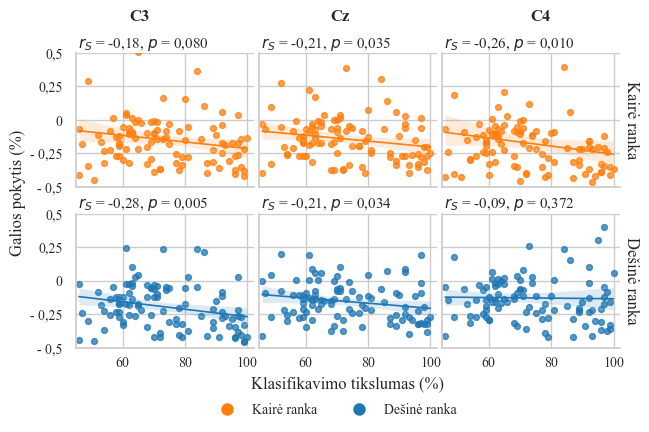

In [546]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import spearmanr
from matplotlib.ticker import FuncFormatter

def percent_fmt(x, pos):
    return f"{x * 100:.0f}"

# Assume df_three, palette, format_number, channels_order already defined.
channels_order = ['C3', 'Cz', 'C4']  # update as needed
n_cols = len(channels_order)
height = 2
desired_width = 6.59291339
aspect = desired_width / (n_cols * height)  # slightly adjust aspect for perfect width

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 10,
    'figure.titlesize':      12
})

g = sns.FacetGrid(
    df_three,
    row='Hand', col='Channel',
    row_order=['Kairė ranka', 'Dešinė ranka'], col_order=channels_order,
    height=height,
    aspect=aspect,
    margin_titles=True
)

for (row_val, col_val), ax in g.axes_dict.items():
    data = df_three[(df_three['Hand'] == row_val) & (df_three['Channel'] == col_val)]
    if not data.empty:
        color = palette[row_val]
        sns.regplot(
            data=data,
            x='mean_val_accuracy', y='Power',
            scatter_kws={'s': 18, 'alpha': 0.75, 'color': color},
            line_kws={'lw': 1.2, 'color': color},
            ci=95,
            ax=ax
        )
        corr, pval = spearmanr(data['mean_val_accuracy'], data['Power'])
        annotation = (
            r"$r_S$ = " + f"{corr:.2f}".replace('.', ',') + ", " +
            r"$p$ = " + (f"{pval:.3f}".replace('.', ',') if pval >= 0.001 else "<0,001")
        )
        ax.annotate(
            annotation,
            xy=(0.01, 1.13),
            xycoords='axes fraction',
            ha='left', va='top',
            fontsize=11
        )

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: format_number(x)))
    ax.xaxis.set_tick_params(pad=0)

g.set_axis_labels("Klasifikavimo tikslumas", "Galios pokytis(%)")
g.set(xlim=(0.45, 1.02), ylim=(-0.5, 0.5))
g.set_titles(row_template="{row_name}", col_template="")

for i, label in enumerate(channels_order):
    ax = g.axes[0, i]
    pos = ax.get_position()
    x = 0.5 * (pos.x0 + pos.x1)
    y = 0.99
    g.fig.text(x, y, label, ha='center', va='bottom', fontsize=12, weight='bold')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Kairė ranka', markerfacecolor=palette['Kairė ranka'], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Dešinė ranka', markerfacecolor=palette['Dešinė ranka'], markersize=10)
]

g.fig.legend(
    handles=legend_elements,
    loc='lower center', ncol=2,
    bbox_to_anchor=(0.5, -.02), fontsize=10, frameon=False
)

ax.xaxis.set_major_formatter(FuncFormatter(percent_fmt))
ax.xaxis.set_label_coords(0.5, 0)
# Remove x-axis label from all axes
# Remove all x and y axis labels
for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')

# Set x-axis label only on the bottom middle subplot
g.axes[-1, 1].set_xlabel("Klasifikavimo tikslumas (%)")

# Set y-axis label only on the middle left subplot (bottom left for 2-row grid)
g.fig.text(
    0.02, 0.57,                              # x, y position in figure coordinates
    "Galios pokytis (%)",                   # Your label
    va='center', ha='center', rotation='vertical',
    fontsize=12
)

plt.tight_layout(rect=[0, 0.01, 1, 0.97])
plt.subplots_adjust(top=0.92, hspace=0.20, wspace=0.03)  # smaller spaces!
plt.show()
g.fig.savefig("bakalauras/fig12.png", dpi=800, bbox_inches='tight')


In [442]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import spearmanr, rankdata
from matplotlib.ticker import MaxNLocator
import numpy as np

# Assume you already have: df_three, palette, format_number, channels_order

# 1. Transform to ranks by (Hand, Channel)
df_plot = df_three.copy()
for (hand, chan), idx in df_plot.groupby(['Hand', 'Channel']).groups.items():
    ix = list(idx)
    df_plot.loc[ix, 'accuracy_rank'] = rankdata(df_plot.loc[ix, 'mean_val_accuracy'], method='average')
    df_plot.loc[ix, 'power_rank'] = rankdata(df_plot.loc[ix, 'Power'], method='average')

g = sns.FacetGrid(
    df_plot,
    row='Hand', col='Channel',
    row_order=['Kairė ranka', 'Dešinė ranka'], col_order=channels_order,
    height=4, aspect=1.2,
    margin_titles=True
)

for (row_val, col_val), ax in g.axes_dict.items():
    data = df_plot[(df_plot['Hand'] == row_val) & (df_plot['Channel'] == col_val)]
    if not data.empty:
        color = palette[row_val]
        sns.regplot(
            data=data,
            x='accuracy_rank', y='power_rank',
            scatter_kws={'s': 55, 'alpha': 0.75, 'color': color},
            line_kws={'lw': 2, 'color': color},
            ci=95,
            ax=ax
        )
        corr, pval = spearmanr(data['mean_val_accuracy'], data['Power'])
        # Single-line annotation: Spearman's r and p
        annotation = (
            r"$r_S$ = " + f"{corr:.2f}, $p$ = " + (f"{pval:.3f}" if pval >= 0.001 else "<0.001")
        )
        ax.annotate(
            annotation,
            xy=(0.01, 1.1),       # Lower top left
            xycoords='axes fraction',
            ha='left', va='top',
            fontsize=15, fontweight='bold'
        )
    # Set integer ticks for ranks
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

g.set_axis_labels("Tikslumo rangas", "Galios pokyčio rangas")
g.set_titles(row_template="{row_name}", col_template="")
channels_order = ['C3', 'Cz', 'C4']

col_labels = channels_order

# Get the position of each column's first axes
for i, label in enumerate(col_labels):
    ax = g.axes[0, i]
    pos = ax.get_position()
    x = 0.5 * (pos.x0 + pos.x1)
    y = 0.95
    g.fig.text(x, y, label, ha='center', va='bottom', fontsize=20)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Kairė ranka', markerfacecolor=palette['Kairė ranka'], markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Dešinė ranka', markerfacecolor=palette['Dešinė ranka'], markersize=12)
]

plt.tight_layout()
plt.subplots_adjust(top=0.89, hspace=0.30)
plt.show()


NameError: name 'df_three' is not defined

In [ ]:
from scipy.stats import spearmanr

# Assuming df_three is your full dataframe

corr, pval = spearmanr(df_three['mean_val_accuracy'], df_three['Power'])
N = df_three[['mean_val_accuracy', 'Power']].dropna().shape[0]

print(f"Spearman rho: {corr:.2f}")
print(f"p-value: {pval:.3g}")
print(f"N: {N}")


Spearman rho: -0.20
p-value: 6.95e-07
N: 600


Hand: Kairė ranka  | Channel: C3 | Spearman rho: -0.176 | p-value:  0.0805 | N: 100
Hand: Kairė ranka  | Channel: Cz | Spearman rho: -0.211 | p-value:  0.0350 | N: 100
Hand: Kairė ranka  | Channel: C4 | Spearman rho: -0.257 | p-value:  0.0099 | N: 100
Hand: Dešinė ranka | Channel: C3 | Spearman rho: -0.278 | p-value:  0.0052 | N: 100
Hand: Dešinė ranka | Channel: Cz | Spearman rho: -0.213 | p-value:  0.0336 | N: 100
Hand: Dešinė ranka | Channel: C4 | Spearman rho: -0.090 | p-value:  0.3717 | N: 100

In [198]:
from scipy.stats import shapiro

# Assume df_plot is the DataFrame with accuracy_rank and power_rank

for (hand, chan), group in df_plot.groupby(['Hand', 'Channel']):
    print(f"\n--- {hand}, {chan} ---")
    for col in ['accuracy_rank', 'power_rank']:
        stat, p = shapiro(group[col])
        print(f"{col}: W={stat:.3f}, p={p:.3g} {'NOT normal' if p < 0.05 else 'normal'}")


KeyError: 'Hand'

In [199]:
for (row_val, col_val), ax in g.axes_dict.items():
    data = df_three[(df_three['Hand'] == row_val) & (df_three['Channel'] == col_val)]
    if not data.empty:
        color = palette[row_val]
        sns.regplot(
            data=data,
            x='mean_val_accuracy', y='Power',
            scatter_kws={'s': 55, 'alpha': 0.75, 'color': color},
            line_kws={'lw': 2, 'color': color},
            ci=95,
            ax=ax
        )
        corr, pval = spearmanr(data['mean_val_accuracy'], data['Power'])
        lin = linregress(data['mean_val_accuracy'], data['Power'])
        slope = lin.slope
        r2 = lin.rvalue**2
        p_reg = lin.pvalue

        # Print the values for each plot
        print(f"Hand: {row_val}, Channel: {col_val}")
        print(f"  Spearman r: {corr:.3f}")
        print(f"  Spearman p: {pval:.4g}")
        print(f"  Slope (nuolydis): {slope:.3f}")
        print(f"  R²: {r2:.3f}")
        print(f"  Regression p: {p_reg:.4g}")
        print("---")

        annotation = (
            r"$r_S$ = " + f"{corr:.2f}, nuolydis = " + r"$\mathbf{" + f"{slope:.2f}" + r"}$" + "\n"
            r"$R^2$ = " + f"{r2:.2f}, $p$ = " + (f"{p_reg:.3f}" if p_reg >= 0.001 else "<0.001")
        )
        ax.annotate(
            annotation,
            xy=(0.01, 1.2),
            xycoords='axes fraction',
            ha='left', va='top',
            fontsize=15
        )


KeyError: 'Kairė ranka'

In [200]:
from scipy.stats import shapiro

print("\n--- Shapiro-Wilk Normality Test ---")
print("Hand           | Channel | Variable           | W       | p-value")
print("-" * 60)

for hand in ['Kairė ranka', 'Dešinė ranka']:
    for ch in ['C3', 'Cz', 'C4']:
        subset = df_three[(df_three['Hand'] == hand) & (df_three['Channel'] == ch)]
        if len(subset) > 3:
            # Test normality for mean_val_accuracy
            stat_acc, p_acc = shapiro(subset['mean_val_accuracy'])
            # Test normality for Power
            stat_pow, p_pow = shapiro(subset['Power'])
            print(f"{hand:13s} | {ch:7s} | {'Accuracy':15s} | {stat_acc:.3f} | {p_acc:.4g}")
            print(f"{hand:13s} | {ch:7s} | {'Power':15s}    | {stat_pow:.3f} | {p_pow:.4g}")
        else:
            print(f"{hand:13s} | {ch:7s} | Not enough data for normality test")



--- Shapiro-Wilk Normality Test ---
Hand           | Channel | Variable           | W       | p-value
------------------------------------------------------------
Kairė ranka   | C3      | Accuracy        | 0.951 | 0.0009081
Kairė ranka   | C3      | Power              | 0.893 | 6.624e-07
Kairė ranka   | Cz      | Accuracy        | 0.950 | 0.0008262
Kairė ranka   | Cz      | Power              | 0.958 | 0.002781
Kairė ranka   | C4      | Accuracy        | 0.948 | 0.000614
Kairė ranka   | C4      | Power              | 0.768 | 2.816e-11
Dešinė ranka  | C3      | Accuracy        | 0.948 | 0.0006172
Dešinė ranka  | C3      | Power              | 0.961 | 0.00459
Dešinė ranka  | Cz      | Accuracy        | 0.943 | 0.0002981
Dešinė ranka  | Cz      | Power              | 0.973 | 0.03951
Dešinė ranka  | C4      | Accuracy        | 0.946 | 0.0004705
Dešinė ranka  | C4      | Power              | 0.851 | 1.291e-08


In [201]:
from scipy.stats import spearmanr

# Define your splits
channels = ['C3', 'C4', 'Cz']
hands = ['Kairė ranka', 'Dešinė ranka']

print("--- Spearman correlation between Power and Accuracy (Bazinis) ---")
print("Hand           | Channel |    rho    |  p-value  |   N")
print("-" * 53)

for ch in channels:
    for hand in hands:
        data = df_clean[(df_clean['Channel'] == ch) & (df_clean['Hand'] == hand)]
        if len(data) >= 3:  # need at least 3 points for correlation
            rho, p = spearmanr(data['Power'], data['mean_val_accuracy'])
            print(f"{hand:13s} | {ch:7s} | {rho: .3f}   | {p:9.4g} | {len(data):3d}")
        else:
            print(f"{hand:13s} | {ch:7s} |   N/A    |   N/A    | {len(data):3d}")


--- Spearman correlation between Power and Accuracy (Bazinis) ---
Hand           | Channel |    rho    |  p-value  |   N
-----------------------------------------------------
Kairė ranka   | C3      | -0.176   |   0.08048 | 100
Dešinė ranka  | C3      | -0.278   |  0.005173 | 100
Kairė ranka   | C4      | -0.257   |  0.009902 | 100
Dešinė ranka  | C4      | -0.090   |    0.3717 | 100
Kairė ranka   | Cz      | -0.211   |   0.03498 | 100
Dešinė ranka  | Cz      | -0.213   |   0.03359 | 100


In [202]:
from scipy.stats import spearmanr

# Drop NaNs, if any
df_all = df_clean.dropna(subset=['mean_val_accuracy', 'Power'])

# Spearman correlation
rho, p = spearmanr(df_all['mean_val_accuracy'], df_all['Power'])

print(f"Overall Spearman correlation (all channels & hands): rho = {rho:.3f}, p = {p:.4g}, N = {len(df_all)}")


Overall Spearman correlation (all channels & hands): rho = -0.201, p = 6.949e-07, N = 600


In [203]:

# 1) Combine cross‑session DataFrames
cross_list = [
    dfs['cross'].assign(source=src)
    for src, dfs in results.items()
]
df_cross = pd.concat(cross_list, ignore_index=True)
df_cross_all = df_cross[df_cross.pipeline == "TS_LR"].copy()

# 2) Same mapping + cleaning as before
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)       # drop date_
    s = s.replace('beta', 'β')                      # β
    s = s.replace('atar_', '')                      # drop atar_
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    return s.replace('_', ' ')                       # underscores → spaces

df_cross_all['source'] = (
    df_cross_all['source']
      .map(base_map)
      .fillna(df_cross_all['source'].apply(clean_source))
)

# 3) Filter out bazinis & automatinis
df_cross_plot = df_cross_all[~df_cross_all['source'].isin(['bazinis', 'automatinis'])]

# 4) Compute mean test_accuracy and identify the best
mean_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].mean()
best_cross = mean_acc_cross.idxmax()
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()
# … everything up to computing mean_acc_cross & best_cross …

# 5) Determine descending order by mean test_accuracy
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()


In [204]:
# 1. Subjects in all other sources (expected set)
expected_subjs = set(df_cross_all['evaluation'].unique())

# 2. Subjects present in 'β0.1 elim.'
elim_subjs = set(df_cross_all[df_cross_all['source'] == 'β0.1 elim.']['evaluation'].unique())

# 3. Subjects missing in 'β0.1 elim.'
missing_subjs = expected_subjs - elim_subjs

print("Subjects missing in 'β0.1 elim.':", missing_subjs)


Subjects missing in 'β0.1 elim.': {'50', '53', '49', '51', '52'}


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\4253140503.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\B

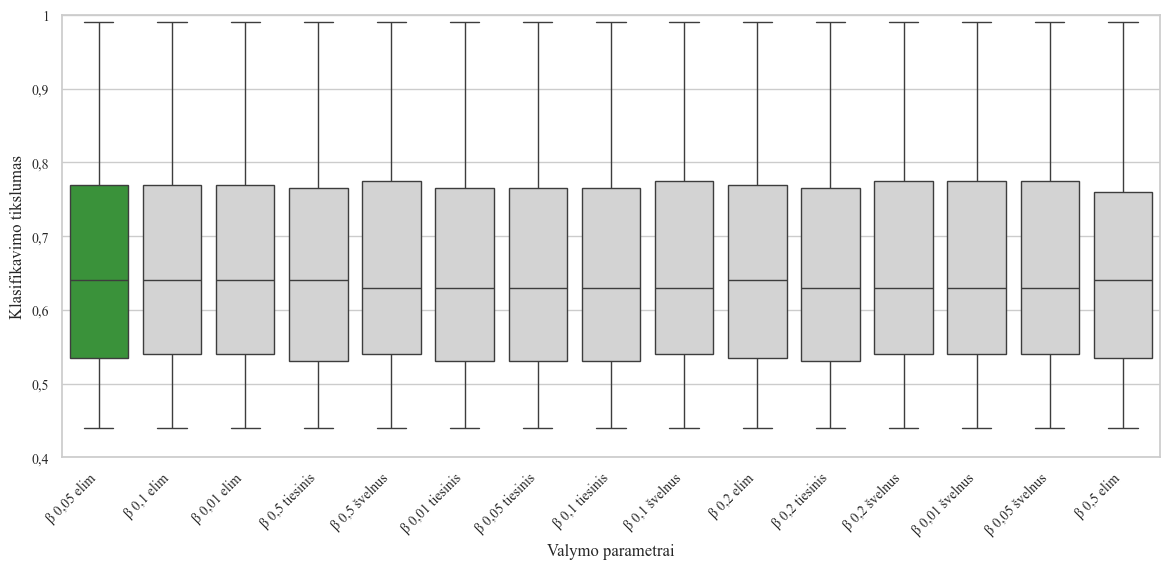

In [430]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1) Combine cross‑session DataFrames
cross_list = [
    dfs['cross'].assign(source=src)
    for src, dfs in results.items()
]
df_cross = pd.concat(cross_list, ignore_index=True)
df_cross_all = df_cross[df_cross.pipeline == "TS_LR"].copy()

# 2) Same mapping + cleaning as before
base_map = {
    '2025-04-25': 'bazinis',
    '2025-04-25_autoreject': 'automatinis'
}

def clean_source(s):
    s = re.sub(r'^\d{4}-\d{2}-\d{2}_', '', s)       # drop date_
    s = s.replace('beta', 'β ')                      # β
    s = s.replace('atar_', '')                      # drop atar_
    s = (s
         .replace('OptModesoft', 'švelnus')
         .replace('OptModelinAtten', 'tiesinis')
         .replace('OptModeelim', 'elim.'))
    return s.replace('_', ' ')                       # underscores → spaces

df_cross_all['source'] = (
    df_cross_all['source']
      .map(base_map)
      .fillna(df_cross_all['source'].apply(clean_source))
)

# List of subject numbers to drop (as strings)
drop_subjects = {'49', '50', '51', '52', '53'}

# Drop these from df_cross_all (in-place or create new DataFrame)
df_cross_all = df_cross_all[~df_cross_all['evaluation'].astype(str).isin(drop_subjects)].copy()

# (Optional) Also drop from df_cross_plot if running after this point
df_cross_plot = df_cross_all[~df_cross_all['source'].isin(['bazinis', 'automatinis'])]

# 4) Compute mean test_accuracy and identify the best
mean_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].mean()
best_cross = mean_acc_cross.idxmax()
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()

# 5) Build palette as before
base_color  = '#d3d3d3'
highlight   = '#2ca02c'
palette_cross = {
    s: (highlight if s == best_cross else base_color)
    for s in order_cross
}

# --- Formatter function ---
def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

# 7) Plot & override alpha per‐box
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='test_accuracy',
    data=df_cross_plot,
    order=order_cross,       # descending mean
    palette=palette_cross,
    ax=ax
)

ax.set_xlabel("Valymo parametrai")
ax.set_ylabel("Klasifikavimo tikslumas")
ax.set_ylim(0.4, 1)  # fixed y-axis scale

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Robust y-axis and x-axis tick formatting (commas, no trailing zeros)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))
# (If you have numeric or beta x-labels, format those too)
xlabels = [label.get_text().replace('.', ',') for label in ax.get_xticklabels()]
xlabels = [re.sub(r',00$', '', lbl) for lbl in xlabels]
xlabels = [re.sub(r',0$', '', lbl) for lbl in xlabels]
xlabels = [re.sub(r',$', '', lbl) for lbl in xlabels]
ax.set_xticklabels(xlabels)

plt.show()


Subjects present in all groups after accuracy filter: ['02', '03', '05', '09', '17', '18', '19', '21', '23', '29', '32', '33', '36', '37', '44', '45']
Sample counts per source (after all filtering):
source
β 0.1 švelnus      16
β 0.2 švelnus      16
β 0.5 švelnus      16
β 0.01 švelnus     16
β 0.05 švelnus     16
β 0.01 tiesinis    16
β 0.05 tiesinis    16
β 0.1 tiesinis     16
β 0.2 tiesinis     16
β 0.5 tiesinis     16
β 0.01 elim.       16
β 0.2 elim.        16
β 0.05 elim.       16
β 0.5 elim.        16
β 0.1 elim.        16
Name: count, dtype: int64

Mean test_accuracy per source:
source
β 0.1 švelnus      0.865000
β 0.2 švelnus      0.865000
β 0.5 švelnus      0.865000
β 0.01 švelnus     0.864375
β 0.05 švelnus     0.864375
β 0.01 tiesinis    0.861875
β 0.05 tiesinis    0.861875
β 0.1 tiesinis     0.861875
β 0.2 tiesinis     0.861875
β 0.5 tiesinis     0.861875
β 0.01 elim.       0.853125
β 0.2 elim.        0.853125
β 0.05 elim.       0.852500
β 0.5 elim.        0.852500
β 0.1 e

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\2419645762.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\B

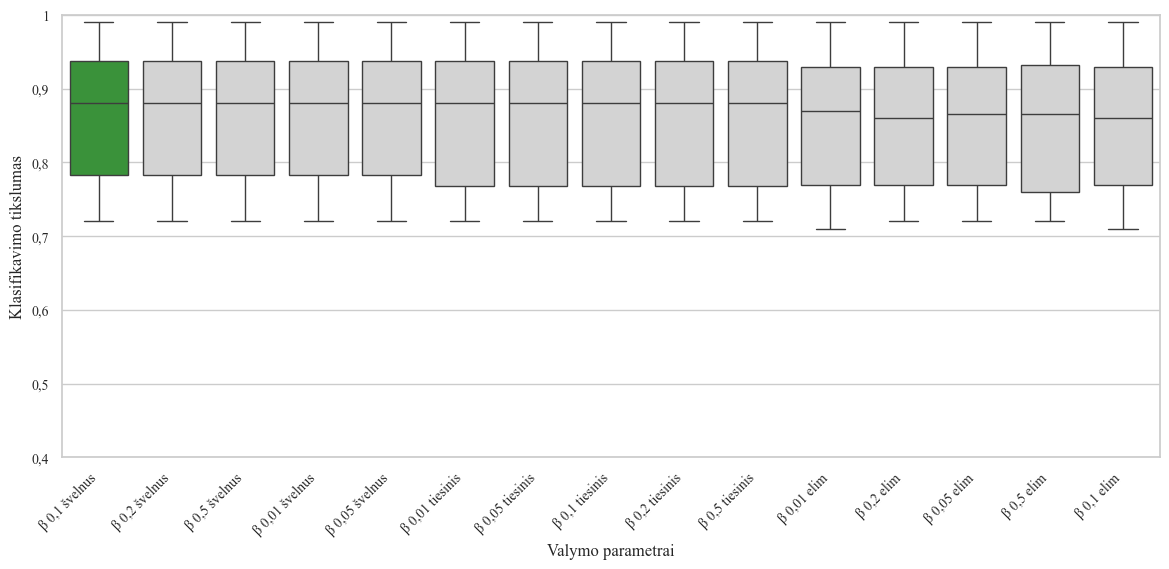

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import re

# Step 1: Filter for only rows with test_accuracy > 0.7
df_high_acc = df_cross_plot[df_cross_plot['test_accuracy'] > 0.7]

# Step 2: Find subjects present in ALL groups (using only high-accuracy data)
groups = df_high_acc['source'].unique()
subjects_per_group = [
    set(df_high_acc[df_high_acc['source'] == g]['evaluation']) for g in groups
]
common_subjects = set.intersection(*subjects_per_group)
print("Subjects present in all groups after accuracy filter:", sorted(common_subjects))

# Step 3: Keep only these subjects
df_high_acc_paired = df_high_acc[df_high_acc['evaluation'].isin(common_subjects)].copy()

# Step 4: Recompute stats and plot as before
mean_acc_high = df_high_acc_paired.groupby('source')['test_accuracy'].mean()
best_high = mean_acc_high.idxmax()
order_high = mean_acc_high.sort_values(ascending=False).index.tolist()

counts = df_high_acc_paired['source'].value_counts().reindex(order_high)
print("Sample counts per source (after all filtering):")
print(counts)
print("\nMean test_accuracy per source:")
print(mean_acc_high.loc[order_high])

base_color  = '#d3d3d3'
highlight   = '#2ca02c'
palette_high = {
    s: (highlight if s == best_high else base_color)
    for s in order_high
}

# --- Lithuanian/European number formatting ---
def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    x='source',
    y='test_accuracy',
    data=df_high_acc_paired,
    order=order_high,
    palette=palette_high,
    ax=ax
)

ax.set_ylim(0.4, 1)
ax.set_xlabel("Valymo parametrai")
ax.set_ylabel("Klasifikavimo tikslumas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Format y-ticks robustly (works for zooming/panning)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))

# Format x-ticks (for betas/parameter values)
xlabels = [label.get_text().replace('.', ',') for label in ax.get_xticklabels()]
xlabels = [re.sub(r',00$', '', lbl) for lbl in xlabels]
xlabels = [re.sub(r',0$', '', lbl) for lbl in xlabels]
xlabels = [re.sub(r',$', '', lbl) for lbl in xlabels]
ax.set_xticklabels(xlabels)

plt.show()


In [207]:
df_cross_plot

evaluation pipeline  test_accuracy  test_roc_auc  \
3777          01    TS_LR           0.75        0.8412   
3813          02    TS_LR           0.72        0.8116   
3849          03    TS_LR           0.87        0.9860   
3885          04    TS_LR           0.56        0.6448   
3921          05    TS_LR           0.77        0.9324   
...          ...      ...            ...           ...   
31317         44    TS_LR           0.88        0.9948   
31353         45    TS_LR           0.93        0.9844   
31389         46    TS_LR           0.62        0.7632   
31425         47    TS_LR           0.66        0.6988   
31461         48    TS_LR           0.55        0.6372   

                                            correct_mask          source  
3777   [True, True, True, True, True, True, True, Tru...     β 0.1 elim.  
3813   [False, True, True, True, True, True, False, T...     β 0.1 elim.  
3849   [True, True, True, True, True, True, True, Tru...     β 0.1 elim.  
3885   [True, True, True, True, False, False, True, F...     β 0.1 elim.  
3921   [True, True, True, True, True, False, True, Tr...     β 0.1 elim.  
...                                                  ...             ...  
31317  [False, True, False, True, True, True, False, ...  β 0.05 švelnus  
31353  [True, True, True, True, True, True, True, Tru...  β 0.05 švelnus  
31389  [False, True, False, False, False, False, True...  β 0.05 švelnus  
31425  [False, False, True, True, True, True, True, F...  β 0.05 švelnus  
31461  [True, False, False, False, True, False, True,...  β 0.05 švelnus  

[705 rows x 6 columns]

In [432]:
# 4) Compute mean and median test_accuracy per source
mean_acc_cross = df_cross_plot.groupby('Source')['test_accuracy'].mean()
median_acc_cross = df_cross_plot.groupby('Source')['test_accuracy'].median()

print("Mean test_accuracy per source:")
print(mean_acc_cross.sort_values(ascending=False))

print("\nMedian test_accuracy per source:")
print(median_acc_cross.sort_values(ascending=False))

best_cross = mean_acc_cross.idxmax()
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()


KeyError: 'Source'

In [ ]:
pivot


Empty DataFrame
Columns: []
Index: []

In [433]:
from scipy.stats import shapiro
diffs = pivot['β0.1 elim.'] - pivot['β0.1 švelnus']

stat, p = shapiro(diffs)
print(f"Shapiro-Wilk test statistic: {stat:.3f}, p-value: {p:.4f}")

if p > 0.05:
    print("Differences appear normally distributed — paired t-test is appropriate.")
else:
    print("Differences NOT normally distributed — consider Wilcoxon test instead.")


NameError: name 'pivot' is not defined

In [434]:
from scipy.stats import wilcoxon

# Pivot to get paired samples (drop missing pairs)
paired = df_cross_plot[df_cross_plot['source'].isin(['β0.1 elim.', 'β0.1 švelnus'])]
pivot = paired.pivot(index='evaluation', columns='source', values='test_accuracy').dropna()

stat, p = wilcoxon(pivot['β0.1 elim.'], pivot['β0.1 švelnus'])

print(f"Wilcoxon test statistic: {stat:.3f}, p-value: {p:.4f}")


KeyError: 'β0.1 elim.'

In [435]:
# ── 1) Load data ──
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.05_OptModeelim'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.05_OptModeelim': 'Vilnelių'
}

within_frames = []
for src in sources:
    dfw = results[src]['within']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# ── 2) Prepare for stats ──
labels = ['Bazinis', 'Automatinis', 'Vilnelių']
wide = df_within.pivot(index='evaluation', columns='Source', values='mean_val_accuracy').dropna()
pairs = list(itertools.combinations(labels, 2))

cross_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    cross_frames.append(w)
cross_df = pd.concat(cross_frames, ignore_index=True)


In [436]:
#sekanti figura

from statannotations.Annotator import Annotator
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Font settings for bigger text
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

# --- 1) Assemble df_within ---
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.1_OptModeelim'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.1_OptModeelim': 'Vilnelių'
}
within_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# --- 2) Rename Automatinis to Šalinimas for plotting ---
df_within_plot = df_within.copy()
df_within_plot['Source'] = df_within_plot['Source'].replace({'Automatinis': 'Šalinimas'})

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']
markers = ['o', 's', '^']
palette = {
    'Bazinis': '#1f77b4',
    'Šalinimas': '#ff7f0e',
    'Vilnelių': '#2ca02c'
}

# --- 3) Paired t‑tests and get p-values in same order as pairs ---

# --- 3) Pivot to wide format and drop any rows with at least one NaN ---
# wide = df_within_plot.pivot(index='evaluation', columns='Source', values='test_accuracy')
# wide = wide.dropna()  # Only subjects with data in all groups
# --- 3) Pivot to wide format and drop any rows with at least one NaN ---
wide = df_cross_all.pivot(index='evaluation', columns='Source', values='test_accuracy')
wide = wide.rename(columns={'Automatinis': 'Šalinimas'})  # Fix column name for stats
wide = wide.dropna()  # Only subjects with data in all groups

import scikit_posthocs as sp

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']
pairs = [
    ("Bazinis", "Šalinimas"),
    ("Bazinis", "Vilnelių"),
    ("Šalinimas", "Vilnelių"),
]

nemenyi_pvals = sp.posthoc_nemenyi_friedman(wide[labels].values)
nemenyi_pvals = pd.DataFrame(nemenyi_pvals, columns=labels, index=labels)
pvals = [nemenyi_pvals.loc[a, b] for a, b in pairs]



# --- 4) Subject order (same as first code) ---
subject_order = (
    df_within_plot[df_within_plot['Source'] == 'Bazinis']
    .groupby('evaluation')['test_accuracy']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)



import pandas as pd
from scipy.stats import shapiro

# Assume df_within_plot is already created as in your workflow
# If not, run your data assembly above this code block

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']

print("--- Shapiro-Wilk normalumo testas ---")
for label in labels:
    data = df_within_plot[df_within_plot['Source'] == label]['test_accuracy']
    w, p = shapiro(data)
    print(f"{label}: W = {w:.3f}, p = {p:.4f}")
print("-" * 40)


KeyError: 'Source'

In [437]:
results

{'2025-04-25': {'within':      evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
  0          01_1    CSP_SVM                0.640        0.696125   
  1          01_1     CSP_LR                0.595        0.639375   
  2          01_1    CSP_LDA                0.595        0.648125   
  3          01_1     CSP_RF                1.000        1.000000   
  4          01_1   CSSP_SVM                0.635        0.698875   
  ...         ...        ...                  ...             ...   
  3739       53_2  LogVar_RF                1.000        1.000000   
  3740       53_2     TS_SVM                1.000        1.000000   
  3741       53_2      TS_LR                1.000        1.000000   
  3742       53_2     TS_LDA                0.845        0.921375   
  3743       53_2      TS_RF                1.000        1.000000   
  
        mean_val_accuracy  mean_val_auc feature_extraction  
  0                  0.55         0.626                CSP  
  1                  0.

In [438]:
stat, p = friedmanchisquare(*[wide[col] for col in wide.columns])
print(f"Friedmano rangų testas: χ² = {stat:.2f}, p = {p:.4g}")

print("\nNemenyi post-hoc p reikšmės (virš įstrižainės):")
nemenyi = sp.posthoc_nemenyi_friedman(wide.values)
for i, a in enumerate(wide.columns):
    for j, b in enumerate(wide.columns):
        if j > i:
            print(f"{a} vs {b}: p = {nemenyi.iloc[i, j]:.4f}")



Friedmano rangų testas: χ² = 9.48, p = 0.008722

Nemenyi post-hoc p reikšmės (virš įstrižainės):
Automatinis vs Bazinis: p = 0.0100
Automatinis vs Vilnelių: p = 0.7468
Bazinis vs Vilnelių: p = 0.0739


In [439]:
print("--- Grupės vidurkiai ir medianos ---")
for label in labels:
    vals = df_within_plot[df_within_plot['Source'] == label]['test_accuracy']
    mean = vals.mean()
    median = vals.median()
    print(f"{label}: vidurkis = {mean:.3f}, mediana = {median:.3f}")
print("-" * 40)


--- Grupės vidurkiai ir medianos ---
Bazinis: vidurkis = 0.662, mediana = 0.630
Šalinimas: vidurkis = 0.631, mediana = 0.572
Vilnelių: vidurkis = 0.674, mediana = 0.640
----------------------------------------


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\990885565.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.


ValueError: Missing value(s) ['Automatinis'] for Source (specified in `pairs`) in data.

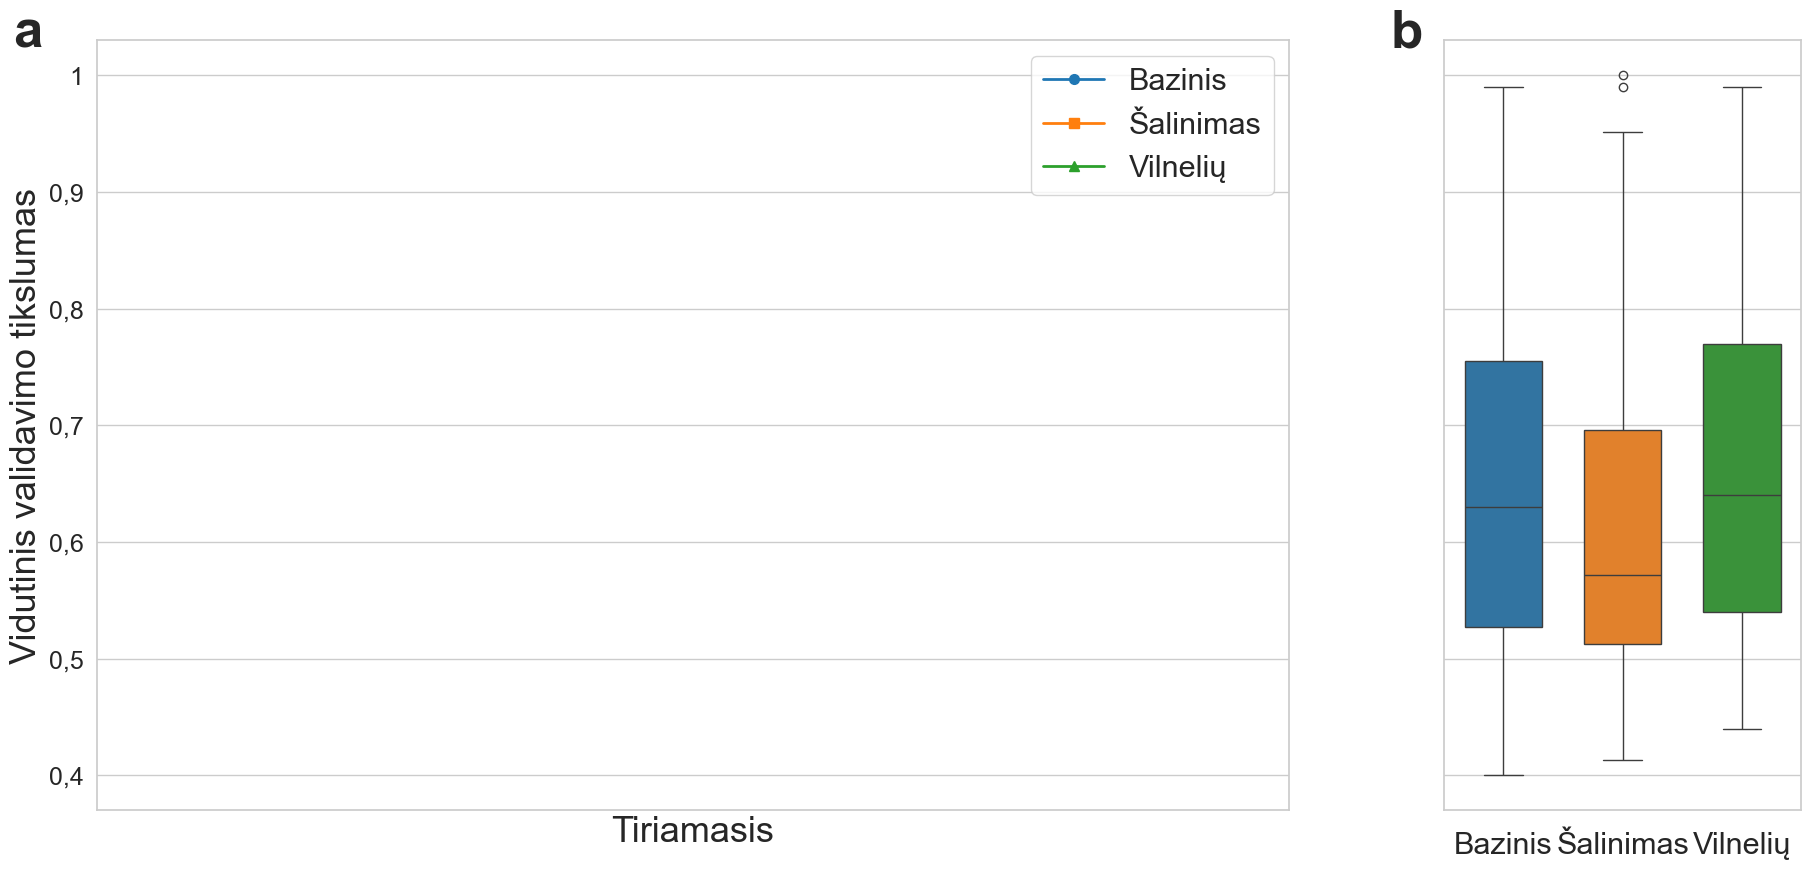

In [441]:
import numpy as np
from matplotlib.ticker import FuncFormatter

def format_number(val):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(22, 10),
    gridspec_kw={'width_ratios': [4, 1.2]},
    sharey=True
)
# Left: subject lines plot
drop_subjects = {'49', '50', '51', '52', '53'}
subject_order_clean = [s for s in subject_order if s not in drop_subjects]

for lbl, mk in zip(labels, markers):
    col = palette[lbl]
    ser = (
        df_within_plot[df_within_plot['Source'] == lbl]
        .groupby('evaluation')['test_accuracy']
        .mean()
        .reindex(subject_order_clean)
    )
    ser = ser.dropna()
    ax1.plot(
        ser.index,
        ser.values,
        marker=mk,
        color=col,
        label=lbl,
        lw=2,
        markersize=7
    )

ax1.set_xlabel("Tiriamasis", fontsize=26)
ax1.set_ylabel("Vidutinis validavimo tikslumas", fontsize=26)
ax1.tick_params(axis='x', labelrotation=90, labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
for t in ax1.get_xticklabels():
    t.set_ha('right')
ax1.legend(fontsize=22, loc='upper right')
ax1.tick_params(axis='x', labelbottom=False)
ax1.grid(axis='x', which='major', visible=False)

# Robust y-tick formatting for ax1
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))

# Right: boxplot
sns.boxplot(
    x='Source', y='test_accuracy',
    data=df_within_plot,
    order=labels,
    palette=palette,
    width=0.65,
    ax=ax2
)
# --- Add subplot labels 'a' and 'b' ---
ax1.text(-0.07, 1.04, 'a', transform=ax1.transAxes, fontsize=38, fontweight='bold', va='top', ha='left')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, fontsize=38, fontweight='bold', va='top', ha='left')


ax2.set(xlabel='', ylabel='')
ax2.tick_params(axis='y', labelsize=18)
xticks_pos = np.arange(len(labels))
ax2.set_xticks(xticks_pos)
ax2.set_xticklabels(labels, fontsize=22)
ax2.tick_params(axis='x', which='major', length=12, width=3, direction='out', labelsize=22)
ax2.grid(axis='x', which='major', visible=False)

# Robust y-tick formatting for ax2
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_number(y)))

# --- Statistical annotation ---
annot = Annotator(
    ax2, pairs=pairs, data=df_within_plot,
    x='Source', y='test_accuracy', order=labels
)
annot.configure(
    test=None,
    text_format='star',
    loc='inside',
    verbose=0,
    fontsize=30,
    line_width=2
)
annot.set_pvalues(pvals)
annot.annotate(line_offset_to_group=0.07)

# --- Hide 'ns' labels manually ---
for child in ax2.get_children():
    if hasattr(child, "get_text") and child.get_text() == "ns":
        child.set_text("")

ax1.tick_params(
    axis='x',
    labelbottom=False,
    bottom=True,
    length=12,
    width=3,
    direction='inout',
    color='grey'
)

plt.tight_layout(pad=2)
plt.show()


In [789]:
# Calculate mean and median for each method (column) in a wide DataFrame
means = wide.mean()
medians = wide.median()

# Combine into a summary DataFrame
summary = pd.DataFrame({'Mean': means, 'Median': medians})

summary


Mean    Median
Source                         
Automatinis  0.713689  0.697778
Bazinis      0.734615  0.710000
Vilnelių     0.717885  0.665000

In [790]:
wide

Source      Automatinis  Bazinis  Vilnelių
evaluation                                
01_1           0.847368     0.84      0.79
01_2           0.750000     0.80      0.79
02_1           0.867368     0.93      0.92
02_2           0.886316     0.90      0.92
03_1           0.850000     0.92      0.84
...                 ...      ...       ...
51_2           0.511765     0.60      0.56
52_1           0.751648     0.79      0.76
52_2           0.695556     0.77      0.76
53_1           0.601579     0.59      0.65
53_2           0.649708     0.70      0.65

[104 rows x 3 columns]

In [791]:
#sekanti figura

from statannotations.Annotator import Annotator
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Font settings for bigger text
mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

# --- 1) Assemble df_within ---
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.1_OptModeelim'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.1_OptModeelim': 'Vilnelių'
}
within_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# --- 2) Rename Automatinis to Šalinimas for plotting ---
df_within_plot = df_within.copy()
df_within_plot['Source'] = df_within_plot['Source'].replace({'Automatinis': 'Šalinimas'})

labels = ['Bazinis', 'Šalinimas', 'Vilnelių']
markers = ['o', 's', '^']
palette = {
    'Bazinis': '#1f77b4',
    'Šalinimas': '#ff7f0e',
    'Vilnelių': '#2ca02c'
}

# --- 3) Paired t‑tests and get p-values in same order as pairs ---

# --- 3) Pivot to wide format and drop any rows with at least one NaN ---
# wide = df_within_plot.pivot(index='evaluation', columns='Source', values='test_accuracy')
# wide = wide.dropna()  # Only subjects with data in all groups
# --- 3) Pivot to wide format and drop any rows with at least one NaN ---
wide = df_cross_all.pivot(index='evaluation', columns='Source', values='test_accuracy')
wide = wide.rename(columns={'Automatinis': 'Šalinimas'})  # Fix column name for stats
wide = wide.dropna()  # Only subjects with data in all groups


KeyError: 'Source'

In [ ]:
results['2025-04-25']['cross'][results['2025-04-25']['cross'].pipeline == 'TS_LR'].head(5)

evaluation pipeline  test_accuracy  test_roc_auc  \
33          01    TS_LR           0.64        0.8828   
69          02    TS_LR           0.75        0.8240   
105         03    TS_LR           0.90        0.9884   
141         04    TS_LR           0.56        0.6348   
177         05    TS_LR           0.75        0.9300   

                                          correct_mask  
33   [False, True, False, True, True, True, True, T...  
69   [False, True, True, True, True, True, True, Tr...  
105  [True, True, True, True, True, True, True, Tru...  
141  [True, True, True, True, False, False, True, F...  
177  [True, False, True, True, True, False, True, T...

In [ ]:
wide

Source      Bazinis  Vilnelių  Šalinimas
evaluation                              
01             0.64      0.75   0.710000
02             0.75      0.72   0.663265
03             0.90      0.87   0.947368
04             0.56      0.56   0.570000
05             0.75      0.77   0.493506
06             0.64      0.64   0.677419
07             0.70      0.69   0.548780
08             0.61      0.63   0.580645
09             0.77      0.77   0.684783
10             0.64      0.66   0.673469
11             0.49      0.44   0.513514
12             0.52      0.54   0.511905
13             0.50      0.50   0.489583
14             0.52      0.52   0.532609
15             0.49      0.50   0.444444
16             0.64      0.64   0.597826
17             0.82      0.71   0.627660
18             0.75      0.74   0.701149
19             0.75      0.77   0.730000
20             0.69      0.69   0.510000
21             0.98      0.98   0.877778
22             0.53      0.71   0.561224
23             0.88      0.85   0.797619
24             0.60      0.64   0.663158
25             0.50      0.50   0.536842
26             0.50      0.57   0.413043
27             0.49      0.45   0.555556
28             0.63      0.63   0.694118
29             0.88      0.85   0.670588
30             0.58      0.54   0.566667
31             0.52      0.53   0.500000
32             0.99      0.99   0.989691
33             0.88      0.87   0.840000
34             0.49      0.49   0.445783
35             0.40      0.48   0.445652
36             0.99      0.99   1.000000
37             0.93      0.93   0.951220
38             0.54      0.52   0.555556
40             0.66      0.62   0.500000
41             0.53      0.53   0.493333
42             0.66      0.66   0.640000
43             0.63      0.62   0.666667
44             0.87      0.88   0.890000
45             0.94      0.93   0.938776
46             0.60      0.59   0.537313
47             0.57      0.59   0.551724
48             0.56      0.63   0.541667

In [ ]:
# Threshold

thresh = 0.7
base_acc = wide['Bazinis']

# Calculate differences
auto_diff = wide['Šalinimas'] - wide['Bazinis']
vil_diff  = wide['Vilnelių']    - wide['Bazinis']

# ---- Automatinis vs Bazinis ----
diff = auto_diff
label = "Šalinimas"
print(f"\n{label} vs Bazinis:")

# High performers (≥ 0.7)
high_mask = base_acc >= thresh
n_high = high_mask.sum()
n_high_drop    = (diff[high_mask] < 0).sum()
n_high_nochng  = (diff[high_mask] == 0).sum()
n_high_gain    = (diff[high_mask] > 0).sum()
print(f"  High performers (≥0.7): {n_high} subjects")
print(f"    Dropped: {n_high_drop} ({n_high_drop/n_high*100:.1f}%)")
print(f"    No change: {n_high_nochng} ({n_high_nochng/n_high*100:.1f}%)")
print(f"    Improved: {n_high_gain} ({n_high_gain/n_high*100:.1f}%)")

# Low performers (< 0.7)
low_mask = base_acc < thresh
n_low = low_mask.sum()
n_low_gain    = (diff[low_mask] > 0).sum()
n_low_nochng  = (diff[low_mask] == 0).sum()
n_low_drop    = (diff[low_mask] < 0).sum()
print(f"  Low performers (<0.7): {n_low} subjects")
print(f"    Improved: {n_low_gain} ({n_low_gain/n_low*100:.1f}%)")
print(f"    No change: {n_low_nochng} ({n_low_nochng/n_low*100:.1f}%)")
print(f"    Dropped: {n_low_drop} ({n_low_drop/n_low*100:.1f}%)")

# ---- Vilnelių vs Bazinis ----
diff = vil_diff
label = "Vilnelių"
print(f"\n{label} vs Bazinis:")

# High performers (≥ 0.7)
high_mask = base_acc >= thresh
n_high = high_mask.sum()
n_high_drop    = (diff[high_mask] < 0).sum()
n_high_nochng  = (diff[high_mask] == 0).sum()
n_high_gain    = (diff[high_mask] > 0).sum()
print(f"  High performers (≥0.7): {n_high} subjects")
print(f"    Dropped: {n_high_drop} ({n_high_drop/n_high*100:.1f}%)")
print(f"    No change: {n_high_nochng} ({n_high_nochng/n_high*100:.1f}%)")
print(f"    Improved: {n_high_gain} ({n_high_gain/n_high*100:.1f}%)")

# Low performers (< 0.7)
low_mask = base_acc < thresh
n_low = low_mask.sum()
n_low_gain    = (diff[low_mask] > 0).sum()
n_low_nochng  = (diff[low_mask] == 0).sum()
n_low_drop    = (diff[low_mask] < 0).sum()
print(f"  Low performers (<0.7): {n_low} subjects")
print(f"    Improved: {n_low_gain} ({n_low_gain/n_low*100:.1f}%)")
print(f"    No change: {n_low_nochng} ({n_low_nochng/n_low*100:.1f}%)")
print(f"    Dropped: {n_low_drop} ({n_low_drop/n_low*100:.1f}%)")


thresh = 0.7

def count_above_below(group, label):
    n_above = (group >= thresh).sum()   # Now includes 0.7
    n_below = (group < thresh).sum()
    print(f"{label}:")
    print(f"  ≥ {thresh}: {n_above}")
    print(f"  < {thresh}: {n_below}")

print("Number of subjects by group (≥0.7 and <0.7):")
for label in ['Bazinis', 'Šalinimas', 'Vilnelių']:
    count_above_below(wide[label], label)



Šalinimas vs Bazinis:
  High performers (≥0.7): 17 subjects
    Dropped: 13 (76.5%)
    No change: 0 (0.0%)
    Improved: 4 (23.5%)
  Low performers (<0.7): 30 subjects
    Improved: 14 (46.7%)
    No change: 0 (0.0%)
    Dropped: 16 (53.3%)

Vilnelių vs Bazinis:
  High performers (≥0.7): 17 subjects
    Dropped: 9 (52.9%)
    No change: 5 (29.4%)
    Improved: 3 (17.6%)
  Low performers (<0.7): 30 subjects
    Improved: 12 (40.0%)
    No change: 11 (36.7%)
    Dropped: 7 (23.3%)
Number of subjects by group (≥0.7 and <0.7):
Bazinis:
  ≥ 0.7: 17
  < 0.7: 30
Šalinimas:
  ≥ 0.7: 12
  < 0.7: 35
Vilnelių:
  ≥ 0.7: 18
  < 0.7: 29


In [792]:
def format_number(val):
    # Always show 3 digits after the comma, use comma instead of dot, keep trailing zeros
    s = f"{val:.3f}".replace('.', ',')
    if s.startswith('-'):
        s = '- ' + s[1:]
    return s

# Calculate and print means and medians for each group
print("--- Vidurkiai ir medianos kiekvienai grupei ---")
for lbl in labels:
    data = df_within_plot[df_within_plot['Source'] == lbl]['test_accuracy']
    mean = data.mean()
    median = data.median()
    print(f"{lbl}: mean = {format_number(mean)}, median = {format_number(median)}")
print("-" * 40)


--- Vidurkiai ir medianos kiekvienai grupei ---
Bazinis: mean = 0,662, median = 0,630
Šalinimas: mean = 0,631, median = 0,572
Vilnelių: mean = 0,674, median = 0,640
----------------------------------------


In [793]:
# 4) Compute mean and median test_accuracy per source
mean_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].mean()
median_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].median()

print("Mean test_accuracy per source:")
print(mean_acc_cross.sort_values(ascending=False))

print("\nMedian test_accuracy per source:")
print(median_acc_cross.sort_values(ascending=False))

best_cross = mean_acc_cross.idxmax()
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()


Mean test_accuracy per source:
source
β 0.05 elim.       0.674043
β 0.1 elim.        0.674043
β 0.01 elim.       0.673191
β 0.5 tiesinis     0.672766
β 0.5 švelnus      0.672553
β 0.01 tiesinis    0.672340
β 0.05 tiesinis    0.672340
β 0.1 tiesinis     0.672340
β 0.1 švelnus      0.672340
β 0.2 elim.        0.672340
β 0.2 tiesinis     0.672340
β 0.2 švelnus      0.672340
β 0.01 švelnus     0.672128
β 0.05 švelnus     0.672128
β 0.5 elim.        0.668936
Name: test_accuracy, dtype: float64

Median test_accuracy per source:
source
β 0.01 elim.       0.64
β 0.05 elim.       0.64
β 0.1 elim.        0.64
β 0.2 elim.        0.64
β 0.5 elim.        0.64
β 0.5 tiesinis     0.64
β 0.01 tiesinis    0.63
β 0.01 švelnus     0.63
β 0.05 tiesinis    0.63
β 0.05 švelnus     0.63
β 0.1 tiesinis     0.63
β 0.1 švelnus      0.63
β 0.2 tiesinis     0.63
β 0.2 švelnus      0.63
β 0.5 švelnus      0.63
Name: test_accuracy, dtype: float64


In [794]:
# ── 1) Load data ──
sources = [
    '2025-04-25',
    '2025-04-25_autoreject',
    '2025-04-22_atar_beta0.05_OptModeelim'
]
label_map = {
    '2025-04-25':                      'Bazinis',
    '2025-04-25_autoreject':           'Automatinis',
    '2025-04-22_atar_beta0.05_OptModeelim': 'Vilnelių'
}

within_frames = []
for src in sources:
    dfw = results[src]['within']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    within_frames.append(w)
df_within = pd.concat(within_frames, ignore_index=True)

# ── 2) Prepare for stats ──
labels = ['Bazinis', 'Automatinis', 'Vilnelių']
wide = df_within.pivot(index='evaluation', columns='Source', values='mean_val_accuracy').dropna()
pairs = list(itertools.combinations(labels, 2))

cross_frames = []
for src in sources:
    dfw = results[src]['cross']
    w = dfw[dfw['pipeline'] == 'TS_LR'].copy()
    w['Source'] = label_map[src]
    cross_frames.append(w)
cross_df = pd.concat(cross_frames, ignore_index=True)


In [795]:
results['2025-04-25']['within'][results['2025-04-25']['within'].pipeline == "TS_LR"]

evaluation pipeline  mean_train_accuracy  mean_train_auc  \
33         01_1    TS_LR               1.0000         1.00000   
69         01_2    TS_LR               1.0000         1.00000   
105        02_1    TS_LR               1.0000         1.00000   
141        02_2    TS_LR               1.0000         1.00000   
177        03_1    TS_LR               1.0000         1.00000   
...         ...      ...                  ...             ...   
3597       51_2    TS_LR               1.0000         1.00000   
3633       52_1    TS_LR               1.0000         1.00000   
3669       52_2    TS_LR               1.0000         1.00000   
3705       53_1    TS_LR               0.9975         0.99975   
3741       53_2    TS_LR               0.9975         0.99975   

      mean_val_accuracy  mean_val_auc  
33                 0.84         0.932  
69                 0.84         0.932  
105                0.93         0.970  
141                0.93         0.970  
177                0.92         0.984  
...                 ...           ...  
3597               0.56         0.582  
3633               0.79         0.864  
3669               0.79         0.864  
3705               0.59         0.686  
3741               0.59         0.686  

[104 rows x 6 columns]

In [796]:
df_within[df_within['pipeline'] == 'TS_LR']

evaluation pipeline  mean_train_accuracy  mean_train_auc  \
0         01_1    TS_LR               1.0000             1.0   
1         01_2    TS_LR               1.0000             1.0   
2         02_1    TS_LR               1.0000             1.0   
3         02_2    TS_LR               1.0000             1.0   
4         03_1    TS_LR               1.0000             1.0   
..         ...      ...                  ...             ...   
307       51_2    TS_LR               1.0000             1.0   
308       52_1    TS_LR               1.0000             1.0   
309       52_2    TS_LR               1.0000             1.0   
310       53_1    TS_LR               0.9975             1.0   
311       53_2    TS_LR               0.9975             1.0   

     mean_val_accuracy  mean_val_auc    Source  
0                 0.84         0.932   Bazinis  
1                 0.84         0.932   Bazinis  
2                 0.93         0.970   Bazinis  
3                 0.93         0.970   Bazinis  
4                 0.92         0.984   Bazinis  
..                 ...           ...       ...  
307               0.56         0.606  Vilnelių  
308               0.76         0.858  Vilnelių  
309               0.76         0.858  Vilnelių  
310               0.65         0.690  Vilnelių  
311               0.65         0.690  Vilnelių  

[312 rows x 7 columns]

In [797]:
# Assume your filtered DataFrame is:
df = df_within[df_within['pipeline'] == 'TS_LR'].copy()

# Split 'evaluation' into 'subject' and 'run'
df[['subject', 'run']] = df['evaluation'].str.split('_', expand=True)

# Convert subject to integer if you want (optional)
df['subject'] = df['subject'].astype(int)
df['run'] = df['run'].astype(int)


In [798]:
# 1. Filter only first run
df_first_run = df[df['run'] == 2].copy()

# 2. Set 'evaluation' to 'subject' (as string or int, your choice)
df_first_run['evaluation'] = df_first_run['subject'].astype(str)
df_2 = df[df['run'] == 2]

In [799]:
cross_df

evaluation pipeline  test_accuracy  test_roc_auc  \
0           01    TS_LR           0.64        0.8828   
1           02    TS_LR           0.75        0.8240   
2           03    TS_LR           0.90        0.9884   
3           04    TS_LR           0.56        0.6348   
4           05    TS_LR           0.75        0.9300   
..         ...      ...            ...           ...   
151         49    TS_LR           0.51        0.8076   
152         50    TS_LR           0.56        0.5832   
153         51    TS_LR           0.52        0.5176   
154         52    TS_LR           0.78        0.8468   
155         53    TS_LR           0.62        0.6384   

                                          correct_mask    Source  
0    [False, True, False, True, True, True, True, T...   Bazinis  
1    [False, True, True, True, True, True, True, Tr...   Bazinis  
2    [True, True, True, True, True, True, True, Tru...   Bazinis  
3    [True, True, True, True, False, False, True, F...   Bazinis  
4    [True, False, True, True, True, False, True, T...   Bazinis  
..                                                 ...       ...  
151  [True, False, True, True, False, False, True, ...  Vilnelių  
152  [False, True, False, True, True, False, False,...  Vilnelių  
153  [True, False, True, False, True, False, True, ...  Vilnelių  
154  [True, True, True, True, False, True, True, Tr...  Vilnelių  
155  [False, True, True, True, True, False, True, T...  Vilnelių  

[156 rows x 6 columns]

In [800]:
cross_df[cross_df.pipeline == "TS_LR"][['evaluation', 'test_accuracy']],


(    evaluation  test_accuracy
 0           01           0.64
 1           02           0.75
 2           03           0.90
 3           04           0.56
 4           05           0.75
 ..         ...            ...
 151         49           0.51
 152         50           0.56
 153         51           0.52
 154         52           0.78
 155         53           0.62
 
 [156 rows x 2 columns],)

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\528335414.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\528335414.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\528335414.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\528335414.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


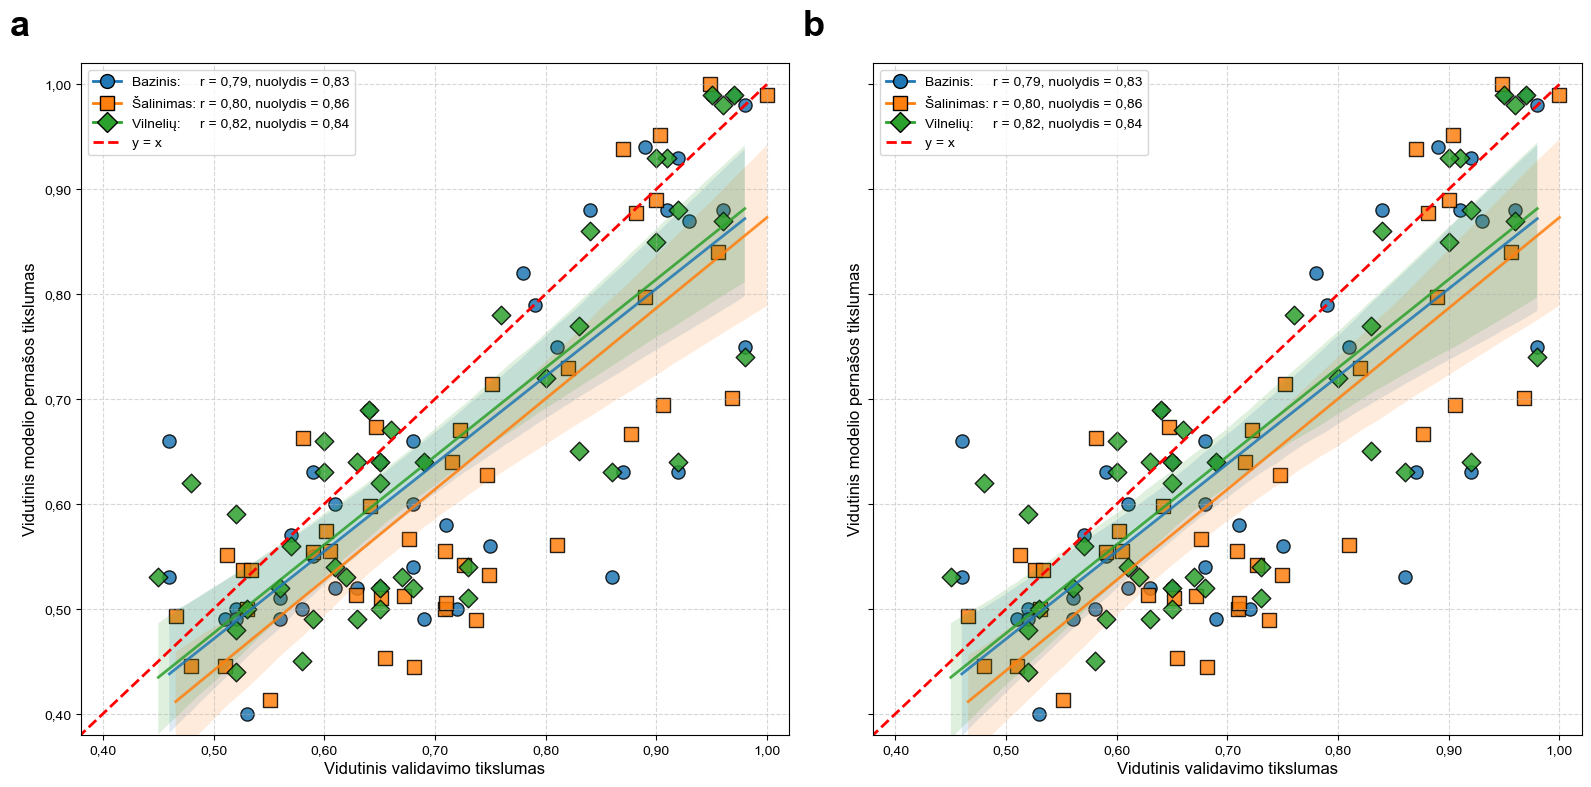

In [801]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
markers = ['o', 's', 'D']
palette = {
    'Bazinis':      '#1f77b4',
    'Automatinis':  '#ff7f0e',
    'Vilnelių':     '#2ca02c',
}
method_labels = {
    'Bazinis':     'Bazinis:     ',
    'Automatinis': 'Šalinimas: ',
    'Vilnelių':    'Vilnelių:     '
}

def convert_ticks_to_comma(ax):
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    ax.set_xticklabels([f"{x:.2f}".replace('.', ',') for x in xticks])
    ax.set_yticklabels([f"{y:.2f}".replace('.', ',') for y in yticks])

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
panel_labels = ['a', 'b']

for i, run_num in enumerate([1, 2]):
    ax = axes[i]
    legend_handles = []

    for lbl, mk in zip(labels, markers):
        col = palette[lbl]
        df_run = df[(df['run'] == run_num) & (df['Source'] == lbl)].copy()
        df_run['evaluation'] = df_run['subject'].astype(str)
        merged = pd.merge(
            cross_df[(cross_df.pipeline == "TS_LR") & (cross_df.Source == lbl)][['evaluation', 'test_accuracy']],
            df_run[['evaluation', 'mean_val_accuracy']],
            on='evaluation'
        )
        # Plot scatter points
        ax.scatter(
            merged['mean_val_accuracy'], merged['test_accuracy'],
            color=col, marker=mk, s=90, alpha=0.85, edgecolor='k'
        )
        # Plot regression line (with CI)
        sns.regplot(
            x='mean_val_accuracy', y='test_accuracy',
            data=merged, ax=ax, color=col,
            scatter=False, line_kws={'lw': 2, 'alpha': 0.85}, ci=95
        )
        # Calculate r and slope, use comma
        if len(merged) > 1:
            x = merged['mean_val_accuracy']
            y = merged['test_accuracy']
            slope, intercept = np.polyfit(x, y, 1)
            r = np.corrcoef(x, y)[0, 1]
            r_str = f"{r:.2f}".replace('.', ',')
            slope_str = f"{slope:.2f}".replace('.', ',')
            label = f"{method_labels[lbl]}r = {r_str}, nuolydis = {slope_str}"
        else:
            label = method_labels[lbl]
        # Legend handle: marker with matching line and label
        legend_handles.append(
            Line2D([0], [0], marker=mk, color=col, label=label,
                   markerfacecolor=col, markeredgecolor='k', markersize=10, lw=2, linestyle='-')
        )

    # Diagonal y=x
    diag_line = Line2D([0], [0], color='r', lw=2, linestyle='--', label='y = x')
    ax.plot([0, 1], [0, 1], 'r--', lw=2)
    legend_handles.append(diag_line)

    # --- Single legend with marker + line for each method ---
    ax.legend(handles=legend_handles, loc='upper left', frameon=True)

    ax.set_xlabel('Vidutinis validavimo tikslumas')
    ax.set_ylabel('Vidutinis modelio pernašos tikslumas')
    ax.set_xlim(0.38, 1.02)
    ax.set_ylim(0.38, 1.02)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Convert all tick labels to comma style
    convert_ticks_to_comma(ax)

    # Add panel letter
    ax.text(
        -.1, 1.08, panel_labels[i], transform=ax.transAxes,
        fontsize=26, fontweight='bold', va='top', ha='left'
    )

plt.subplots_adjust(left=0.11, right=0.98, top=0.96, bottom=0.08, wspace=0.01)
plt.tight_layout()
plt.show()


In [802]:
from scipy.stats import shapiro

for lbl in labels:
    group = cross_df[(cross_df['pipeline'] == "TS_LR") & (cross_df['Source'] == lbl)]['test_accuracy']
    print(f"\n{lbl}:")
    if len(group) < 3:
        print("  Per mažai duomenų normališkumui tikrinti.")
        continue
    stat, p = shapiro(group)
    stat_str = f"{stat:.3f}".replace('.', ',')
    p_str = f"{p:.3g}".replace('.', ',')
    print(f"  test_accuracy: Shapiro–Wilk W = {stat_str}, p = {p_str}")



Bazinis:
  test_accuracy: Shapiro–Wilk W = 0,916, p = 0,00132

Automatinis:
  test_accuracy: Shapiro–Wilk W = 0,896, p = 0,000264

Vilnelių:
  test_accuracy: Shapiro–Wilk W = 0,934, p = 0,00652


In [803]:
from scipy.stats import spearmanr

labels = ['Bazinis', 'Automatinis', 'Vilnelių']

dfw = df_within[df_within['pipeline'] == "TS_LR"].copy()
cfx = cross_df[cross_df['pipeline'] == "TS_LR"].copy()

dfw['subj'] = dfw['evaluation'].str[:2]
dfw['run'] = dfw['evaluation'].str[-1]  # '1' for run 1, '2' for run 2
cfx['subj'] = cfx['evaluation'].str[:2]

for run_num in ['1', '2']:
    print(f"\nRun {run_num}:")
    for lbl in labels:
        w = dfw[(dfw['Source'] == lbl) & (dfw['run'] == run_num)]
        x = cfx[cfx['Source'] == lbl][['subj', 'test_accuracy']]
        merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
        if len(merged) > 1:
            rho, p = spearmanr(merged['mean_val_accuracy'], merged['test_accuracy'])
            rho_str = f"{rho:.3f}".replace('.', ',')
            p_str = f"{p:.3g}".replace('.', ',')
            print(f"  {lbl}: Spearman ρ = {rho_str}, p = {p_str}, N = {len(merged)}")
        else:
            print(f"  {lbl}: Per mažai duomenų Spearman koreliacijai.")



Run 1:
  Bazinis: Spearman ρ = 0,733, p = 6,27e-10, N = 52
  Automatinis: Spearman ρ = 0,688, p = 1,74e-08, N = 52
  Vilnelių: Spearman ρ = 0,757, p = 8,31e-11, N = 52

Run 2:
  Bazinis: Spearman ρ = 0,733, p = 6,27e-10, N = 52
  Automatinis: Spearman ρ = 0,688, p = 1,74e-08, N = 52
  Vilnelių: Spearman ρ = 0,757, p = 8,31e-11, N = 52


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\152411292.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\152411292.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\152411292.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\152411292.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


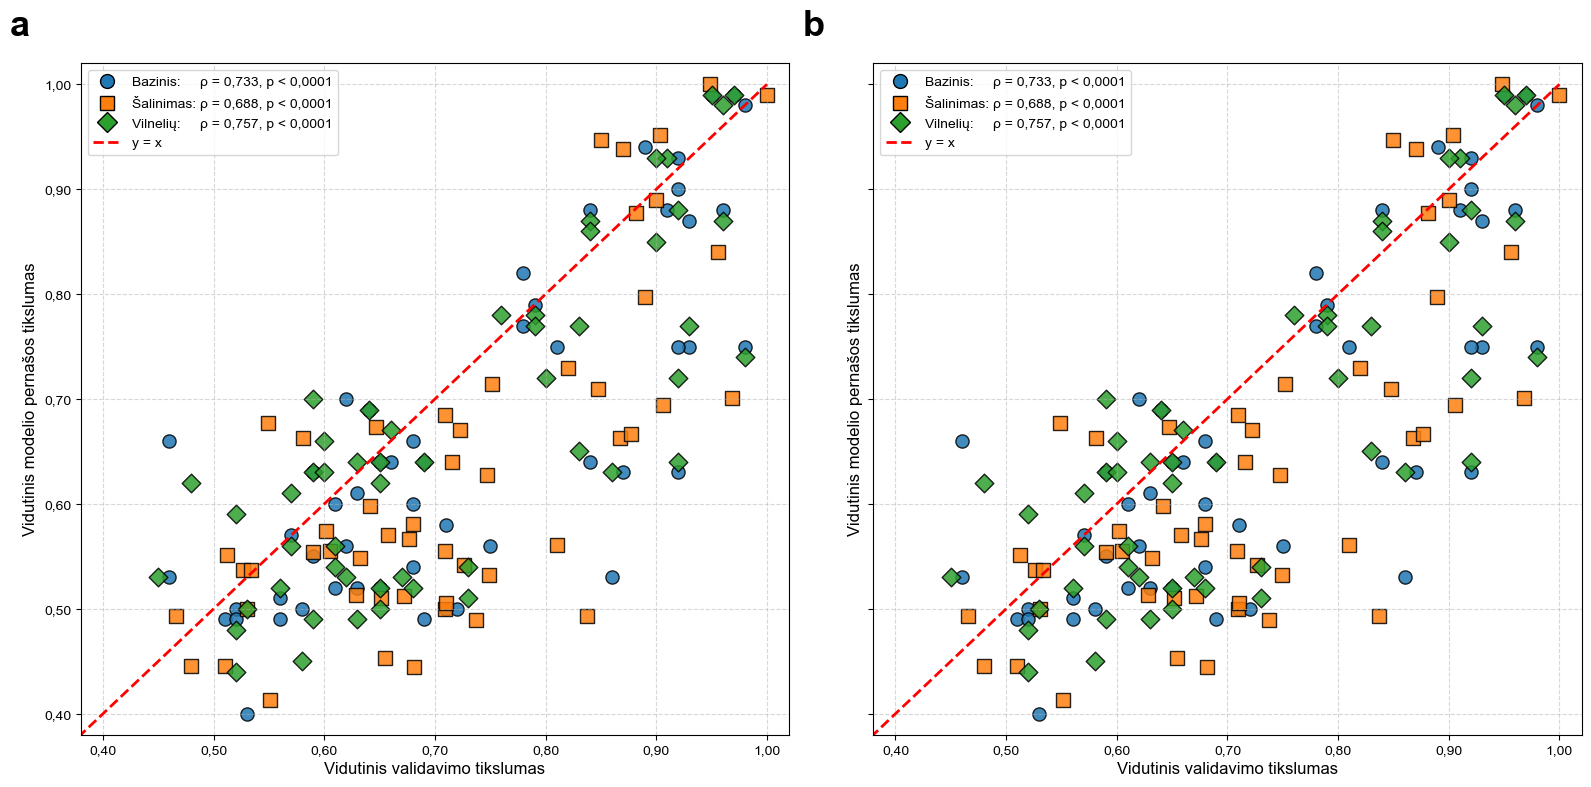

In [804]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

mpl.rcParams.update({
    'font.family':           'Arial',
    'font.sans-serif':       ['Arial'],
    'axes.titlesize':        14,   # should not exceed 14 pt
    'axes.labelsize':        12,   # should match main text
    'xtick.labelsize':       10,   # within 10–12 pt
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      14    # same rule as axes.title
})

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
markers = ['o', 's', 'D']
palette = {
    'Bazinis':      '#1f77b4',
    'Automatinis':  '#ff7f0e',
    'Vilnelių':     '#2ca02c',
}
method_labels = {
    'Bazinis':     'Bazinis:     ',
    'Automatinis': 'Šalinimas: ',
    'Vilnelių':    'Vilnelių:     '
}

def convert_ticks_to_comma(ax):
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    ax.set_xticklabels([f"{x:.2f}".replace('.', ',') for x in xticks])
    ax.set_yticklabels([f"{y:.2f}".replace('.', ',') for y in yticks])

def tidy_p(p):
    if p < 0.0001:
        return "p < 0,0001"
    elif p < 0.001:
        return "p < 0,001"
    else:
        s = f"{p:.3f}".replace('.', ',')
        s = s.rstrip('0').rstrip(',') if ',' in s else s
        return f"p = {s}"

# --- Prepare data ---
dfw = df_within[df_within['pipeline'] == "TS_LR"].copy()
cfx = cross_df[cross_df['pipeline'] == "TS_LR"].copy()
dfw['run'] = dfw['evaluation'].str[-1]         # run number as '1' or '2'
dfw['subj'] = dfw['evaluation'].str[:2]        # subject number as '01', '02', etc
cfx['subj'] = cfx['evaluation'].str[:2]

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
panel_labels = ['a', 'b']

for i, run_num in enumerate(['1', '2']):
    ax = axes[i]
    legend_handles = []
    for lbl, mk in zip(labels, markers):
        col = palette[lbl]
        w = dfw[(dfw['run'] == run_num) & (dfw['Source'] == lbl)]
        x = cfx[cfx['Source'] == lbl][['subj', 'test_accuracy']]
        merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
        # Plot scatter points
        ax.scatter(
            merged['mean_val_accuracy'], merged['test_accuracy'],
            color=col, marker=mk, s=90, alpha=0.85, edgecolor='k'
        )
        # Calculate and display Spearman's rho and tidy p-value in legend
        if len(merged) > 1:
            rho, p = spearmanr(merged['mean_val_accuracy'], merged['test_accuracy'])
            rho_str = f"{rho:.3f}".replace('.', ',')
            p_str = tidy_p(p)
            label = f"{method_labels[lbl]}ρ = {rho_str}, {p_str}"
        else:
            label = method_labels[lbl]
        legend_handles.append(
            Line2D([0], [0], marker=mk, color=col, label=label,
                   markerfacecolor=col, markeredgecolor='k', markersize=10, lw=0, linestyle='None')
        )

    # Diagonal y=x
    diag_line = Line2D([0], [0], color='r', lw=2, linestyle='--', label='y = x')
    ax.plot([0, 1], [0, 1], 'r--', lw=2)
    legend_handles.append(diag_line)

    ax.legend(handles=legend_handles, loc='upper left', frameon=True)
    ax.set_xlabel('Vidutinis validavimo tikslumas')
    ax.set_ylabel('Vidutinis modelio pernašos tikslumas')
    ax.set_xlim(0.38, 1.02)
    ax.set_ylim(0.38, 1.02)
    ax.grid(True, linestyle='--', alpha=0.5)
    convert_ticks_to_comma(ax)

    # Add panel letter
    ax.text(
        -.1, 1.08, panel_labels[i], transform=ax.transAxes,
        fontsize=26, fontweight='bold', va='top', ha='left'
    )

plt.subplots_adjust(left=0.11, right=0.98, top=0.96, bottom=0.08, wspace=0.01)
plt.tight_layout()
plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1807892417.py:126: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1807892417.py:126: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1807892417.py:126: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1807892417.py:126: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\1807892417.py:126: UserWarning: 

The `vertical` parameter is deprecated; assig

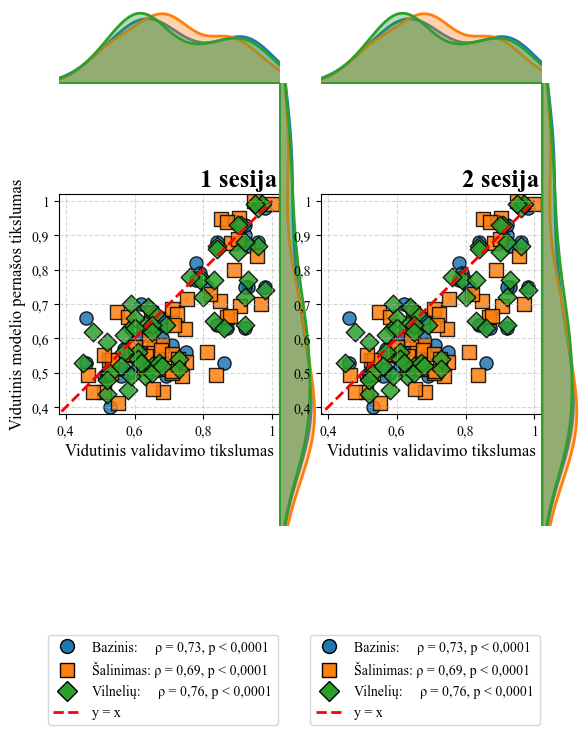

In [805]:
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
markers = ['o', 's', 'D']
palette = {
    'Bazinis':      '#1f77b4',
    'Automatinis':  '#ff7f0e',
    'Vilnelių':     '#2ca02c',
}
method_labels = {
    'Bazinis':     'Bazinis:     ',
    'Automatinis': 'Šalinimas: ',
    'Vilnelių':    'Vilnelių:     '
}

plt.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})

def format_number(val, pos=None):
    s = f"{val:.2f}".replace('.', ',')
    if s.endswith(',00'):
        s = s[:-3]
    elif s.endswith('0'):
        s = s[:-1]
    if s.endswith(','):
        s = s[:-1]
    return s

def tidy_p(p):
    if p < 0.0001:
        return "p < 0,0001"
    elif p < 0.001:
        return "p < 0,001"
    else:
        s = f"{p:.3f}".replace('.', ',')
        s = s.rstrip('0').rstrip(',') if ',' in s else s
        return f"p = {s}"

# --- Prepare data ---
dfw = df_within[df_within['pipeline'] == "TS_LR"].copy()
cfx = cross_df[cross_df['pipeline'] == "TS_LR"].copy()
dfw['run'] = dfw['evaluation'].str[-1]
dfw['subj'] = dfw['evaluation'].str[:2]
cfx['subj'] = cfx['evaluation'].str[:2]

fig = plt.figure(figsize=(6.7, 6.7))
outer = gridspec.GridSpec(1, 2, wspace=0.02)  # tiny gap between the two panels

for panel_idx, run_num in enumerate(['1', '2']):
    # merge per-method
    merged_dfs = {}
    for lbl in labels:
        w = dfw[(dfw['run'] == run_num) & (dfw['Source'] == lbl)]
        x = cfx[cfx['Source'] == lbl][['subj', 'test_accuracy']]
        merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
        merged['Source'] = lbl
        merged_dfs[lbl] = merged

    gs = gridspec.GridSpecFromSubplotSpec(
        2, 2,
        subplot_spec=outer[panel_idx],
        width_ratios=[6, 1],
        height_ratios=[1, 6],
        hspace=0.0,   # no vertical gap
        wspace=0.0    # no horizontal gap
    )
    ax_main = plt.subplot(gs[1, 0])
    ax_xdist = plt.subplot(gs[0, 0], sharex=ax_main)
    ax_ydist = plt.subplot(gs[1, 1], sharey=ax_main)

    # scatter + legend handles
    legend_handles = []
    for lbl, mk in zip(labels, markers):
        col = palette[lbl]
        data = merged_dfs[lbl]
        ax_main.scatter(
            data['mean_val_accuracy'], data['test_accuracy'],
            color=col, marker=mk, s=90, alpha=0.85, edgecolor='k'
        )
        if len(data) > 1:
            rho, p = spearmanr(data['mean_val_accuracy'], data['test_accuracy'])
            rho_str = f"{rho:.2f}".replace('.', ',')
            p_str = tidy_p(p)
            label = f"{method_labels[lbl]}ρ = {rho_str}, {p_str}"
        else:
            label = method_labels[lbl]
        legend_handles.append(
            Line2D([0], [0], marker=mk, color='w',
                   markerfacecolor=col, markeredgecolor='k',
                   markersize=10, linestyle='None', label=label)
        )
    legend_handles.append(Line2D([0], [0], color='r', lw=2,
                                 linestyle='--', label='y = x'))

    # place legend outside to the left/below as you prefer
    ax_main.legend(
        handles=legend_handles,
        loc='upper left',
        bbox_to_anchor=(-0.05, -1),  # play with these offsets
        borderaxespad=0.,
        frameon=True
    )

    # marginal KDEs flush to main
    for lbl in labels:
        col = palette[lbl]
        data = merged_dfs[lbl]
        if len(data):
            sns.kdeplot(data['mean_val_accuracy'], ax=ax_xdist,
                        color=col, fill=True, alpha=0.35, linewidth=2)
            sns.kdeplot(data['test_accuracy'], ax=ax_ydist,
                        color=col, fill=True, alpha=0.35, linewidth=2,
                        vertical=True)

    # diagonal y=x
    ax_main.plot([0, 1], [0, 1], 'r--', lw=2)

    # hide the marginals’ axes
    ax_xdist.axis('off')
    ax_ydist.axis('off')

    # labels & formatting
    ax_main.set_xlabel('Vidutinis validavimo tikslumas')
    if panel_idx == 0:
        ax_main.set_ylabel('Vidutinis modelio pernašos tikslumas')
    ax_main.set_xlim(0.38, 1.02)
    ax_main.set_ylim(0.38, 1.02)
    ax_main.set_aspect('equal', adjustable='box')
    ax_main.grid(True, linestyle='--', alpha=0.5)
    ax_main.xaxis.set_major_formatter(FuncFormatter(format_number))
    ax_main.yaxis.set_major_formatter(FuncFormatter(format_number))

    ax_main.text(
        0.99, 1.01, f'{run_num} sesija',
        transform=ax_main.transAxes,
        fontsize=18, fontweight='bold',
        va='bottom', ha='right'
    )

# tighten the outer margins so nothing is “floating”
plt.tight_layout()

fig.savefig(r'bakalauras/fig15_legend.png', dpi=800, bbox_inches='tight')
plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3563072686.py:103: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3563072686.py:103: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3563072686.py:103: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3563072686.py:103: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3563072686.py:103: UserWarning: 

The `vertical` parameter is deprecated; assig

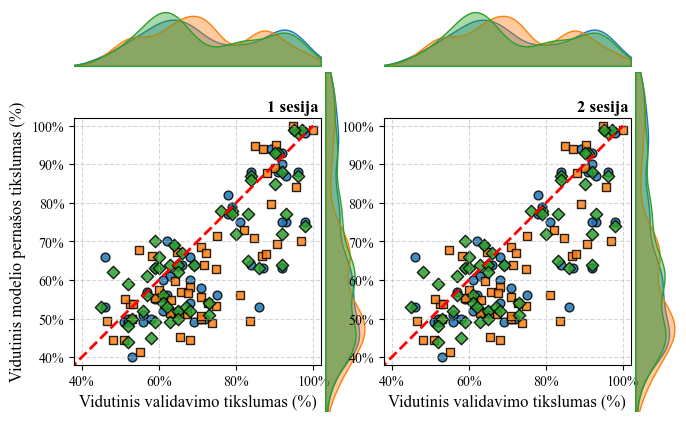

In [806]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import spearmanr
import pandas as pd

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
markers = ['o', 's', 'D']
palette = {
    'Bazinis':      '#1f77b4',
    'Automatinis':  '#ff7f0e',
    'Vilnelių':     '#2ca02c',
}
method_labels = {
    'Bazinis':     'Bazinis:     ',
    'Automatinis': 'Šalinimas: ',
    'Vilnelių':    'Vilnelių:     '
}

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'figure.titlesize':      12
})

def format_number(val, pos=None):
    """Convert 0–1 values to integer percentages with ‘%’."""
    pct = val * 100
    s = f"{pct:.0f}".replace('.', ',')
    return f"{s}%"

def tidy_p(p):
    if p < 0.0001:
        return "p < 0,0001"
    elif p < 0.001:
        return "p < 0,001"
    else:
        s = f"{p:.3f}".replace('.', ',')
        s = s.rstrip('0').rstrip(',') if ',' in s else s
        return f"p = {s}"

# --- Prepare data ---
dfw = df_within[df_within['pipeline'] == "TS_LR"].copy()
cfx = cross_df[cross_df['pipeline'] == "TS_LR"].copy()
dfw['run'] = dfw['evaluation'].str[-1]
dfw['subj'] = dfw['evaluation'].str[:2]
cfx['subj'] = cfx['evaluation'].str[:2]

# --- Figure setup ---
fig_width = 6.69291339
aspect_ratio = 2.0 / 3.0
fig_height = fig_width * aspect_ratio
fig = plt.figure(figsize=(fig_width, fig_height))
outer = gridspec.GridSpec(1, 2, wspace=0.06)

for panel_idx, run_num in enumerate(['1', '2']):
    # merge by subject & run
    merged_dfs = {}
    for lbl in labels:
        w = dfw[(dfw['run'] == run_num) & (dfw['Source'] == lbl)]
        x = cfx[cfx['Source'] == lbl][['subj', 'test_accuracy']]
        merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
        merged['Source'] = lbl
        merged_dfs[lbl] = merged

    gs = gridspec.GridSpecFromSubplotSpec(
        2, 2,
        subplot_spec=outer[panel_idx],
        width_ratios=[6, 1],
        height_ratios=[1, 6],
        hspace=0.03, wspace=0.03
    )
    ax_main = plt.subplot(gs[1, 0])
    ax_xdist = plt.subplot(gs[0, 0], sharex=ax_main)
    ax_ydist = plt.subplot(gs[1, 1], sharey=ax_main)

    # Main scatter + diag
    for lbl, mk in zip(labels, markers):
        col = palette[lbl]
        data = merged_dfs[lbl]
        ax_main.scatter(
            data['mean_val_accuracy'], data['test_accuracy'],
            color=col, marker=mk, s=40, alpha=0.85, edgecolor='k'
        )
    ax_main.plot([0, 1], [0, 1], 'r--', lw=2)

    # Marginals
    for lbl in labels:
        col = palette[lbl]
        data = merged_dfs[lbl]
        if len(data):
            sns.kdeplot(
                data['mean_val_accuracy'], ax=ax_xdist,
                color=col, fill=True, alpha=0.4,
                bw_adjust=0.6, clip=(0.38, 1.02)
            )
            sns.kdeplot(
                data['test_accuracy'], ax=ax_ydist,
                color=col, fill=True, alpha=0.4,
                bw_adjust=0.6, clip=(0.38, 1.02),
                vertical=True
            )

    # Formatting
    ax_xdist.axis('off')
    ax_ydist.axis('off')
    ax_main.set_xlabel('Vidutinis validavimo tikslumas (%)', fontsize=12)
    if panel_idx == 0:
        ax_main.set_ylabel('Vidutinis modelio pernašos tikslumas (%)', fontsize=12)
    else:
        ax_main.set_ylabel('')

    ax_main.set_xlim(0.38, 1.02)
    ax_main.set_ylim(0.38, 1.02)
    ax_main.set_aspect('equal', adjustable='box')
    ax_main.grid(True, linestyle='--', alpha=0.5)
    ax_main.xaxis.set_major_formatter(FuncFormatter(format_number))
    ax_main.yaxis.set_major_formatter(FuncFormatter(format_number))
    ax_main.tick_params(labelsize=10)

    # Panel label (e.g., "1 sesija", "2 sesija")
    ax_main.text(
        0.99, 1.01, f'{run_num} sesija',
        transform=ax_main.transAxes,
        fontsize=12, fontweight='bold',
        va='bottom', ha='right'
    )

plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.05, wspace=0.06)
fig.savefig(r'bakalauras/fig15.png', dpi=800)
plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3037444521.py:99: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3037444521.py:99: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3037444521.py:99: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3037444521.py:125: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\3037444521.py:125: UserWarning: 

The `vertical` parameter is deprecated; assignin

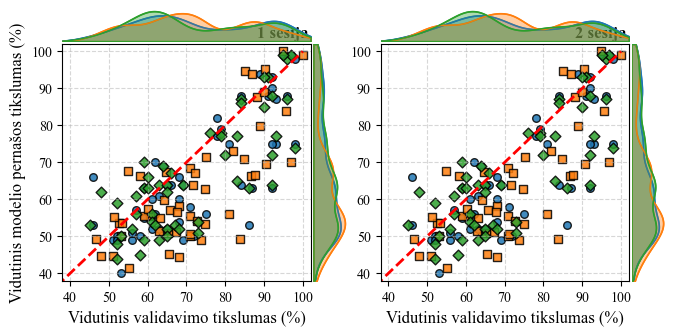

In [831]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import spearmanr
import pandas as pd

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
markers = ['o', 's', 'D']
palette = {
    'Bazinis':      '#1f77b4',
    'Automatinis':  '#ff7f0e',
    'Vilnelių':     '#2ca02c',
}
method_labels = {
    'Bazinis':     'Bazinis:     ',
    'Automatinis': 'Šalinimas: ',
    'Vilnelių':    'Vilnelių:     '
}

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'figure.titlesize':      12
})

def format_number(val, pos=None):
    pct = val * 100
    return f"{int(round(pct))}".replace('.', ',')

def tidy_p(p):
    if p < 0.0001:
        return "p < 0,0001"
    elif p < 0.001:
        return "p < 0,001"
    else:
        s = f"{p:.3f}".replace('.', ',')
        return f"p = {s.rstrip('0').rstrip(',')}"

# --- Prepare data ---
dfw = df_within[df_within['pipeline'] == "TS_LR"].copy()
cfx = cross_df[cross_df['pipeline'] == "TS_LR"].copy()
dfw['run']  = dfw['evaluation'].str[-1]
dfw['subj'] = dfw['evaluation'].str[:2]
cfx['subj'] = cfx['evaluation'].str[:2]

# --- Figure setup (width unchanged, shorter height for landscape panels) ---
fig_width = 6.69291339
fig_height = fig_width * 0.45    # ↓ smaller height to make each panel rectangular
fig = plt.figure(figsize=(fig_width, fig_height))


# make left/right panels a bit farther apart
outer = gridspec.GridSpec(1, 2, wspace=0.12)

for panel_idx, run_num in enumerate(['1', '2']):
    # merge by subject & run
    merged_dfs = {}
    for lbl in labels:
        w = dfw[(dfw['run'] == run_num) & (dfw['Source'] == lbl)]
        x = cfx[cfx['Source'] == lbl][['subj', 'test_accuracy']]
        merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
        merged['Source'] = lbl
        merged_dfs[lbl] = merged

    # make the marginal plots smaller
    # make the marginal plots a bit bigger again
    gs = gridspec.GridSpecFromSubplotSpec(
        2, 2,
        subplot_spec=outer[panel_idx],
        width_ratios=[6, 0.8],    # up from 0.4 → 0.8
        height_ratios=[0.8, 6],   # up from 0.4 → 0.8
        hspace=0.02, wspace=0.02
    )
    ax_main = plt.subplot(gs[1, 0])
    ax_xdist = plt.subplot(gs[0, 0], sharex=ax_main)
    ax_ydist = plt.subplot(gs[1, 1], sharey=ax_main)

    # hide ticks/spines on marginals
    for ax in (ax_xdist, ax_ydist):
        ax.axis('off')

    # Main scatter + line stays the same…

    # Marginal KDEs – bump alpha & add a bit of line for clarity
    for lbl in labels:
        data = merged_dfs[lbl]
        if not data.empty:
            sns.kdeplot(
                data['mean_val_accuracy'], ax=ax_xdist,
                color=palette[lbl], fill=True, alpha=0.3,
                linewidth=1.2, bw_adjust=0.6, clip=(0.38, 1.02)
            )
            sns.kdeplot(
                data['test_accuracy'], ax=ax_ydist,
                color=palette[lbl], fill=True, alpha=0.3,
                linewidth=1.2, bw_adjust=0.6, clip=(0.38, 1.02),
                vertical=True
            )


    # Main scatter + identity line
    for lbl, mk in zip(labels, markers):
        data = merged_dfs[lbl]
        ax_main.scatter(
            data['mean_val_accuracy'], data['test_accuracy'],
            color=palette[lbl], marker=mk, s=30, alpha=0.85, edgecolor='k', linewidths= 1,
        )
    ax_main.plot([0, 1], [0, 1], 'r--', lw=2)

    # Marginal KDEs
    for lbl in labels:
        data = merged_dfs[lbl]
        if not data.empty:
            sns.kdeplot(
                data['mean_val_accuracy'], ax=ax_xdist,
                color=palette[lbl], fill=True, alpha=0.1,
                bw_adjust=0.6, clip=(0.38, 1.02)
            )
            sns.kdeplot(
                data['test_accuracy'], ax=ax_ydist,
                color=palette[lbl], fill=True, alpha=0.1,
                bw_adjust=0.6, clip=(0.38, 1.02),
                vertical=True
            )

    from matplotlib.ticker import MaxNLocator

    locator = MaxNLocator(nbins=7)    # choose however many ticks you want
    ax_main.xaxis.set_major_locator(locator)
    ax_main.yaxis.set_major_locator(locator)


    # Align marginals to main axes and hide their ticks
    ax_xdist.set_xlim(ax_main.get_xlim())
    ax_xdist.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax_ydist.set_ylim(ax_main.get_ylim())
    ax_ydist.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    # Labels and formatting on main
    ax_main.set_xlabel('Vidutinis validavimo tikslumas (%)', fontsize=12)
    if panel_idx == 0:
        ax_main.set_ylabel('Vidutinis modelio pernašos tikslumas (%)', fontsize=12)
    ax_main.set_xlim(0.38, 1.02)
    ax_main.set_ylim(0.38, 1.02)

    # rectangular grid cells instead of squares
    ax_main.set_aspect('auto')
    ax_main.grid(True, linestyle='--', alpha=0.5)

    ax_main.xaxis.set_major_formatter(FuncFormatter(format_number))
    ax_main.yaxis.set_major_formatter(FuncFormatter(format_number))
    ax_main.tick_params(labelsize=10)

    # Panel title
    ax_main.text(
        0.99, 1.01, f'{run_num} sesija',
        transform=ax_main.transAxes,
        fontsize=12, fontweight='bold',
        va='bottom', ha='right'
    )

plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.05, wspace=0.12)
fig.savefig(r'bakalauras/fig15.png', dpi=800, bbox_inches = 'tight')
plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\860718996.py:112: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\860718996.py:112: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\860718996.py:112: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\860718996.py:112: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\860718996.py:112: UserWarning: 

The `vertical` parameter is deprecated; assigning 

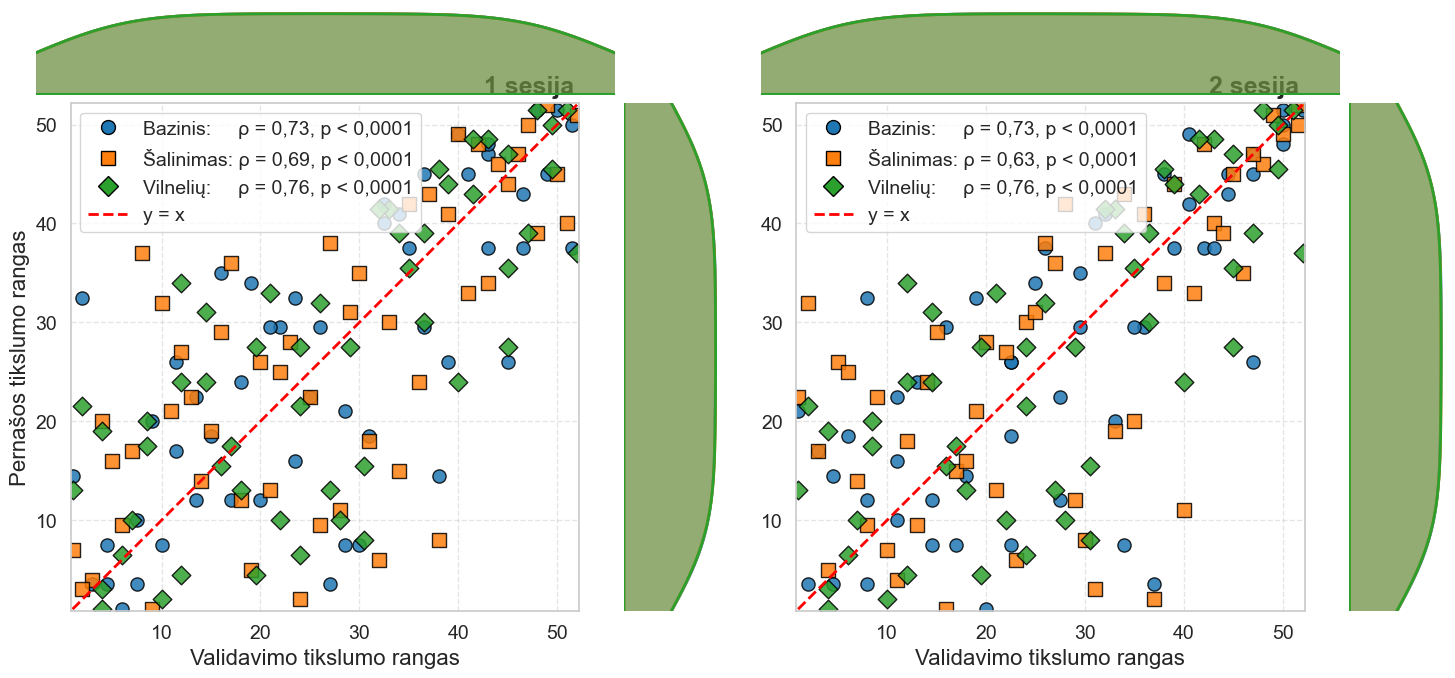

In [620]:
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import spearmanr, rankdata

labels = ['Bazinis', 'Automatinis', 'Vilnelių']
markers = ['o', 's', 'D']
palette = {
    'Bazinis':      '#1f77b4',
    'Automatinis':  '#ff7f0e',
    'Vilnelių':     '#2ca02c',
}
method_labels = {
    'Bazinis':     'Bazinis:     ',
    'Automatinis': 'Šalinimas: ',
    'Vilnelių':    'Vilnelių:     '
}

mpl.rcParams.update({
    'font.family':        'Arial',
    'font.sans-serif':    ['Arial'],
    'axes.titlesize':     18,
    'axes.labelsize':     16,
    'xtick.labelsize':    14,
    'ytick.labelsize':    14,
    'legend.fontsize':    14,
    'legend.title_fontsize':14,
    'figure.titlesize':   20
})

def tidy_p(p):
    if p < 0.0001:
        return "p < 0,0001"
    elif p < 0.001:
        return "p < 0,001"
    else:
        s = f"{p:.2f}".replace('.', ',')
        s = s.rstrip('0').rstrip(',') if ',' in s else s
        return f"p = {s}"

# --- Prepare data ---
dfw = df_within[df_within['pipeline'] == "TS_LR"].copy()
cfx = cross_df[cross_df['pipeline'] == "TS_LR"].copy()
dfw['run'] = dfw['evaluation'].str[-1]
dfw['subj'] = dfw['evaluation'].str[:2]
cfx['subj'] = cfx['evaluation'].str[:2]

fig = plt.figure(figsize=(15, 7))
outer = gridspec.GridSpec(1, 2, wspace=0.06)

for panel_idx, run_num in enumerate(['1', '2']):
    merged_dfs = {}
    for lbl in labels:
        w = dfw[(dfw['run'] == run_num) & (dfw['Source'] == lbl)]
        x = cfx[cfx['Source'] == lbl][['subj', 'test_accuracy']]
        merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
        merged['Source'] = lbl
        # Replace with ranks (rankdata returns float, but you can cast to int for axes if you want)
        merged['mean_val_accuracy'] = rankdata(merged['mean_val_accuracy'], method='average')
        merged['test_accuracy'] = rankdata(merged['test_accuracy'], method='average')
        merged_dfs[lbl] = merged

    gs = gridspec.GridSpecFromSubplotSpec(
        2, 2,
        subplot_spec=outer[panel_idx],
        width_ratios=[6, 1],
        height_ratios=[1, 6],
        hspace=0.03, wspace=0.03
    )
    ax_main = plt.subplot(gs[1, 0])
    ax_xdist = plt.subplot(gs[0, 0], sharex=ax_main)
    ax_ydist = plt.subplot(gs[1, 1], sharey=ax_main)

    legend_handles = []
    for lbl, mk in zip(labels, markers):
        col = palette[lbl]
        data = merged_dfs[lbl]
        ax_main.scatter(
            data['mean_val_accuracy'], data['test_accuracy'],
            color=col, marker=mk, s=90, alpha=0.85, edgecolor='k'
        )
        # Calculate Spearman rho for legend
        if len(data) > 1:
            rho, p = spearmanr(data['mean_val_accuracy'], data['test_accuracy'])
            rho_str = f"{rho:.2f}".replace('.', ',')
            p_str = tidy_p(p)
            label = f"{method_labels[lbl]}ρ = {rho_str}, {p_str}"
        else:
            label = method_labels[lbl]
        legend_handles.append(
            plt.Line2D([0], [0], marker=mk, color='w', markerfacecolor=col, markeredgecolor='k',
                       markersize=10, linestyle='None', label=label)
        )
    from matplotlib.lines import Line2D
    diag_handle = Line2D([0], [0], color='r', lw=2, linestyle='--', label='y = x')
    legend_handles.append(diag_handle)

    ax_main.legend(handles=legend_handles, loc='upper left', frameon=True)

    # Marginal KDE for X (top)
    for lbl in labels:
        col = palette[lbl]
        data = merged_dfs[lbl]
        if len(data):
            sns.kdeplot(data['mean_val_accuracy'], ax=ax_xdist, color=col, fill=True, alpha=0.35, linewidth=2)
    # Marginal KDE for Y (right)
    for lbl in labels:
        col = palette[lbl]
        data = merged_dfs[lbl]
        if len(data):
            sns.kdeplot(data['test_accuracy'], ax=ax_ydist, color=col, fill=True, alpha=0.35, linewidth=2, vertical=True)

    # Diagonal y=x for rank plot
    n = max(data['mean_val_accuracy'].max(), data['test_accuracy'].max())
    ax_main.plot([1, n], [1, n], 'r--', lw=2)
    ax_xdist.axis('off')
    ax_ydist.axis('off')
    # Formatting
    ax_main.set_xlabel('Validavimo tikslumo rangas')
    if panel_idx == 0:
        ax_main.set_ylabel('Pernašos tikslumo rangas')
    else:
        ax_main.set_ylabel('')
    ax_main.set_xlim(0.8, n+0.2)
    ax_main.set_ylim(0.8, n+0.2)
    ax_main.set_aspect('equal', adjustable='box')
    ax_main.grid(True, linestyle='--', alpha=0.5)
    ax_main.xaxis.set_major_formatter(lambda x, _: f"{int(x):d}")
    ax_main.yaxis.set_major_formatter(lambda y, _: f"{int(y):d}")

    ax_main.legend(handles=legend_handles, loc='upper left', frameon=True)
    ax_main.text(
        0.99, 1.01, f'{run_num} sesija', transform=ax_main.transAxes,
        fontsize=18, fontweight='bold', va='bottom', ha='right'
    )

plt.subplots_adjust(left=0.04, right=0.98, top=0.96, bottom=0.10, wspace=0.06)
plt.show()


In [621]:
w['subj'] = w['evaluation'].str[:2]
x['subj'] = x['evaluation'].str[:2]
merged = pd.merge(x, w[['subj', 'mean_val_accuracy']], on='subj')
merged

C:\Users\rokas\AppData\Local\Temp\ipykernel_4732\674245226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


KeyError: 'evaluation'

In [ ]:
# 4) Compute mean and median test_accuracy per source
mean_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].mean()
median_acc_cross = df_cross_plot.groupby('source')['test_accuracy'].median()

print("Mean test_accuracy per source:")
print(mean_acc_cross.sort_values(ascending=False))

print("\nMedian test_accuracy per source:")
print(median_acc_cross.sort_values(ascending=False))

best_cross = mean_acc_cross.idxmax()
order_cross = mean_acc_cross.sort_values(ascending=False).index.tolist()


Mean test_accuracy per source:
source
β0.05 elim.       0.674043
β0.1 elim.        0.674043
β0.01 elim.       0.673191
β0.5 tiesinis     0.672766
β0.5 švelnus      0.672553
β0.01 tiesinis    0.672340
β0.05 tiesinis    0.672340
β0.1 tiesinis     0.672340
β0.1 švelnus      0.672340
β0.2 elim.        0.672340
β0.2 tiesinis     0.672340
β0.2 švelnus      0.672340
β0.01 švelnus     0.672128
β0.05 švelnus     0.672128
β0.5 elim.        0.668936
Name: test_accuracy, dtype: float64

Median test_accuracy per source:
source
β0.01 elim.       0.64
β0.05 elim.       0.64
β0.1 elim.        0.64
β0.2 elim.        0.64
β0.5 elim.        0.64
β0.5 tiesinis     0.64
β0.01 tiesinis    0.63
β0.01 švelnus     0.63
β0.05 tiesinis    0.63
β0.05 švelnus     0.63
β0.1 tiesinis     0.63
β0.1 švelnus      0.63
β0.2 tiesinis     0.63
β0.2 švelnus      0.63
β0.5 švelnus      0.63
Name: test_accuracy, dtype: float64


In [92]:
df

subject  mean_left_C3_0_4s  std_left_C3_0_4s  mean_right_C3_0_4s  \
0    s04.01          -0.322417          0.148276           -0.253060   
1    s04.02          -0.270880          0.293619           -0.232628   
2    s06.01          -0.022256          0.178507           -0.214652   
3    s07.01          -0.057777          0.190490           -0.088710   
4    s08.01          -0.104213          0.123679           -0.019557   
..      ...                ...               ...                 ...   
99   s37.02          -0.219925          0.168345           -0.328544   
100  s44.01          -0.448635          0.144259           -0.478290   
101  s44.02          -0.272005          0.179430           -0.341079   
102  s45.01          -0.316031          0.104723           -0.309648   
103  s45.02          -0.222453          0.135345           -0.351457   

     std_right_C3_0_4s  mean_left_C4_0_4s  std_left_C4_0_4s  \
0             0.115171          -0.314680          0.162444   
1             0.244856          -0.241960          0.347397   
2             0.086723           0.026500          0.161982   
3             0.208895          -0.043920          0.190187   
4             0.279320          -0.116424          0.152069   
..                 ...                ...               ...   
99            0.137815          -0.352853          0.117806   
100           0.183487          -0.465552          0.207087   
101           0.235237          -0.325810          0.250344   
102           0.151996          -0.299468          0.189501   
103           0.107825          -0.333324          0.147715   

     mean_right_C4_0_4s  std_right_C4_0_4s  mean_left_Cz_0_4s  \
0             -0.160682           0.222907          -0.313433   
1             -0.248517           0.226847          -0.266151   
2             -0.157401           0.097098           0.039564   
3             -0.036393           0.226495          -0.168789   
4             -0.100054           0.172328          -0.135270   
..                  ...                ...                ...   
99            -0.155976           0.168728          -0.199723   
100           -0.413872           0.150236          -0.393860   
101           -0.210538           0.167686          -0.251472   
102           -0.199615           0.160697          -0.306872   
103           -0.217905           0.189248          -0.333005   

     std_left_Cz_0_4s  mean_right_Cz_0_4s  std_right_Cz_0_4s  \
0            0.153161           -0.293233           0.119589   
1            0.328654           -0.274567           0.230637   
2            0.312638           -0.152012           0.117909   
3            0.194536           -0.177496           0.207492   
4            0.130212           -0.102596           0.190406   
..                ...                 ...                ...   
99           0.162809           -0.288954           0.113363   
100          0.124694           -0.396260           0.120750   
101          0.194643           -0.228293           0.176377   
102          0.152617           -0.257930           0.153893   
103          0.116906           -0.334031           0.120201   

                 Group  
0    illiterate (<0.7)  
1    illiterate (<0.7)  
2    illiterate (<0.7)  
3    illiterate (<0.7)  
4    illiterate (<0.7)  
..                 ...  
99         best (>0.9)  
100        best (>0.9)  
101        best (>0.9)  
102        best (>0.9)  
103        best (>0.9)  

[104 rows x 14 columns]

In [95]:
df = pd.read_csv('plot_data_df_all.csv')  # Change filename if needed
df

subject  mean_left_C3_0_4s  std_left_C3_0_4s  mean_right_C3_0_4s  \
0    s04.01          -0.322417          0.148276           -0.253060   
1    s04.02          -0.270880          0.293619           -0.232628   
2    s06.01          -0.022256          0.178507           -0.214652   
3    s07.01          -0.057777          0.190490           -0.088710   
4    s08.01          -0.104213          0.123679           -0.019557   
..      ...                ...               ...                 ...   
99   s37.02          -0.219925          0.168345           -0.328544   
100  s44.01          -0.448635          0.144259           -0.478290   
101  s44.02          -0.272005          0.179430           -0.341079   
102  s45.01          -0.316031          0.104723           -0.309648   
103  s45.02          -0.222453          0.135345           -0.351457   

     std_right_C3_0_4s  mean_left_C4_0_4s  std_left_C4_0_4s  \
0             0.115171          -0.314680          0.162444   
1             0.244856          -0.241960          0.347397   
2             0.086723           0.026500          0.161982   
3             0.208895          -0.043920          0.190187   
4             0.279320          -0.116424          0.152069   
..                 ...                ...               ...   
99            0.137815          -0.352853          0.117806   
100           0.183487          -0.465552          0.207087   
101           0.235237          -0.325810          0.250344   
102           0.151996          -0.299468          0.189501   
103           0.107825          -0.333324          0.147715   

     mean_right_C4_0_4s  std_right_C4_0_4s  mean_left_Cz_0_4s  \
0             -0.160682           0.222907          -0.313433   
1             -0.248517           0.226847          -0.266151   
2             -0.157401           0.097098           0.039564   
3             -0.036393           0.226495          -0.168789   
4             -0.100054           0.172328          -0.135270   
..                  ...                ...                ...   
99            -0.155976           0.168728          -0.199723   
100           -0.413872           0.150236          -0.393860   
101           -0.210538           0.167686          -0.251472   
102           -0.199615           0.160697          -0.306872   
103           -0.217905           0.189248          -0.333005   

     std_left_Cz_0_4s  mean_right_Cz_0_4s  std_right_Cz_0_4s  \
0            0.153161           -0.293233           0.119589   
1            0.328654           -0.274567           0.230637   
2            0.312638           -0.152012           0.117909   
3            0.194536           -0.177496           0.207492   
4            0.130212           -0.102596           0.190406   
..                ...                 ...                ...   
99           0.162809           -0.288954           0.113363   
100          0.124694           -0.396260           0.120750   
101          0.194643           -0.228293           0.176377   
102          0.152617           -0.257930           0.153893   
103          0.116906           -0.334031           0.120201   

                 Group  
0    illiterate (<0.7)  
1    illiterate (<0.7)  
2    illiterate (<0.7)  
3    illiterate (<0.7)  
4    illiterate (<0.7)  
..                 ...  
99         best (>0.9)  
100        best (>0.9)  
101        best (>0.9)  
102        best (>0.9)  
103        best (>0.9)  

[104 rows x 14 columns]

In [102]:
df_all['Group'].unique()

array(['illiterate (<0.7)', 'average (0.7–0.8)', 'good (0.8–0.9)',
       'best (>0.9)'], dtype=object)

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.

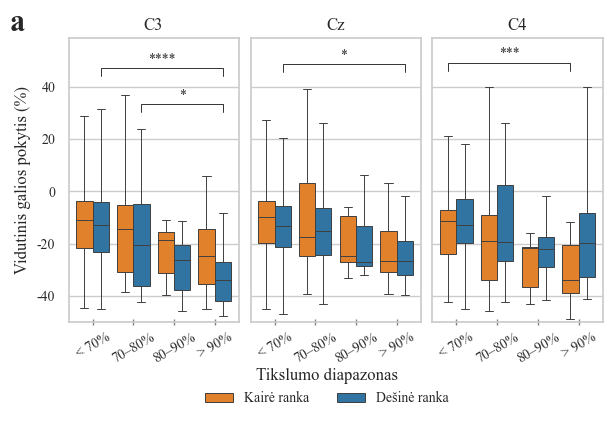

In [276]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scikit_posthocs as sp
import numpy as np
from scipy.stats import kruskal
from itertools import combinations
import matplotlib.ticker as mticker

mpl.rcParams.update({
    'font.family':           'Times New Roman',
    'font.sans-serif':       ['Times New Roman'],
    'axes.titlesize':        12,
    'axes.labelsize':        12,
    'xtick.labelsize':       10,
    'ytick.labelsize':       10,
    'legend.fontsize':       10,
    'legend.title_fontsize': 12,
    'figure.titlesize':      12
})

# --- Data prep ---
df_all = pd.read_csv('plot_data_df_all.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

df_long['Group'] = pd.Categorical(df_long['Group'], categories=group_order, ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand'] = pd.Categorical(df_long['Hand'], categories=hand_order, ordered=True)

palette = {'Kairė ranka': '#ff7f0e', 'Dešinė ranka': '#1f77b4'}

accuracy_label_map = {
    'illiterate (<0.7)': '< 70%',
    'average (0.7–0.8)': '70–80%',
    'good (0.8–0.9)': '80–90%',
    'best (>0.9)': '> 90%'
}
df_long['AccLabel'] = df_long['Group'].map(accuracy_label_map)
acc_label_order = [accuracy_label_map[g] for g in group_order]

# --- Kruskal–Wallis and Dunn's post-hoc for each Channel/Hand pair ---
pvalues_dict = {}
for channel in channel_order:
    for hand in hand_order:
        sub = df_long[(df_long['Channel'] == channel) & (df_long['Hand'] == hand)]
        group_sizes = [sub[sub['Group'] == g].shape[0] for g in group_order]
        data_by_group = [sub[sub['Group'] == g]['Power'].dropna().values for g in group_order if sub[sub['Group'] == g].shape[0] > 0]
        if len(data_by_group) >= 2:
            stat, pval = kruskal(*data_by_group)
        else:
            stat, pval = np.nan, np.nan
        if pval is not np.nan and pval < 0.05:
            posthoc = sp.posthoc_dunn(sub, val_col='Power', group_col='Group', p_adjust='bonferroni')
        else:
            posthoc = None
        for g1, g2 in combinations(group_order, 2):
            key = (channel, (g1, hand), (g2, hand))
            if posthoc is not None and g1 in posthoc.index and g2 in posthoc.columns:
                pval_pair = posthoc.loc[g1, g2]
            else:
                pval_pair = np.nan
            pvalues_dict[key] = pval_pair

# --- Custom y-axis formatter: percent with comma ---
def custom_comma_formatter(x, _):
    return f"{int(round(x * 100))}"

fig, axs = plt.subplots(1, 3, figsize=(6.89, 4), sharey=True)

for i, channel in enumerate(channel_order):
    ax = axs[i]
    sub = df_long[df_long['Channel'] == channel]
    b = sns.boxplot(
        data=sub, x='AccLabel', y='Power', hue='Hand',
        order=acc_label_order, hue_order=hand_order,
        palette=palette, ax=ax, whis=2, showfliers=False, linewidth=0.7,
    )
    ax.set_title(channel)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Vidutinis galios pokytis (%)', fontsize=12)
    else:
        ax.set_ylabel('')
    ax.set_ylim(-0.5, 0.55)

    # Use the custom y-axis formatter for percent ticks
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(custom_comma_formatter))
    # Fix tick label font size and weight
    for label in ax.get_yticklabels():
        label.set_fontsize(10)
        label.set_fontweight('normal')

    group_labels = [l for l in acc_label_order if l in sub['AccLabel'].unique()]
    comparisons = []
    custom_pvals = []
    for hand in hand_order:
        for g1, g2 in combinations(group_labels, 2):
            orig_g1 = [k for k, v in accuracy_label_map.items() if v == g1][0]
            orig_g2 = [k for k, v in accuracy_label_map.items() if v == g2][0]
            key = (channel, (orig_g1, hand), (orig_g2, hand))
            pval = pvalues_dict.get(key, float('nan'))
            if pval < 0.05:
                comparisons.append(((g1, hand), (g2, hand)))
                custom_pvals.append(pval)

    # Annotate significant comparisons, less bold
    if comparisons:
        annot = Annotator(
            ax, pairs=comparisons, data=sub,
            x='AccLabel', y='Power', hue='Hand',
            order=acc_label_order, hue_order=hand_order,
        )
        annot.configure(
            test=None,
            text_format='star', loc='inside', verbose=0,
            line_height=0.03,
            line_width=0.7,           # <--- THINNER lines
            fontsize=10,            # <--- LESS BOLD stars
        )
        annot.set_pvalues_and_annotate(custom_pvals)
        for txt in ax.texts:
            txt.set_fontsize(10)        # Make annotation not bold and smaller
            txt.set_fontweight('normal')
            txt.set_text(txt.get_text().replace('.', ','))

    ax.get_legend().remove()

fig.supxlabel("Tikslumo diapazonas", y=0.015, fontsize=12)  # Match other fonts
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title='',
    loc='lower center',
    ncol=2,
    fontsize=10,    # Match rcParams
    frameon=False,  # No border for legend
    bbox_to_anchor=(0.5, -0.07)  # Higher to avoid overlap
)

for ax in axs:
    # Rotate x-tick labels and set font
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
        label.set_fontweight('normal')
        label.set_rotation(30)
    # Ensure x-tick marks (the lines under labels) are visible and sized
    ax.xaxis.set_tick_params(length=5, width=1, direction='inout', bottom=True, top=False, color='grey')


fig.text(0.04, 0.95, "a", ha='left', va='top', fontsize=22, fontweight='bold')

plt.subplots_adjust(wspace=0.07, bottom=0.17)
plt.show()
fig.savefig(r'bakalauras/fig10.png', dpi=800, bbox_inches='tight')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import scikit_posthocs as sp
import numpy as np
from scipy.stats import kruskal, shapiro
from itertools import combinations

# --- Data prep ---
df_all = pd.read_csv('plot_data_df_all.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

df_long['Group'] = pd.Categorical(df_long['Group'], categories=group_order, ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand'] = pd.Categorical(df_long['Hand'], categories=hand_order, ordered=True)

palette = {'Kairė ranka': '#ff7f0e', 'Dešinė ranka': '#1f77b4'}

accuracy_label_map = {
    'illiterate (<0.7)': '< 70%',
    'average (0.7–0.8)': '70–80%',
    'good (0.8–0.9)': '80–90%',
    'best (>0.9)': '> 90%'
}
df_long['AccLabel'] = df_long['Group'].map(accuracy_label_map)
acc_label_order = [accuracy_label_map[g] for g in group_order]

# --- Stats printout and post-hoc ---
pvalues_dict = {}
print("="*70)
for channel in channel_order:
    for hand in hand_order:
        sub = df_long[(df_long['Channel'] == channel) & (df_long['Hand'] == hand)]
        print(f"\n{channel} | {hand} | n={[sub[sub['Group']==g].shape[0] for g in group_order]}")
        # Mean and median printout
        for g in group_order:
            vals = sub[sub['Group']==g]['Power'].dropna().values
            if len(vals):
                mean = np.mean(vals)
                median = np.median(vals)
                # Shapiro–Wilk test for normality
                if len(vals) >= 3:
                    sw_stat, sw_p = shapiro(vals)
                    sw_note = "normal" if sw_p > 0.05 else "not normal"
                    print(f"  {accuracy_label_map[g]}: mean={mean:.3f}, median={median:.3f}, Shapiro p={sw_p:.4f} ({sw_note})")
                else:
                    print(f"  {accuracy_label_map[g]}: mean={mean:.3f}, median={median:.3f}, Shapiro p=NaN (not enough data)")
            else:
                print(f"  {accuracy_label_map[g]}: mean=NaN, median=NaN, Shapiro p=NaN (empty group)")

        # Omnibus Kruskal–Wallis
        data_by_group = [sub[sub['Group'] == g]['Power'].dropna().values for g in group_order if sub[sub['Group'] == g].shape[0] > 0]
        if len(data_by_group) >= 2:
            stat, pval = kruskal(*data_by_group)
            print(f"  Kruskal–Wallis: H={stat:.3f}, p={pval:.5f} {'SIGNIFICANT' if pval < 0.05 else ''}")
        else:
            stat, pval = np.nan, np.nan
            print(f"  Kruskal–Wallis: not enough groups for test")
        # Dunn post-hoc (only if significant)
        if pval is not np.nan and pval < 0.05:
            posthoc = sp.posthoc_dunn(sub, val_col='Power', group_col='Group', p_adjust='bonferroni')
            print("  Pairwise post-hoc (Dunn, Bonferroni-corrected):")
            for g1, g2 in combinations(group_order, 2):
                if g1 in posthoc.index and g2 in posthoc.columns:
                    pval_pair = posthoc.loc[g1, g2]
                    pval_str = f"{pval_pair:.4f}".replace('.', ',')
                    sig = "*" if pval_pair < 0.05 else ""
                    print(f"    {accuracy_label_map[g1]} vs {accuracy_label_map[g2]}: p = {pval_str} {sig}")
                    key = (channel, (g1, hand), (g2, hand))
                    pvalues_dict[key] = pval_pair
                else:
                    key = (channel, (g1, hand), (g2, hand))
                    pvalues_dict[key] = np.nan
        else:
            posthoc = None
            for g1, g2 in combinations(group_order, 2):
                key = (channel, (g1, hand), (g2, hand))
                pvalues_dict[key] = np.nan
print("="*70)


C3 | Kairė ranka | n=[54, 22, 7, 21]
  < 70%: mean=-0.113, median=-0.111, Shapiro p=0.0000 (not normal)
  70–80%: mean=0.227, median=-0.144, Shapiro p=0.0000 (not normal)
  80–90%: mean=-0.233, median=-0.185, Shapiro p=0.4228 (normal)
  > 90%: mean=0.035, median=-0.249, Shapiro p=0.0000 (not normal)
  Kruskal–Wallis: H=8.057, p=0.04484 SIGNIFICANT
  Pairwise post-hoc (Dunn, Bonferroni-corrected):
    < 70% vs 70–80%: p = 1,0000 
    < 70% vs 80–90%: p = 0,4579 
    < 70% vs > 90%: p = 0,0775 
    70–80% vs 80–90%: p = 1,0000 
    70–80% vs > 90%: p = 0,7300 
    80–90% vs > 90%: p = 1,0000 

C3 | Dešinė ranka | n=[54, 22, 7, 21]
  < 70%: mean=-0.120, median=-0.131, Shapiro p=0.0000 (not normal)
  70–80%: mean=-0.176, median=-0.205, Shapiro p=0.0259 (not normal)
  80–90%: mean=-0.285, median=-0.265, Shapiro p=0.7561 (normal)
  > 90%: mean=-0.323, median=-0.341, Shapiro p=0.0266 (not normal)
  Kruskal–Wallis: H=23.533, p=0.00003 SIGNIFICANT
  Pairwise post-hoc (Dunn, Bonferroni-correcte

In [108]:
df_all

subject  mean_left_C3_0_4s  std_left_C3_0_4s  mean_right_C3_0_4s  \
0    s04.01          -0.322417          0.148276           -0.253060   
1    s04.02          -0.270880          0.293619           -0.232628   
2    s06.01          -0.022256          0.178507           -0.214652   
3    s07.01          -0.057777          0.190490           -0.088710   
4    s08.01          -0.104213          0.123679           -0.019557   
..      ...                ...               ...                 ...   
99   s37.02          -0.219925          0.168345           -0.328544   
100  s44.01          -0.448635          0.144259           -0.478290   
101  s44.02          -0.272005          0.179430           -0.341079   
102  s45.01          -0.316031          0.104723           -0.309648   
103  s45.02          -0.222453          0.135345           -0.351457   

     std_right_C3_0_4s  mean_left_C4_0_4s  std_left_C4_0_4s  \
0             0.115171          -0.314680          0.162444   
1             0.244856          -0.241960          0.347397   
2             0.086723           0.026500          0.161982   
3             0.208895          -0.043920          0.190187   
4             0.279320          -0.116424          0.152069   
..                 ...                ...               ...   
99            0.137815          -0.352853          0.117806   
100           0.183487          -0.465552          0.207087   
101           0.235237          -0.325810          0.250344   
102           0.151996          -0.299468          0.189501   
103           0.107825          -0.333324          0.147715   

     mean_right_C4_0_4s  std_right_C4_0_4s  mean_left_Cz_0_4s  \
0             -0.160682           0.222907          -0.313433   
1             -0.248517           0.226847          -0.266151   
2             -0.157401           0.097098           0.039564   
3             -0.036393           0.226495          -0.168789   
4             -0.100054           0.172328          -0.135270   
..                  ...                ...                ...   
99            -0.155976           0.168728          -0.199723   
100           -0.413872           0.150236          -0.393860   
101           -0.210538           0.167686          -0.251472   
102           -0.199615           0.160697          -0.306872   
103           -0.217905           0.189248          -0.333005   

     std_left_Cz_0_4s  mean_right_Cz_0_4s  std_right_Cz_0_4s  \
0            0.153161           -0.293233           0.119589   
1            0.328654           -0.274567           0.230637   
2            0.312638           -0.152012           0.117909   
3            0.194536           -0.177496           0.207492   
4            0.130212           -0.102596           0.190406   
..                ...                 ...                ...   
99           0.162809           -0.288954           0.113363   
100          0.124694           -0.396260           0.120750   
101          0.194643           -0.228293           0.176377   
102          0.152617           -0.257930           0.153893   
103          0.116906           -0.334031           0.120201   

                 Group  
0    illiterate (<0.7)  
1    illiterate (<0.7)  
2    illiterate (<0.7)  
3    illiterate (<0.7)  
4    illiterate (<0.7)  
..                 ...  
99         best (>0.9)  
100        best (>0.9)  
101        best (>0.9)  
102        best (>0.9)  
103        best (>0.9)  

[104 rows x 14 columns]

In [105]:
import pandas as pd
from scipy.stats import shapiro

# Load data
df_all = pd.read_csv('plot_data_df_all.csv')

# Select only columns starting with 'mean_'
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

# Long format for checking
df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

# Normality check: Shapiro–Wilk per group/channel/hand
print('Normality check (Shapiro–Wilk):')
results = []
for group in group_order:
    for channel in channel_order:
        for hand in hand_order:
            subset = df_long[
                (df_long['Group'] == group) &
                (df_long['Channel'] == channel) &
                (df_long['Hand'] == hand)
            ]['Power'].dropna()
            if len(subset) > 2:  # Shapiro–Wilk requires at least 3 values
                stat, pval = shapiro(subset)
                results.append({
                    'Group': group,
                    'Channel': channel,
                    'Hand': hand,
                    'n': len(subset),
                    'Shapiro-Wilk p': pval
                })
                print(f"{group:18} | {channel} | {hand:12} | n={len(subset):2d} | p={pval:.3g} | {'non-normal' if pval < 0.05 else 'normal'}")
            else:
                print(f"{group:18} | {channel} | {hand:12} | n={len(subset):2d} | Not enough data")

# Optionally: save results to DataFrame
results_df = pd.DataFrame(results)


Normality check (Shapiro–Wilk):
illiterate (<0.7)  | C3 | Kairė ranka  | n=54 | p=4.91e-06 | non-normal
illiterate (<0.7)  | C3 | Dešinė ranka | n=54 | p=5.25e-07 | non-normal
illiterate (<0.7)  | Cz | Kairė ranka  | n=54 | p=0.332 | normal
illiterate (<0.7)  | Cz | Dešinė ranka | n=54 | p=0.962 | normal
illiterate (<0.7)  | C4 | Kairė ranka  | n=54 | p=2.32e-09 | non-normal
illiterate (<0.7)  | C4 | Dešinė ranka | n=54 | p=5.63e-14 | non-normal
average (0.7–0.8)  | C3 | Kairė ranka  | n=22 | p=3.67e-09 | non-normal
average (0.7–0.8)  | C3 | Dešinė ranka | n=22 | p=0.0259 | non-normal
average (0.7–0.8)  | Cz | Kairė ranka  | n=22 | p=0.000419 | non-normal
average (0.7–0.8)  | Cz | Dešinė ranka | n=22 | p=0.0443 | non-normal
average (0.7–0.8)  | C4 | Kairė ranka  | n=22 | p=3.65e-06 | non-normal
average (0.7–0.8)  | C4 | Dešinė ranka | n=22 | p=2.71e-05 | non-normal
good (0.8–0.9)     | C3 | Kairė ranka  | n= 7 | p=0.423 | normal
good (0.8–0.9)     | C3 | Dešinė ranka | n= 7 | p=0.756 |

In [109]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

# --- Load and prepare data ---
df_all = pd.read_csv('plot_data_df_all.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

# --- Kruskal–Wallis and post-hoc (Dunn) tests ---
for channel in channel_order:
    for hand in hand_order:
        sub = df_long[(df_long['Channel'] == channel) & (df_long['Hand'] == hand)]
        # collect data for each group
        data_by_group = []
        group_sizes = []
        for group in group_order:
            vals = sub[sub['Group'] == group]['Power'].dropna()
            if len(vals) > 0:
                data_by_group.append(vals.values)
                group_sizes.append(len(vals))
        if len(data_by_group) < 2:
            print(f"{channel} | {hand}: not enough groups for Kruskal–Wallis")
            continue

        # Kruskal–Wallis
        stat, pval = kruskal(*data_by_group)
        print(f"\n{channel} | {hand}: n={group_sizes} | Kruskal–Wallis H={stat:.2f}, p={pval:.3g} | {'significant' if pval<0.05 else 'not significant'}")

        # --- Dunn's post-hoc test if significant ---
        if pval < 0.05:
            posthoc = sp.posthoc_dunn(sub, val_col='Power', group_col='Group', p_adjust='bonferroni')
            print("Pairwise post-hoc (Dunn, Bonferroni-corrected):")
            # Print only lower triangle, without diagonal
            for i, g1 in enumerate(group_order):
                for j, g2 in enumerate(group_order):
                    if j < i:
                        p = posthoc.loc[g1, g2]
                        if pd.notnull(p):
                            sig = '*' if p < 0.05 else ''
                            print(f"  {g1} vs {g2}: p = {p:.4f} {sig}")



C3 | Kairė ranka: n=[54, 22, 7, 21] | Kruskal–Wallis H=8.06, p=0.0448 | significant
Pairwise post-hoc (Dunn, Bonferroni-corrected):
  average (0.7–0.8) vs illiterate (<0.7): p = 1.0000 
  good (0.8–0.9) vs illiterate (<0.7): p = 0.4579 
  good (0.8–0.9) vs average (0.7–0.8): p = 1.0000 
  best (>0.9) vs illiterate (<0.7): p = 0.0775 
  best (>0.9) vs average (0.7–0.8): p = 0.7300 
  best (>0.9) vs good (0.8–0.9): p = 1.0000 

C3 | Dešinė ranka: n=[54, 22, 7, 21] | Kruskal–Wallis H=23.53, p=3.13e-05 | significant
Pairwise post-hoc (Dunn, Bonferroni-corrected):
  average (0.7–0.8) vs illiterate (<0.7): p = 0.8052 
  good (0.8–0.9) vs illiterate (<0.7): p = 0.1326 
  good (0.8–0.9) vs average (0.7–0.8): p = 1.0000 
  best (>0.9) vs illiterate (<0.7): p = 0.0000 *
  best (>0.9) vs average (0.7–0.8): p = 0.0481 *
  best (>0.9) vs good (0.8–0.9): p = 1.0000 

Cz | Kairė ranka: n=[54, 22, 7, 21] | Kruskal–Wallis H=6.34, p=0.0963 | not significant

Cz | Dešinė ranka: n=[54, 22, 7, 21] | Krusk

In [111]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

# --- Load and prepare data ---
df_all = pd.read_csv('plot_data_df_all.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)
df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

# --- Kruskal–Wallis and post-hoc (Dunn & Conover–Iman) tests ---
for channel in channel_order:
    for hand in hand_order:
        sub = df_long[(df_long['Channel'] == channel) & (df_long['Hand'] == hand)]
        # collect data for each group
        data_by_group = []
        group_sizes = []
        for group in group_order:
            vals = sub[sub['Group'] == group]['Power'].dropna()
            if len(vals) > 0:
                data_by_group.append(vals.values)
                group_sizes.append(len(vals))
        if len(data_by_group) < 2:
            print(f"{channel} | {hand}: not enough groups for Kruskal–Wallis")
            continue

        # Kruskal–Wallis
        stat, pval = kruskal(*data_by_group)
        print(f"\n{channel} | {hand}: n={group_sizes} | Kruskal–Wallis H={stat:.2f}, p={pval:.3g} | {'significant' if pval<0.05 else 'not significant'}")

        # --- Dunn and Conover–Iman post-hoc tests if significant ---
        if pval < 0.05:
            posthoc_dunn = sp.posthoc_dunn(sub, val_col='Power', group_col='Group', p_adjust='bonferroni')
            posthoc_conover = sp.posthoc_conover(sub, val_col='Power', group_col='Group', p_adjust='bonferroni')
            print("Pairwise post-hoc (Dunn / Conover–Iman, Bonferroni-corrected):")
            for i, g1 in enumerate(group_order):
                for j, g2 in enumerate(group_order):
                    if j < i:
                        p_dunn = posthoc_dunn.loc[g1, g2]
                        p_conover = posthoc_conover.loc[g1, g2]
                        d_sig = '*' if pd.notnull(p_dunn) and p_dunn < 0.05 else ''
                        c_sig = '*' if pd.notnull(p_conover) and p_conover < 0.05 else ''
                        print(f"  {g1} vs {g2}: Dunn p={p_dunn:.4f}{d_sig} | Conover-Iman p={p_conover:.4f}{c_sig}")



C3 | Kairė ranka: n=[54, 22, 7, 21] | Kruskal–Wallis H=8.06, p=0.0448 | significant
Pairwise post-hoc (Dunn / Conover–Iman, Bonferroni-corrected):
  average (0.7–0.8) vs illiterate (<0.7): Dunn p=1.0000 | Conover-Iman p=1.0000
  good (0.8–0.9) vs illiterate (<0.7): Dunn p=0.4579 | Conover-Iman p=0.4314
  good (0.8–0.9) vs average (0.7–0.8): Dunn p=1.0000 | Conover-Iman p=1.0000
  best (>0.9) vs illiterate (<0.7): Dunn p=0.0775 | Conover-Iman p=0.0734
  best (>0.9) vs average (0.7–0.8): Dunn p=0.7300 | Conover-Iman p=0.6920
  best (>0.9) vs good (0.8–0.9): Dunn p=1.0000 | Conover-Iman p=1.0000

C3 | Dešinė ranka: n=[54, 22, 7, 21] | Kruskal–Wallis H=23.53, p=3.13e-05 | significant
Pairwise post-hoc (Dunn / Conover–Iman, Bonferroni-corrected):
  average (0.7–0.8) vs illiterate (<0.7): Dunn p=0.8052 | Conover-Iman p=0.5763
  good (0.8–0.9) vs illiterate (<0.7): Dunn p=0.1326 | Conover-Iman p=0.0704
  good (0.8–0.9) vs average (0.7–0.8): Dunn p=1.0000 | Conover-Iman p=0.9926
  best (>0.9)

c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\126774498.py:108: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
C:\Users\rokas\AppData\Local\Temp\ipykernel_55556\126774498.py:108: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning an

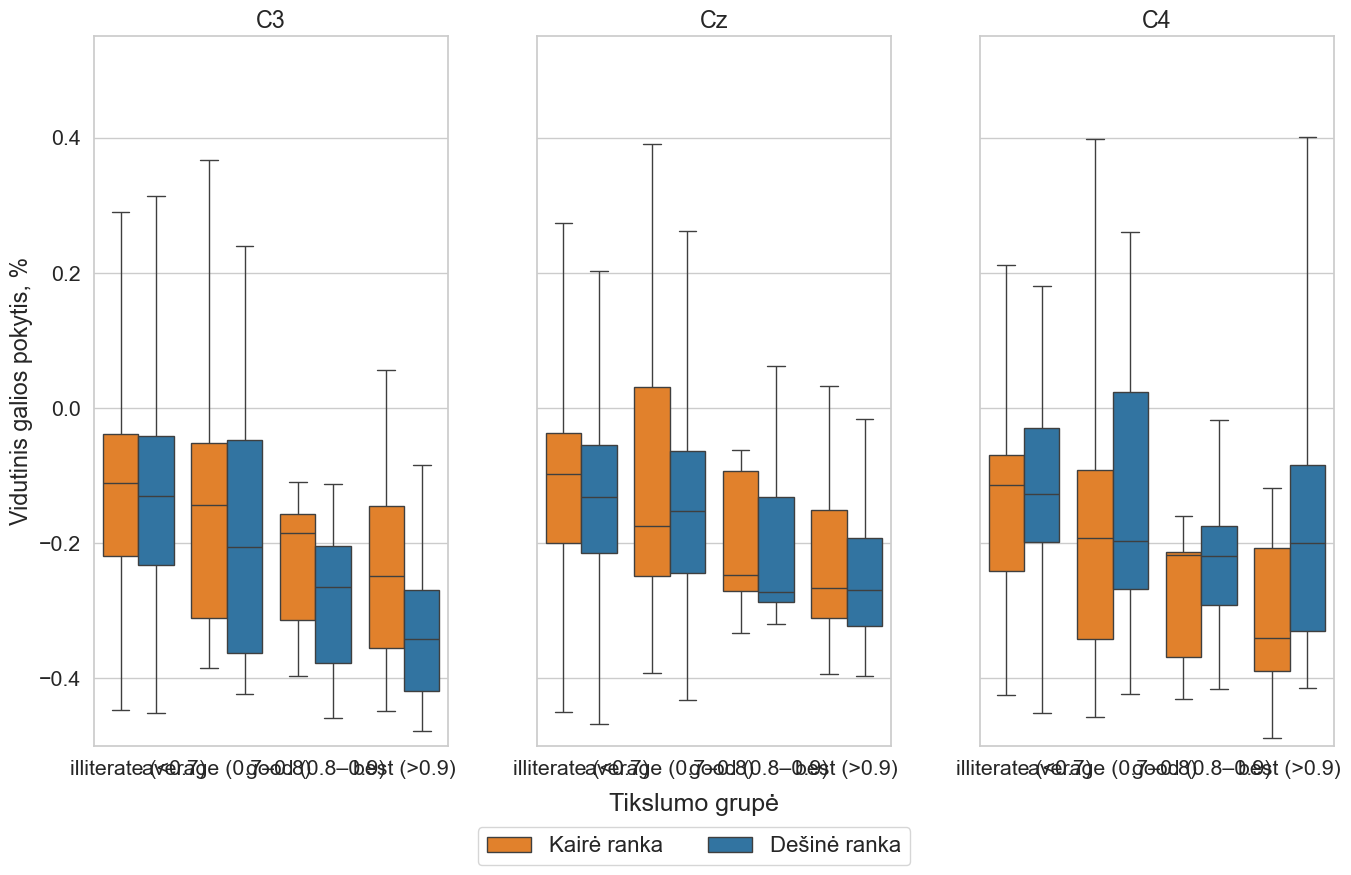

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import numpy as np
from itertools import combinations
from collections import defaultdict

def get_cld(pvals, group_labels, alpha=0.05):
    """
    Generate Compact Letter Display for group significance.
    pvals: N x N symmetric matrix of p-values (N = num groups)
    group_labels: list of group labels (order matches pvals)
    Returns: dict of group -> string of letters
    """
    N = len(group_labels)
    # matrix: True if groups are NOT significantly different
    not_diff = (pvals > alpha) | np.eye(N, dtype=bool)
    # Assign letters
    letter_sets = []
    for i in range(N):
        s = set()
        for j in range(N):
            if not_diff[i, j]:
                s.add(j)
        letter_sets.append(s)

    # Greedy letter assignment
    letters = {}
    used_letters = []
    for i, s in enumerate(letter_sets):
        assigned = False
        for l, idx_set in enumerate(used_letters):
            if s == idx_set:
                letters[group_labels[i]] = chr(ord('a') + l)
                assigned = True
                break
        if not assigned:
            used_letters.append(s)
            letters[group_labels[i]] = chr(ord('a') + len(used_letters) - 1)
    return letters

# Load data
df_all = pd.read_csv('plot_data_df_all.csv')
mean_cols = [c for c in df_all.columns if c.startswith('mean_')]

df_long = df_all.melt(
    id_vars=['subject', 'Group'],
    value_vars=mean_cols,
    var_name='Metric',
    value_name='Power'
)

df_long['Hand'] = df_long['Metric'].str.contains('left').map({True: 'Kairė ranka', False: 'Dešinė ranka'})
df_long['Channel'] = df_long['Metric'].str.extract(r'_(C3|Cz|C4)')[0]

group_order = [
    'illiterate (<0.7)',
    'average (0.7–0.8)',
    'good (0.8–0.9)',
    'best (>0.9)'
]
channel_order = ['C3', 'Cz', 'C4']
hand_order = ['Kairė ranka', 'Dešinė ranka']

df_long['Group'] = pd.Categorical(df_long['Group'], categories=group_order, ordered=True)
df_long['Channel'] = pd.Categorical(df_long['Channel'], categories=channel_order, ordered=True)
df_long['Hand'] = pd.Categorical(df_long['Hand'], categories=hand_order, ordered=True)

palette = {'Kairė ranka': '#ff7f0e', 'Dešinė ranka': '#1f77b4'}

mpl.rcParams.update({
    'font.family':        'Arial',
    'font.sans-serif':    ['Arial'],
    'axes.titlesize':     18,
    'axes.labelsize':     16,
    'xtick.labelsize':    14,
    'ytick.labelsize':    14,
    'legend.fontsize':    14,
    'legend.title_fontsize':14,
    'figure.titlesize':   20
})
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.4)

fig, axs = plt.subplots(1, 3, figsize=(16, 10), sharey=True)

for i, channel in enumerate(channel_order):
    ax = axs[i]
    sub = df_long[df_long['Channel'] == channel]
    sns.boxplot(
        data=sub, x='Group', y='Power', hue='Hand',
        order=group_order, hue_order=hand_order,
        palette=palette, ax=ax, whis=2, showfliers=False
    )
    ax.set_title(channel)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Vidutinis galios pokytis, %')
    else:
        ax.set_ylabel('')
    ax.set_ylim(-0.5, 0.55)
    # Add group letters for each hand
    for j, hand in enumerate(hand_order):
        sub_hand = sub[sub['Hand'] == hand]
        # Prepare Nemenyi post-hoc matrix
        pivot = sub_hand.pivot_table(index='subject', columns='Group', values='Power').dropna()
        g_labels = [g for g in group_order if g in pivot.columns]
        if len(g_labels) > 1 and pivot.shape[0] > 1:
            nemenyi = sp.posthoc_nemenyi_friedman(pivot[g_labels].values)
            nemenyi.index = nemenyi.columns = g_labels
            # Convert to np array (order: group_order subset)
            pmat = nemenyi.loc[g_labels, g_labels].values
            cld_dict = get_cld(pmat, g_labels, alpha=0.05)
            # Add letters to plot
            positions = [k + (j-0.5)*0.18 for k in range(len(g_labels))]  # adjust for hue
            for x, g in enumerate(g_labels):
                median_y = sub_hand[sub_hand['Group'] == g]['Power'].median()
                ax.text(
                    positions[x], median_y + 0.05, cld_dict[g],
                    color=palette[hand], fontsize=18, fontweight='bold',
                    ha='center', va='bottom', zorder=100
                )
    ax.get_legend().remove()

fig.supxlabel("Tikslumo grupė", y=0.10, fontsize=18)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='', loc='lower center', ncol=2, fontsize=16, bbox_to_anchor=(0.5, 0.04))
plt.subplots_adjust(wspace=0.25, bottom=0.17)
plt.show()
